#### Read in your relevant h5ad files etc.. 

In [1]:
import os
import warnings

import scanpy as sc
import pandas as pd
import numpy as np

from numba.core.errors import NumbaDeprecationWarning
from pathlib import Path

warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)

sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


In [2]:
import dandelion as ddl

ddl.logging.print_header()

dandelion==0.3.3.dev41 pandas==1.5.3 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.1


In [ ]:
vdj_P = vdj[vdj.data.productive == "T"].copy()
vdj_NP = vdj[vdj.data.productive == "F"].copy()

In [ ]:
adata_P = adata.copy()
adata_NP = adata.copy()

ddl.tl.transfer(adata_P, vdj_P)
ddl.tl.transfer(adata_NP, vdj_NP)

# I have actually saved mine... 

In [3]:
adata_P = sc.read_h5ad("/Users/uqssoon/Documents/Projects/InezMara/adata_tcr_InezMara_MS__Productiveonly_111223.h5ad")

# Re-plotting differences in V/J gene usage between control and KO

## V gene Beta Chain

In [1295]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VDJ_main"] != "No_contig"]

### DN2a - V gene beta chain

In [1296]:
adata_PF_DN2a = adata_PF[adata_PF.obs["leiden"] == "7 DN2a"]

In [1297]:
adata_PF_DN2a

View of AnnData object with n_obs × n_vars = 52 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1298]:
working_df = pd.DataFrame(adata_PF_DN2a.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV5                                  5
         TRBV4                                  4
         TRBV13-2                               4
         TRBV3                                  3
         TRBV12-1                               3
         TRBV20                                 3
         TRBV1                                  2
         TRBV19                                 2
         TRBV12-2                               2
         TRBV2                                  2
         TRBV16                                 2
         TRBV29                                 1
         TRBV26                                 1
         TRBV23                                 1
         TRBV14                                 1
         TRBV17                                 1
         TRBV15                                 1
         TRBV13-1                               1
         TRBV31                                 1
         TRBV13-3                               0
         TRBV30                                 0
Krt76-/- TRBV3                                  2
         TRBV1                                  1
         TRBV13-2                               1
         TRBV30                                 1
         TRBV20                                 1
         TRBV17                                 1
         TRBV15                                 1
         TRBV13-3                               1
         TRBV14                                 1
         TRBV13-1                               1
         TRBV5                                  1
         TRBV2                                  0
         TRBV12-2                               0
         TRBV16                                 0
         TRBV12-1                               0
         TRBV19                                 0
         TRBV23                                 0
         TRBV26                                 0
         TRBV29                                 0
         TRBV4                                  0
         TRBV31                                 0

In [1299]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5       5
1    Control               TRBV4       4
2    Control            TRBV13-2       4
3    Control               TRBV3       3
4    Control            TRBV12-1       3
5    Control              TRBV20       3
6    Control               TRBV1       2
7    Control              TRBV19       2
8    Control            TRBV12-2       2
9    Control               TRBV2       2
10   Control              TRBV16       2
11   Control              TRBV29       1
12   Control              TRBV26       1
13   Control              TRBV23       1
14   Control              TRBV14       1
15   Control              TRBV17       1
16   Control              TRBV15       1
17   Control            TRBV13-1       1
18   Control              TRBV31       1
19   Control            TRBV13-3       0
20   Control              TRBV30       0
21  Krt76-/-               TRBV3       2
22  Krt76-/-               TRBV1       1
23  Krt76-/-            TRBV13-2       1
24  Krt76-/-              TRBV30       1
25  Krt76-/-              TRBV20       1
26  Krt76-/-              TRBV17       1
27  Krt76-/-              TRBV15       1
28  Krt76-/-            TRBV13-3       1
29  Krt76-/-              TRBV14       1
30  Krt76-/-            TRBV13-1       1
31  Krt76-/-               TRBV5       1
32  Krt76-/-               TRBV2       0
33  Krt76-/-            TRBV12-2       0
34  Krt76-/-              TRBV16       0
35  Krt76-/-            TRBV12-1       0
36  Krt76-/-              TRBV19       0
37  Krt76-/-              TRBV23       0
38  Krt76-/-              TRBV26       0
39  Krt76-/-              TRBV29       0
40  Krt76-/-               TRBV4       0
41  Krt76-/-              TRBV31       0

In [1300]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 40, 'Krt76-/-': 12}

In [1301]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1302]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       5    0.125000
1    Control               TRBV4       4    0.100000
2    Control            TRBV13-2       4    0.100000
3    Control               TRBV3       3    0.075000
4    Control            TRBV12-1       3    0.075000
5    Control              TRBV20       3    0.075000
6    Control               TRBV1       2    0.050000
7    Control              TRBV19       2    0.050000
8    Control            TRBV12-2       2    0.050000
9    Control               TRBV2       2    0.050000
10   Control              TRBV16       2    0.050000
11   Control              TRBV29       1    0.025000
12   Control              TRBV26       1    0.025000
13   Control              TRBV23       1    0.025000
14   Control              TRBV14       1    0.025000
15   Control              TRBV17       1    0.025000
16   Control              TRBV15       1    0.025000
17   Control            TRBV13-1       1    0.025000
18   Control              TRBV31       1    0.025000
19   Control            TRBV13-3       0    0.000000
20   Control              TRBV30       0    0.000000
21  Krt76-/-               TRBV3       2    0.166667
22  Krt76-/-               TRBV1       1    0.083333
23  Krt76-/-            TRBV13-2       1    0.083333
24  Krt76-/-              TRBV30       1    0.083333
25  Krt76-/-              TRBV20       1    0.083333
26  Krt76-/-              TRBV17       1    0.083333
27  Krt76-/-              TRBV15       1    0.083333
28  Krt76-/-            TRBV13-3       1    0.083333
29  Krt76-/-              TRBV14       1    0.083333
30  Krt76-/-            TRBV13-1       1    0.083333
31  Krt76-/-               TRBV5       1    0.083333
32  Krt76-/-               TRBV2       0    0.000000
33  Krt76-/-            TRBV12-2       0    0.000000
34  Krt76-/-              TRBV16       0    0.000000
35  Krt76-/-            TRBV12-1       0    0.000000
36  Krt76-/-              TRBV19       0    0.000000
37  Krt76-/-              TRBV23       0    0.000000
38  Krt76-/-              TRBV26       0    0.000000
39  Krt76-/-              TRBV29       0    0.000000
40  Krt76-/-               TRBV4       0    0.000000
41  Krt76-/-              TRBV31       0    0.000000

In [1303]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 40, 'Krt76-/-': 12}

In [1304]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1305]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       5    0.125000
1    Control               TRBV4       4    0.100000
2    Control            TRBV13-2       4    0.100000
3    Control               TRBV3       3    0.075000
4    Control            TRBV12-1       3    0.075000
5    Control              TRBV20       3    0.075000
6    Control               TRBV1       2    0.050000
7    Control              TRBV19       2    0.050000
8    Control            TRBV12-2       2    0.050000
9    Control               TRBV2       2    0.050000
10   Control              TRBV16       2    0.050000
11   Control              TRBV29       1    0.025000
12   Control              TRBV26       1    0.025000
13   Control              TRBV23       1    0.025000
14   Control              TRBV14       1    0.025000
15   Control              TRBV17       1    0.025000
16   Control              TRBV15       1    0.025000
17   Control            TRBV13-1       1    0.025000
18   Control              TRBV31       1    0.025000
19   Control            TRBV13-3       0    0.000000
20   Control              TRBV30       0    0.000000
21  Krt76-/-               TRBV3       2    0.166667
22  Krt76-/-               TRBV1       1    0.083333
23  Krt76-/-            TRBV13-2       1    0.083333
24  Krt76-/-              TRBV30       1    0.083333
25  Krt76-/-              TRBV20       1    0.083333
26  Krt76-/-              TRBV17       1    0.083333
27  Krt76-/-              TRBV15       1    0.083333
28  Krt76-/-            TRBV13-3       1    0.083333
29  Krt76-/-              TRBV14       1    0.083333
30  Krt76-/-            TRBV13-1       1    0.083333
31  Krt76-/-               TRBV5       1    0.083333
32  Krt76-/-               TRBV2       0    0.000000
33  Krt76-/-            TRBV12-2       0    0.000000
34  Krt76-/-              TRBV16       0    0.000000
35  Krt76-/-            TRBV12-1       0    0.000000
36  Krt76-/-              TRBV19       0    0.000000
37  Krt76-/-              TRBV23       0    0.000000
38  Krt76-/-              TRBV26       0    0.000000
39  Krt76-/-              TRBV29       0    0.000000
40  Krt76-/-               TRBV4       0    0.000000
41  Krt76-/-              TRBV31       0    0.000000

In [1306]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1307]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1308]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1309]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1310]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.6666666666666665,
 'TRBV2': 0.0,
 'TRBV3': 2.2222222222222223,
 'TRBV4': 0.0,
 'TRBV5': 0.6666666666666666,
 'TRBV12-1': 0.0,
 'TRBV12-2': 0.0,
 'TRBV13-1': 3.333333333333333,
 'TRBV13-2': 0.8333333333333333,
 'TRBV13-3': inf,
 'TRBV14': 3.333333333333333,
 'TRBV15': 3.333333333333333,
 'TRBV16': 0.0,
 'TRBV17': 3.333333333333333,
 'TRBV19': 0.0,
 'TRBV20': 1.1111111111111112,
 'TRBV23': 0.0,
 'TRBV26': 0.0,
 'TRBV29': 0.0,
 'TRBV30': inf,
 'TRBV31': 0.0}

In [1311]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5       5    0.125000    0.666667
1    Control               TRBV4       4    0.100000    0.000000
2    Control            TRBV13-2       4    0.100000    0.833333
3    Control               TRBV3       3    0.075000    2.222222
4    Control            TRBV12-1       3    0.075000    0.000000
5    Control              TRBV20       3    0.075000    1.111111
6    Control               TRBV1       2    0.050000    1.666667
7    Control              TRBV19       2    0.050000    0.000000
8    Control            TRBV12-2       2    0.050000    0.000000
9    Control               TRBV2       2    0.050000    0.000000
10   Control              TRBV16       2    0.050000    0.000000
11   Control              TRBV29       1    0.025000    0.000000
12   Control              TRBV26       1    0.025000    0.000000
13   Control              TRBV23       1    0.025000    0.000000
14   Control              TRBV14       1    0.025000    3.333333
15   Control              TRBV17       1    0.025000    3.333333
16   Control              TRBV15       1    0.025000    3.333333
17   Control            TRBV13-1       1    0.025000    3.333333
18   Control              TRBV31       1    0.025000    0.000000
19   Control            TRBV13-3       0    0.000000         inf
20   Control              TRBV30       0    0.000000         inf
21  Krt76-/-               TRBV3       2    0.166667    2.222222
22  Krt76-/-               TRBV1       1    0.083333    1.666667
23  Krt76-/-            TRBV13-2       1    0.083333    0.833333
24  Krt76-/-              TRBV30       1    0.083333         inf
25  Krt76-/-              TRBV20       1    0.083333    1.111111
26  Krt76-/-              TRBV17       1    0.083333    3.333333
27  Krt76-/-              TRBV15       1    0.083333    3.333333
28  Krt76-/-            TRBV13-3       1    0.083333         inf
29  Krt76-/-              TRBV14       1    0.083333    3.333333
30  Krt76-/-            TRBV13-1       1    0.083333    3.333333
31  Krt76-/-               TRBV5       1    0.083333    0.666667
32  Krt76-/-               TRBV2       0    0.000000    0.000000
33  Krt76-/-            TRBV12-2       0    0.000000    0.000000
34  Krt76-/-              TRBV16       0    0.000000    0.000000
35  Krt76-/-            TRBV12-1       0    0.000000    0.000000
36  Krt76-/-              TRBV19       0    0.000000    0.000000
37  Krt76-/-              TRBV23       0    0.000000    0.000000
38  Krt76-/-              TRBV26       0    0.000000    0.000000
39  Krt76-/-              TRBV29       0    0.000000    0.000000
40  Krt76-/-               TRBV4       0    0.000000    0.000000
41  Krt76-/-              TRBV31       0    0.000000    0.000000

In [1312]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1313]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1314]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1315]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

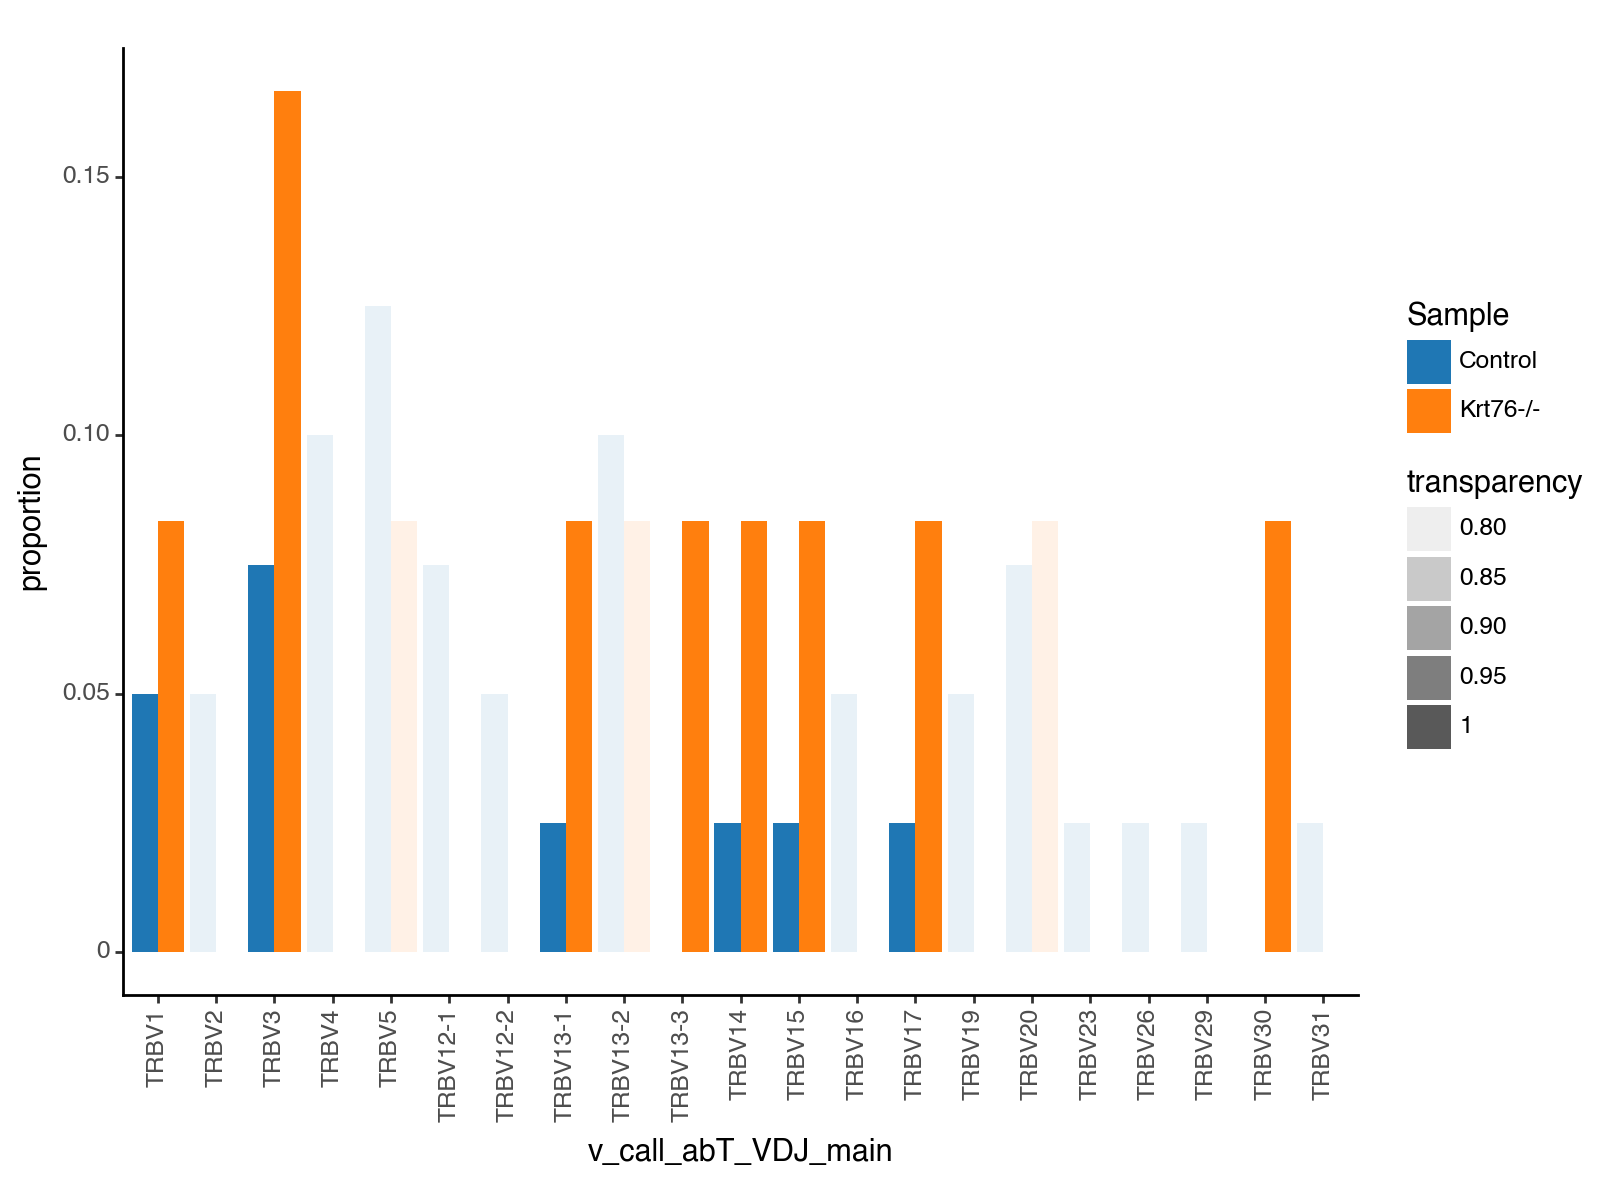

<Figure Size: (800 x 600)>

In [88]:
p

In [1316]:
p.save("VgeneBetaChain_DN2a_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN2a_141223.pdf


### DN2b1 - V gene beta chain

In [1317]:
adata_PF_DN2b1 = adata_PF[adata_PF.obs["leiden"] == "12 DN2b 1"]

In [1318]:
adata_PF_DN2b1

View of AnnData object with n_obs × n_vars = 38 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1319]:
working_df = pd.DataFrame(adata_PF_DN2b1.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV5                                  5
         TRBV3                                  3
         TRBV15                                 3
         TRBV1                                  2
         TRBV12-1                               2
         TRBV26                                 2
         TRBV17                                 2
         TRBV16                                 1
         TRBV29                                 1
         TRBV20                                 1
         TRBV14                                 1
         TRBV2                                  1
         TRBV13-2                               1
         TRBV13-1                               1
         TRBV4                                  1
         TRBV31                                 1
         TRBV30                                 0
Krt76-/- TRBV3                                  3
         TRBV14                                 2
         TRBV16                                 1
         TRBV30                                 1
         TRBV5                                  1
         TRBV13-2                               1
         TRBV20                                 1
         TRBV29                                 0
         TRBV26                                 0
         TRBV17                                 0
         TRBV1                                  0
         TRBV15                                 0
         TRBV2                                  0
         TRBV13-1                               0
         TRBV12-1                               0
         TRBV4                                  0
         TRBV31                                 0

In [1320]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5       5
1    Control               TRBV3       3
2    Control              TRBV15       3
3    Control               TRBV1       2
4    Control            TRBV12-1       2
5    Control              TRBV26       2
6    Control              TRBV17       2
7    Control              TRBV16       1
8    Control              TRBV29       1
9    Control              TRBV20       1
10   Control              TRBV14       1
11   Control               TRBV2       1
12   Control            TRBV13-2       1
13   Control            TRBV13-1       1
14   Control               TRBV4       1
15   Control              TRBV31       1
16   Control              TRBV30       0
17  Krt76-/-               TRBV3       3
18  Krt76-/-              TRBV14       2
19  Krt76-/-              TRBV16       1
20  Krt76-/-              TRBV30       1
21  Krt76-/-               TRBV5       1
22  Krt76-/-            TRBV13-2       1
23  Krt76-/-              TRBV20       1
24  Krt76-/-              TRBV29       0
25  Krt76-/-              TRBV26       0
26  Krt76-/-              TRBV17       0
27  Krt76-/-               TRBV1       0
28  Krt76-/-              TRBV15       0
29  Krt76-/-               TRBV2       0
30  Krt76-/-            TRBV13-1       0
31  Krt76-/-            TRBV12-1       0
32  Krt76-/-               TRBV4       0
33  Krt76-/-              TRBV31       0

In [1321]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 28, 'Krt76-/-': 10}

In [1322]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1323]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       5    0.178571
1    Control               TRBV3       3    0.107143
2    Control              TRBV15       3    0.107143
3    Control               TRBV1       2    0.071429
4    Control            TRBV12-1       2    0.071429
5    Control              TRBV26       2    0.071429
6    Control              TRBV17       2    0.071429
7    Control              TRBV16       1    0.035714
8    Control              TRBV29       1    0.035714
9    Control              TRBV20       1    0.035714
10   Control              TRBV14       1    0.035714
11   Control               TRBV2       1    0.035714
12   Control            TRBV13-2       1    0.035714
13   Control            TRBV13-1       1    0.035714
14   Control               TRBV4       1    0.035714
15   Control              TRBV31       1    0.035714
16   Control              TRBV30       0    0.000000
17  Krt76-/-               TRBV3       3    0.300000
18  Krt76-/-              TRBV14       2    0.200000
19  Krt76-/-              TRBV16       1    0.100000
20  Krt76-/-              TRBV30       1    0.100000
21  Krt76-/-               TRBV5       1    0.100000
22  Krt76-/-            TRBV13-2       1    0.100000
23  Krt76-/-              TRBV20       1    0.100000
24  Krt76-/-              TRBV29       0    0.000000
25  Krt76-/-              TRBV26       0    0.000000
26  Krt76-/-              TRBV17       0    0.000000
27  Krt76-/-               TRBV1       0    0.000000
28  Krt76-/-              TRBV15       0    0.000000
29  Krt76-/-               TRBV2       0    0.000000
30  Krt76-/-            TRBV13-1       0    0.000000
31  Krt76-/-            TRBV12-1       0    0.000000
32  Krt76-/-               TRBV4       0    0.000000
33  Krt76-/-              TRBV31       0    0.000000

In [1324]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 28, 'Krt76-/-': 10}

In [1325]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1326]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       5    0.178571
1    Control               TRBV3       3    0.107143
2    Control              TRBV15       3    0.107143
3    Control               TRBV1       2    0.071429
4    Control            TRBV12-1       2    0.071429
5    Control              TRBV26       2    0.071429
6    Control              TRBV17       2    0.071429
7    Control              TRBV16       1    0.035714
8    Control              TRBV29       1    0.035714
9    Control              TRBV20       1    0.035714
10   Control              TRBV14       1    0.035714
11   Control               TRBV2       1    0.035714
12   Control            TRBV13-2       1    0.035714
13   Control            TRBV13-1       1    0.035714
14   Control               TRBV4       1    0.035714
15   Control              TRBV31       1    0.035714
16   Control              TRBV30       0    0.000000
17  Krt76-/-               TRBV3       3    0.300000
18  Krt76-/-              TRBV14       2    0.200000
19  Krt76-/-              TRBV16       1    0.100000
20  Krt76-/-              TRBV30       1    0.100000
21  Krt76-/-               TRBV5       1    0.100000
22  Krt76-/-            TRBV13-2       1    0.100000
23  Krt76-/-              TRBV20       1    0.100000
24  Krt76-/-              TRBV29       0    0.000000
25  Krt76-/-              TRBV26       0    0.000000
26  Krt76-/-              TRBV17       0    0.000000
27  Krt76-/-               TRBV1       0    0.000000
28  Krt76-/-              TRBV15       0    0.000000
29  Krt76-/-               TRBV2       0    0.000000
30  Krt76-/-            TRBV13-1       0    0.000000
31  Krt76-/-            TRBV12-1       0    0.000000
32  Krt76-/-               TRBV4       0    0.000000
33  Krt76-/-              TRBV31       0    0.000000

In [1327]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1328]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1329]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1330]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1331]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.0,
 'TRBV2': 0.0,
 'TRBV3': 2.8000000000000003,
 'TRBV4': 0.0,
 'TRBV5': 0.56,
 'TRBV12-1': 0.0,
 'TRBV13-1': 0.0,
 'TRBV13-2': 2.8000000000000003,
 'TRBV14': 5.6000000000000005,
 'TRBV15': 0.0,
 'TRBV16': 2.8000000000000003,
 'TRBV17': 0.0,
 'TRBV20': 2.8000000000000003,
 'TRBV26': 0.0,
 'TRBV29': 0.0,
 'TRBV30': inf,
 'TRBV31': 0.0}

In [1332]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5       5    0.178571        0.56
1    Control               TRBV3       3    0.107143        2.80
2    Control              TRBV15       3    0.107143        0.00
3    Control               TRBV1       2    0.071429        0.00
4    Control            TRBV12-1       2    0.071429        0.00
5    Control              TRBV26       2    0.071429        0.00
6    Control              TRBV17       2    0.071429        0.00
7    Control              TRBV16       1    0.035714        2.80
8    Control              TRBV29       1    0.035714        0.00
9    Control              TRBV20       1    0.035714        2.80
10   Control              TRBV14       1    0.035714        5.60
11   Control               TRBV2       1    0.035714        0.00
12   Control            TRBV13-2       1    0.035714        2.80
13   Control            TRBV13-1       1    0.035714        0.00
14   Control               TRBV4       1    0.035714        0.00
15   Control              TRBV31       1    0.035714        0.00
16   Control              TRBV30       0    0.000000         inf
17  Krt76-/-               TRBV3       3    0.300000        2.80
18  Krt76-/-              TRBV14       2    0.200000        5.60
19  Krt76-/-              TRBV16       1    0.100000        2.80
20  Krt76-/-              TRBV30       1    0.100000         inf
21  Krt76-/-               TRBV5       1    0.100000        0.56
22  Krt76-/-            TRBV13-2       1    0.100000        2.80
23  Krt76-/-              TRBV20       1    0.100000        2.80
24  Krt76-/-              TRBV29       0    0.000000        0.00
25  Krt76-/-              TRBV26       0    0.000000        0.00
26  Krt76-/-              TRBV17       0    0.000000        0.00
27  Krt76-/-               TRBV1       0    0.000000        0.00
28  Krt76-/-              TRBV15       0    0.000000        0.00
29  Krt76-/-               TRBV2       0    0.000000        0.00
30  Krt76-/-            TRBV13-1       0    0.000000        0.00
31  Krt76-/-            TRBV12-1       0    0.000000        0.00
32  Krt76-/-               TRBV4       0    0.000000        0.00
33  Krt76-/-              TRBV31       0    0.000000        0.00

In [1333]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1334]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1335]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1336]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

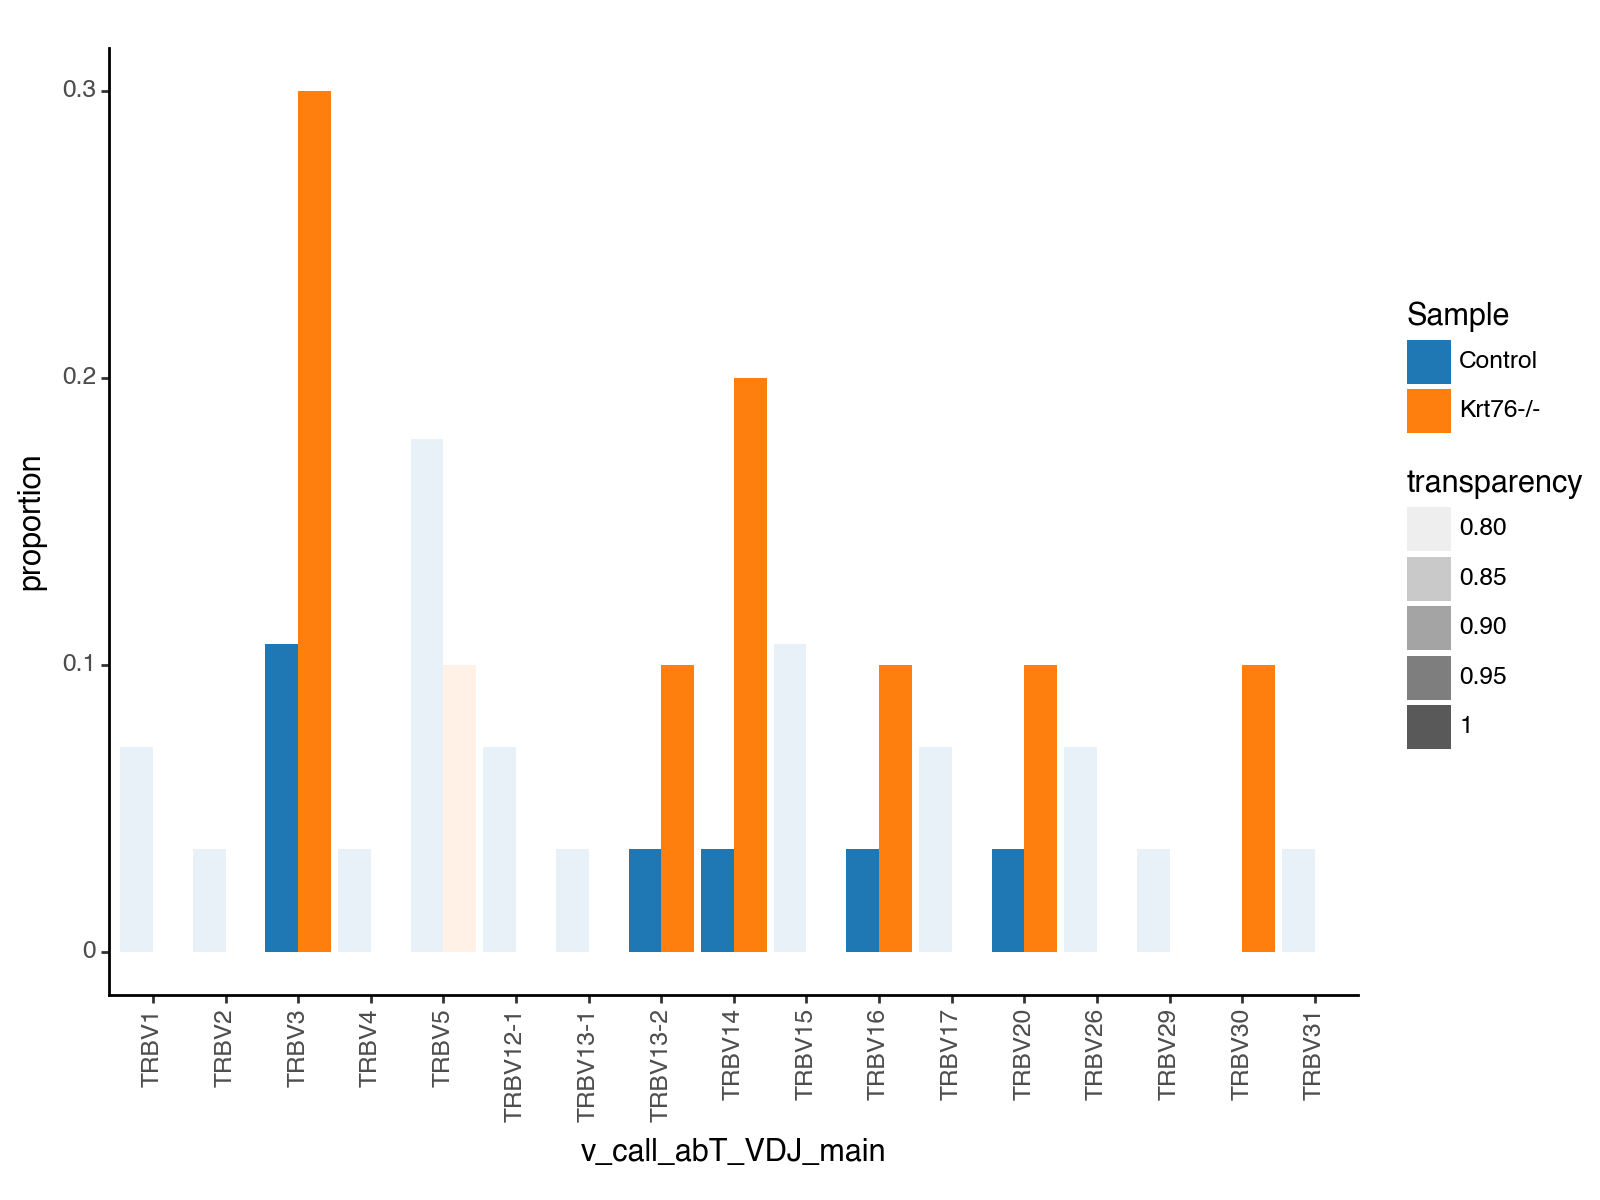

<Figure Size: (800 x 600)>

In [109]:
p

In [1337]:
p.save("VgeneBetaChain_DN2b_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN2b_141223.pdf


### DN2b2 - V gene beta chain

In [1338]:
adata_PF_DN2b2 = adata_PF[adata_PF.obs["leiden"] == "4 DN2b 2"]

In [1339]:
adata_PF_DN2b2

View of AnnData object with n_obs × n_vars = 558 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1340]:
working_df = pd.DataFrame(adata_PF_DN2b2.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV13-2                              44
         TRBV31                                36
         TRBV13-1                              34
         TRBV5                                 32
         TRBV20                                31
         TRBV12-1                              30
         TRBV1                                 27
         TRBV19                                25
         TRBV15                                24
         TRBV16                                22
         TRBV3                                 19
         TRBV2                                 17
         TRBV17                                15
         TRBV12-2                              11
         TRBV26                                10
         TRBV4                                  9
         TRBV13-3                               9
         TRBV14                                 8
         TRBV29                                 6
         TRBV24                                 3
         TRBV21                                 1
         TRBV23                                 1
         TRBV30                                 0
Krt76-/- TRBV13-2                              17
         TRBV1                                 16
         TRBV16                                13
         TRBV13-1                              10
         TRBV12-1                              10
         TRBV3                                  9
         TRBV5                                  9
         TRBV31                                 8
         TRBV17                                 7
         TRBV20                                 6
         TRBV26                                 6
         TRBV13-3                               5
         TRBV2                                  5
         TRBV19                                 5
         TRBV12-2                               4
         TRBV14                                 4
         TRBV29                                 3
         TRBV30                                 3
         TRBV15                                 3
         TRBV4                                  1
         TRBV21                                 0
         TRBV23                                 0
         TRBV24                                 0

In [1341]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2      44
1    Control              TRBV31      36
2    Control            TRBV13-1      34
3    Control               TRBV5      32
4    Control              TRBV20      31
5    Control            TRBV12-1      30
6    Control               TRBV1      27
7    Control              TRBV19      25
8    Control              TRBV15      24
9    Control              TRBV16      22
10   Control               TRBV3      19
11   Control               TRBV2      17
12   Control              TRBV17      15
13   Control            TRBV12-2      11
14   Control              TRBV26      10
15   Control               TRBV4       9
16   Control            TRBV13-3       9
17   Control              TRBV14       8
18   Control              TRBV29       6
19   Control              TRBV24       3
20   Control              TRBV21       1
21   Control              TRBV23       1
22   Control              TRBV30       0
23  Krt76-/-            TRBV13-2      17
24  Krt76-/-               TRBV1      16
25  Krt76-/-              TRBV16      13
26  Krt76-/-            TRBV13-1      10
27  Krt76-/-            TRBV12-1      10
28  Krt76-/-               TRBV3       9
29  Krt76-/-               TRBV5       9
30  Krt76-/-              TRBV31       8
31  Krt76-/-              TRBV17       7
32  Krt76-/-              TRBV20       6
33  Krt76-/-              TRBV26       6
34  Krt76-/-            TRBV13-3       5
35  Krt76-/-               TRBV2       5
36  Krt76-/-              TRBV19       5
37  Krt76-/-            TRBV12-2       4
38  Krt76-/-              TRBV14       4
39  Krt76-/-              TRBV29       3
40  Krt76-/-              TRBV30       3
41  Krt76-/-              TRBV15       3
42  Krt76-/-               TRBV4       1
43  Krt76-/-              TRBV21       0
44  Krt76-/-              TRBV23       0
45  Krt76-/-              TRBV24       0

In [1342]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 414, 'Krt76-/-': 144}

In [1343]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1344]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      44    0.106280
1    Control              TRBV31      36    0.086957
2    Control            TRBV13-1      34    0.082126
3    Control               TRBV5      32    0.077295
4    Control              TRBV20      31    0.074879
5    Control            TRBV12-1      30    0.072464
6    Control               TRBV1      27    0.065217
7    Control              TRBV19      25    0.060386
8    Control              TRBV15      24    0.057971
9    Control              TRBV16      22    0.053140
10   Control               TRBV3      19    0.045894
11   Control               TRBV2      17    0.041063
12   Control              TRBV17      15    0.036232
13   Control            TRBV12-2      11    0.026570
14   Control              TRBV26      10    0.024155
15   Control               TRBV4       9    0.021739
16   Control            TRBV13-3       9    0.021739
17   Control              TRBV14       8    0.019324
18   Control              TRBV29       6    0.014493
19   Control              TRBV24       3    0.007246
20   Control              TRBV21       1    0.002415
21   Control              TRBV23       1    0.002415
22   Control              TRBV30       0    0.000000
23  Krt76-/-            TRBV13-2      17    0.118056
24  Krt76-/-               TRBV1      16    0.111111
25  Krt76-/-              TRBV16      13    0.090278
26  Krt76-/-            TRBV13-1      10    0.069444
27  Krt76-/-            TRBV12-1      10    0.069444
28  Krt76-/-               TRBV3       9    0.062500
29  Krt76-/-               TRBV5       9    0.062500
30  Krt76-/-              TRBV31       8    0.055556
31  Krt76-/-              TRBV17       7    0.048611
32  Krt76-/-              TRBV20       6    0.041667
33  Krt76-/-              TRBV26       6    0.041667
34  Krt76-/-            TRBV13-3       5    0.034722
35  Krt76-/-               TRBV2       5    0.034722
36  Krt76-/-              TRBV19       5    0.034722
37  Krt76-/-            TRBV12-2       4    0.027778
38  Krt76-/-              TRBV14       4    0.027778
39  Krt76-/-              TRBV29       3    0.020833
40  Krt76-/-              TRBV30       3    0.020833
41  Krt76-/-              TRBV15       3    0.020833
42  Krt76-/-               TRBV4       1    0.006944
43  Krt76-/-              TRBV21       0    0.000000
44  Krt76-/-              TRBV23       0    0.000000
45  Krt76-/-              TRBV24       0    0.000000

In [1345]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 414, 'Krt76-/-': 144}

In [1346]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1347]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      44    0.106280
1    Control              TRBV31      36    0.086957
2    Control            TRBV13-1      34    0.082126
3    Control               TRBV5      32    0.077295
4    Control              TRBV20      31    0.074879
5    Control            TRBV12-1      30    0.072464
6    Control               TRBV1      27    0.065217
7    Control              TRBV19      25    0.060386
8    Control              TRBV15      24    0.057971
9    Control              TRBV16      22    0.053140
10   Control               TRBV3      19    0.045894
11   Control               TRBV2      17    0.041063
12   Control              TRBV17      15    0.036232
13   Control            TRBV12-2      11    0.026570
14   Control              TRBV26      10    0.024155
15   Control               TRBV4       9    0.021739
16   Control            TRBV13-3       9    0.021739
17   Control              TRBV14       8    0.019324
18   Control              TRBV29       6    0.014493
19   Control              TRBV24       3    0.007246
20   Control              TRBV21       1    0.002415
21   Control              TRBV23       1    0.002415
22   Control              TRBV30       0    0.000000
23  Krt76-/-            TRBV13-2      17    0.118056
24  Krt76-/-               TRBV1      16    0.111111
25  Krt76-/-              TRBV16      13    0.090278
26  Krt76-/-            TRBV13-1      10    0.069444
27  Krt76-/-            TRBV12-1      10    0.069444
28  Krt76-/-               TRBV3       9    0.062500
29  Krt76-/-               TRBV5       9    0.062500
30  Krt76-/-              TRBV31       8    0.055556
31  Krt76-/-              TRBV17       7    0.048611
32  Krt76-/-              TRBV20       6    0.041667
33  Krt76-/-              TRBV26       6    0.041667
34  Krt76-/-            TRBV13-3       5    0.034722
35  Krt76-/-               TRBV2       5    0.034722
36  Krt76-/-              TRBV19       5    0.034722
37  Krt76-/-            TRBV12-2       4    0.027778
38  Krt76-/-              TRBV14       4    0.027778
39  Krt76-/-              TRBV29       3    0.020833
40  Krt76-/-              TRBV30       3    0.020833
41  Krt76-/-              TRBV15       3    0.020833
42  Krt76-/-               TRBV4       1    0.006944
43  Krt76-/-              TRBV21       0    0.000000
44  Krt76-/-              TRBV23       0    0.000000
45  Krt76-/-              TRBV24       0    0.000000

In [1348]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1349]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1350]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1351]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1352]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.7037037037037037,
 'TRBV2': 0.8455882352941176,
 'TRBV3': 1.3618421052631577,
 'TRBV4': 0.3194444444444444,
 'TRBV5': 0.80859375,
 'TRBV12-1': 0.9583333333333334,
 'TRBV12-2': 1.0454545454545454,
 'TRBV13-1': 0.8455882352941176,
 'TRBV13-2': 1.1107954545454546,
 'TRBV13-3': 1.5972222222222223,
 'TRBV14': 1.4375,
 'TRBV15': 0.359375,
 'TRBV16': 1.6988636363636362,
 'TRBV17': 1.3416666666666666,
 'TRBV19': 0.5750000000000001,
 'TRBV20': 0.5564516129032258,
 'TRBV21': 0.0,
 'TRBV23': 0.0,
 'TRBV24': 0.0,
 'TRBV26': 1.7249999999999999,
 'TRBV29': 1.4375,
 'TRBV30': inf,
 'TRBV31': 0.6388888888888888}

In [1353]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2      44    0.106280    1.110795
1    Control              TRBV31      36    0.086957    0.638889
2    Control            TRBV13-1      34    0.082126    0.845588
3    Control               TRBV5      32    0.077295    0.808594
4    Control              TRBV20      31    0.074879    0.556452
5    Control            TRBV12-1      30    0.072464    0.958333
6    Control               TRBV1      27    0.065217    1.703704
7    Control              TRBV19      25    0.060386    0.575000
8    Control              TRBV15      24    0.057971    0.359375
9    Control              TRBV16      22    0.053140    1.698864
10   Control               TRBV3      19    0.045894    1.361842
11   Control               TRBV2      17    0.041063    0.845588
12   Control              TRBV17      15    0.036232    1.341667
13   Control            TRBV12-2      11    0.026570    1.045455
14   Control              TRBV26      10    0.024155    1.725000
15   Control               TRBV4       9    0.021739    0.319444
16   Control            TRBV13-3       9    0.021739    1.597222
17   Control              TRBV14       8    0.019324    1.437500
18   Control              TRBV29       6    0.014493    1.437500
19   Control              TRBV24       3    0.007246    0.000000
20   Control              TRBV21       1    0.002415    0.000000
21   Control              TRBV23       1    0.002415    0.000000
22   Control              TRBV30       0    0.000000         inf
23  Krt76-/-            TRBV13-2      17    0.118056    1.110795
24  Krt76-/-               TRBV1      16    0.111111    1.703704
25  Krt76-/-              TRBV16      13    0.090278    1.698864
26  Krt76-/-            TRBV13-1      10    0.069444    0.845588
27  Krt76-/-            TRBV12-1      10    0.069444    0.958333
28  Krt76-/-               TRBV3       9    0.062500    1.361842
29  Krt76-/-               TRBV5       9    0.062500    0.808594
30  Krt76-/-              TRBV31       8    0.055556    0.638889
31  Krt76-/-              TRBV17       7    0.048611    1.341667
32  Krt76-/-              TRBV20       6    0.041667    0.556452
33  Krt76-/-              TRBV26       6    0.041667    1.725000
34  Krt76-/-            TRBV13-3       5    0.034722    1.597222
35  Krt76-/-               TRBV2       5    0.034722    0.845588
36  Krt76-/-              TRBV19       5    0.034722    0.575000
37  Krt76-/-            TRBV12-2       4    0.027778    1.045455
38  Krt76-/-              TRBV14       4    0.027778    1.437500
39  Krt76-/-              TRBV29       3    0.020833    1.437500
40  Krt76-/-              TRBV30       3    0.020833         inf
41  Krt76-/-              TRBV15       3    0.020833    0.359375
42  Krt76-/-               TRBV4       1    0.006944    0.319444
43  Krt76-/-              TRBV21       0    0.000000    0.000000
44  Krt76-/-              TRBV23       0    0.000000    0.000000
45  Krt76-/-              TRBV24       0    0.000000    0.000000

In [1354]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1355]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1356]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1357]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

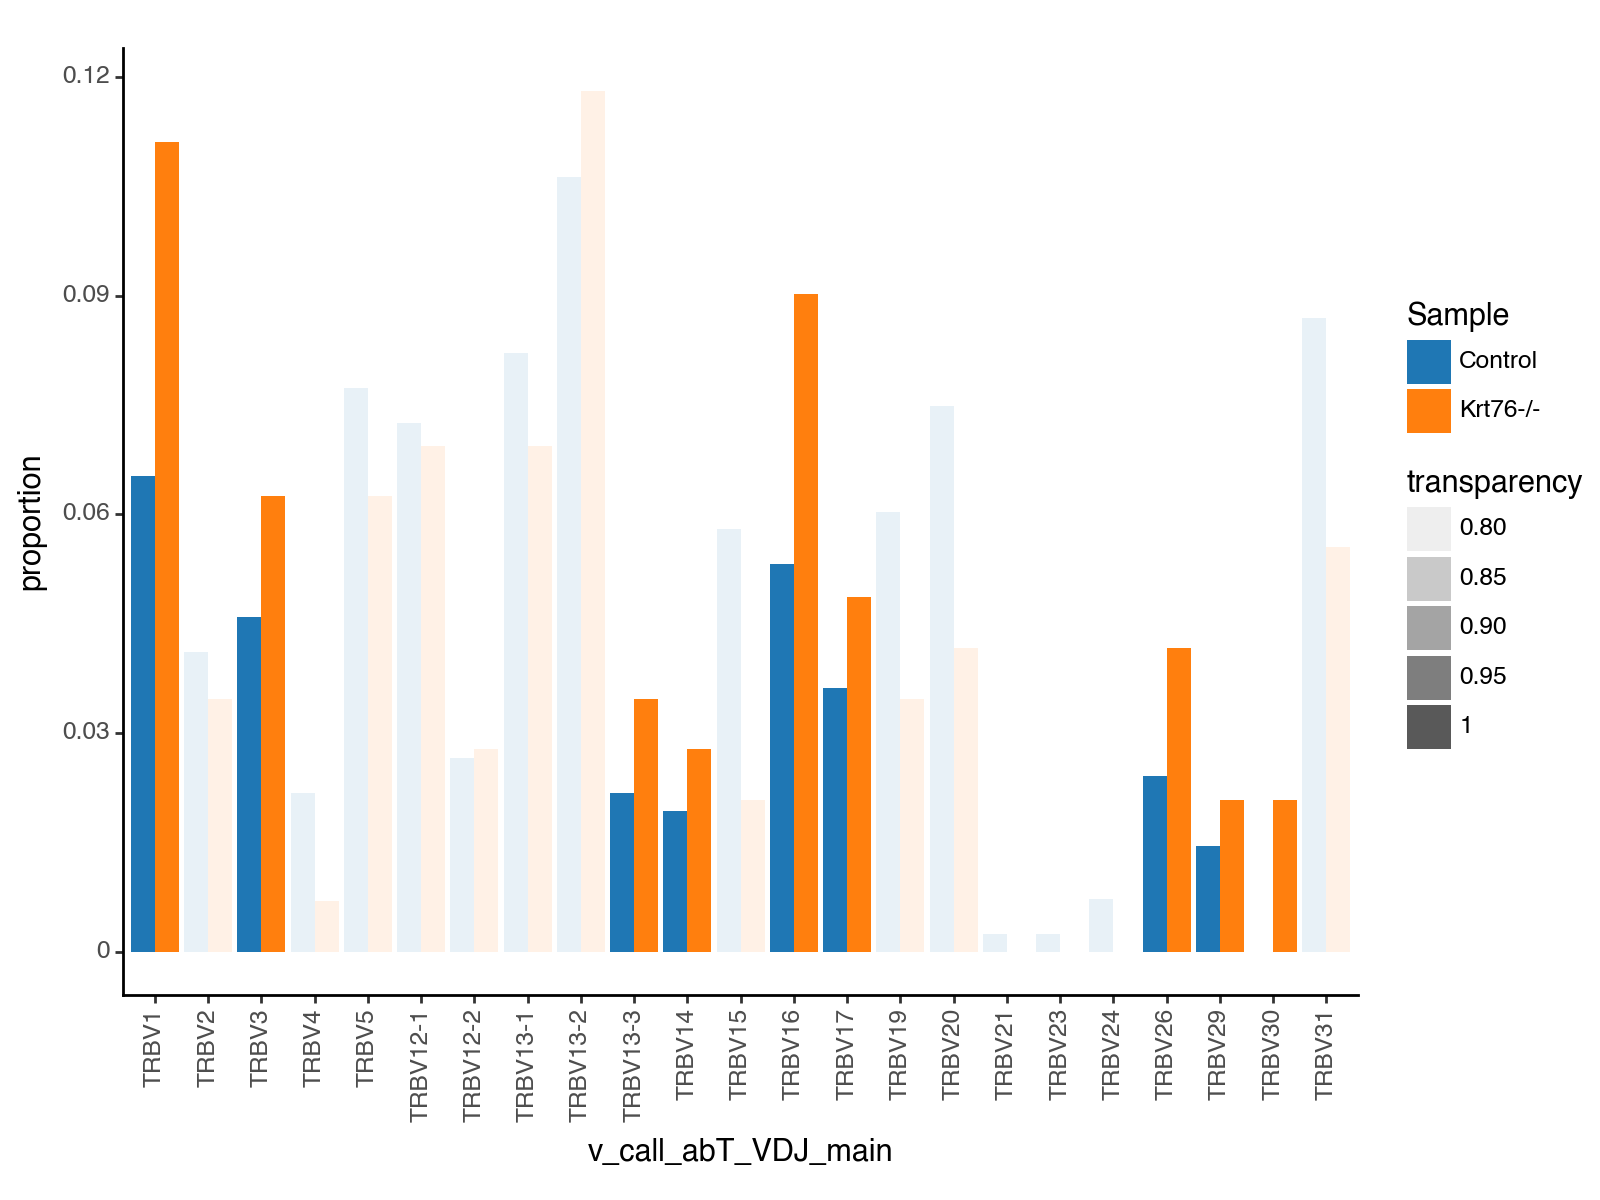

<Figure Size: (800 x 600)>

In [130]:
p

In [1358]:
p.save("VgeneBetaChain_DN2b2_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN2b2_141223.pdf


### DN3 - V gene beta chain

In [1359]:
adata_PF_DN3 = adata_PF[adata_PF.obs["leiden"] == "10 DN3"]

In [1360]:
adata_PF_DN3

View of AnnData object with n_obs × n_vars = 120 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1361]:
working_df = pd.DataFrame(adata_PF_DN3.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV12-1                              10
         TRBV16                                10
         TRBV5                                  7
         TRBV2                                  6
         TRBV1                                  5
         TRBV26                                 5
         TRBV19                                 5
         TRBV15                                 5
         TRBV17                                 4
         TRBV4                                  4
         TRBV12-2                               4
         TRBV20                                 4
         TRBV13-2                               4
         TRBV13-3                               3
         TRBV14                                 3
         TRBV13-1                               3
         TRBV23                                 2
         TRBV3                                  1
         TRBV31                                 0
Krt76-/- TRBV15                                 5
         TRBV20                                 4
         TRBV12-1                               4
         TRBV31                                 3
         TRBV19                                 3
         TRBV5                                  3
         TRBV17                                 2
         TRBV13-3                               2
         TRBV13-1                               2
         TRBV13-2                               1
         TRBV16                                 1
         TRBV12-2                               1
         TRBV4                                  1
         TRBV23                                 1
         TRBV26                                 1
         TRBV1                                  1
         TRBV2                                  0
         TRBV14                                 0
         TRBV3                                  0

In [1362]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV12-1      10
1    Control              TRBV16      10
2    Control               TRBV5       7
3    Control               TRBV2       6
4    Control               TRBV1       5
5    Control              TRBV26       5
6    Control              TRBV19       5
7    Control              TRBV15       5
8    Control              TRBV17       4
9    Control               TRBV4       4
10   Control            TRBV12-2       4
11   Control              TRBV20       4
12   Control            TRBV13-2       4
13   Control            TRBV13-3       3
14   Control              TRBV14       3
15   Control            TRBV13-1       3
16   Control              TRBV23       2
17   Control               TRBV3       1
18   Control              TRBV31       0
19  Krt76-/-              TRBV15       5
20  Krt76-/-              TRBV20       4
21  Krt76-/-            TRBV12-1       4
22  Krt76-/-              TRBV31       3
23  Krt76-/-              TRBV19       3
24  Krt76-/-               TRBV5       3
25  Krt76-/-              TRBV17       2
26  Krt76-/-            TRBV13-3       2
27  Krt76-/-            TRBV13-1       2
28  Krt76-/-            TRBV13-2       1
29  Krt76-/-              TRBV16       1
30  Krt76-/-            TRBV12-2       1
31  Krt76-/-               TRBV4       1
32  Krt76-/-              TRBV23       1
33  Krt76-/-              TRBV26       1
34  Krt76-/-               TRBV1       1
35  Krt76-/-               TRBV2       0
36  Krt76-/-              TRBV14       0
37  Krt76-/-               TRBV3       0

In [1363]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 85, 'Krt76-/-': 35}

In [1364]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1365]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV12-1      10    0.117647
1    Control              TRBV16      10    0.117647
2    Control               TRBV5       7    0.082353
3    Control               TRBV2       6    0.070588
4    Control               TRBV1       5    0.058824
5    Control              TRBV26       5    0.058824
6    Control              TRBV19       5    0.058824
7    Control              TRBV15       5    0.058824
8    Control              TRBV17       4    0.047059
9    Control               TRBV4       4    0.047059
10   Control            TRBV12-2       4    0.047059
11   Control              TRBV20       4    0.047059
12   Control            TRBV13-2       4    0.047059
13   Control            TRBV13-3       3    0.035294
14   Control              TRBV14       3    0.035294
15   Control            TRBV13-1       3    0.035294
16   Control              TRBV23       2    0.023529
17   Control               TRBV3       1    0.011765
18   Control              TRBV31       0    0.000000
19  Krt76-/-              TRBV15       5    0.142857
20  Krt76-/-              TRBV20       4    0.114286
21  Krt76-/-            TRBV12-1       4    0.114286
22  Krt76-/-              TRBV31       3    0.085714
23  Krt76-/-              TRBV19       3    0.085714
24  Krt76-/-               TRBV5       3    0.085714
25  Krt76-/-              TRBV17       2    0.057143
26  Krt76-/-            TRBV13-3       2    0.057143
27  Krt76-/-            TRBV13-1       2    0.057143
28  Krt76-/-            TRBV13-2       1    0.028571
29  Krt76-/-              TRBV16       1    0.028571
30  Krt76-/-            TRBV12-2       1    0.028571
31  Krt76-/-               TRBV4       1    0.028571
32  Krt76-/-              TRBV23       1    0.028571
33  Krt76-/-              TRBV26       1    0.028571
34  Krt76-/-               TRBV1       1    0.028571
35  Krt76-/-               TRBV2       0    0.000000
36  Krt76-/-              TRBV14       0    0.000000
37  Krt76-/-               TRBV3       0    0.000000

In [1366]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 85, 'Krt76-/-': 35}

In [1367]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1368]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV12-1      10    0.117647
1    Control              TRBV16      10    0.117647
2    Control               TRBV5       7    0.082353
3    Control               TRBV2       6    0.070588
4    Control               TRBV1       5    0.058824
5    Control              TRBV26       5    0.058824
6    Control              TRBV19       5    0.058824
7    Control              TRBV15       5    0.058824
8    Control              TRBV17       4    0.047059
9    Control               TRBV4       4    0.047059
10   Control            TRBV12-2       4    0.047059
11   Control              TRBV20       4    0.047059
12   Control            TRBV13-2       4    0.047059
13   Control            TRBV13-3       3    0.035294
14   Control              TRBV14       3    0.035294
15   Control            TRBV13-1       3    0.035294
16   Control              TRBV23       2    0.023529
17   Control               TRBV3       1    0.011765
18   Control              TRBV31       0    0.000000
19  Krt76-/-              TRBV15       5    0.142857
20  Krt76-/-              TRBV20       4    0.114286
21  Krt76-/-            TRBV12-1       4    0.114286
22  Krt76-/-              TRBV31       3    0.085714
23  Krt76-/-              TRBV19       3    0.085714
24  Krt76-/-               TRBV5       3    0.085714
25  Krt76-/-              TRBV17       2    0.057143
26  Krt76-/-            TRBV13-3       2    0.057143
27  Krt76-/-            TRBV13-1       2    0.057143
28  Krt76-/-            TRBV13-2       1    0.028571
29  Krt76-/-              TRBV16       1    0.028571
30  Krt76-/-            TRBV12-2       1    0.028571
31  Krt76-/-               TRBV4       1    0.028571
32  Krt76-/-              TRBV23       1    0.028571
33  Krt76-/-              TRBV26       1    0.028571
34  Krt76-/-               TRBV1       1    0.028571
35  Krt76-/-               TRBV2       0    0.000000
36  Krt76-/-              TRBV14       0    0.000000
37  Krt76-/-               TRBV3       0    0.000000

In [1369]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1370]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1371]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1372]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1373]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.4857142857142857,
 'TRBV2': 0.0,
 'TRBV3': 0.0,
 'TRBV4': 0.6071428571428571,
 'TRBV5': 1.0408163265306123,
 'TRBV12-1': 0.9714285714285714,
 'TRBV12-2': 0.6071428571428571,
 'TRBV13-1': 1.619047619047619,
 'TRBV13-2': 0.6071428571428571,
 'TRBV13-3': 1.619047619047619,
 'TRBV14': 0.0,
 'TRBV15': 2.4285714285714284,
 'TRBV16': 0.24285714285714285,
 'TRBV17': 1.2142857142857142,
 'TRBV19': 1.457142857142857,
 'TRBV20': 2.4285714285714284,
 'TRBV23': 1.2142857142857142,
 'TRBV26': 0.4857142857142857,
 'TRBV31': inf}

In [1374]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV12-1      10    0.117647    0.971429
1    Control              TRBV16      10    0.117647    0.242857
2    Control               TRBV5       7    0.082353    1.040816
3    Control               TRBV2       6    0.070588    0.000000
4    Control               TRBV1       5    0.058824    0.485714
5    Control              TRBV26       5    0.058824    0.485714
6    Control              TRBV19       5    0.058824    1.457143
7    Control              TRBV15       5    0.058824    2.428571
8    Control              TRBV17       4    0.047059    1.214286
9    Control               TRBV4       4    0.047059    0.607143
10   Control            TRBV12-2       4    0.047059    0.607143
11   Control              TRBV20       4    0.047059    2.428571
12   Control            TRBV13-2       4    0.047059    0.607143
13   Control            TRBV13-3       3    0.035294    1.619048
14   Control              TRBV14       3    0.035294    0.000000
15   Control            TRBV13-1       3    0.035294    1.619048
16   Control              TRBV23       2    0.023529    1.214286
17   Control               TRBV3       1    0.011765    0.000000
18   Control              TRBV31       0    0.000000         inf
19  Krt76-/-              TRBV15       5    0.142857    2.428571
20  Krt76-/-              TRBV20       4    0.114286    2.428571
21  Krt76-/-            TRBV12-1       4    0.114286    0.971429
22  Krt76-/-              TRBV31       3    0.085714         inf
23  Krt76-/-              TRBV19       3    0.085714    1.457143
24  Krt76-/-               TRBV5       3    0.085714    1.040816
25  Krt76-/-              TRBV17       2    0.057143    1.214286
26  Krt76-/-            TRBV13-3       2    0.057143    1.619048
27  Krt76-/-            TRBV13-1       2    0.057143    1.619048
28  Krt76-/-            TRBV13-2       1    0.028571    0.607143
29  Krt76-/-              TRBV16       1    0.028571    0.242857
30  Krt76-/-            TRBV12-2       1    0.028571    0.607143
31  Krt76-/-               TRBV4       1    0.028571    0.607143
32  Krt76-/-              TRBV23       1    0.028571    1.214286
33  Krt76-/-              TRBV26       1    0.028571    0.485714
34  Krt76-/-               TRBV1       1    0.028571    0.485714
35  Krt76-/-               TRBV2       0    0.000000    0.000000
36  Krt76-/-              TRBV14       0    0.000000    0.000000
37  Krt76-/-               TRBV3       0    0.000000    0.000000

In [1375]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1376]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1377]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1378]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

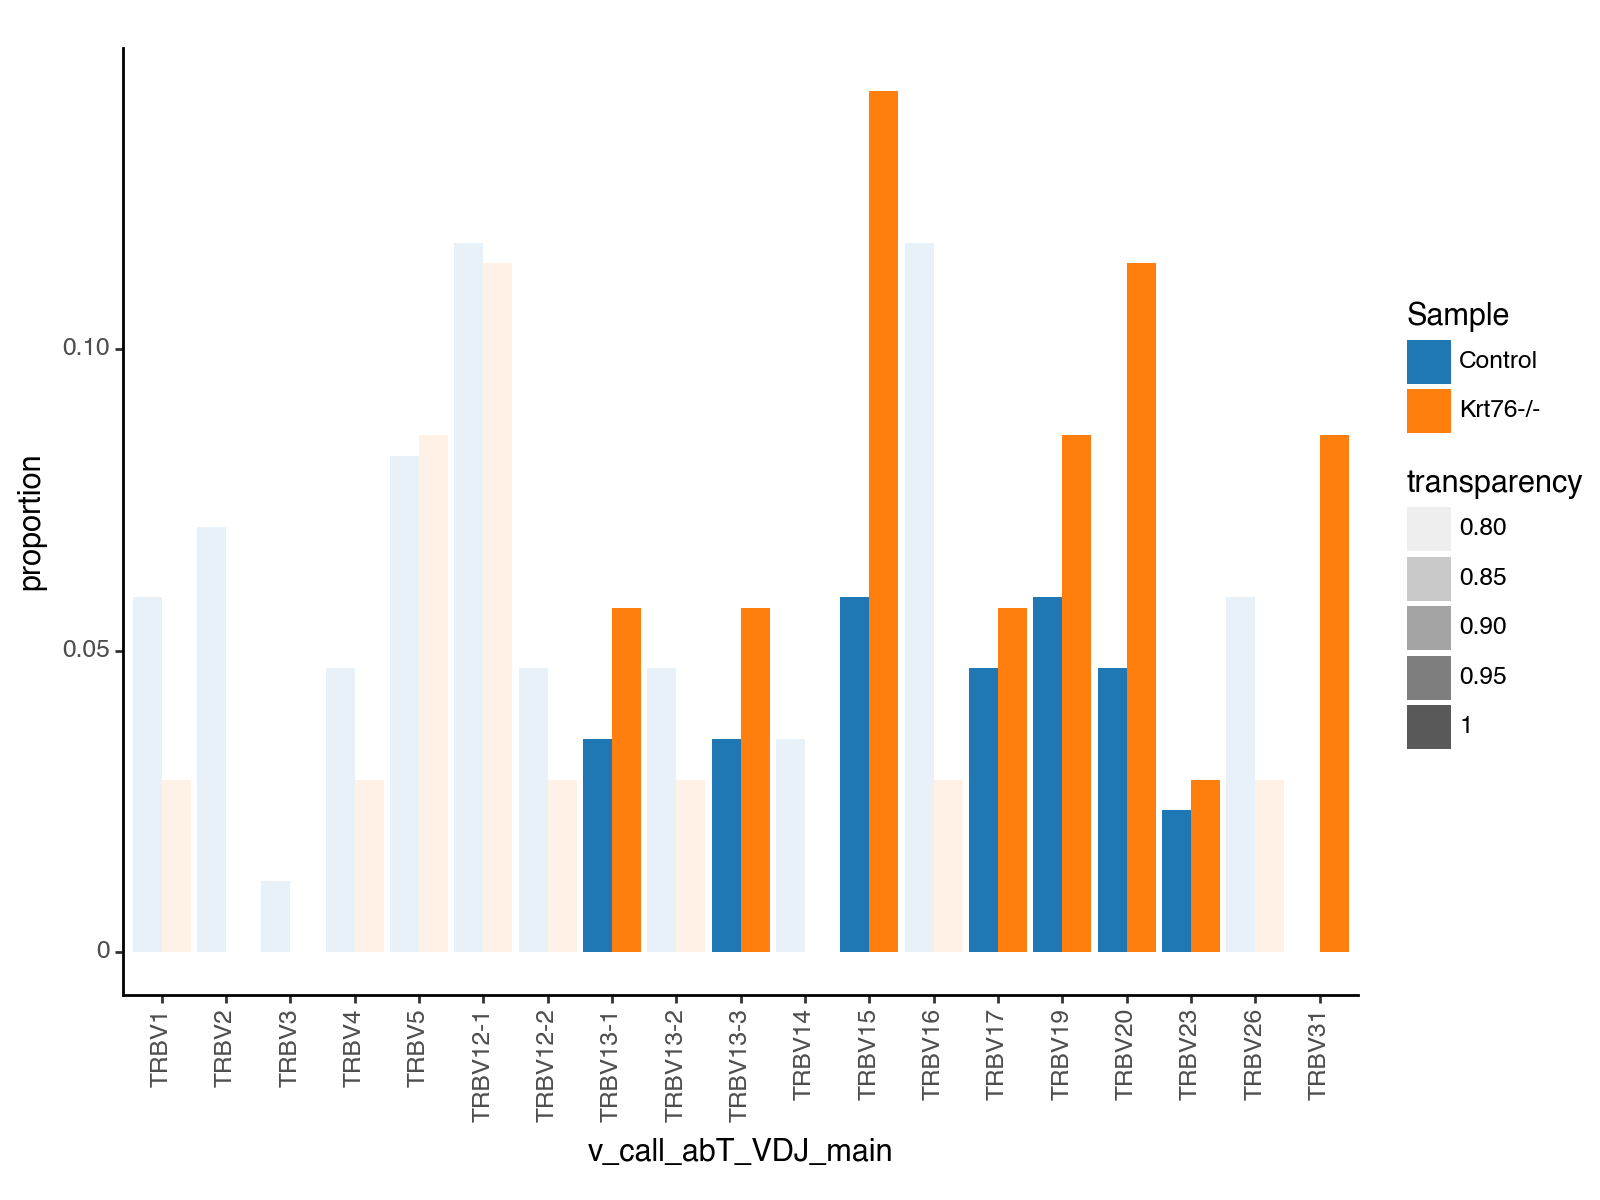

<Figure Size: (800 x 600)>

In [151]:
p

In [1379]:
p.save("VgeneBetaChain_DN3_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN3_141223.pdf


### DN3a - V gene beta chain

In [1380]:
adata_PF_DN3a = adata_PF[adata_PF.obs["leiden"] == "0 DN3a"]

In [1381]:
adata_PF_DN3a

View of AnnData object with n_obs × n_vars = 611 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1382]:
working_df = pd.DataFrame(adata_PF_DN3a.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV13-2                              33
         TRBV15                                30
         TRBV13-1                              30
         TRBV5                                 27
         TRBV3                                 24
         TRBV12-1                              24
         TRBV19                                24
         TRBV16                                23
         TRBV4                                 23
         TRBV20                                20
         TRBV1                                 19
         TRBV31                                19
         TRBV2                                 18
         TRBV14                                16
         TRBV13-3                              15
         TRBV26                                14
         TRBV12-2                              13
         TRBV29                                12
         TRBV17                                11
         TRBV30                                 3
         TRBV23                                 2
         TRBV21                                 1
Krt76-/- TRBV5                                 20
         TRBV13-2                              19
         TRBV19                                19
         TRBV13-1                              16
         TRBV15                                15
         TRBV3                                 15
         TRBV16                                12
         TRBV20                                11
         TRBV1                                 11
         TRBV2                                 10
         TRBV31                                10
         TRBV17                                 9
         TRBV12-1                               8
         TRBV26                                 8
         TRBV13-3                               7
         TRBV12-2                               7
         TRBV4                                  5
         TRBV14                                 3
         TRBV29                                 3
         TRBV23                                 1
         TRBV30                                 1
         TRBV21                                 0

In [1383]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2      33
1    Control              TRBV15      30
2    Control            TRBV13-1      30
3    Control               TRBV5      27
4    Control               TRBV3      24
5    Control            TRBV12-1      24
6    Control              TRBV19      24
7    Control              TRBV16      23
8    Control               TRBV4      23
9    Control              TRBV20      20
10   Control               TRBV1      19
11   Control              TRBV31      19
12   Control               TRBV2      18
13   Control              TRBV14      16
14   Control            TRBV13-3      15
15   Control              TRBV26      14
16   Control            TRBV12-2      13
17   Control              TRBV29      12
18   Control              TRBV17      11
19   Control              TRBV30       3
20   Control              TRBV23       2
21   Control              TRBV21       1
22  Krt76-/-               TRBV5      20
23  Krt76-/-            TRBV13-2      19
24  Krt76-/-              TRBV19      19
25  Krt76-/-            TRBV13-1      16
26  Krt76-/-              TRBV15      15
27  Krt76-/-               TRBV3      15
28  Krt76-/-              TRBV16      12
29  Krt76-/-              TRBV20      11
30  Krt76-/-               TRBV1      11
31  Krt76-/-               TRBV2      10
32  Krt76-/-              TRBV31      10
33  Krt76-/-              TRBV17       9
34  Krt76-/-            TRBV12-1       8
35  Krt76-/-              TRBV26       8
36  Krt76-/-            TRBV13-3       7
37  Krt76-/-            TRBV12-2       7
38  Krt76-/-               TRBV4       5
39  Krt76-/-              TRBV14       3
40  Krt76-/-              TRBV29       3
41  Krt76-/-              TRBV23       1
42  Krt76-/-              TRBV30       1
43  Krt76-/-              TRBV21       0

In [1384]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 401, 'Krt76-/-': 210}

In [1385]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1386]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      33    0.082294
1    Control              TRBV15      30    0.074813
2    Control            TRBV13-1      30    0.074813
3    Control               TRBV5      27    0.067332
4    Control               TRBV3      24    0.059850
5    Control            TRBV12-1      24    0.059850
6    Control              TRBV19      24    0.059850
7    Control              TRBV16      23    0.057357
8    Control               TRBV4      23    0.057357
9    Control              TRBV20      20    0.049875
10   Control               TRBV1      19    0.047382
11   Control              TRBV31      19    0.047382
12   Control               TRBV2      18    0.044888
13   Control              TRBV14      16    0.039900
14   Control            TRBV13-3      15    0.037406
15   Control              TRBV26      14    0.034913
16   Control            TRBV12-2      13    0.032419
17   Control              TRBV29      12    0.029925
18   Control              TRBV17      11    0.027431
19   Control              TRBV30       3    0.007481
20   Control              TRBV23       2    0.004988
21   Control              TRBV21       1    0.002494
22  Krt76-/-               TRBV5      20    0.095238
23  Krt76-/-            TRBV13-2      19    0.090476
24  Krt76-/-              TRBV19      19    0.090476
25  Krt76-/-            TRBV13-1      16    0.076190
26  Krt76-/-              TRBV15      15    0.071429
27  Krt76-/-               TRBV3      15    0.071429
28  Krt76-/-              TRBV16      12    0.057143
29  Krt76-/-              TRBV20      11    0.052381
30  Krt76-/-               TRBV1      11    0.052381
31  Krt76-/-               TRBV2      10    0.047619
32  Krt76-/-              TRBV31      10    0.047619
33  Krt76-/-              TRBV17       9    0.042857
34  Krt76-/-            TRBV12-1       8    0.038095
35  Krt76-/-              TRBV26       8    0.038095
36  Krt76-/-            TRBV13-3       7    0.033333
37  Krt76-/-            TRBV12-2       7    0.033333
38  Krt76-/-               TRBV4       5    0.023810
39  Krt76-/-              TRBV14       3    0.014286
40  Krt76-/-              TRBV29       3    0.014286
41  Krt76-/-              TRBV23       1    0.004762
42  Krt76-/-              TRBV30       1    0.004762
43  Krt76-/-              TRBV21       0    0.000000

In [1387]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 401, 'Krt76-/-': 210}

In [1388]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1389]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      33    0.082294
1    Control              TRBV15      30    0.074813
2    Control            TRBV13-1      30    0.074813
3    Control               TRBV5      27    0.067332
4    Control               TRBV3      24    0.059850
5    Control            TRBV12-1      24    0.059850
6    Control              TRBV19      24    0.059850
7    Control              TRBV16      23    0.057357
8    Control               TRBV4      23    0.057357
9    Control              TRBV20      20    0.049875
10   Control               TRBV1      19    0.047382
11   Control              TRBV31      19    0.047382
12   Control               TRBV2      18    0.044888
13   Control              TRBV14      16    0.039900
14   Control            TRBV13-3      15    0.037406
15   Control              TRBV26      14    0.034913
16   Control            TRBV12-2      13    0.032419
17   Control              TRBV29      12    0.029925
18   Control              TRBV17      11    0.027431
19   Control              TRBV30       3    0.007481
20   Control              TRBV23       2    0.004988
21   Control              TRBV21       1    0.002494
22  Krt76-/-               TRBV5      20    0.095238
23  Krt76-/-            TRBV13-2      19    0.090476
24  Krt76-/-              TRBV19      19    0.090476
25  Krt76-/-            TRBV13-1      16    0.076190
26  Krt76-/-              TRBV15      15    0.071429
27  Krt76-/-               TRBV3      15    0.071429
28  Krt76-/-              TRBV16      12    0.057143
29  Krt76-/-              TRBV20      11    0.052381
30  Krt76-/-               TRBV1      11    0.052381
31  Krt76-/-               TRBV2      10    0.047619
32  Krt76-/-              TRBV31      10    0.047619
33  Krt76-/-              TRBV17       9    0.042857
34  Krt76-/-            TRBV12-1       8    0.038095
35  Krt76-/-              TRBV26       8    0.038095
36  Krt76-/-            TRBV13-3       7    0.033333
37  Krt76-/-            TRBV12-2       7    0.033333
38  Krt76-/-               TRBV4       5    0.023810
39  Krt76-/-              TRBV14       3    0.014286
40  Krt76-/-              TRBV29       3    0.014286
41  Krt76-/-              TRBV23       1    0.004762
42  Krt76-/-              TRBV30       1    0.004762
43  Krt76-/-              TRBV21       0    0.000000

In [1390]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1391]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1392]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1393]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1394]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.105513784461153,
 'TRBV2': 1.0608465608465607,
 'TRBV3': 1.193452380952381,
 'TRBV4': 0.41511387163561075,
 'TRBV5': 1.4144620811287478,
 'TRBV12-1': 0.6365079365079366,
 'TRBV12-2': 1.028205128205128,
 'TRBV13-1': 1.0184126984126984,
 'TRBV13-2': 1.0994227994227994,
 'TRBV13-3': 0.8911111111111111,
 'TRBV14': 0.3580357142857143,
 'TRBV15': 0.9547619047619047,
 'TRBV16': 0.9962732919254658,
 'TRBV17': 1.5623376623376624,
 'TRBV19': 1.5117063492063492,
 'TRBV20': 1.0502380952380952,
 'TRBV21': 0.0,
 'TRBV23': 0.9547619047619049,
 'TRBV26': 1.0911564625850343,
 'TRBV29': 0.4773809523809524,
 'TRBV30': 0.6365079365079366,
 'TRBV31': 1.0050125313283207}

In [1395]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2      33    0.082294    1.099423
1    Control              TRBV15      30    0.074813    0.954762
2    Control            TRBV13-1      30    0.074813    1.018413
3    Control               TRBV5      27    0.067332    1.414462
4    Control               TRBV3      24    0.059850    1.193452
5    Control            TRBV12-1      24    0.059850    0.636508
6    Control              TRBV19      24    0.059850    1.511706
7    Control              TRBV16      23    0.057357    0.996273
8    Control               TRBV4      23    0.057357    0.415114
9    Control              TRBV20      20    0.049875    1.050238
10   Control               TRBV1      19    0.047382    1.105514
11   Control              TRBV31      19    0.047382    1.005013
12   Control               TRBV2      18    0.044888    1.060847
13   Control              TRBV14      16    0.039900    0.358036
14   Control            TRBV13-3      15    0.037406    0.891111
15   Control              TRBV26      14    0.034913    1.091156
16   Control            TRBV12-2      13    0.032419    1.028205
17   Control              TRBV29      12    0.029925    0.477381
18   Control              TRBV17      11    0.027431    1.562338
19   Control              TRBV30       3    0.007481    0.636508
20   Control              TRBV23       2    0.004988    0.954762
21   Control              TRBV21       1    0.002494    0.000000
22  Krt76-/-               TRBV5      20    0.095238    1.414462
23  Krt76-/-            TRBV13-2      19    0.090476    1.099423
24  Krt76-/-              TRBV19      19    0.090476    1.511706
25  Krt76-/-            TRBV13-1      16    0.076190    1.018413
26  Krt76-/-              TRBV15      15    0.071429    0.954762
27  Krt76-/-               TRBV3      15    0.071429    1.193452
28  Krt76-/-              TRBV16      12    0.057143    0.996273
29  Krt76-/-              TRBV20      11    0.052381    1.050238
30  Krt76-/-               TRBV1      11    0.052381    1.105514
31  Krt76-/-               TRBV2      10    0.047619    1.060847
32  Krt76-/-              TRBV31      10    0.047619    1.005013
33  Krt76-/-              TRBV17       9    0.042857    1.562338
34  Krt76-/-            TRBV12-1       8    0.038095    0.636508
35  Krt76-/-              TRBV26       8    0.038095    1.091156
36  Krt76-/-            TRBV13-3       7    0.033333    0.891111
37  Krt76-/-            TRBV12-2       7    0.033333    1.028205
38  Krt76-/-               TRBV4       5    0.023810    0.415114
39  Krt76-/-              TRBV14       3    0.014286    0.358036
40  Krt76-/-              TRBV29       3    0.014286    0.477381
41  Krt76-/-              TRBV23       1    0.004762    0.954762
42  Krt76-/-              TRBV30       1    0.004762    0.636508
43  Krt76-/-              TRBV21       0    0.000000    0.000000

In [1396]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1397]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1398]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1399]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

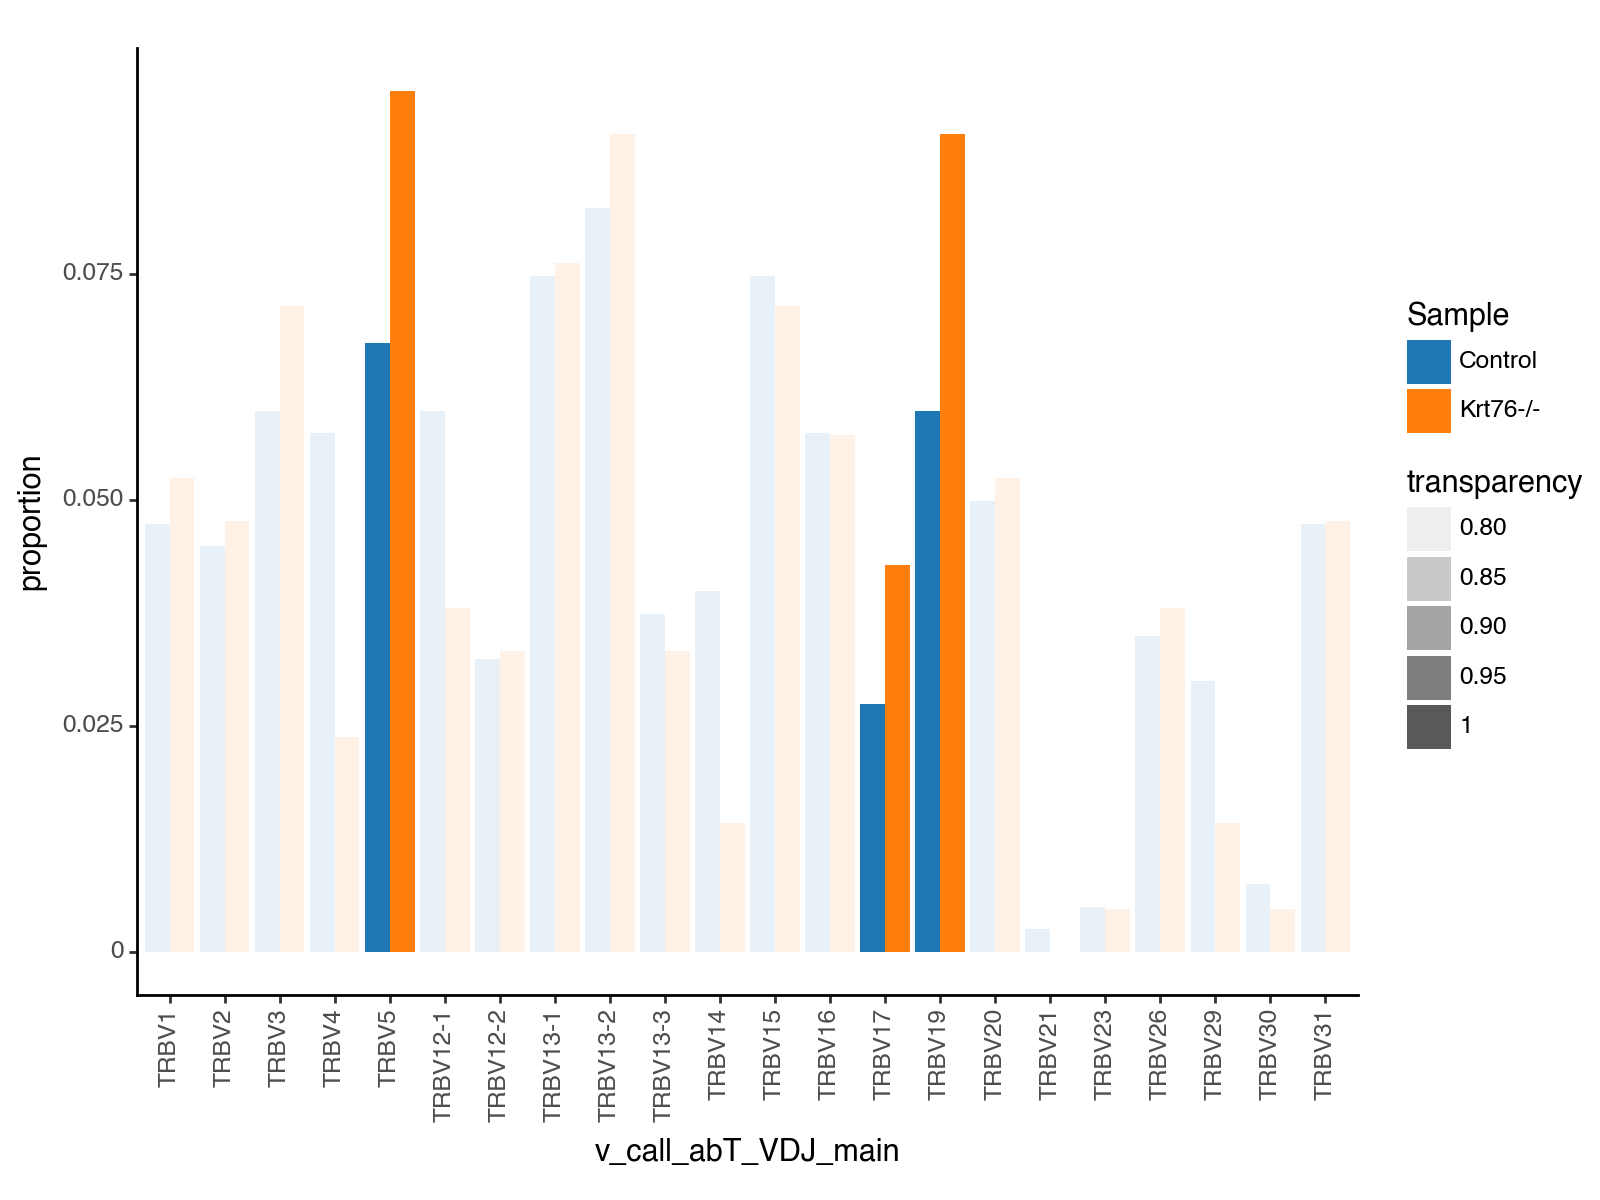

<Figure Size: (800 x 600)>

In [172]:
p

In [1400]:
p.save("VgeneBetaChain_DN33a_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN33a_141223.pdf


### DN3ab - V gene beta chain

In [1401]:
adata_PF_DN3ab = adata_PF[adata_PF.obs["leiden"] == "1 DN3a / DN3b"]

In [1402]:
adata_PF_DN3ab

View of AnnData object with n_obs × n_vars = 313 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1403]:
working_df = pd.DataFrame(adata_PF_DN3ab.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV5                                 22
         TRBV15                                22
         TRBV20                                19
         TRBV19                                19
         TRBV13-2                              19
         TRBV16                                16
         TRBV12-1                              13
         TRBV1                                 11
         TRBV2                                 11
         TRBV13-1                              10
         TRBV13-3                              10
         TRBV31                                 9
         TRBV3                                  9
         TRBV12-2                               7
         TRBV29                                 7
         TRBV17                                 6
         TRBV26                                 6
         TRBV4                                  5
         TRBV14                                 3
         TRBV10                                 2
         TRBV23                                 2
         TRBV21                                 1
         TRBV30                                 0
Krt76-/- TRBV20                                 8
         TRBV5                                  8
         TRBV3                                  8
         TRBV13-2                               7
         TRBV1                                  7
         TRBV15                                 6
         TRBV13-1                               6
         TRBV16                                 5
         TRBV17                                 5
         TRBV12-1                               4
         TRBV19                                 4
         TRBV12-2                               3
         TRBV26                                 3
         TRBV4                                  3
         TRBV29                                 2
         TRBV2                                  2
         TRBV30                                 1
         TRBV14                                 1
         TRBV13-3                               1
         TRBV23                                 0
         TRBV21                                 0
         TRBV10                                 0
         TRBV31                                 0

In [1404]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5      22
1    Control              TRBV15      22
2    Control              TRBV20      19
3    Control              TRBV19      19
4    Control            TRBV13-2      19
5    Control              TRBV16      16
6    Control            TRBV12-1      13
7    Control               TRBV1      11
8    Control               TRBV2      11
9    Control            TRBV13-1      10
10   Control            TRBV13-3      10
11   Control              TRBV31       9
12   Control               TRBV3       9
13   Control            TRBV12-2       7
14   Control              TRBV29       7
15   Control              TRBV17       6
16   Control              TRBV26       6
17   Control               TRBV4       5
18   Control              TRBV14       3
19   Control              TRBV10       2
20   Control              TRBV23       2
21   Control              TRBV21       1
22   Control              TRBV30       0
23  Krt76-/-              TRBV20       8
24  Krt76-/-               TRBV5       8
25  Krt76-/-               TRBV3       8
26  Krt76-/-            TRBV13-2       7
27  Krt76-/-               TRBV1       7
28  Krt76-/-              TRBV15       6
29  Krt76-/-            TRBV13-1       6
30  Krt76-/-              TRBV16       5
31  Krt76-/-              TRBV17       5
32  Krt76-/-            TRBV12-1       4
33  Krt76-/-              TRBV19       4
34  Krt76-/-            TRBV12-2       3
35  Krt76-/-              TRBV26       3
36  Krt76-/-               TRBV4       3
37  Krt76-/-              TRBV29       2
38  Krt76-/-               TRBV2       2
39  Krt76-/-              TRBV30       1
40  Krt76-/-              TRBV14       1
41  Krt76-/-            TRBV13-3       1
42  Krt76-/-              TRBV23       0
43  Krt76-/-              TRBV21       0
44  Krt76-/-              TRBV10       0
45  Krt76-/-              TRBV31       0

In [1405]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 229, 'Krt76-/-': 84}

In [1406]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1407]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5      22    0.096070
1    Control              TRBV15      22    0.096070
2    Control              TRBV20      19    0.082969
3    Control              TRBV19      19    0.082969
4    Control            TRBV13-2      19    0.082969
5    Control              TRBV16      16    0.069869
6    Control            TRBV12-1      13    0.056769
7    Control               TRBV1      11    0.048035
8    Control               TRBV2      11    0.048035
9    Control            TRBV13-1      10    0.043668
10   Control            TRBV13-3      10    0.043668
11   Control              TRBV31       9    0.039301
12   Control               TRBV3       9    0.039301
13   Control            TRBV12-2       7    0.030568
14   Control              TRBV29       7    0.030568
15   Control              TRBV17       6    0.026201
16   Control              TRBV26       6    0.026201
17   Control               TRBV4       5    0.021834
18   Control              TRBV14       3    0.013100
19   Control              TRBV10       2    0.008734
20   Control              TRBV23       2    0.008734
21   Control              TRBV21       1    0.004367
22   Control              TRBV30       0    0.000000
23  Krt76-/-              TRBV20       8    0.095238
24  Krt76-/-               TRBV5       8    0.095238
25  Krt76-/-               TRBV3       8    0.095238
26  Krt76-/-            TRBV13-2       7    0.083333
27  Krt76-/-               TRBV1       7    0.083333
28  Krt76-/-              TRBV15       6    0.071429
29  Krt76-/-            TRBV13-1       6    0.071429
30  Krt76-/-              TRBV16       5    0.059524
31  Krt76-/-              TRBV17       5    0.059524
32  Krt76-/-            TRBV12-1       4    0.047619
33  Krt76-/-              TRBV19       4    0.047619
34  Krt76-/-            TRBV12-2       3    0.035714
35  Krt76-/-              TRBV26       3    0.035714
36  Krt76-/-               TRBV4       3    0.035714
37  Krt76-/-              TRBV29       2    0.023810
38  Krt76-/-               TRBV2       2    0.023810
39  Krt76-/-              TRBV30       1    0.011905
40  Krt76-/-              TRBV14       1    0.011905
41  Krt76-/-            TRBV13-3       1    0.011905
42  Krt76-/-              TRBV23       0    0.000000
43  Krt76-/-              TRBV21       0    0.000000
44  Krt76-/-              TRBV10       0    0.000000
45  Krt76-/-              TRBV31       0    0.000000

In [1408]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 229, 'Krt76-/-': 84}

In [1409]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1410]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5      22    0.096070
1    Control              TRBV15      22    0.096070
2    Control              TRBV20      19    0.082969
3    Control              TRBV19      19    0.082969
4    Control            TRBV13-2      19    0.082969
5    Control              TRBV16      16    0.069869
6    Control            TRBV12-1      13    0.056769
7    Control               TRBV1      11    0.048035
8    Control               TRBV2      11    0.048035
9    Control            TRBV13-1      10    0.043668
10   Control            TRBV13-3      10    0.043668
11   Control              TRBV31       9    0.039301
12   Control               TRBV3       9    0.039301
13   Control            TRBV12-2       7    0.030568
14   Control              TRBV29       7    0.030568
15   Control              TRBV17       6    0.026201
16   Control              TRBV26       6    0.026201
17   Control               TRBV4       5    0.021834
18   Control              TRBV14       3    0.013100
19   Control              TRBV10       2    0.008734
20   Control              TRBV23       2    0.008734
21   Control              TRBV21       1    0.004367
22   Control              TRBV30       0    0.000000
23  Krt76-/-              TRBV20       8    0.095238
24  Krt76-/-               TRBV5       8    0.095238
25  Krt76-/-               TRBV3       8    0.095238
26  Krt76-/-            TRBV13-2       7    0.083333
27  Krt76-/-               TRBV1       7    0.083333
28  Krt76-/-              TRBV15       6    0.071429
29  Krt76-/-            TRBV13-1       6    0.071429
30  Krt76-/-              TRBV16       5    0.059524
31  Krt76-/-              TRBV17       5    0.059524
32  Krt76-/-            TRBV12-1       4    0.047619
33  Krt76-/-              TRBV19       4    0.047619
34  Krt76-/-            TRBV12-2       3    0.035714
35  Krt76-/-              TRBV26       3    0.035714
36  Krt76-/-               TRBV4       3    0.035714
37  Krt76-/-              TRBV29       2    0.023810
38  Krt76-/-               TRBV2       2    0.023810
39  Krt76-/-              TRBV30       1    0.011905
40  Krt76-/-              TRBV14       1    0.011905
41  Krt76-/-            TRBV13-3       1    0.011905
42  Krt76-/-              TRBV23       0    0.000000
43  Krt76-/-              TRBV21       0    0.000000
44  Krt76-/-              TRBV10       0    0.000000
45  Krt76-/-              TRBV31       0    0.000000

In [1411]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1412]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1413]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1414]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1415]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.7348484848484846,
 'TRBV2': 0.49567099567099565,
 'TRBV3': 2.4232804232804233,
 'TRBV4': 1.6357142857142857,
 'TRBV5': 0.9913419913419913,
 'TRBV10': 0.0,
 'TRBV12-1': 0.8388278388278387,
 'TRBV12-2': 1.1683673469387754,
 'TRBV13-1': 1.6357142857142857,
 'TRBV13-2': 1.0043859649122806,
 'TRBV13-3': 0.2726190476190476,
 'TRBV14': 0.9087301587301587,
 'TRBV15': 0.7435064935064934,
 'TRBV16': 0.8519345238095238,
 'TRBV17': 2.2718253968253967,
 'TRBV19': 0.5739348370927319,
 'TRBV20': 1.1478696741854637,
 'TRBV21': 0.0,
 'TRBV23': 0.0,
 'TRBV26': 1.3630952380952381,
 'TRBV29': 0.7789115646258503,
 'TRBV30': inf,
 'TRBV31': 0.0}

In [1416]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5      22    0.096070    0.991342
1    Control              TRBV15      22    0.096070    0.743506
2    Control              TRBV20      19    0.082969    1.147870
3    Control              TRBV19      19    0.082969    0.573935
4    Control            TRBV13-2      19    0.082969    1.004386
5    Control              TRBV16      16    0.069869    0.851935
6    Control            TRBV12-1      13    0.056769    0.838828
7    Control               TRBV1      11    0.048035    1.734848
8    Control               TRBV2      11    0.048035    0.495671
9    Control            TRBV13-1      10    0.043668    1.635714
10   Control            TRBV13-3      10    0.043668    0.272619
11   Control              TRBV31       9    0.039301    0.000000
12   Control               TRBV3       9    0.039301    2.423280
13   Control            TRBV12-2       7    0.030568    1.168367
14   Control              TRBV29       7    0.030568    0.778912
15   Control              TRBV17       6    0.026201    2.271825
16   Control              TRBV26       6    0.026201    1.363095
17   Control               TRBV4       5    0.021834    1.635714
18   Control              TRBV14       3    0.013100    0.908730
19   Control              TRBV10       2    0.008734    0.000000
20   Control              TRBV23       2    0.008734    0.000000
21   Control              TRBV21       1    0.004367    0.000000
22   Control              TRBV30       0    0.000000         inf
23  Krt76-/-              TRBV20       8    0.095238    1.147870
24  Krt76-/-               TRBV5       8    0.095238    0.991342
25  Krt76-/-               TRBV3       8    0.095238    2.423280
26  Krt76-/-            TRBV13-2       7    0.083333    1.004386
27  Krt76-/-               TRBV1       7    0.083333    1.734848
28  Krt76-/-              TRBV15       6    0.071429    0.743506
29  Krt76-/-            TRBV13-1       6    0.071429    1.635714
30  Krt76-/-              TRBV16       5    0.059524    0.851935
31  Krt76-/-              TRBV17       5    0.059524    2.271825
32  Krt76-/-            TRBV12-1       4    0.047619    0.838828
33  Krt76-/-              TRBV19       4    0.047619    0.573935
34  Krt76-/-            TRBV12-2       3    0.035714    1.168367
35  Krt76-/-              TRBV26       3    0.035714    1.363095
36  Krt76-/-               TRBV4       3    0.035714    1.635714
37  Krt76-/-              TRBV29       2    0.023810    0.778912
38  Krt76-/-               TRBV2       2    0.023810    0.495671
39  Krt76-/-              TRBV30       1    0.011905         inf
40  Krt76-/-              TRBV14       1    0.011905    0.908730
41  Krt76-/-            TRBV13-3       1    0.011905    0.272619
42  Krt76-/-              TRBV23       0    0.000000    0.000000
43  Krt76-/-              TRBV21       0    0.000000    0.000000
44  Krt76-/-              TRBV10       0    0.000000    0.000000
45  Krt76-/-              TRBV31       0    0.000000    0.000000

In [1417]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1418]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1419]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1420]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

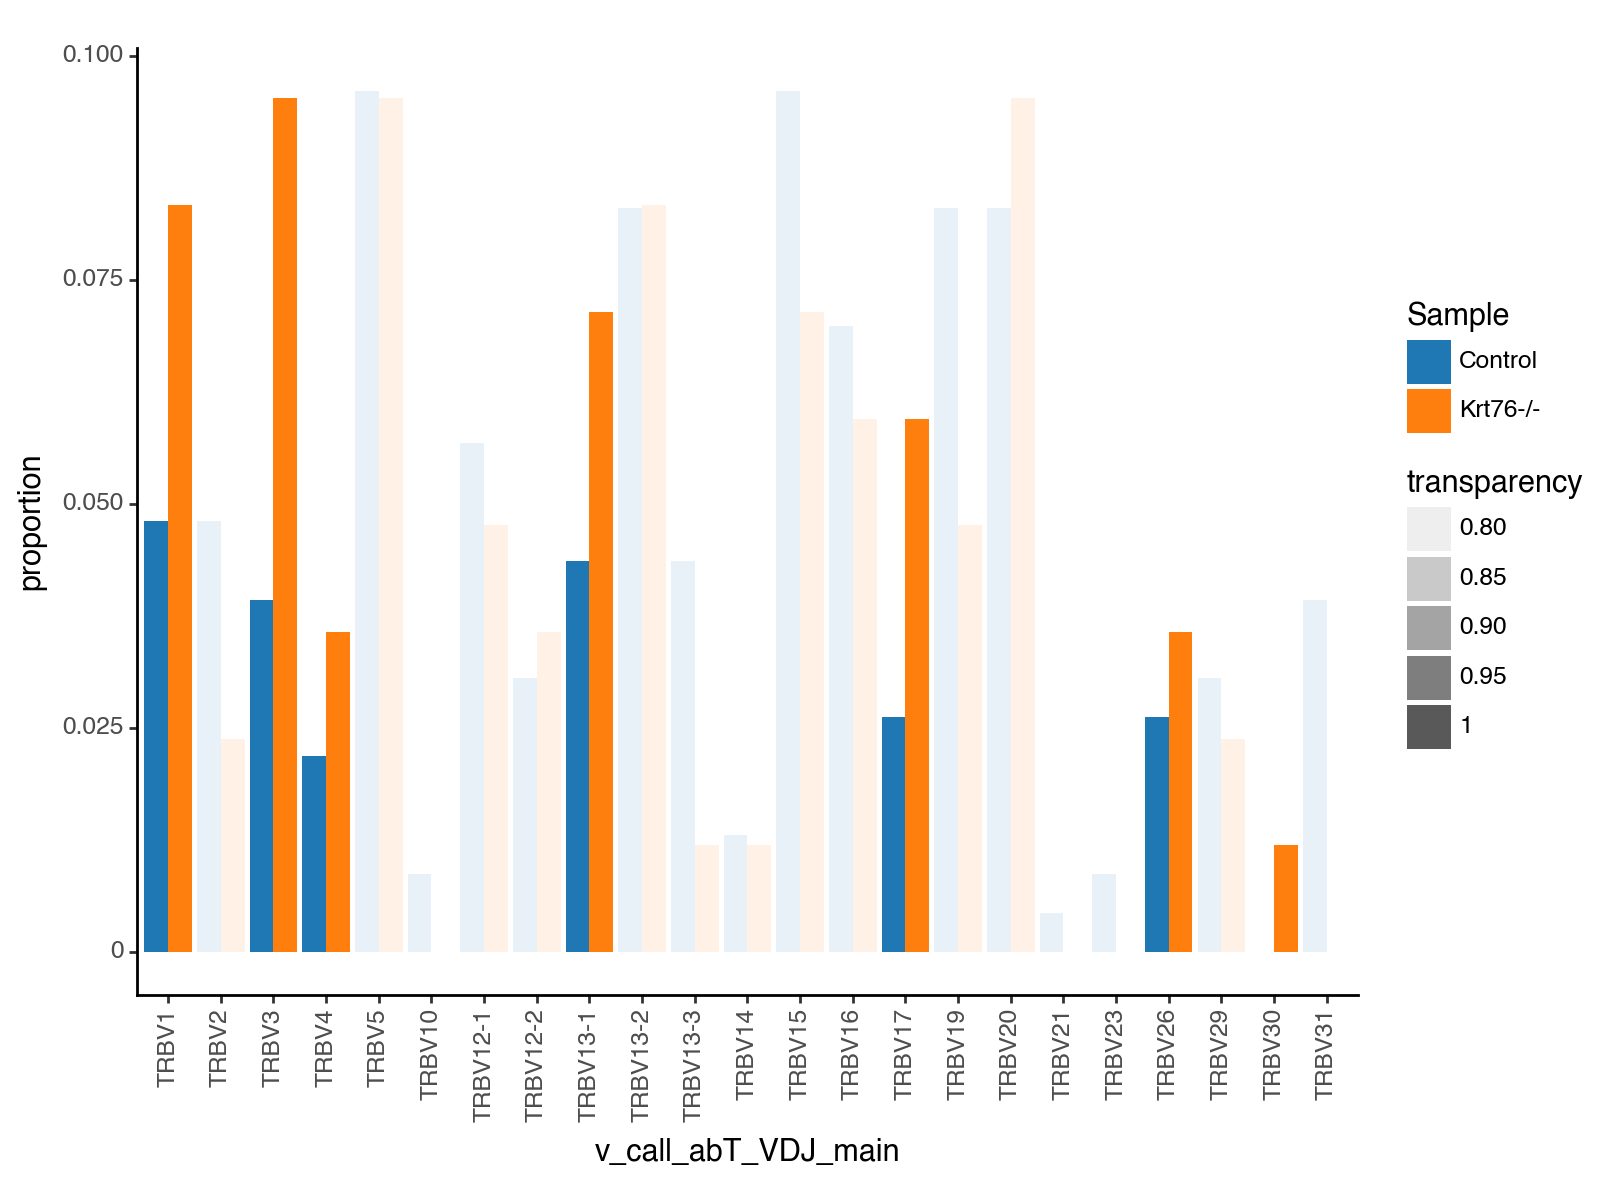

<Figure Size: (800 x 600)>

In [197]:
p

In [1421]:
p.save("VgeneBetaChain_DN3ab_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN3ab_141223.pdf


### DN3b - V gene beta chain

In [1422]:
adata_PF_DN3b = adata_PF[adata_PF.obs["leiden"] == "6 DN3b"]

In [1423]:
adata_PF_DN3b

View of AnnData object with n_obs × n_vars = 594 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1424]:
working_df = pd.DataFrame(adata_PF_DN3b.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV13-2                              35
         TRBV5                                 29
         TRBV16                                29
         TRBV15                                25
         TRBV12-1                              25
         TRBV4                                 20
         TRBV13-1                              20
         TRBV13-3                              20
         TRBV1                                 19
         TRBV26                                19
         TRBV19                                17
         TRBV31                                17
         TRBV2                                 17
         TRBV3                                 17
         TRBV12-2                              16
         TRBV17                                13
         TRBV20                                13
         TRBV29                                13
         TRBV14                                 6
         TRBV23                                 5
         TRBV30                                 4
Krt76-/- TRBV13-2                              24
         TRBV13-3                              16
         TRBV5                                 15
         TRBV3                                 14
         TRBV2                                 14
         TRBV20                                12
         TRBV12-1                              11
         TRBV12-2                              11
         TRBV15                                11
         TRBV4                                 10
         TRBV29                                10
         TRBV1                                  9
         TRBV13-1                               9
         TRBV26                                 8
         TRBV14                                 8
         TRBV17                                 8
         TRBV16                                 8
         TRBV19                                 7
         TRBV31                                 6
         TRBV23                                 2
         TRBV30                                 2

In [1425]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2      35
1    Control               TRBV5      29
2    Control              TRBV16      29
3    Control              TRBV15      25
4    Control            TRBV12-1      25
5    Control               TRBV4      20
6    Control            TRBV13-1      20
7    Control            TRBV13-3      20
8    Control               TRBV1      19
9    Control              TRBV26      19
10   Control              TRBV19      17
11   Control              TRBV31      17
12   Control               TRBV2      17
13   Control               TRBV3      17
14   Control            TRBV12-2      16
15   Control              TRBV17      13
16   Control              TRBV20      13
17   Control              TRBV29      13
18   Control              TRBV14       6
19   Control              TRBV23       5
20   Control              TRBV30       4
21  Krt76-/-            TRBV13-2      24
22  Krt76-/-            TRBV13-3      16
23  Krt76-/-               TRBV5      15
24  Krt76-/-               TRBV3      14
25  Krt76-/-               TRBV2      14
26  Krt76-/-              TRBV20      12
27  Krt76-/-            TRBV12-1      11
28  Krt76-/-            TRBV12-2      11
29  Krt76-/-              TRBV15      11
30  Krt76-/-               TRBV4      10
31  Krt76-/-              TRBV29      10
32  Krt76-/-               TRBV1       9
33  Krt76-/-            TRBV13-1       9
34  Krt76-/-              TRBV26       8
35  Krt76-/-              TRBV14       8
36  Krt76-/-              TRBV17       8
37  Krt76-/-              TRBV16       8
38  Krt76-/-              TRBV19       7
39  Krt76-/-              TRBV31       6
40  Krt76-/-              TRBV23       2
41  Krt76-/-              TRBV30       2

In [1426]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 379, 'Krt76-/-': 215}

In [1427]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1428]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      35    0.092348
1    Control               TRBV5      29    0.076517
2    Control              TRBV16      29    0.076517
3    Control              TRBV15      25    0.065963
4    Control            TRBV12-1      25    0.065963
5    Control               TRBV4      20    0.052770
6    Control            TRBV13-1      20    0.052770
7    Control            TRBV13-3      20    0.052770
8    Control               TRBV1      19    0.050132
9    Control              TRBV26      19    0.050132
10   Control              TRBV19      17    0.044855
11   Control              TRBV31      17    0.044855
12   Control               TRBV2      17    0.044855
13   Control               TRBV3      17    0.044855
14   Control            TRBV12-2      16    0.042216
15   Control              TRBV17      13    0.034301
16   Control              TRBV20      13    0.034301
17   Control              TRBV29      13    0.034301
18   Control              TRBV14       6    0.015831
19   Control              TRBV23       5    0.013193
20   Control              TRBV30       4    0.010554
21  Krt76-/-            TRBV13-2      24    0.111628
22  Krt76-/-            TRBV13-3      16    0.074419
23  Krt76-/-               TRBV5      15    0.069767
24  Krt76-/-               TRBV3      14    0.065116
25  Krt76-/-               TRBV2      14    0.065116
26  Krt76-/-              TRBV20      12    0.055814
27  Krt76-/-            TRBV12-1      11    0.051163
28  Krt76-/-            TRBV12-2      11    0.051163
29  Krt76-/-              TRBV15      11    0.051163
30  Krt76-/-               TRBV4      10    0.046512
31  Krt76-/-              TRBV29      10    0.046512
32  Krt76-/-               TRBV1       9    0.041860
33  Krt76-/-            TRBV13-1       9    0.041860
34  Krt76-/-              TRBV26       8    0.037209
35  Krt76-/-              TRBV14       8    0.037209
36  Krt76-/-              TRBV17       8    0.037209
37  Krt76-/-              TRBV16       8    0.037209
38  Krt76-/-              TRBV19       7    0.032558
39  Krt76-/-              TRBV31       6    0.027907
40  Krt76-/-              TRBV23       2    0.009302
41  Krt76-/-              TRBV30       2    0.009302

In [1429]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 379, 'Krt76-/-': 215}

In [1430]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1431]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      35    0.092348
1    Control               TRBV5      29    0.076517
2    Control              TRBV16      29    0.076517
3    Control              TRBV15      25    0.065963
4    Control            TRBV12-1      25    0.065963
5    Control               TRBV4      20    0.052770
6    Control            TRBV13-1      20    0.052770
7    Control            TRBV13-3      20    0.052770
8    Control               TRBV1      19    0.050132
9    Control              TRBV26      19    0.050132
10   Control              TRBV19      17    0.044855
11   Control              TRBV31      17    0.044855
12   Control               TRBV2      17    0.044855
13   Control               TRBV3      17    0.044855
14   Control            TRBV12-2      16    0.042216
15   Control              TRBV17      13    0.034301
16   Control              TRBV20      13    0.034301
17   Control              TRBV29      13    0.034301
18   Control              TRBV14       6    0.015831
19   Control              TRBV23       5    0.013193
20   Control              TRBV30       4    0.010554
21  Krt76-/-            TRBV13-2      24    0.111628
22  Krt76-/-            TRBV13-3      16    0.074419
23  Krt76-/-               TRBV5      15    0.069767
24  Krt76-/-               TRBV3      14    0.065116
25  Krt76-/-               TRBV2      14    0.065116
26  Krt76-/-              TRBV20      12    0.055814
27  Krt76-/-            TRBV12-1      11    0.051163
28  Krt76-/-            TRBV12-2      11    0.051163
29  Krt76-/-              TRBV15      11    0.051163
30  Krt76-/-               TRBV4      10    0.046512
31  Krt76-/-              TRBV29      10    0.046512
32  Krt76-/-               TRBV1       9    0.041860
33  Krt76-/-            TRBV13-1       9    0.041860
34  Krt76-/-              TRBV26       8    0.037209
35  Krt76-/-              TRBV14       8    0.037209
36  Krt76-/-              TRBV17       8    0.037209
37  Krt76-/-              TRBV16       8    0.037209
38  Krt76-/-              TRBV19       7    0.032558
39  Krt76-/-              TRBV31       6    0.027907
40  Krt76-/-              TRBV23       2    0.009302
41  Krt76-/-              TRBV30       2    0.009302

In [1432]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1433]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1434]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1435]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1436]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.8350061199510403,
 'TRBV2': 1.4517099863201093,
 'TRBV3': 1.4517099863201093,
 'TRBV4': 0.8813953488372093,
 'TRBV5': 0.9117882919005614,
 'TRBV12-1': 0.7756279069767442,
 'TRBV12-2': 1.2119186046511627,
 'TRBV13-1': 0.7932558139534883,
 'TRBV13-2': 1.2087707641196013,
 'TRBV13-3': 1.4102325581395347,
 'TRBV14': 2.3503875968992247,
 'TRBV15': 0.7756279069767442,
 'TRBV16': 0.4862870890136327,
 'TRBV17': 1.08479427549195,
 'TRBV19': 0.7258549931600546,
 'TRBV20': 1.627191413237925,
 'TRBV23': 0.7051162790697674,
 'TRBV26': 0.7422276621787026,
 'TRBV29': 1.3559928443649374,
 'TRBV30': 0.8813953488372093,
 'TRBV31': 0.6221614227086183}

In [1437]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2      35    0.092348    1.208771
1    Control               TRBV5      29    0.076517    0.911788
2    Control              TRBV16      29    0.076517    0.486287
3    Control              TRBV15      25    0.065963    0.775628
4    Control            TRBV12-1      25    0.065963    0.775628
5    Control               TRBV4      20    0.052770    0.881395
6    Control            TRBV13-1      20    0.052770    0.793256
7    Control            TRBV13-3      20    0.052770    1.410233
8    Control               TRBV1      19    0.050132    0.835006
9    Control              TRBV26      19    0.050132    0.742228
10   Control              TRBV19      17    0.044855    0.725855
11   Control              TRBV31      17    0.044855    0.622161
12   Control               TRBV2      17    0.044855    1.451710
13   Control               TRBV3      17    0.044855    1.451710
14   Control            TRBV12-2      16    0.042216    1.211919
15   Control              TRBV17      13    0.034301    1.084794
16   Control              TRBV20      13    0.034301    1.627191
17   Control              TRBV29      13    0.034301    1.355993
18   Control              TRBV14       6    0.015831    2.350388
19   Control              TRBV23       5    0.013193    0.705116
20   Control              TRBV30       4    0.010554    0.881395
21  Krt76-/-            TRBV13-2      24    0.111628    1.208771
22  Krt76-/-            TRBV13-3      16    0.074419    1.410233
23  Krt76-/-               TRBV5      15    0.069767    0.911788
24  Krt76-/-               TRBV3      14    0.065116    1.451710
25  Krt76-/-               TRBV2      14    0.065116    1.451710
26  Krt76-/-              TRBV20      12    0.055814    1.627191
27  Krt76-/-            TRBV12-1      11    0.051163    0.775628
28  Krt76-/-            TRBV12-2      11    0.051163    1.211919
29  Krt76-/-              TRBV15      11    0.051163    0.775628
30  Krt76-/-               TRBV4      10    0.046512    0.881395
31  Krt76-/-              TRBV29      10    0.046512    1.355993
32  Krt76-/-               TRBV1       9    0.041860    0.835006
33  Krt76-/-            TRBV13-1       9    0.041860    0.793256
34  Krt76-/-              TRBV26       8    0.037209    0.742228
35  Krt76-/-              TRBV14       8    0.037209    2.350388
36  Krt76-/-              TRBV17       8    0.037209    1.084794
37  Krt76-/-              TRBV16       8    0.037209    0.486287
38  Krt76-/-              TRBV19       7    0.032558    0.725855
39  Krt76-/-              TRBV31       6    0.027907    0.622161
40  Krt76-/-              TRBV23       2    0.009302    0.705116
41  Krt76-/-              TRBV30       2    0.009302    0.881395

In [1438]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1439]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1440]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1441]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

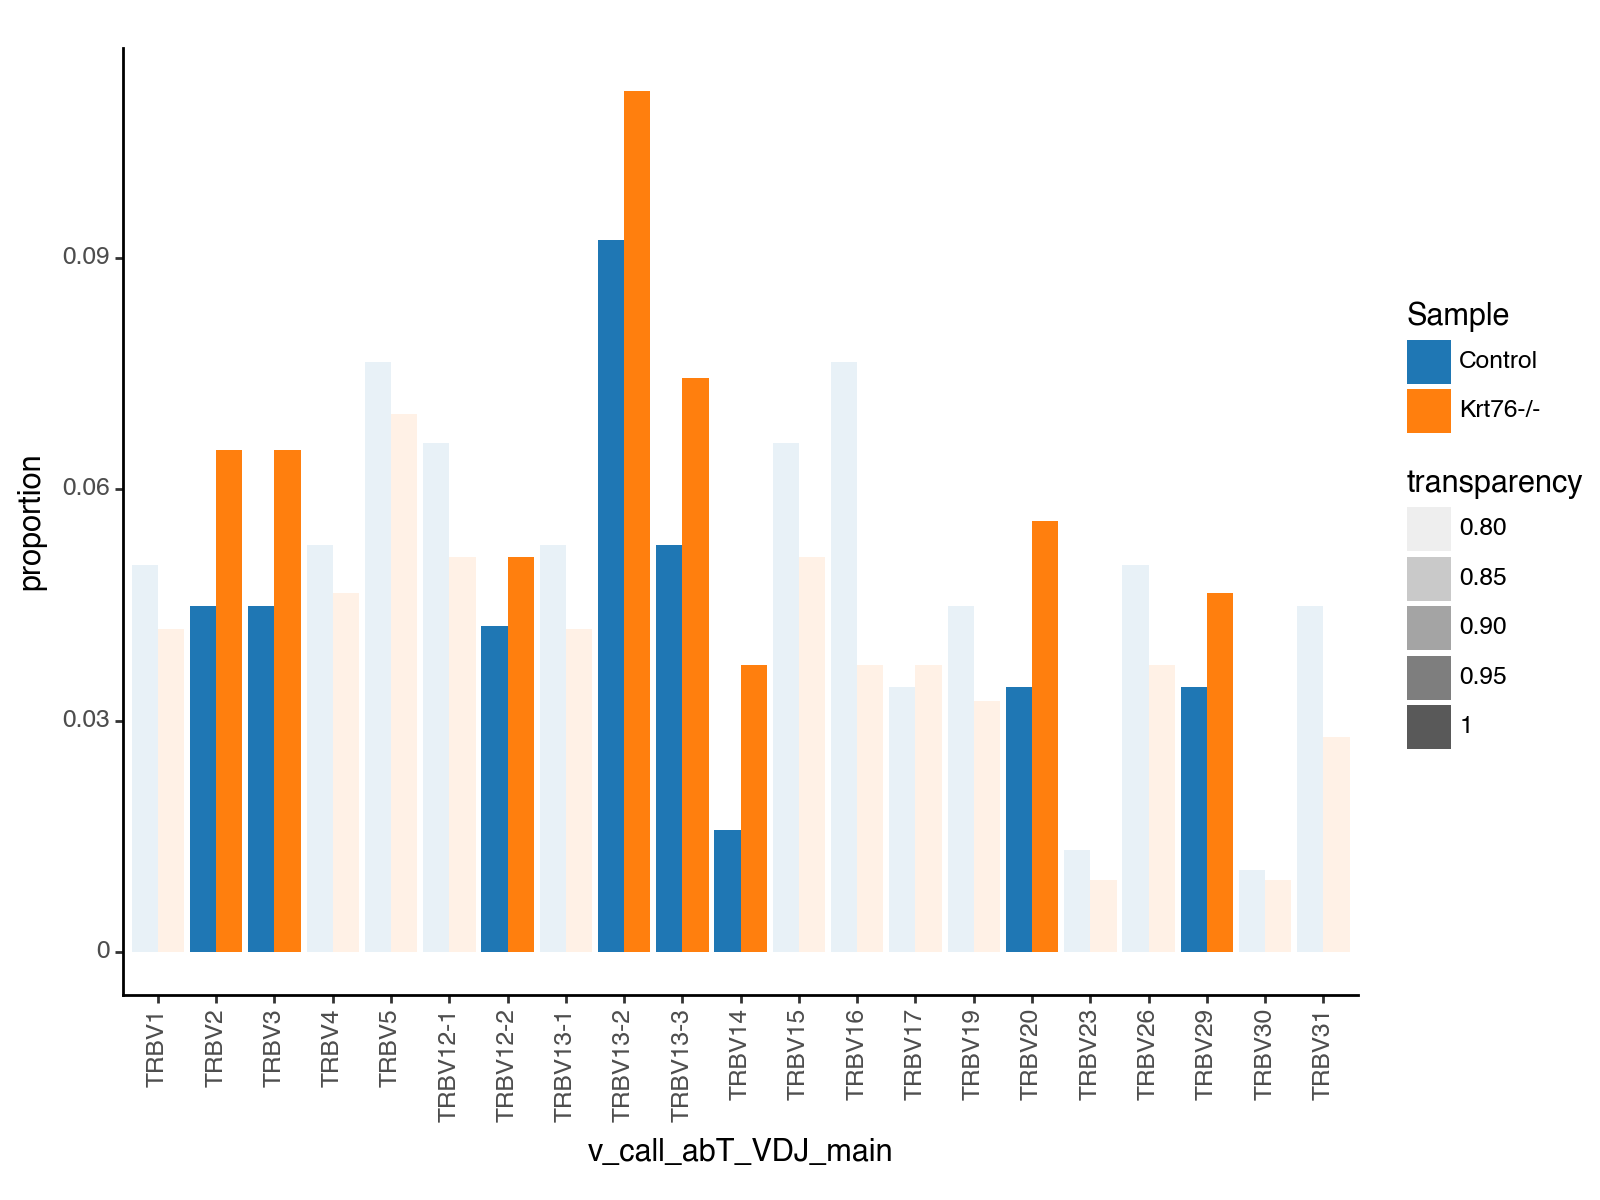

<Figure Size: (800 x 600)>

In [218]:
p

In [1442]:
p.save("VgeneBetaChain_DN3b_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN3b_141223.pdf


### DN4 - V gene beta chain

In [1443]:
adata_PF_DN4 = adata_PF[adata_PF.obs["leiden"] == "2 DN4"]

In [1444]:
adata_PF_DN4

View of AnnData object with n_obs × n_vars = 2076 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [1445]:
working_df = pd.DataFrame(adata_PF_DN4.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV3                                103
         TRBV5                                103
         TRBV13-2                              98
         TRBV12-1                              91
         TRBV15                                90
         TRBV19                                87
         TRBV20                                82
         TRBV1                                 82
         TRBV16                                77
         TRBV13-1                              73
         TRBV4                                 61
         TRBV13-3                              60
         TRBV2                                 56
         TRBV12-2                              56
         TRBV29                                47
         TRBV31                                46
         TRBV26                                45
         TRBV17                                41
         TRBV14                                30
         TRBV23                                12
         TRBV30                                 5
         TRBV24                                 3
Krt76-/- TRBV12-1                              59
         TRBV20                                53
         TRBV13-2                              51
         TRBV19                                49
         TRBV5                                 48
         TRBV15                                46
         TRBV16                                43
         TRBV13-1                              43
         TRBV3                                 40
         TRBV4                                 37
         TRBV1                                 34
         TRBV31                                34
         TRBV12-2                              33
         TRBV26                                30
         TRBV13-3                              29
         TRBV29                                29
         TRBV2                                 28
         TRBV17                                26
         TRBV14                                14
         TRBV23                                 1
         TRBV30                                 1
         TRBV24                                 0

In [1446]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV3     103
1    Control               TRBV5     103
2    Control            TRBV13-2      98
3    Control            TRBV12-1      91
4    Control              TRBV15      90
5    Control              TRBV19      87
6    Control              TRBV20      82
7    Control               TRBV1      82
8    Control              TRBV16      77
9    Control            TRBV13-1      73
10   Control               TRBV4      61
11   Control            TRBV13-3      60
12   Control               TRBV2      56
13   Control            TRBV12-2      56
14   Control              TRBV29      47
15   Control              TRBV31      46
16   Control              TRBV26      45
17   Control              TRBV17      41
18   Control              TRBV14      30
19   Control              TRBV23      12
20   Control              TRBV30       5
21   Control              TRBV24       3
22  Krt76-/-            TRBV12-1      59
23  Krt76-/-              TRBV20      53
24  Krt76-/-            TRBV13-2      51
25  Krt76-/-              TRBV19      49
26  Krt76-/-               TRBV5      48
27  Krt76-/-              TRBV15      46
28  Krt76-/-              TRBV16      43
29  Krt76-/-            TRBV13-1      43
30  Krt76-/-               TRBV3      40
31  Krt76-/-               TRBV4      37
32  Krt76-/-               TRBV1      34
33  Krt76-/-              TRBV31      34
34  Krt76-/-            TRBV12-2      33
35  Krt76-/-              TRBV26      30
36  Krt76-/-            TRBV13-3      29
37  Krt76-/-              TRBV29      29
38  Krt76-/-               TRBV2      28
39  Krt76-/-              TRBV17      26
40  Krt76-/-              TRBV14      14
41  Krt76-/-              TRBV23       1
42  Krt76-/-              TRBV30       1
43  Krt76-/-              TRBV24       0

In [1447]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1348, 'Krt76-/-': 728}

In [1448]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1449]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV3     103    0.076409
1    Control               TRBV5     103    0.076409
2    Control            TRBV13-2      98    0.072700
3    Control            TRBV12-1      91    0.067507
4    Control              TRBV15      90    0.066766
5    Control              TRBV19      87    0.064540
6    Control              TRBV20      82    0.060831
7    Control               TRBV1      82    0.060831
8    Control              TRBV16      77    0.057122
9    Control            TRBV13-1      73    0.054154
10   Control               TRBV4      61    0.045252
11   Control            TRBV13-3      60    0.044510
12   Control               TRBV2      56    0.041543
13   Control            TRBV12-2      56    0.041543
14   Control              TRBV29      47    0.034866
15   Control              TRBV31      46    0.034125
16   Control              TRBV26      45    0.033383
17   Control              TRBV17      41    0.030415
18   Control              TRBV14      30    0.022255
19   Control              TRBV23      12    0.008902
20   Control              TRBV30       5    0.003709
21   Control              TRBV24       3    0.002226
22  Krt76-/-            TRBV12-1      59    0.081044
23  Krt76-/-              TRBV20      53    0.072802
24  Krt76-/-            TRBV13-2      51    0.070055
25  Krt76-/-              TRBV19      49    0.067308
26  Krt76-/-               TRBV5      48    0.065934
27  Krt76-/-              TRBV15      46    0.063187
28  Krt76-/-              TRBV16      43    0.059066
29  Krt76-/-            TRBV13-1      43    0.059066
30  Krt76-/-               TRBV3      40    0.054945
31  Krt76-/-               TRBV4      37    0.050824
32  Krt76-/-               TRBV1      34    0.046703
33  Krt76-/-              TRBV31      34    0.046703
34  Krt76-/-            TRBV12-2      33    0.045330
35  Krt76-/-              TRBV26      30    0.041209
36  Krt76-/-            TRBV13-3      29    0.039835
37  Krt76-/-              TRBV29      29    0.039835
38  Krt76-/-               TRBV2      28    0.038462
39  Krt76-/-              TRBV17      26    0.035714
40  Krt76-/-              TRBV14      14    0.019231
41  Krt76-/-              TRBV23       1    0.001374
42  Krt76-/-              TRBV30       1    0.001374
43  Krt76-/-              TRBV24       0    0.000000

In [1450]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1348, 'Krt76-/-': 728}

In [1451]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1452]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV3     103    0.076409
1    Control               TRBV5     103    0.076409
2    Control            TRBV13-2      98    0.072700
3    Control            TRBV12-1      91    0.067507
4    Control              TRBV15      90    0.066766
5    Control              TRBV19      87    0.064540
6    Control              TRBV20      82    0.060831
7    Control               TRBV1      82    0.060831
8    Control              TRBV16      77    0.057122
9    Control            TRBV13-1      73    0.054154
10   Control               TRBV4      61    0.045252
11   Control            TRBV13-3      60    0.044510
12   Control               TRBV2      56    0.041543
13   Control            TRBV12-2      56    0.041543
14   Control              TRBV29      47    0.034866
15   Control              TRBV31      46    0.034125
16   Control              TRBV26      45    0.033383
17   Control              TRBV17      41    0.030415
18   Control              TRBV14      30    0.022255
19   Control              TRBV23      12    0.008902
20   Control              TRBV30       5    0.003709
21   Control              TRBV24       3    0.002226
22  Krt76-/-            TRBV12-1      59    0.081044
23  Krt76-/-              TRBV20      53    0.072802
24  Krt76-/-            TRBV13-2      51    0.070055
25  Krt76-/-              TRBV19      49    0.067308
26  Krt76-/-               TRBV5      48    0.065934
27  Krt76-/-              TRBV15      46    0.063187
28  Krt76-/-              TRBV16      43    0.059066
29  Krt76-/-            TRBV13-1      43    0.059066
30  Krt76-/-               TRBV3      40    0.054945
31  Krt76-/-               TRBV4      37    0.050824
32  Krt76-/-               TRBV1      34    0.046703
33  Krt76-/-              TRBV31      34    0.046703
34  Krt76-/-            TRBV12-2      33    0.045330
35  Krt76-/-              TRBV26      30    0.041209
36  Krt76-/-            TRBV13-3      29    0.039835
37  Krt76-/-              TRBV29      29    0.039835
38  Krt76-/-               TRBV2      28    0.038462
39  Krt76-/-              TRBV17      26    0.035714
40  Krt76-/-              TRBV14      14    0.019231
41  Krt76-/-              TRBV23       1    0.001374
42  Krt76-/-              TRBV30       1    0.001374
43  Krt76-/-              TRBV24       0    0.000000

In [1453]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1454]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1455]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1456]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1457]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.7677566336102922,
 'TRBV2': 0.9258241758241759,
 'TRBV3': 0.7190867385042142,
 'TRBV4': 1.1231309673932623,
 'TRBV5': 0.8629040862050571,
 'TRBV12-1': 1.2005192609588216,
 'TRBV12-2': 1.0911499215070644,
 'TRBV13-1': 1.090696974258618,
 'TRBV13-2': 0.9636129176945504,
 'TRBV13-3': 0.8949633699633698,
 'TRBV14': 0.864102564102564,
 'TRBV15': 0.9463980463980464,
 'TRBV16': 1.0340373911802483,
 'TRBV17': 1.1742160278745644,
 'TRBV19': 1.0428824049513705,
 'TRBV20': 1.1967971053336908,
 'TRBV23': 0.1543040293040293,
 'TRBV24': 0.0,
 'TRBV26': 1.2344322344322345,
 'TRBV29': 1.1425064297404721,
 'TRBV30': 0.37032967032967035,
 'TRBV31': 1.368609651218347}

In [1458]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV3     103    0.076409    0.719087
1    Control               TRBV5     103    0.076409    0.862904
2    Control            TRBV13-2      98    0.072700    0.963613
3    Control            TRBV12-1      91    0.067507    1.200519
4    Control              TRBV15      90    0.066766    0.946398
5    Control              TRBV19      87    0.064540    1.042882
6    Control              TRBV20      82    0.060831    1.196797
7    Control               TRBV1      82    0.060831    0.767757
8    Control              TRBV16      77    0.057122    1.034037
9    Control            TRBV13-1      73    0.054154    1.090697
10   Control               TRBV4      61    0.045252    1.123131
11   Control            TRBV13-3      60    0.044510    0.894963
12   Control               TRBV2      56    0.041543    0.925824
13   Control            TRBV12-2      56    0.041543    1.091150
14   Control              TRBV29      47    0.034866    1.142506
15   Control              TRBV31      46    0.034125    1.368610
16   Control              TRBV26      45    0.033383    1.234432
17   Control              TRBV17      41    0.030415    1.174216
18   Control              TRBV14      30    0.022255    0.864103
19   Control              TRBV23      12    0.008902    0.154304
20   Control              TRBV30       5    0.003709    0.370330
21   Control              TRBV24       3    0.002226    0.000000
22  Krt76-/-            TRBV12-1      59    0.081044    1.200519
23  Krt76-/-              TRBV20      53    0.072802    1.196797
24  Krt76-/-            TRBV13-2      51    0.070055    0.963613
25  Krt76-/-              TRBV19      49    0.067308    1.042882
26  Krt76-/-               TRBV5      48    0.065934    0.862904
27  Krt76-/-              TRBV15      46    0.063187    0.946398
28  Krt76-/-              TRBV16      43    0.059066    1.034037
29  Krt76-/-            TRBV13-1      43    0.059066    1.090697
30  Krt76-/-               TRBV3      40    0.054945    0.719087
31  Krt76-/-               TRBV4      37    0.050824    1.123131
32  Krt76-/-               TRBV1      34    0.046703    0.767757
33  Krt76-/-              TRBV31      34    0.046703    1.368610
34  Krt76-/-            TRBV12-2      33    0.045330    1.091150
35  Krt76-/-              TRBV26      30    0.041209    1.234432
36  Krt76-/-            TRBV13-3      29    0.039835    0.894963
37  Krt76-/-              TRBV29      29    0.039835    1.142506
38  Krt76-/-               TRBV2      28    0.038462    0.925824
39  Krt76-/-              TRBV17      26    0.035714    1.174216
40  Krt76-/-              TRBV14      14    0.019231    0.864103
41  Krt76-/-              TRBV23       1    0.001374    0.154304
42  Krt76-/-              TRBV30       1    0.001374    0.370330
43  Krt76-/-              TRBV24       0    0.000000    0.000000

In [1459]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1460]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1461]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1462]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

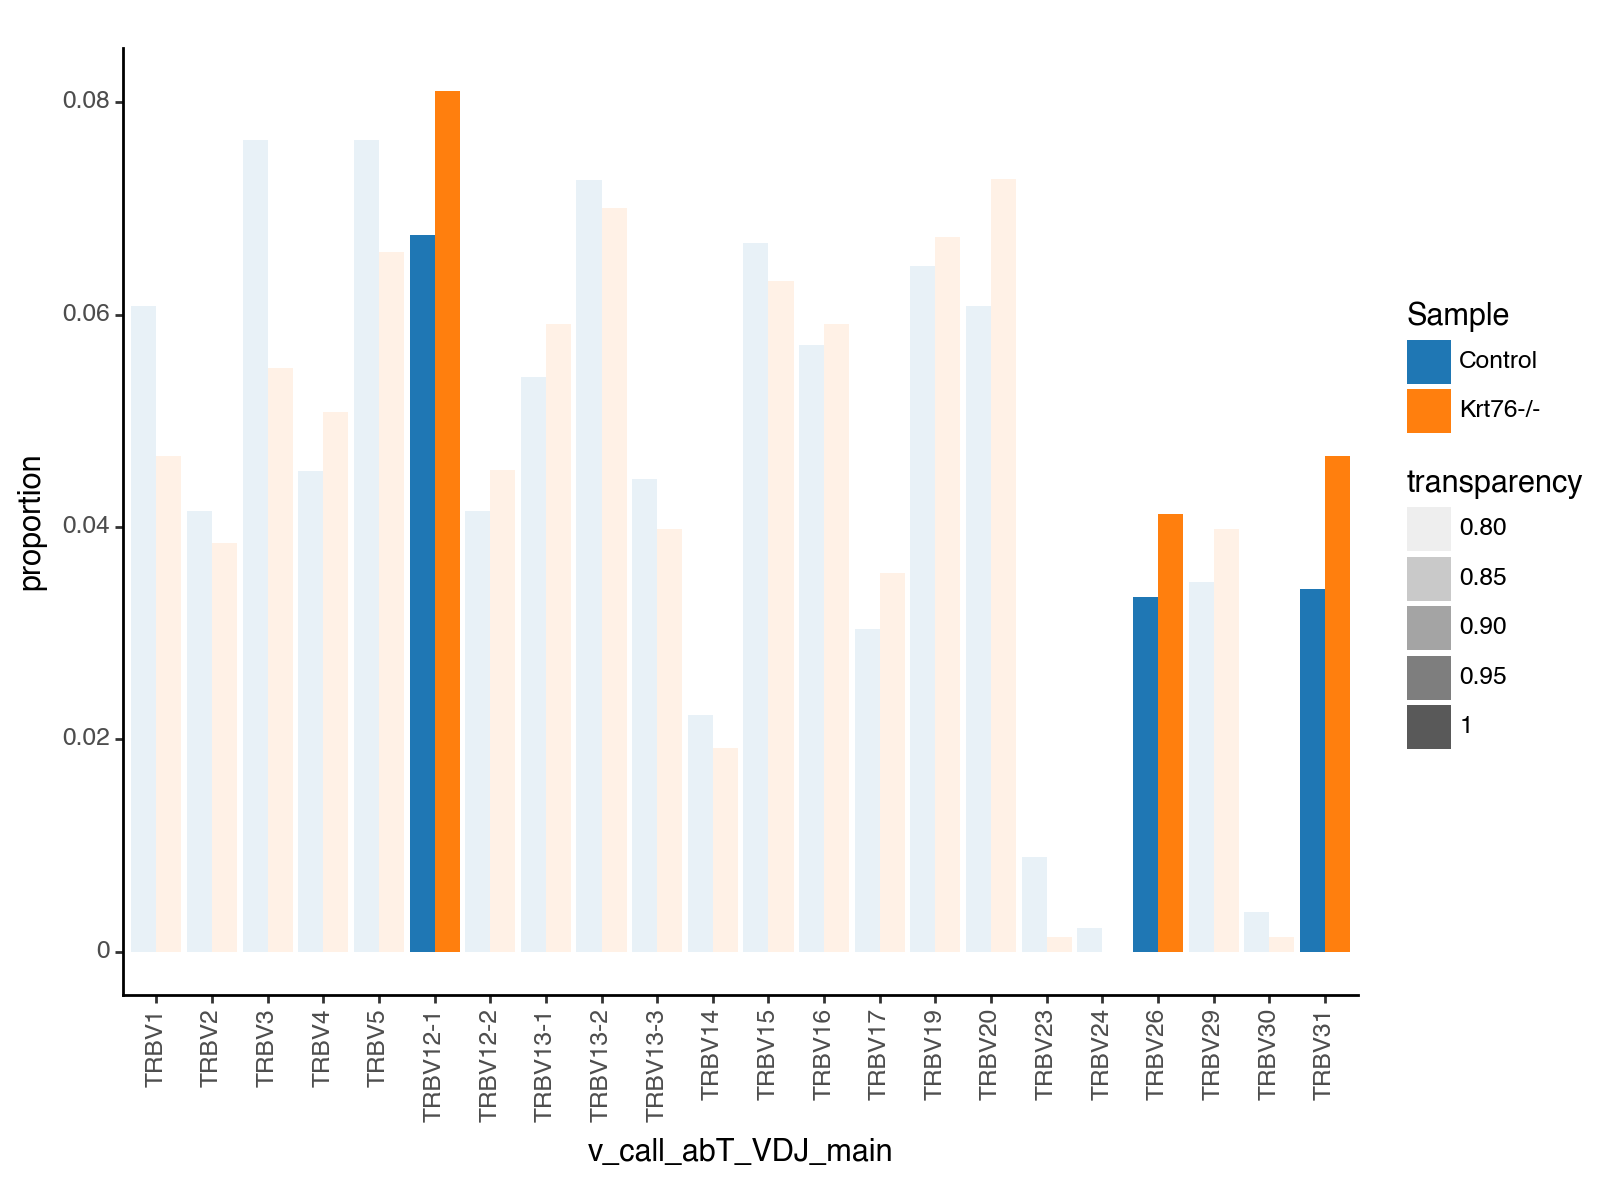

<Figure Size: (800 x 600)>

In [239]:
p

In [1463]:
p.save("VgeneBetaChain_DN4_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN4_141223.pdf


### DP1 - V gene beta chain

In [1464]:
adata_PF_DP1 = adata_PF[adata_PF.obs["leiden"] == "3 DP 1"]

In [1465]:
adata_PF_DP1

View of AnnData object with n_obs × n_vars = 2398 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [1466]:
working_df = pd.DataFrame(adata_PF_DP1.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV13-2                             125
         TRBV5                                119
         TRBV19                               103
         TRBV20                                94
         TRBV3                                 90
         TRBV15                                89
         TRBV12-1                              87
         TRBV1                                 79
         TRBV16                                75
         TRBV2                                 71
         TRBV26                                66
         TRBV13-3                              66
         TRBV4                                 63
         TRBV31                                61
         TRBV12-2                              60
         TRBV13-1                              58
         TRBV17                                50
         TRBV14                                43
         TRBV29                                37
         TRBV23                                 7
         TRBV30                                 5
Krt76-/- TRBV19                                80
         TRBV5                                 73
         TRBV13-2                              65
         TRBV12-1                              64
         TRBV1                                 62
         TRBV3                                 61
         TRBV20                                58
         TRBV13-1                              56
         TRBV15                                56
         TRBV16                                51
         TRBV2                                 46
         TRBV13-3                              41
         TRBV4                                 39
         TRBV17                                36
         TRBV31                                34
         TRBV12-2                              33
         TRBV26                                32
         TRBV14                                30
         TRBV29                                25
         TRBV23                                 4
         TRBV30                                 4

In [1467]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2     125
1    Control               TRBV5     119
2    Control              TRBV19     103
3    Control              TRBV20      94
4    Control               TRBV3      90
5    Control              TRBV15      89
6    Control            TRBV12-1      87
7    Control               TRBV1      79
8    Control              TRBV16      75
9    Control               TRBV2      71
10   Control              TRBV26      66
11   Control            TRBV13-3      66
12   Control               TRBV4      63
13   Control              TRBV31      61
14   Control            TRBV12-2      60
15   Control            TRBV13-1      58
16   Control              TRBV17      50
17   Control              TRBV14      43
18   Control              TRBV29      37
19   Control              TRBV23       7
20   Control              TRBV30       5
21  Krt76-/-              TRBV19      80
22  Krt76-/-               TRBV5      73
23  Krt76-/-            TRBV13-2      65
24  Krt76-/-            TRBV12-1      64
25  Krt76-/-               TRBV1      62
26  Krt76-/-               TRBV3      61
27  Krt76-/-              TRBV20      58
28  Krt76-/-            TRBV13-1      56
29  Krt76-/-              TRBV15      56
30  Krt76-/-              TRBV16      51
31  Krt76-/-               TRBV2      46
32  Krt76-/-            TRBV13-3      41
33  Krt76-/-               TRBV4      39
34  Krt76-/-              TRBV17      36
35  Krt76-/-              TRBV31      34
36  Krt76-/-            TRBV12-2      33
37  Krt76-/-              TRBV26      32
38  Krt76-/-              TRBV14      30
39  Krt76-/-              TRBV29      25
40  Krt76-/-              TRBV23       4
41  Krt76-/-              TRBV30       4

In [1468]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1448, 'Krt76-/-': 950}

In [1469]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1470]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2     125    0.086326
1    Control               TRBV5     119    0.082182
2    Control              TRBV19     103    0.071133
3    Control              TRBV20      94    0.064917
4    Control               TRBV3      90    0.062155
5    Control              TRBV15      89    0.061464
6    Control            TRBV12-1      87    0.060083
7    Control               TRBV1      79    0.054558
8    Control              TRBV16      75    0.051796
9    Control               TRBV2      71    0.049033
10   Control              TRBV26      66    0.045580
11   Control            TRBV13-3      66    0.045580
12   Control               TRBV4      63    0.043508
13   Control              TRBV31      61    0.042127
14   Control            TRBV12-2      60    0.041436
15   Control            TRBV13-1      58    0.040055
16   Control              TRBV17      50    0.034530
17   Control              TRBV14      43    0.029696
18   Control              TRBV29      37    0.025552
19   Control              TRBV23       7    0.004834
20   Control              TRBV30       5    0.003453
21  Krt76-/-              TRBV19      80    0.084211
22  Krt76-/-               TRBV5      73    0.076842
23  Krt76-/-            TRBV13-2      65    0.068421
24  Krt76-/-            TRBV12-1      64    0.067368
25  Krt76-/-               TRBV1      62    0.065263
26  Krt76-/-               TRBV3      61    0.064211
27  Krt76-/-              TRBV20      58    0.061053
28  Krt76-/-            TRBV13-1      56    0.058947
29  Krt76-/-              TRBV15      56    0.058947
30  Krt76-/-              TRBV16      51    0.053684
31  Krt76-/-               TRBV2      46    0.048421
32  Krt76-/-            TRBV13-3      41    0.043158
33  Krt76-/-               TRBV4      39    0.041053
34  Krt76-/-              TRBV17      36    0.037895
35  Krt76-/-              TRBV31      34    0.035789
36  Krt76-/-            TRBV12-2      33    0.034737
37  Krt76-/-              TRBV26      32    0.033684
38  Krt76-/-              TRBV14      30    0.031579
39  Krt76-/-              TRBV29      25    0.026316
40  Krt76-/-              TRBV23       4    0.004211
41  Krt76-/-              TRBV30       4    0.004211

In [1471]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1448, 'Krt76-/-': 950}

In [1472]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1473]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2     125    0.086326
1    Control               TRBV5     119    0.082182
2    Control              TRBV19     103    0.071133
3    Control              TRBV20      94    0.064917
4    Control               TRBV3      90    0.062155
5    Control              TRBV15      89    0.061464
6    Control            TRBV12-1      87    0.060083
7    Control               TRBV1      79    0.054558
8    Control              TRBV16      75    0.051796
9    Control               TRBV2      71    0.049033
10   Control              TRBV26      66    0.045580
11   Control            TRBV13-3      66    0.045580
12   Control               TRBV4      63    0.043508
13   Control              TRBV31      61    0.042127
14   Control            TRBV12-2      60    0.041436
15   Control            TRBV13-1      58    0.040055
16   Control              TRBV17      50    0.034530
17   Control              TRBV14      43    0.029696
18   Control              TRBV29      37    0.025552
19   Control              TRBV23       7    0.004834
20   Control              TRBV30       5    0.003453
21  Krt76-/-              TRBV19      80    0.084211
22  Krt76-/-               TRBV5      73    0.076842
23  Krt76-/-            TRBV13-2      65    0.068421
24  Krt76-/-            TRBV12-1      64    0.067368
25  Krt76-/-               TRBV1      62    0.065263
26  Krt76-/-               TRBV3      61    0.064211
27  Krt76-/-              TRBV20      58    0.061053
28  Krt76-/-            TRBV13-1      56    0.058947
29  Krt76-/-              TRBV15      56    0.058947
30  Krt76-/-              TRBV16      51    0.053684
31  Krt76-/-               TRBV2      46    0.048421
32  Krt76-/-            TRBV13-3      41    0.043158
33  Krt76-/-               TRBV4      39    0.041053
34  Krt76-/-              TRBV17      36    0.037895
35  Krt76-/-              TRBV31      34    0.035789
36  Krt76-/-            TRBV12-2      33    0.034737
37  Krt76-/-              TRBV26      32    0.033684
38  Krt76-/-              TRBV14      30    0.031579
39  Krt76-/-              TRBV29      25    0.026316
40  Krt76-/-              TRBV23       4    0.004211
41  Krt76-/-              TRBV30       4    0.004211

In [1474]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1475]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1476]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1477]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1478]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.1962158560959362,
 'TRBV2': 0.9875166790214974,
 'TRBV3': 1.0330760233918128,
 'TRBV4': 0.9435588972431078,
 'TRBV5': 0.9350199026979212,
 'TRBV12-1': 1.1212583182093163,
 'TRBV12-2': 0.8383157894736842,
 'TRBV13-1': 1.4716515426497276,
 'TRBV13-2': 0.7925894736842105,
 'TRBV13-3': 0.9468580542264752,
 'TRBV14': 1.063402692778458,
 'TRBV15': 0.9590538143110585,
 'TRBV16': 1.036463157894737,
 'TRBV17': 1.0974315789473685,
 'TRBV19': 1.1838528359734286,
 'TRBV20': 0.9404703247480403,
 'TRBV23': 0.8709774436090226,
 'TRBV26': 0.7390111642743221,
 'TRBV29': 1.0298719772403981,
 'TRBV30': 1.2193684210526317,
 'TRBV31': 0.8495599654874891}

In [1479]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2     125    0.086326    0.792589
1    Control               TRBV5     119    0.082182    0.935020
2    Control              TRBV19     103    0.071133    1.183853
3    Control              TRBV20      94    0.064917    0.940470
4    Control               TRBV3      90    0.062155    1.033076
5    Control              TRBV15      89    0.061464    0.959054
6    Control            TRBV12-1      87    0.060083    1.121258
7    Control               TRBV1      79    0.054558    1.196216
8    Control              TRBV16      75    0.051796    1.036463
9    Control               TRBV2      71    0.049033    0.987517
10   Control              TRBV26      66    0.045580    0.739011
11   Control            TRBV13-3      66    0.045580    0.946858
12   Control               TRBV4      63    0.043508    0.943559
13   Control              TRBV31      61    0.042127    0.849560
14   Control            TRBV12-2      60    0.041436    0.838316
15   Control            TRBV13-1      58    0.040055    1.471652
16   Control              TRBV17      50    0.034530    1.097432
17   Control              TRBV14      43    0.029696    1.063403
18   Control              TRBV29      37    0.025552    1.029872
19   Control              TRBV23       7    0.004834    0.870977
20   Control              TRBV30       5    0.003453    1.219368
21  Krt76-/-              TRBV19      80    0.084211    1.183853
22  Krt76-/-               TRBV5      73    0.076842    0.935020
23  Krt76-/-            TRBV13-2      65    0.068421    0.792589
24  Krt76-/-            TRBV12-1      64    0.067368    1.121258
25  Krt76-/-               TRBV1      62    0.065263    1.196216
26  Krt76-/-               TRBV3      61    0.064211    1.033076
27  Krt76-/-              TRBV20      58    0.061053    0.940470
28  Krt76-/-            TRBV13-1      56    0.058947    1.471652
29  Krt76-/-              TRBV15      56    0.058947    0.959054
30  Krt76-/-              TRBV16      51    0.053684    1.036463
31  Krt76-/-               TRBV2      46    0.048421    0.987517
32  Krt76-/-            TRBV13-3      41    0.043158    0.946858
33  Krt76-/-               TRBV4      39    0.041053    0.943559
34  Krt76-/-              TRBV17      36    0.037895    1.097432
35  Krt76-/-              TRBV31      34    0.035789    0.849560
36  Krt76-/-            TRBV12-2      33    0.034737    0.838316
37  Krt76-/-              TRBV26      32    0.033684    0.739011
38  Krt76-/-              TRBV14      30    0.031579    1.063403
39  Krt76-/-              TRBV29      25    0.026316    1.029872
40  Krt76-/-              TRBV23       4    0.004211    0.870977
41  Krt76-/-              TRBV30       4    0.004211    1.219368

In [1480]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1481]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1482]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1483]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

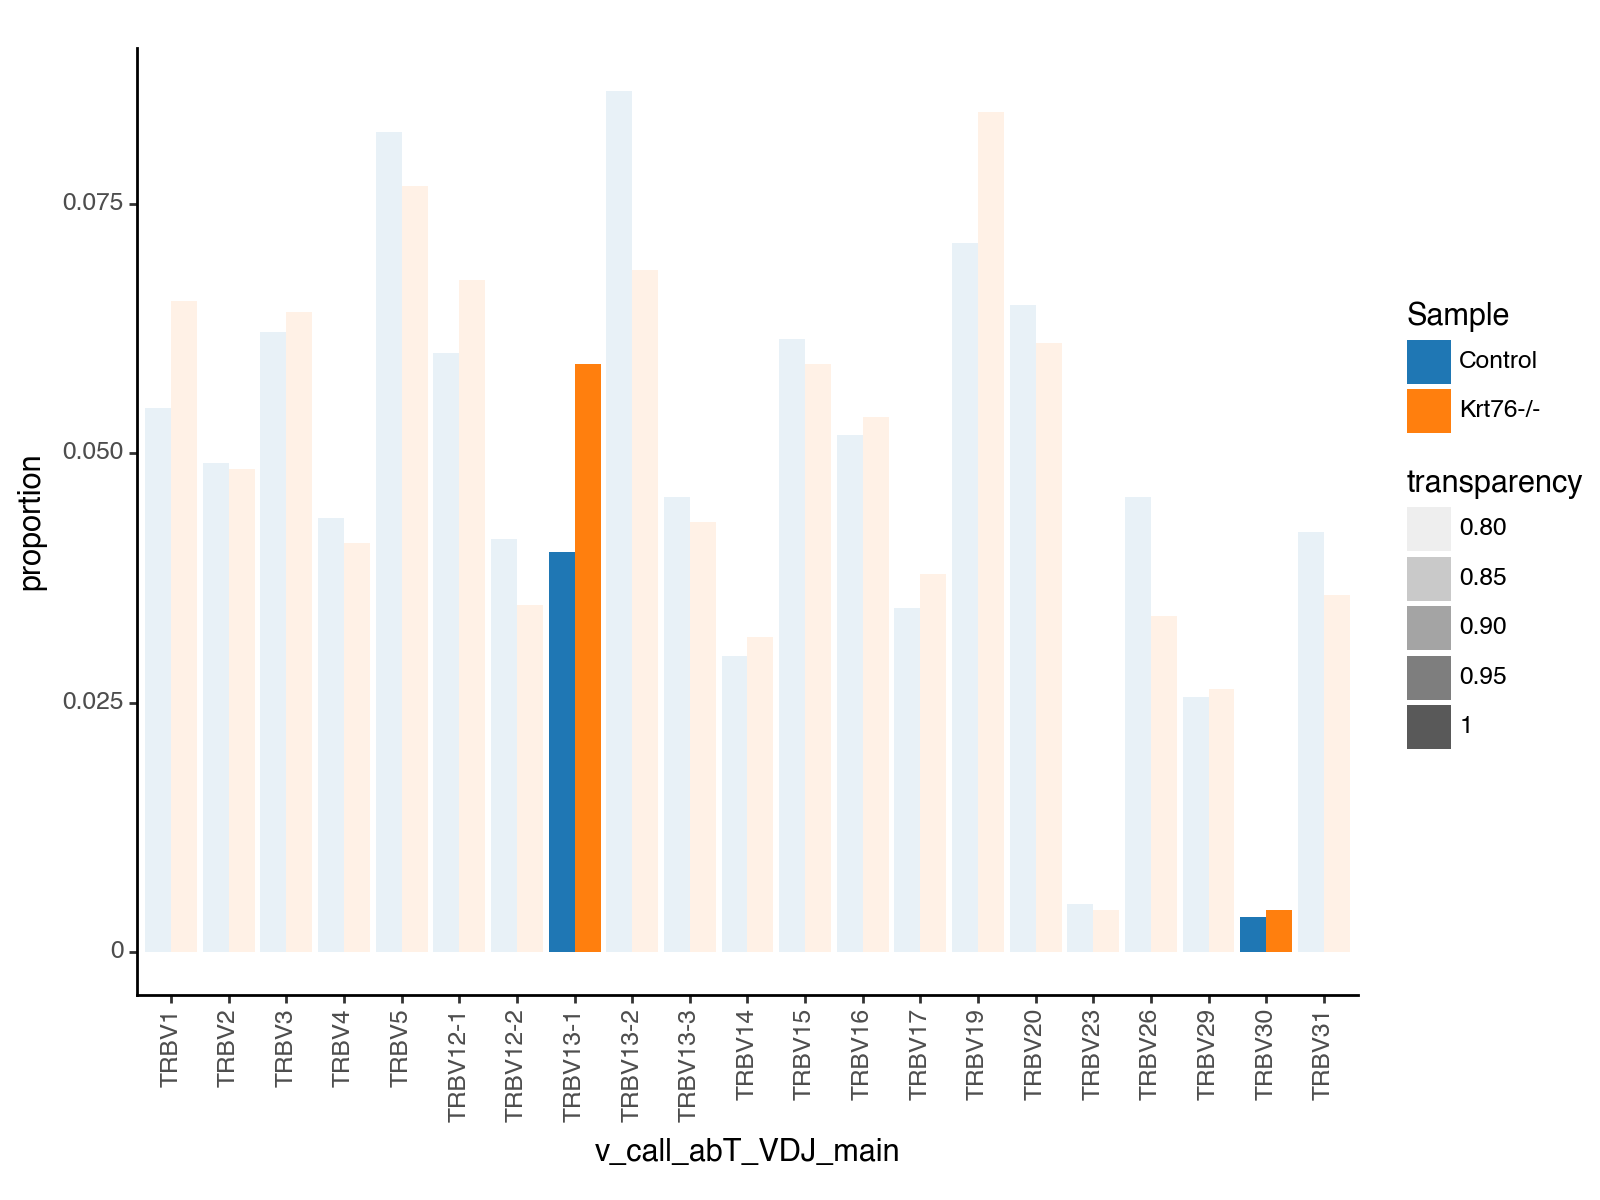

<Figure Size: (800 x 600)>

In [260]:
p

In [1484]:
p.save("VgeneBetaChain_DP1_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DP1_141223.pdf


### Dp2 - V gene beta chain

In [1485]:
adata_PF_DP2 = adata_PF[adata_PF.obs["leiden"] == "9 DP 2"]

In [1486]:
adata_PF_DP2

View of AnnData object with n_obs × n_vars = 94 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1487]:
working_df = pd.DataFrame(adata_PF_DP2.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV5                                  8
         TRBV15                                 5
         TRBV3                                  5
         TRBV17                                 5
         TRBV16                                 5
         TRBV1                                  4
         TRBV4                                  4
         TRBV12-1                               4
         TRBV12-2                               4
         TRBV31                                 3
         TRBV13-3                               3
         TRBV13-2                               3
         TRBV13-1                               2
         TRBV26                                 2
         TRBV2                                  1
         TRBV19                                 1
         TRBV20                                 1
         TRBV23                                 1
         TRBV29                                 1
         TRBV14                                 0
Krt76-/- TRBV13-2                               7
         TRBV5                                  4
         TRBV3                                  3
         TRBV13-3                               3
         TRBV14                                 2
         TRBV26                                 2
         TRBV20                                 2
         TRBV31                                 2
         TRBV13-1                               1
         TRBV16                                 1
         TRBV17                                 1
         TRBV19                                 1
         TRBV4                                  1
         TRBV29                                 1
         TRBV1                                  1
         TRBV12-2                               0
         TRBV2                                  0
         TRBV15                                 0
         TRBV12-1                               0
         TRBV23                                 0

In [1488]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5       8
1    Control              TRBV15       5
2    Control               TRBV3       5
3    Control              TRBV17       5
4    Control              TRBV16       5
5    Control               TRBV1       4
6    Control               TRBV4       4
7    Control            TRBV12-1       4
8    Control            TRBV12-2       4
9    Control              TRBV31       3
10   Control            TRBV13-3       3
11   Control            TRBV13-2       3
12   Control            TRBV13-1       2
13   Control              TRBV26       2
14   Control               TRBV2       1
15   Control              TRBV19       1
16   Control              TRBV20       1
17   Control              TRBV23       1
18   Control              TRBV29       1
19   Control              TRBV14       0
20  Krt76-/-            TRBV13-2       7
21  Krt76-/-               TRBV5       4
22  Krt76-/-               TRBV3       3
23  Krt76-/-            TRBV13-3       3
24  Krt76-/-              TRBV14       2
25  Krt76-/-              TRBV26       2
26  Krt76-/-              TRBV20       2
27  Krt76-/-              TRBV31       2
28  Krt76-/-            TRBV13-1       1
29  Krt76-/-              TRBV16       1
30  Krt76-/-              TRBV17       1
31  Krt76-/-              TRBV19       1
32  Krt76-/-               TRBV4       1
33  Krt76-/-              TRBV29       1
34  Krt76-/-               TRBV1       1
35  Krt76-/-            TRBV12-2       0
36  Krt76-/-               TRBV2       0
37  Krt76-/-              TRBV15       0
38  Krt76-/-            TRBV12-1       0
39  Krt76-/-              TRBV23       0

In [1489]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 62, 'Krt76-/-': 32}

In [1490]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1491]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       8    0.129032
1    Control              TRBV15       5    0.080645
2    Control               TRBV3       5    0.080645
3    Control              TRBV17       5    0.080645
4    Control              TRBV16       5    0.080645
5    Control               TRBV1       4    0.064516
6    Control               TRBV4       4    0.064516
7    Control            TRBV12-1       4    0.064516
8    Control            TRBV12-2       4    0.064516
9    Control              TRBV31       3    0.048387
10   Control            TRBV13-3       3    0.048387
11   Control            TRBV13-2       3    0.048387
12   Control            TRBV13-1       2    0.032258
13   Control              TRBV26       2    0.032258
14   Control               TRBV2       1    0.016129
15   Control              TRBV19       1    0.016129
16   Control              TRBV20       1    0.016129
17   Control              TRBV23       1    0.016129
18   Control              TRBV29       1    0.016129
19   Control              TRBV14       0    0.000000
20  Krt76-/-            TRBV13-2       7    0.218750
21  Krt76-/-               TRBV5       4    0.125000
22  Krt76-/-               TRBV3       3    0.093750
23  Krt76-/-            TRBV13-3       3    0.093750
24  Krt76-/-              TRBV14       2    0.062500
25  Krt76-/-              TRBV26       2    0.062500
26  Krt76-/-              TRBV20       2    0.062500
27  Krt76-/-              TRBV31       2    0.062500
28  Krt76-/-            TRBV13-1       1    0.031250
29  Krt76-/-              TRBV16       1    0.031250
30  Krt76-/-              TRBV17       1    0.031250
31  Krt76-/-              TRBV19       1    0.031250
32  Krt76-/-               TRBV4       1    0.031250
33  Krt76-/-              TRBV29       1    0.031250
34  Krt76-/-               TRBV1       1    0.031250
35  Krt76-/-            TRBV12-2       0    0.000000
36  Krt76-/-               TRBV2       0    0.000000
37  Krt76-/-              TRBV15       0    0.000000
38  Krt76-/-            TRBV12-1       0    0.000000
39  Krt76-/-              TRBV23       0    0.000000

In [1492]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 62, 'Krt76-/-': 32}

In [1493]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1494]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       8    0.129032
1    Control              TRBV15       5    0.080645
2    Control               TRBV3       5    0.080645
3    Control              TRBV17       5    0.080645
4    Control              TRBV16       5    0.080645
5    Control               TRBV1       4    0.064516
6    Control               TRBV4       4    0.064516
7    Control            TRBV12-1       4    0.064516
8    Control            TRBV12-2       4    0.064516
9    Control              TRBV31       3    0.048387
10   Control            TRBV13-3       3    0.048387
11   Control            TRBV13-2       3    0.048387
12   Control            TRBV13-1       2    0.032258
13   Control              TRBV26       2    0.032258
14   Control               TRBV2       1    0.016129
15   Control              TRBV19       1    0.016129
16   Control              TRBV20       1    0.016129
17   Control              TRBV23       1    0.016129
18   Control              TRBV29       1    0.016129
19   Control              TRBV14       0    0.000000
20  Krt76-/-            TRBV13-2       7    0.218750
21  Krt76-/-               TRBV5       4    0.125000
22  Krt76-/-               TRBV3       3    0.093750
23  Krt76-/-            TRBV13-3       3    0.093750
24  Krt76-/-              TRBV14       2    0.062500
25  Krt76-/-              TRBV26       2    0.062500
26  Krt76-/-              TRBV20       2    0.062500
27  Krt76-/-              TRBV31       2    0.062500
28  Krt76-/-            TRBV13-1       1    0.031250
29  Krt76-/-              TRBV16       1    0.031250
30  Krt76-/-              TRBV17       1    0.031250
31  Krt76-/-              TRBV19       1    0.031250
32  Krt76-/-               TRBV4       1    0.031250
33  Krt76-/-              TRBV29       1    0.031250
34  Krt76-/-               TRBV1       1    0.031250
35  Krt76-/-            TRBV12-2       0    0.000000
36  Krt76-/-               TRBV2       0    0.000000
37  Krt76-/-              TRBV15       0    0.000000
38  Krt76-/-            TRBV12-1       0    0.000000
39  Krt76-/-              TRBV23       0    0.000000

In [1495]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1496]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1497]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1498]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1499]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.484375,
 'TRBV2': 0.0,
 'TRBV3': 1.1625,
 'TRBV4': 0.484375,
 'TRBV5': 0.96875,
 'TRBV12-1': 0.0,
 'TRBV12-2': 0.0,
 'TRBV13-1': 0.96875,
 'TRBV13-2': 4.520833333333333,
 'TRBV13-3': 1.9375,
 'TRBV14': inf,
 'TRBV15': 0.0,
 'TRBV16': 0.3875,
 'TRBV17': 0.3875,
 'TRBV19': 1.9375,
 'TRBV20': 3.875,
 'TRBV23': 0.0,
 'TRBV26': 1.9375,
 'TRBV29': 1.9375,
 'TRBV31': 1.2916666666666667}

In [1500]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5       8    0.129032    0.968750
1    Control              TRBV15       5    0.080645    0.000000
2    Control               TRBV3       5    0.080645    1.162500
3    Control              TRBV17       5    0.080645    0.387500
4    Control              TRBV16       5    0.080645    0.387500
5    Control               TRBV1       4    0.064516    0.484375
6    Control               TRBV4       4    0.064516    0.484375
7    Control            TRBV12-1       4    0.064516    0.000000
8    Control            TRBV12-2       4    0.064516    0.000000
9    Control              TRBV31       3    0.048387    1.291667
10   Control            TRBV13-3       3    0.048387    1.937500
11   Control            TRBV13-2       3    0.048387    4.520833
12   Control            TRBV13-1       2    0.032258    0.968750
13   Control              TRBV26       2    0.032258    1.937500
14   Control               TRBV2       1    0.016129    0.000000
15   Control              TRBV19       1    0.016129    1.937500
16   Control              TRBV20       1    0.016129    3.875000
17   Control              TRBV23       1    0.016129    0.000000
18   Control              TRBV29       1    0.016129    1.937500
19   Control              TRBV14       0    0.000000         inf
20  Krt76-/-            TRBV13-2       7    0.218750    4.520833
21  Krt76-/-               TRBV5       4    0.125000    0.968750
22  Krt76-/-               TRBV3       3    0.093750    1.162500
23  Krt76-/-            TRBV13-3       3    0.093750    1.937500
24  Krt76-/-              TRBV14       2    0.062500         inf
25  Krt76-/-              TRBV26       2    0.062500    1.937500
26  Krt76-/-              TRBV20       2    0.062500    3.875000
27  Krt76-/-              TRBV31       2    0.062500    1.291667
28  Krt76-/-            TRBV13-1       1    0.031250    0.968750
29  Krt76-/-              TRBV16       1    0.031250    0.387500
30  Krt76-/-              TRBV17       1    0.031250    0.387500
31  Krt76-/-              TRBV19       1    0.031250    1.937500
32  Krt76-/-               TRBV4       1    0.031250    0.484375
33  Krt76-/-              TRBV29       1    0.031250    1.937500
34  Krt76-/-               TRBV1       1    0.031250    0.484375
35  Krt76-/-            TRBV12-2       0    0.000000    0.000000
36  Krt76-/-               TRBV2       0    0.000000    0.000000
37  Krt76-/-              TRBV15       0    0.000000    0.000000
38  Krt76-/-            TRBV12-1       0    0.000000    0.000000
39  Krt76-/-              TRBV23       0    0.000000    0.000000

In [1501]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1502]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1503]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1504]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

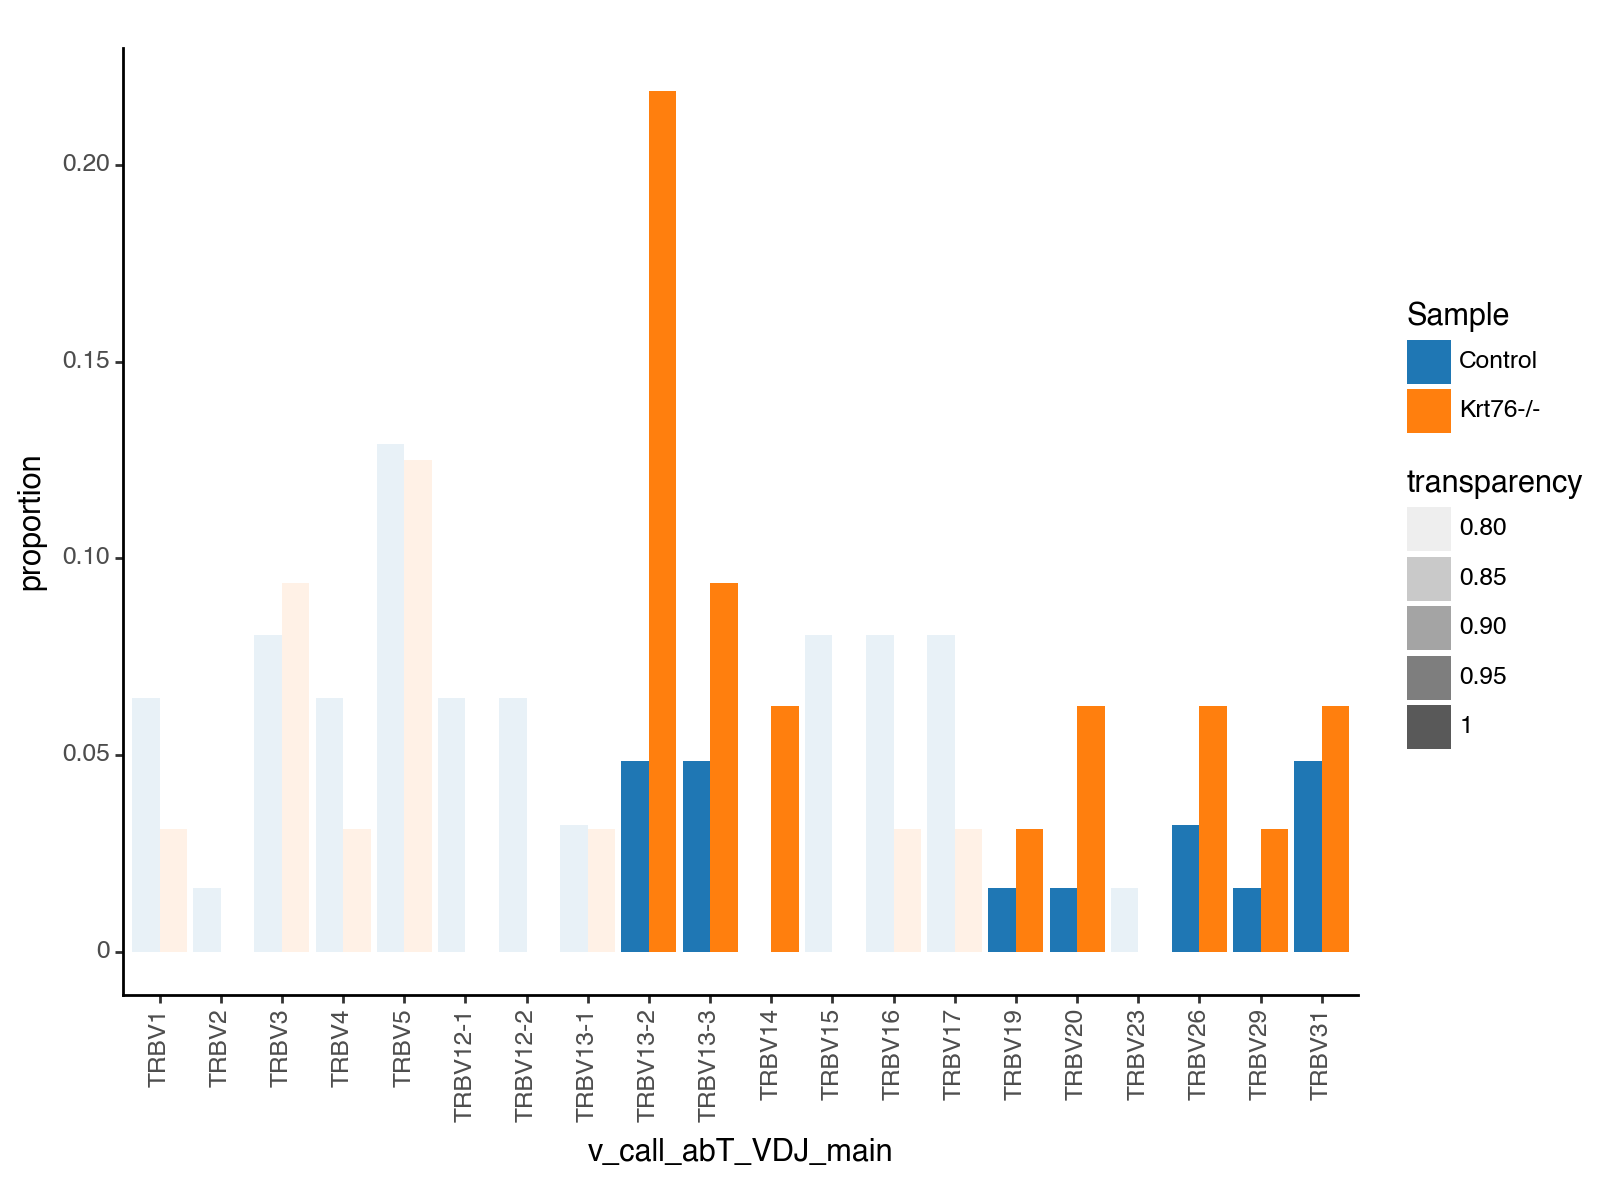

<Figure Size: (800 x 600)>

In [1505]:
p

In [1506]:
p.save("VgeneBetaChain_DP2_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DP2_141223.pdf


### sp dp - V gene beta chain

In [1507]:
adata_PF_SPDP = adata_PF[adata_PF.obs["leiden"] == "5 SP & DP"]

In [1508]:
adata_PF_SPDP

View of AnnData object with n_obs × n_vars = 841 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1509]:
working_df = pd.DataFrame(adata_PF_SPDP.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV13-2                              54
         TRBV13-1                              45
         TRBV5                                 44
         TRBV19                                39
         TRBV3                                 34
         TRBV16                                32
         TRBV2                                 29
         TRBV31                                28
         TRBV13-3                              27
         TRBV15                                27
         TRBV12-1                              26
         TRBV26                                25
         TRBV20                                23
         TRBV1                                 23
         TRBV12-2                              21
         TRBV14                                19
         TRBV17                                18
         TRBV4                                 18
         TRBV29                                17
         TRBV23                                 8
         TRBV30                                 1
Krt76-/- TRBV13-2                              29
         TRBV2                                 27
         TRBV19                                23
         TRBV5                                 23
         TRBV13-3                              21
         TRBV13-1                              20
         TRBV31                                17
         TRBV3                                 16
         TRBV16                                14
         TRBV20                                12
         TRBV12-1                              12
         TRBV12-2                              11
         TRBV15                                11
         TRBV1                                 10
         TRBV29                                 9
         TRBV4                                  7
         TRBV26                                 6
         TRBV14                                 6
         TRBV23                                 4
         TRBV17                                 3
         TRBV30                                 2

In [1510]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2      54
1    Control            TRBV13-1      45
2    Control               TRBV5      44
3    Control              TRBV19      39
4    Control               TRBV3      34
5    Control              TRBV16      32
6    Control               TRBV2      29
7    Control              TRBV31      28
8    Control            TRBV13-3      27
9    Control              TRBV15      27
10   Control            TRBV12-1      26
11   Control              TRBV26      25
12   Control              TRBV20      23
13   Control               TRBV1      23
14   Control            TRBV12-2      21
15   Control              TRBV14      19
16   Control              TRBV17      18
17   Control               TRBV4      18
18   Control              TRBV29      17
19   Control              TRBV23       8
20   Control              TRBV30       1
21  Krt76-/-            TRBV13-2      29
22  Krt76-/-               TRBV2      27
23  Krt76-/-              TRBV19      23
24  Krt76-/-               TRBV5      23
25  Krt76-/-            TRBV13-3      21
26  Krt76-/-            TRBV13-1      20
27  Krt76-/-              TRBV31      17
28  Krt76-/-               TRBV3      16
29  Krt76-/-              TRBV16      14
30  Krt76-/-              TRBV20      12
31  Krt76-/-            TRBV12-1      12
32  Krt76-/-            TRBV12-2      11
33  Krt76-/-              TRBV15      11
34  Krt76-/-               TRBV1      10
35  Krt76-/-              TRBV29       9
36  Krt76-/-               TRBV4       7
37  Krt76-/-              TRBV26       6
38  Krt76-/-              TRBV14       6
39  Krt76-/-              TRBV23       4
40  Krt76-/-              TRBV17       3
41  Krt76-/-              TRBV30       2

In [1511]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 558, 'Krt76-/-': 283}

In [1512]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1513]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      54    0.096774
1    Control            TRBV13-1      45    0.080645
2    Control               TRBV5      44    0.078853
3    Control              TRBV19      39    0.069892
4    Control               TRBV3      34    0.060932
5    Control              TRBV16      32    0.057348
6    Control               TRBV2      29    0.051971
7    Control              TRBV31      28    0.050179
8    Control            TRBV13-3      27    0.048387
9    Control              TRBV15      27    0.048387
10   Control            TRBV12-1      26    0.046595
11   Control              TRBV26      25    0.044803
12   Control              TRBV20      23    0.041219
13   Control               TRBV1      23    0.041219
14   Control            TRBV12-2      21    0.037634
15   Control              TRBV14      19    0.034050
16   Control              TRBV17      18    0.032258
17   Control               TRBV4      18    0.032258
18   Control              TRBV29      17    0.030466
19   Control              TRBV23       8    0.014337
20   Control              TRBV30       1    0.001792
21  Krt76-/-            TRBV13-2      29    0.102473
22  Krt76-/-               TRBV2      27    0.095406
23  Krt76-/-              TRBV19      23    0.081272
24  Krt76-/-               TRBV5      23    0.081272
25  Krt76-/-            TRBV13-3      21    0.074205
26  Krt76-/-            TRBV13-1      20    0.070671
27  Krt76-/-              TRBV31      17    0.060071
28  Krt76-/-               TRBV3      16    0.056537
29  Krt76-/-              TRBV16      14    0.049470
30  Krt76-/-              TRBV20      12    0.042403
31  Krt76-/-            TRBV12-1      12    0.042403
32  Krt76-/-            TRBV12-2      11    0.038869
33  Krt76-/-              TRBV15      11    0.038869
34  Krt76-/-               TRBV1      10    0.035336
35  Krt76-/-              TRBV29       9    0.031802
36  Krt76-/-               TRBV4       7    0.024735
37  Krt76-/-              TRBV26       6    0.021201
38  Krt76-/-              TRBV14       6    0.021201
39  Krt76-/-              TRBV23       4    0.014134
40  Krt76-/-              TRBV17       3    0.010601
41  Krt76-/-              TRBV30       2    0.007067

In [1514]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 558, 'Krt76-/-': 283}

In [1515]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1516]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      54    0.096774
1    Control            TRBV13-1      45    0.080645
2    Control               TRBV5      44    0.078853
3    Control              TRBV19      39    0.069892
4    Control               TRBV3      34    0.060932
5    Control              TRBV16      32    0.057348
6    Control               TRBV2      29    0.051971
7    Control              TRBV31      28    0.050179
8    Control            TRBV13-3      27    0.048387
9    Control              TRBV15      27    0.048387
10   Control            TRBV12-1      26    0.046595
11   Control              TRBV26      25    0.044803
12   Control              TRBV20      23    0.041219
13   Control               TRBV1      23    0.041219
14   Control            TRBV12-2      21    0.037634
15   Control              TRBV14      19    0.034050
16   Control              TRBV17      18    0.032258
17   Control               TRBV4      18    0.032258
18   Control              TRBV29      17    0.030466
19   Control              TRBV23       8    0.014337
20   Control              TRBV30       1    0.001792
21  Krt76-/-            TRBV13-2      29    0.102473
22  Krt76-/-               TRBV2      27    0.095406
23  Krt76-/-              TRBV19      23    0.081272
24  Krt76-/-               TRBV5      23    0.081272
25  Krt76-/-            TRBV13-3      21    0.074205
26  Krt76-/-            TRBV13-1      20    0.070671
27  Krt76-/-              TRBV31      17    0.060071
28  Krt76-/-               TRBV3      16    0.056537
29  Krt76-/-              TRBV16      14    0.049470
30  Krt76-/-              TRBV20      12    0.042403
31  Krt76-/-            TRBV12-1      12    0.042403
32  Krt76-/-            TRBV12-2      11    0.038869
33  Krt76-/-              TRBV15      11    0.038869
34  Krt76-/-               TRBV1      10    0.035336
35  Krt76-/-              TRBV29       9    0.031802
36  Krt76-/-               TRBV4       7    0.024735
37  Krt76-/-              TRBV26       6    0.021201
38  Krt76-/-              TRBV14       6    0.021201
39  Krt76-/-              TRBV23       4    0.014134
40  Krt76-/-              TRBV17       3    0.010601
41  Krt76-/-              TRBV30       2    0.007067

In [1517]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1518]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1519]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1520]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1521]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.8572745429405438,
 'TRBV2': 1.8357499695381991,
 'TRBV3': 0.9278736229474122,
 'TRBV4': 0.7667844522968198,
 'TRBV5': 1.0306778027626085,
 'TRBV12-1': 0.9100298994291928,
 'TRBV12-2': 1.0328117112569408,
 'TRBV13-1': 0.8763250883392226,
 'TRBV13-2': 1.0588928150765609,
 'TRBV13-3': 1.5335689045936396,
 'TRBV14': 0.6226520364515529,
 'TRBV15': 0.8032979976442874,
 'TRBV16': 0.8626325088339222,
 'TRBV17': 0.32862190812720854,
 'TRBV19': 1.1628159826039686,
 'TRBV20': 1.0287294515286527,
 'TRBV23': 0.9858657243816255,
 'TRBV26': 0.47321554770318025,
 'TRBV29': 1.0438578258158386,
 'TRBV30': 3.943462897526502,
 'TRBV31': 1.1971226653205451}

In [1522]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2      54    0.096774    1.058893
1    Control            TRBV13-1      45    0.080645    0.876325
2    Control               TRBV5      44    0.078853    1.030678
3    Control              TRBV19      39    0.069892    1.162816
4    Control               TRBV3      34    0.060932    0.927874
5    Control              TRBV16      32    0.057348    0.862633
6    Control               TRBV2      29    0.051971    1.835750
7    Control              TRBV31      28    0.050179    1.197123
8    Control            TRBV13-3      27    0.048387    1.533569
9    Control              TRBV15      27    0.048387    0.803298
10   Control            TRBV12-1      26    0.046595    0.910030
11   Control              TRBV26      25    0.044803    0.473216
12   Control              TRBV20      23    0.041219    1.028729
13   Control               TRBV1      23    0.041219    0.857275
14   Control            TRBV12-2      21    0.037634    1.032812
15   Control              TRBV14      19    0.034050    0.622652
16   Control              TRBV17      18    0.032258    0.328622
17   Control               TRBV4      18    0.032258    0.766784
18   Control              TRBV29      17    0.030466    1.043858
19   Control              TRBV23       8    0.014337    0.985866
20   Control              TRBV30       1    0.001792    3.943463
21  Krt76-/-            TRBV13-2      29    0.102473    1.058893
22  Krt76-/-               TRBV2      27    0.095406    1.835750
23  Krt76-/-              TRBV19      23    0.081272    1.162816
24  Krt76-/-               TRBV5      23    0.081272    1.030678
25  Krt76-/-            TRBV13-3      21    0.074205    1.533569
26  Krt76-/-            TRBV13-1      20    0.070671    0.876325
27  Krt76-/-              TRBV31      17    0.060071    1.197123
28  Krt76-/-               TRBV3      16    0.056537    0.927874
29  Krt76-/-              TRBV16      14    0.049470    0.862633
30  Krt76-/-              TRBV20      12    0.042403    1.028729
31  Krt76-/-            TRBV12-1      12    0.042403    0.910030
32  Krt76-/-            TRBV12-2      11    0.038869    1.032812
33  Krt76-/-              TRBV15      11    0.038869    0.803298
34  Krt76-/-               TRBV1      10    0.035336    0.857275
35  Krt76-/-              TRBV29       9    0.031802    1.043858
36  Krt76-/-               TRBV4       7    0.024735    0.766784
37  Krt76-/-              TRBV26       6    0.021201    0.473216
38  Krt76-/-              TRBV14       6    0.021201    0.622652
39  Krt76-/-              TRBV23       4    0.014134    0.985866
40  Krt76-/-              TRBV17       3    0.010601    0.328622
41  Krt76-/-              TRBV30       2    0.007067    3.943463

In [1523]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1524]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1525]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1526]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

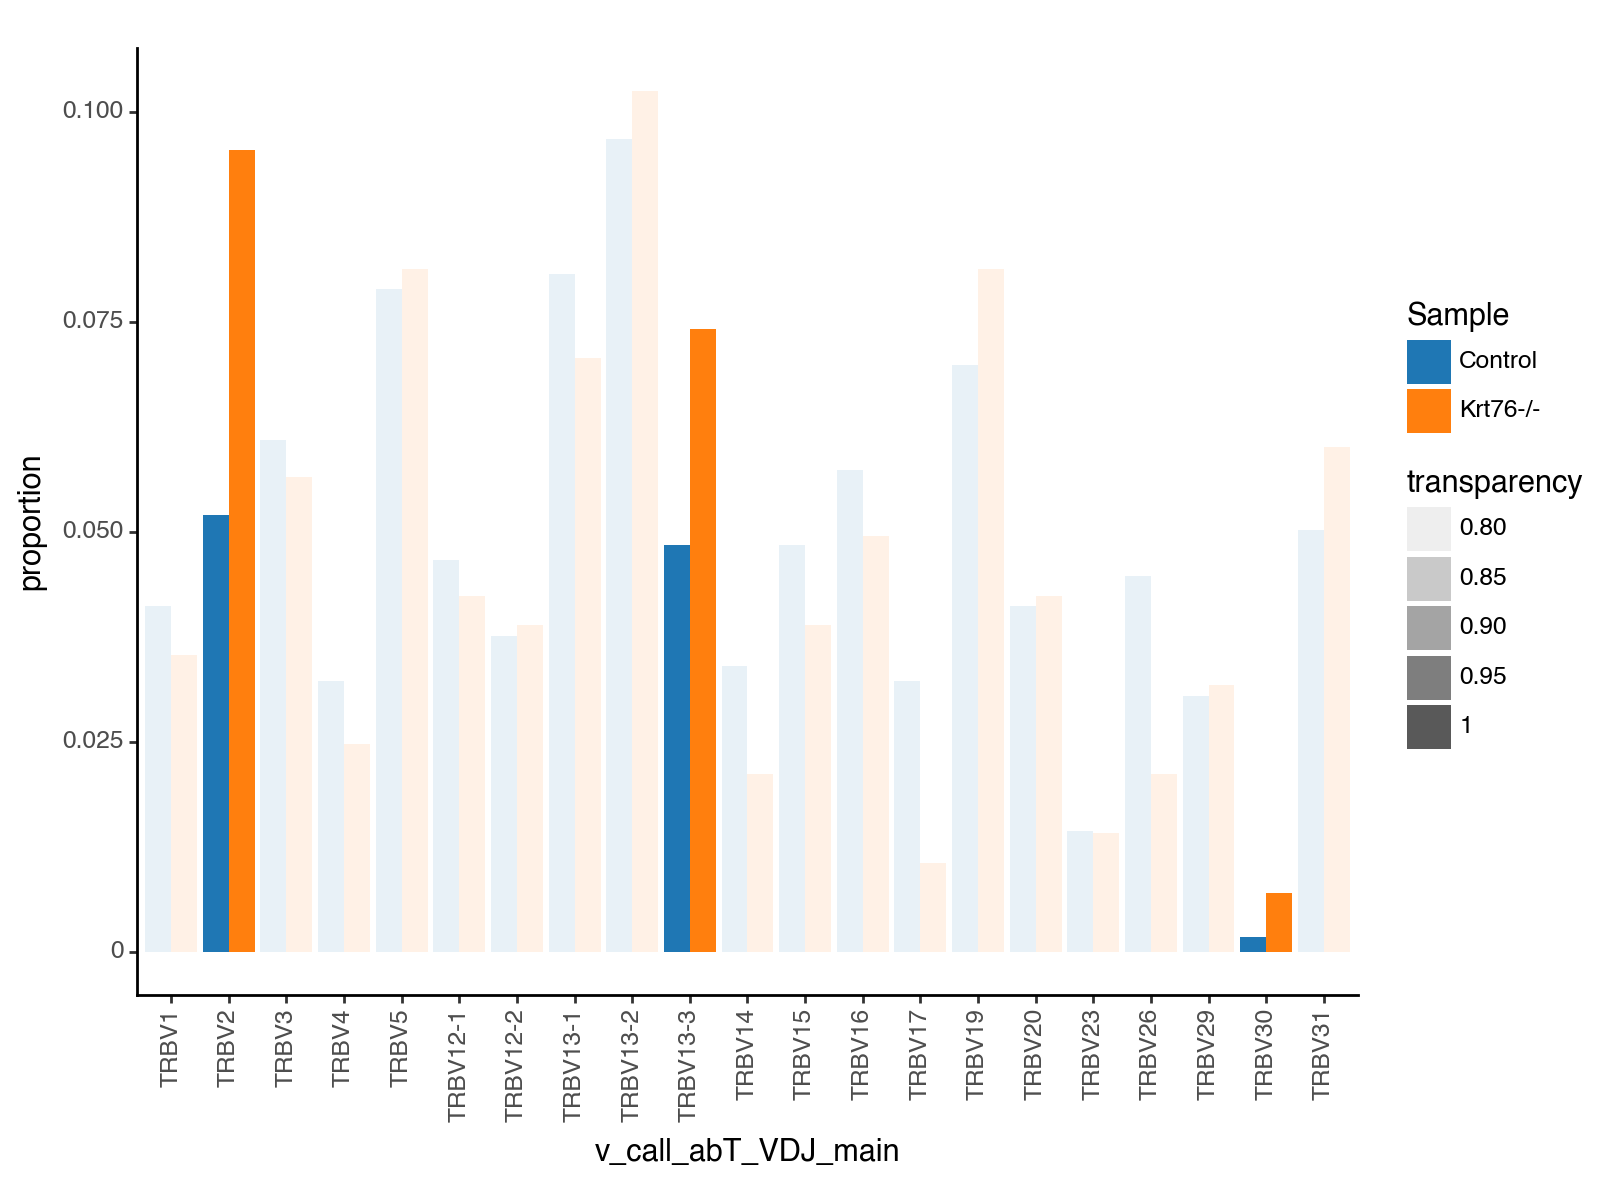

<Figure Size: (800 x 600)>

In [302]:
p

In [1527]:
p.save("VgeneBetaChain_SPDP_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_SPDP_141223.pdf


### tcrGD - V gene beta chain

In [1528]:
adata_PF_GD = adata_PF[adata_PF.obs["leiden"] == "8 TCRgd"]

In [1529]:
adata_PF_GD

View of AnnData object with n_obs × n_vars = 60 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1530]:
working_df = pd.DataFrame(adata_PF_GD.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV5                                  5
         TRBV13-2                               5
         TRBV13-3                               5
         TRBV15                                 3
         TRBV20                                 3
         TRBV4                                  3
         TRBV16                                 3
         TRBV17                                 3
         TRBV29                                 2
         TRBV12-2                               2
         TRBV26                                 2
         TRBV23                                 1
         TRBV21                                 1
         TRBV1                                  1
         TRBV3                                  1
         TRBV13-1                               1
         TRBV12-1                               1
         TRBV31                                 1
         TRBV19                                 0
         TRBV14                                 0
Krt76-/- TRBV16                                 3
         TRBV14                                 2
         TRBV29                                 2
         TRBV26                                 2
         TRBV20                                 2
         TRBV1                                  1
         TRBV19                                 1
         TRBV15                                 1
         TRBV13-2                               1
         TRBV5                                  1
         TRBV31                                 1
         TRBV13-3                               0
         TRBV3                                  0
         TRBV13-1                               0
         TRBV17                                 0
         TRBV12-2                               0
         TRBV12-1                               0
         TRBV21                                 0
         TRBV23                                 0
         TRBV4                                  0

In [1531]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5       5
1    Control            TRBV13-2       5
2    Control            TRBV13-3       5
3    Control              TRBV15       3
4    Control              TRBV20       3
5    Control               TRBV4       3
6    Control              TRBV16       3
7    Control              TRBV17       3
8    Control              TRBV29       2
9    Control            TRBV12-2       2
10   Control              TRBV26       2
11   Control              TRBV23       1
12   Control              TRBV21       1
13   Control               TRBV1       1
14   Control               TRBV3       1
15   Control            TRBV13-1       1
16   Control            TRBV12-1       1
17   Control              TRBV31       1
18   Control              TRBV19       0
19   Control              TRBV14       0
20  Krt76-/-              TRBV16       3
21  Krt76-/-              TRBV14       2
22  Krt76-/-              TRBV29       2
23  Krt76-/-              TRBV26       2
24  Krt76-/-              TRBV20       2
25  Krt76-/-               TRBV1       1
26  Krt76-/-              TRBV19       1
27  Krt76-/-              TRBV15       1
28  Krt76-/-            TRBV13-2       1
29  Krt76-/-               TRBV5       1
30  Krt76-/-              TRBV31       1
31  Krt76-/-            TRBV13-3       0
32  Krt76-/-               TRBV3       0
33  Krt76-/-            TRBV13-1       0
34  Krt76-/-              TRBV17       0
35  Krt76-/-            TRBV12-2       0
36  Krt76-/-            TRBV12-1       0
37  Krt76-/-              TRBV21       0
38  Krt76-/-              TRBV23       0
39  Krt76-/-               TRBV4       0

In [1532]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 43, 'Krt76-/-': 17}

In [1533]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1534]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       5    0.116279
1    Control            TRBV13-2       5    0.116279
2    Control            TRBV13-3       5    0.116279
3    Control              TRBV15       3    0.069767
4    Control              TRBV20       3    0.069767
5    Control               TRBV4       3    0.069767
6    Control              TRBV16       3    0.069767
7    Control              TRBV17       3    0.069767
8    Control              TRBV29       2    0.046512
9    Control            TRBV12-2       2    0.046512
10   Control              TRBV26       2    0.046512
11   Control              TRBV23       1    0.023256
12   Control              TRBV21       1    0.023256
13   Control               TRBV1       1    0.023256
14   Control               TRBV3       1    0.023256
15   Control            TRBV13-1       1    0.023256
16   Control            TRBV12-1       1    0.023256
17   Control              TRBV31       1    0.023256
18   Control              TRBV19       0    0.000000
19   Control              TRBV14       0    0.000000
20  Krt76-/-              TRBV16       3    0.176471
21  Krt76-/-              TRBV14       2    0.117647
22  Krt76-/-              TRBV29       2    0.117647
23  Krt76-/-              TRBV26       2    0.117647
24  Krt76-/-              TRBV20       2    0.117647
25  Krt76-/-               TRBV1       1    0.058824
26  Krt76-/-              TRBV19       1    0.058824
27  Krt76-/-              TRBV15       1    0.058824
28  Krt76-/-            TRBV13-2       1    0.058824
29  Krt76-/-               TRBV5       1    0.058824
30  Krt76-/-              TRBV31       1    0.058824
31  Krt76-/-            TRBV13-3       0    0.000000
32  Krt76-/-               TRBV3       0    0.000000
33  Krt76-/-            TRBV13-1       0    0.000000
34  Krt76-/-              TRBV17       0    0.000000
35  Krt76-/-            TRBV12-2       0    0.000000
36  Krt76-/-            TRBV12-1       0    0.000000
37  Krt76-/-              TRBV21       0    0.000000
38  Krt76-/-              TRBV23       0    0.000000
39  Krt76-/-               TRBV4       0    0.000000

In [1535]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 43, 'Krt76-/-': 17}

In [1536]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1537]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       5    0.116279
1    Control            TRBV13-2       5    0.116279
2    Control            TRBV13-3       5    0.116279
3    Control              TRBV15       3    0.069767
4    Control              TRBV20       3    0.069767
5    Control               TRBV4       3    0.069767
6    Control              TRBV16       3    0.069767
7    Control              TRBV17       3    0.069767
8    Control              TRBV29       2    0.046512
9    Control            TRBV12-2       2    0.046512
10   Control              TRBV26       2    0.046512
11   Control              TRBV23       1    0.023256
12   Control              TRBV21       1    0.023256
13   Control               TRBV1       1    0.023256
14   Control               TRBV3       1    0.023256
15   Control            TRBV13-1       1    0.023256
16   Control            TRBV12-1       1    0.023256
17   Control              TRBV31       1    0.023256
18   Control              TRBV19       0    0.000000
19   Control              TRBV14       0    0.000000
20  Krt76-/-              TRBV16       3    0.176471
21  Krt76-/-              TRBV14       2    0.117647
22  Krt76-/-              TRBV29       2    0.117647
23  Krt76-/-              TRBV26       2    0.117647
24  Krt76-/-              TRBV20       2    0.117647
25  Krt76-/-               TRBV1       1    0.058824
26  Krt76-/-              TRBV19       1    0.058824
27  Krt76-/-              TRBV15       1    0.058824
28  Krt76-/-            TRBV13-2       1    0.058824
29  Krt76-/-               TRBV5       1    0.058824
30  Krt76-/-              TRBV31       1    0.058824
31  Krt76-/-            TRBV13-3       0    0.000000
32  Krt76-/-               TRBV3       0    0.000000
33  Krt76-/-            TRBV13-1       0    0.000000
34  Krt76-/-              TRBV17       0    0.000000
35  Krt76-/-            TRBV12-2       0    0.000000
36  Krt76-/-            TRBV12-1       0    0.000000
37  Krt76-/-              TRBV21       0    0.000000
38  Krt76-/-              TRBV23       0    0.000000
39  Krt76-/-               TRBV4       0    0.000000

In [1538]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1539]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1540]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1541]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1542]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 2.5294117647058822,
 'TRBV3': 0.0,
 'TRBV4': 0.0,
 'TRBV5': 0.5058823529411764,
 'TRBV12-1': 0.0,
 'TRBV12-2': 0.0,
 'TRBV13-1': 0.0,
 'TRBV13-2': 0.5058823529411764,
 'TRBV13-3': 0.0,
 'TRBV14': inf,
 'TRBV15': 0.8431372549019608,
 'TRBV16': 2.5294117647058827,
 'TRBV17': 0.0,
 'TRBV19': inf,
 'TRBV20': 1.6862745098039216,
 'TRBV21': 0.0,
 'TRBV23': 0.0,
 'TRBV26': 2.5294117647058822,
 'TRBV29': 2.5294117647058822,
 'TRBV31': 2.5294117647058822}

In [1543]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5       5    0.116279    0.505882
1    Control            TRBV13-2       5    0.116279    0.505882
2    Control            TRBV13-3       5    0.116279    0.000000
3    Control              TRBV15       3    0.069767    0.843137
4    Control              TRBV20       3    0.069767    1.686275
5    Control               TRBV4       3    0.069767    0.000000
6    Control              TRBV16       3    0.069767    2.529412
7    Control              TRBV17       3    0.069767    0.000000
8    Control              TRBV29       2    0.046512    2.529412
9    Control            TRBV12-2       2    0.046512    0.000000
10   Control              TRBV26       2    0.046512    2.529412
11   Control              TRBV23       1    0.023256    0.000000
12   Control              TRBV21       1    0.023256    0.000000
13   Control               TRBV1       1    0.023256    2.529412
14   Control               TRBV3       1    0.023256    0.000000
15   Control            TRBV13-1       1    0.023256    0.000000
16   Control            TRBV12-1       1    0.023256    0.000000
17   Control              TRBV31       1    0.023256    2.529412
18   Control              TRBV19       0    0.000000         inf
19   Control              TRBV14       0    0.000000         inf
20  Krt76-/-              TRBV16       3    0.176471    2.529412
21  Krt76-/-              TRBV14       2    0.117647         inf
22  Krt76-/-              TRBV29       2    0.117647    2.529412
23  Krt76-/-              TRBV26       2    0.117647    2.529412
24  Krt76-/-              TRBV20       2    0.117647    1.686275
25  Krt76-/-               TRBV1       1    0.058824    2.529412
26  Krt76-/-              TRBV19       1    0.058824         inf
27  Krt76-/-              TRBV15       1    0.058824    0.843137
28  Krt76-/-            TRBV13-2       1    0.058824    0.505882
29  Krt76-/-               TRBV5       1    0.058824    0.505882
30  Krt76-/-              TRBV31       1    0.058824    2.529412
31  Krt76-/-            TRBV13-3       0    0.000000    0.000000
32  Krt76-/-               TRBV3       0    0.000000    0.000000
33  Krt76-/-            TRBV13-1       0    0.000000    0.000000
34  Krt76-/-              TRBV17       0    0.000000    0.000000
35  Krt76-/-            TRBV12-2       0    0.000000    0.000000
36  Krt76-/-            TRBV12-1       0    0.000000    0.000000
37  Krt76-/-              TRBV21       0    0.000000    0.000000
38  Krt76-/-              TRBV23       0    0.000000    0.000000
39  Krt76-/-               TRBV4       0    0.000000    0.000000

In [1544]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1545]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1546]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1547]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

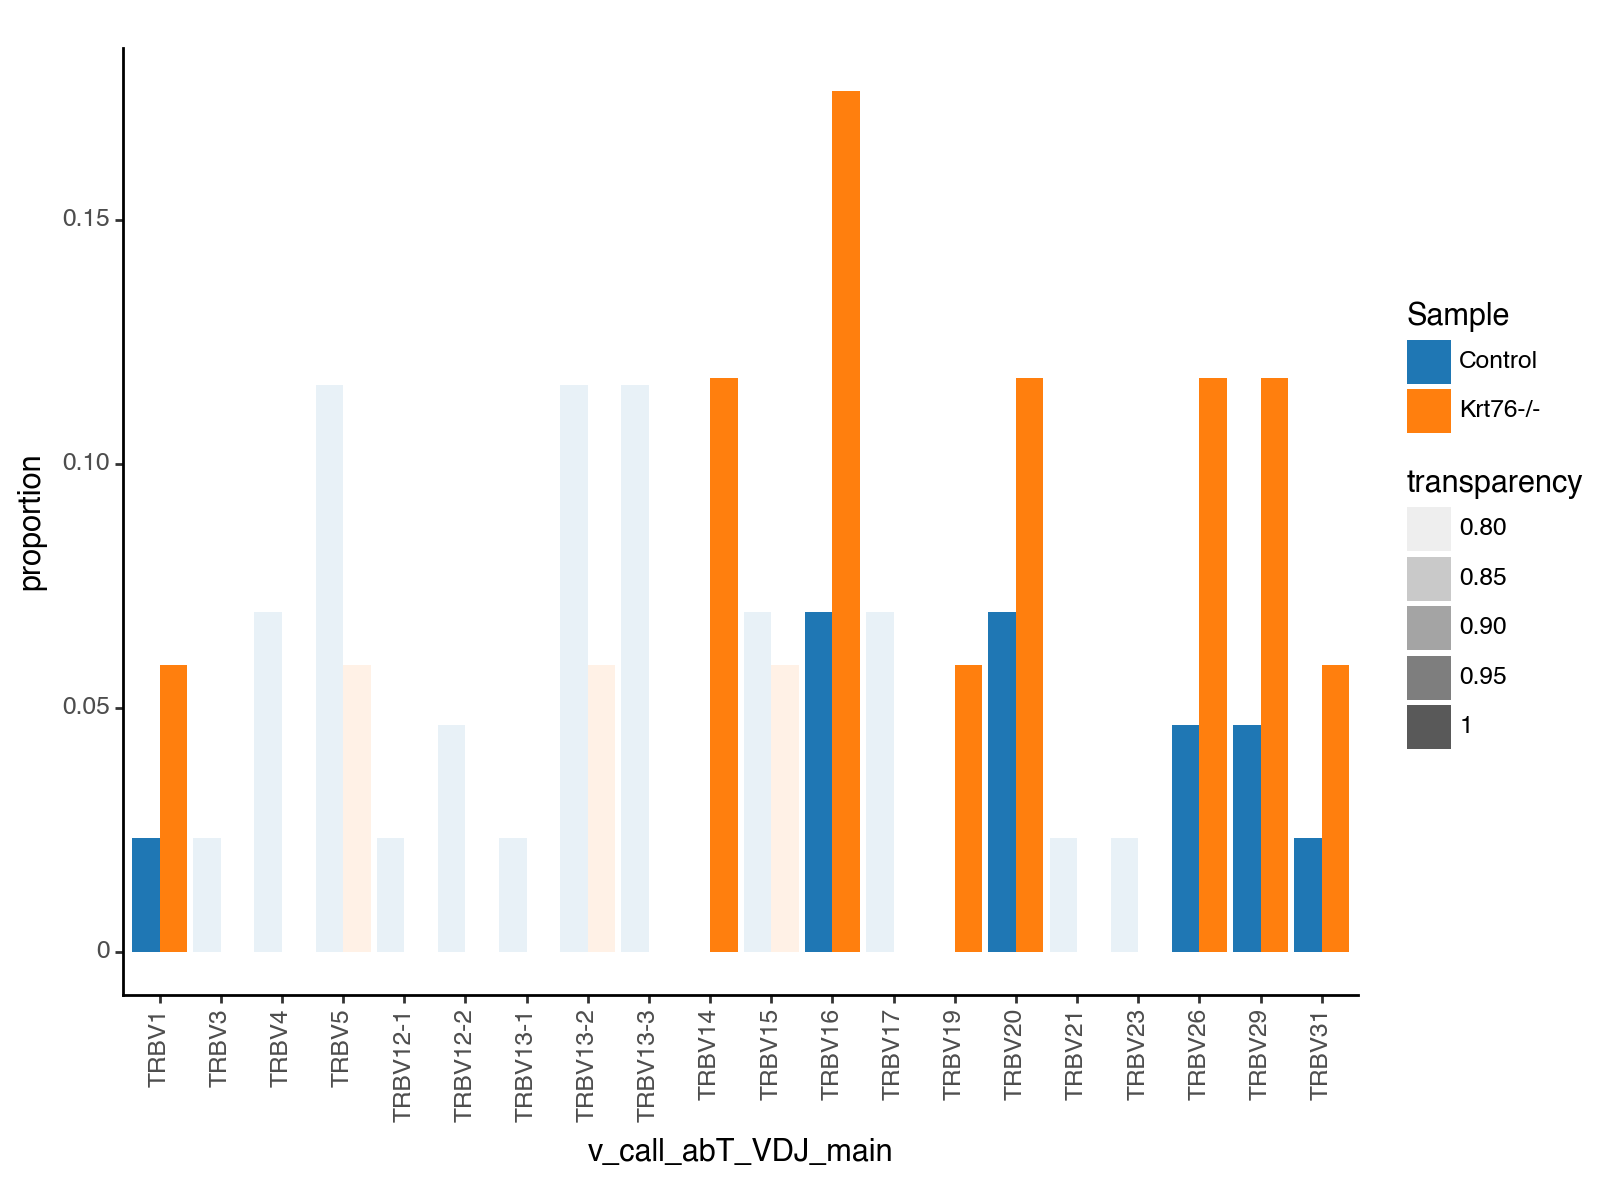

<Figure Size: (800 x 600)>

In [323]:
p

In [1548]:
p.save("VgeneBetaChain_TCRgd_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_TCRgd_141223.pdf


### NKT/NK/Tregs - V gene beta chain

In [1549]:
adata_PF_NK = adata_PF[adata_PF.obs["leiden"] == "11 NKT / NK / Tregs"]

In [1550]:
adata_PF_NK

View of AnnData object with n_obs × n_vars = 141 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1551]:
working_df = pd.DataFrame(adata_PF_NK.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
Sample   v_call_abT_VDJ_main                     
Control  TRBV19                                11
         TRBV3                                  8
         TRBV13-2                               8
         TRBV26                                 7
         TRBV5                                  7
         TRBV12-2                               7
         TRBV13-3                               7
         TRBV13-1                               6
         TRBV2                                  6
         TRBV15                                 6
         TRBV1                                  5
         TRBV16                                 5
         TRBV31                                 5
         TRBV12-1                               4
         TRBV29                                 4
         TRBV17                                 3
         TRBV20                                 3
         TRBV4                                  2
         TRBV23                                 1
         TRBV14                                 1
Krt76-/- TRBV13-2                               9
         TRBV20                                 4
         TRBV19                                 3
         TRBV5                                  3
         TRBV16                                 3
         TRBV2                                  3
         TRBV12-1                               2
         TRBV13-1                               2
         TRBV1                                  1
         TRBV15                                 1
         TRBV17                                 1
         TRBV31                                 1
         TRBV13-3                               1
         TRBV3                                  1
         TRBV12-2                               0
         TRBV4                                  0
         TRBV23                                 0
         TRBV26                                 0
         TRBV29                                 0
         TRBV14                                 0

In [1552]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control              TRBV19      11
1    Control               TRBV3       8
2    Control            TRBV13-2       8
3    Control              TRBV26       7
4    Control               TRBV5       7
5    Control            TRBV12-2       7
6    Control            TRBV13-3       7
7    Control            TRBV13-1       6
8    Control               TRBV2       6
9    Control              TRBV15       6
10   Control               TRBV1       5
11   Control              TRBV16       5
12   Control              TRBV31       5
13   Control            TRBV12-1       4
14   Control              TRBV29       4
15   Control              TRBV17       3
16   Control              TRBV20       3
17   Control               TRBV4       2
18   Control              TRBV23       1
19   Control              TRBV14       1
20  Krt76-/-            TRBV13-2       9
21  Krt76-/-              TRBV20       4
22  Krt76-/-              TRBV19       3
23  Krt76-/-               TRBV5       3
24  Krt76-/-              TRBV16       3
25  Krt76-/-               TRBV2       3
26  Krt76-/-            TRBV12-1       2
27  Krt76-/-            TRBV13-1       2
28  Krt76-/-               TRBV1       1
29  Krt76-/-              TRBV15       1
30  Krt76-/-              TRBV17       1
31  Krt76-/-              TRBV31       1
32  Krt76-/-            TRBV13-3       1
33  Krt76-/-               TRBV3       1
34  Krt76-/-            TRBV12-2       0
35  Krt76-/-               TRBV4       0
36  Krt76-/-              TRBV23       0
37  Krt76-/-              TRBV26       0
38  Krt76-/-              TRBV29       0
39  Krt76-/-              TRBV14       0

In [1553]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 106, 'Krt76-/-': 35}

In [1554]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1555]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control              TRBV19      11    0.103774
1    Control               TRBV3       8    0.075472
2    Control            TRBV13-2       8    0.075472
3    Control              TRBV26       7    0.066038
4    Control               TRBV5       7    0.066038
5    Control            TRBV12-2       7    0.066038
6    Control            TRBV13-3       7    0.066038
7    Control            TRBV13-1       6    0.056604
8    Control               TRBV2       6    0.056604
9    Control              TRBV15       6    0.056604
10   Control               TRBV1       5    0.047170
11   Control              TRBV16       5    0.047170
12   Control              TRBV31       5    0.047170
13   Control            TRBV12-1       4    0.037736
14   Control              TRBV29       4    0.037736
15   Control              TRBV17       3    0.028302
16   Control              TRBV20       3    0.028302
17   Control               TRBV4       2    0.018868
18   Control              TRBV23       1    0.009434
19   Control              TRBV14       1    0.009434
20  Krt76-/-            TRBV13-2       9    0.257143
21  Krt76-/-              TRBV20       4    0.114286
22  Krt76-/-              TRBV19       3    0.085714
23  Krt76-/-               TRBV5       3    0.085714
24  Krt76-/-              TRBV16       3    0.085714
25  Krt76-/-               TRBV2       3    0.085714
26  Krt76-/-            TRBV12-1       2    0.057143
27  Krt76-/-            TRBV13-1       2    0.057143
28  Krt76-/-               TRBV1       1    0.028571
29  Krt76-/-              TRBV15       1    0.028571
30  Krt76-/-              TRBV17       1    0.028571
31  Krt76-/-              TRBV31       1    0.028571
32  Krt76-/-            TRBV13-3       1    0.028571
33  Krt76-/-               TRBV3       1    0.028571
34  Krt76-/-            TRBV12-2       0    0.000000
35  Krt76-/-               TRBV4       0    0.000000
36  Krt76-/-              TRBV23       0    0.000000
37  Krt76-/-              TRBV26       0    0.000000
38  Krt76-/-              TRBV29       0    0.000000
39  Krt76-/-              TRBV14       0    0.000000

In [1556]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 106, 'Krt76-/-': 35}

In [1557]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1558]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control              TRBV19      11    0.103774
1    Control               TRBV3       8    0.075472
2    Control            TRBV13-2       8    0.075472
3    Control              TRBV26       7    0.066038
4    Control               TRBV5       7    0.066038
5    Control            TRBV12-2       7    0.066038
6    Control            TRBV13-3       7    0.066038
7    Control            TRBV13-1       6    0.056604
8    Control               TRBV2       6    0.056604
9    Control              TRBV15       6    0.056604
10   Control               TRBV1       5    0.047170
11   Control              TRBV16       5    0.047170
12   Control              TRBV31       5    0.047170
13   Control            TRBV12-1       4    0.037736
14   Control              TRBV29       4    0.037736
15   Control              TRBV17       3    0.028302
16   Control              TRBV20       3    0.028302
17   Control               TRBV4       2    0.018868
18   Control              TRBV23       1    0.009434
19   Control              TRBV14       1    0.009434
20  Krt76-/-            TRBV13-2       9    0.257143
21  Krt76-/-              TRBV20       4    0.114286
22  Krt76-/-              TRBV19       3    0.085714
23  Krt76-/-               TRBV5       3    0.085714
24  Krt76-/-              TRBV16       3    0.085714
25  Krt76-/-               TRBV2       3    0.085714
26  Krt76-/-            TRBV12-1       2    0.057143
27  Krt76-/-            TRBV13-1       2    0.057143
28  Krt76-/-               TRBV1       1    0.028571
29  Krt76-/-              TRBV15       1    0.028571
30  Krt76-/-              TRBV17       1    0.028571
31  Krt76-/-              TRBV31       1    0.028571
32  Krt76-/-            TRBV13-3       1    0.028571
33  Krt76-/-               TRBV3       1    0.028571
34  Krt76-/-            TRBV12-2       0    0.000000
35  Krt76-/-               TRBV4       0    0.000000
36  Krt76-/-              TRBV23       0    0.000000
37  Krt76-/-              TRBV26       0    0.000000
38  Krt76-/-              TRBV29       0    0.000000
39  Krt76-/-              TRBV14       0    0.000000

In [1559]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1560]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1561]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [1562]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [1563]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.6057142857142856,
 'TRBV2': 1.5142857142857142,
 'TRBV3': 0.37857142857142856,
 'TRBV4': 0.0,
 'TRBV5': 1.2979591836734694,
 'TRBV12-1': 1.5142857142857142,
 'TRBV12-2': 0.0,
 'TRBV13-1': 1.0095238095238095,
 'TRBV13-2': 3.407142857142857,
 'TRBV13-3': 0.43265306122448977,
 'TRBV14': 0.0,
 'TRBV15': 0.5047619047619047,
 'TRBV16': 1.817142857142857,
 'TRBV17': 1.0095238095238095,
 'TRBV19': 0.8259740259740259,
 'TRBV20': 4.038095238095238,
 'TRBV23': 0.0,
 'TRBV26': 0.0,
 'TRBV29': 0.0,
 'TRBV31': 0.6057142857142856}

In [1564]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control              TRBV19      11    0.103774    0.825974
1    Control               TRBV3       8    0.075472    0.378571
2    Control            TRBV13-2       8    0.075472    3.407143
3    Control              TRBV26       7    0.066038    0.000000
4    Control               TRBV5       7    0.066038    1.297959
5    Control            TRBV12-2       7    0.066038    0.000000
6    Control            TRBV13-3       7    0.066038    0.432653
7    Control            TRBV13-1       6    0.056604    1.009524
8    Control               TRBV2       6    0.056604    1.514286
9    Control              TRBV15       6    0.056604    0.504762
10   Control               TRBV1       5    0.047170    0.605714
11   Control              TRBV16       5    0.047170    1.817143
12   Control              TRBV31       5    0.047170    0.605714
13   Control            TRBV12-1       4    0.037736    1.514286
14   Control              TRBV29       4    0.037736    0.000000
15   Control              TRBV17       3    0.028302    1.009524
16   Control              TRBV20       3    0.028302    4.038095
17   Control               TRBV4       2    0.018868    0.000000
18   Control              TRBV23       1    0.009434    0.000000
19   Control              TRBV14       1    0.009434    0.000000
20  Krt76-/-            TRBV13-2       9    0.257143    3.407143
21  Krt76-/-              TRBV20       4    0.114286    4.038095
22  Krt76-/-              TRBV19       3    0.085714    0.825974
23  Krt76-/-               TRBV5       3    0.085714    1.297959
24  Krt76-/-              TRBV16       3    0.085714    1.817143
25  Krt76-/-               TRBV2       3    0.085714    1.514286
26  Krt76-/-            TRBV12-1       2    0.057143    1.514286
27  Krt76-/-            TRBV13-1       2    0.057143    1.009524
28  Krt76-/-               TRBV1       1    0.028571    0.605714
29  Krt76-/-              TRBV15       1    0.028571    0.504762
30  Krt76-/-              TRBV17       1    0.028571    1.009524
31  Krt76-/-              TRBV31       1    0.028571    0.605714
32  Krt76-/-            TRBV13-3       1    0.028571    0.432653
33  Krt76-/-               TRBV3       1    0.028571    0.378571
34  Krt76-/-            TRBV12-2       0    0.000000    0.000000
35  Krt76-/-               TRBV4       0    0.000000    0.000000
36  Krt76-/-              TRBV23       0    0.000000    0.000000
37  Krt76-/-              TRBV26       0    0.000000    0.000000
38  Krt76-/-              TRBV29       0    0.000000    0.000000
39  Krt76-/-              TRBV14       0    0.000000    0.000000

In [1565]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1566]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1567]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1568]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

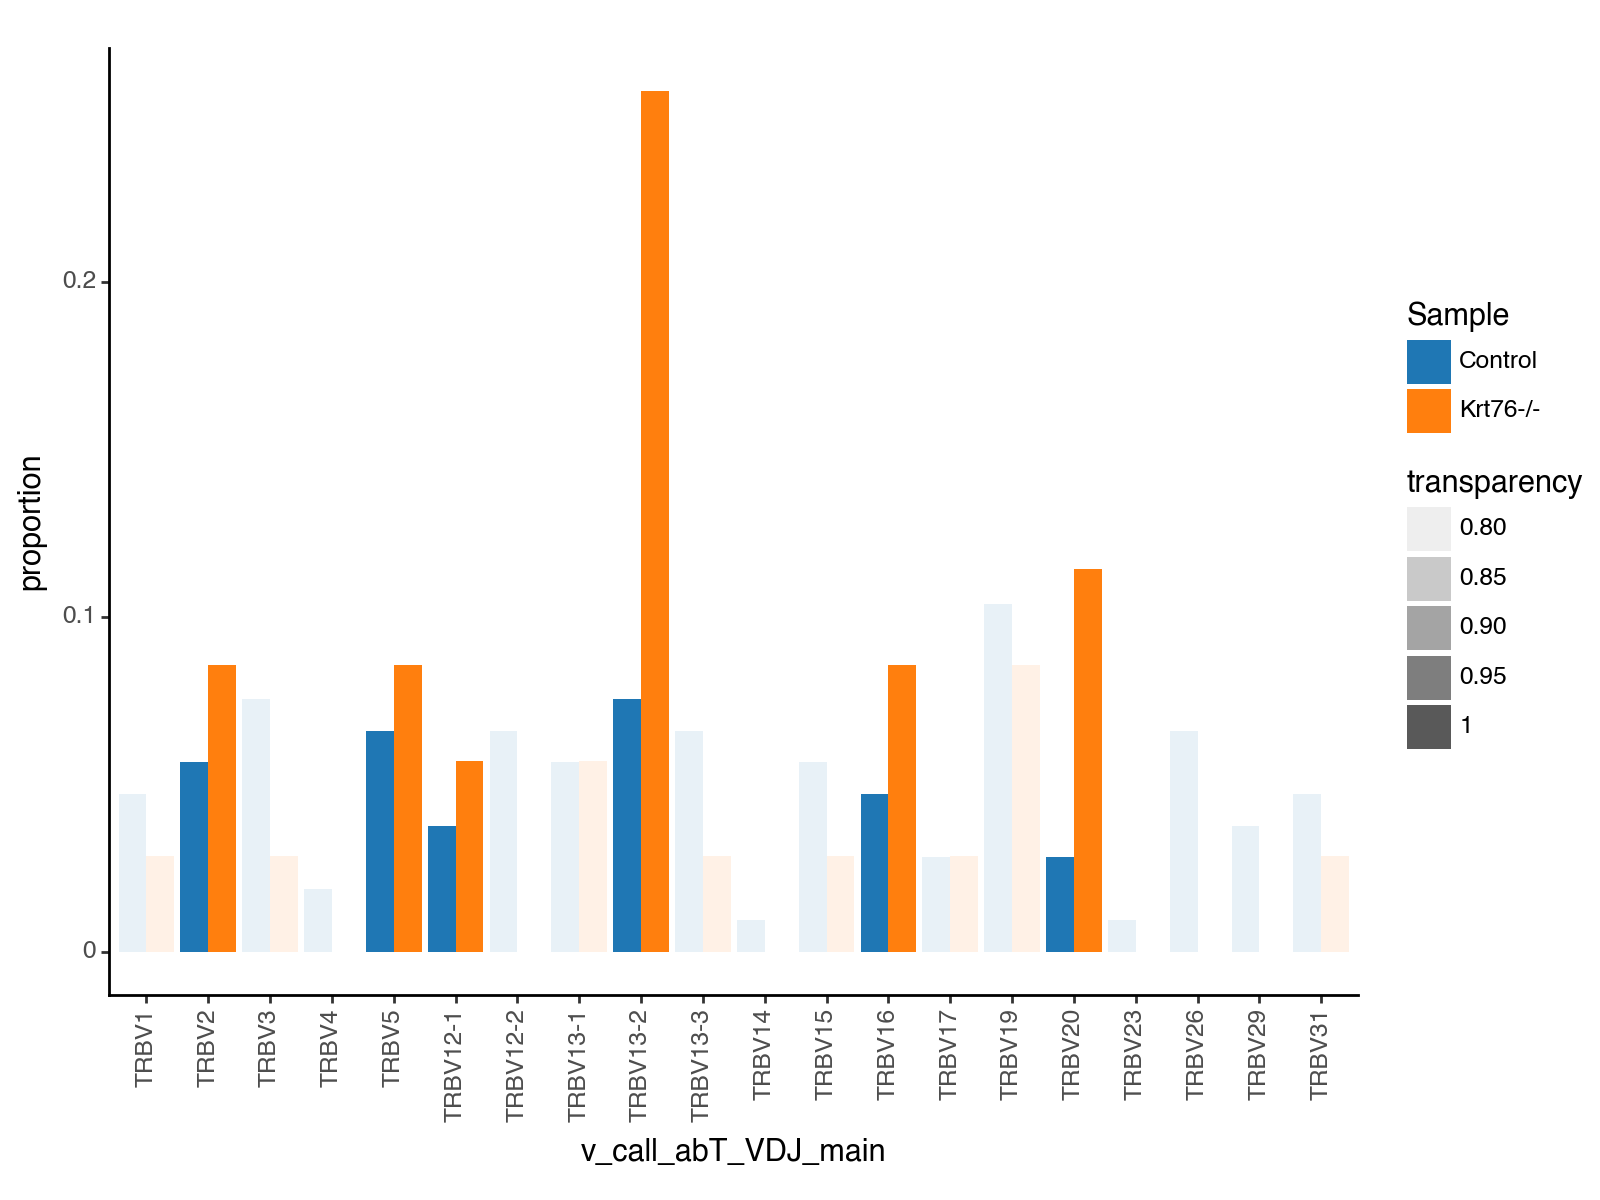

<Figure Size: (800 x 600)>

In [344]:
p

In [1569]:
p.save("VgeneBetaChain_NKTregs_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_NKTregs_141223.pdf


## J gene Beta Chain

In [1571]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VDJ_main"] != "No_contig"]

### DN2a - J gene beta chain

In [1572]:
adata_PF_DN2a = adata_PF[adata_PF.obs["leiden"] == "7 DN2a"]

In [1573]:
adata_PF_DN2a

View of AnnData object with n_obs × n_vars = 53 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1574]:
working_df = pd.DataFrame(adata_PF_DN2a.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-5                                7
         TRBJ1-1                                6
         TRBJ2-4                                6
         TRBJ2-7                                6
         TRBJ1-4                                4
         TRBJ1-6                                3
         TRBJ2-1                                3
         TRBJ1-2                                2
         TRBJ2-3                                2
         TRBJ1-5                                1
         TRBJ2-6                                1
Krt76-/- TRBJ2-7                                3
         TRBJ1-1                                2
         TRBJ1-6                                2
         TRBJ1-4                                1
         TRBJ2-1                                1
         TRBJ2-3                                1
         TRBJ2-4                                1
         TRBJ2-5                                1
         TRBJ1-2                                0
         TRBJ1-5                                0
         TRBJ2-6                                0

In [1575]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-5       7
1    Control             TRBJ1-1       6
2    Control             TRBJ2-4       6
3    Control             TRBJ2-7       6
4    Control             TRBJ1-4       4
5    Control             TRBJ1-6       3
6    Control             TRBJ2-1       3
7    Control             TRBJ1-2       2
8    Control             TRBJ2-3       2
9    Control             TRBJ1-5       1
10   Control             TRBJ2-6       1
11  Krt76-/-             TRBJ2-7       3
12  Krt76-/-             TRBJ1-1       2
13  Krt76-/-             TRBJ1-6       2
14  Krt76-/-             TRBJ1-4       1
15  Krt76-/-             TRBJ2-1       1
16  Krt76-/-             TRBJ2-3       1
17  Krt76-/-             TRBJ2-4       1
18  Krt76-/-             TRBJ2-5       1
19  Krt76-/-             TRBJ1-2       0
20  Krt76-/-             TRBJ1-5       0
21  Krt76-/-             TRBJ2-6       0

In [1576]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 41, 'Krt76-/-': 12}

In [1577]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1578]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-5       7    0.170732
1    Control             TRBJ1-1       6    0.146341
2    Control             TRBJ2-4       6    0.146341
3    Control             TRBJ2-7       6    0.146341
4    Control             TRBJ1-4       4    0.097561
5    Control             TRBJ1-6       3    0.073171
6    Control             TRBJ2-1       3    0.073171
7    Control             TRBJ1-2       2    0.048780
8    Control             TRBJ2-3       2    0.048780
9    Control             TRBJ1-5       1    0.024390
10   Control             TRBJ2-6       1    0.024390
11  Krt76-/-             TRBJ2-7       3    0.250000
12  Krt76-/-             TRBJ1-1       2    0.166667
13  Krt76-/-             TRBJ1-6       2    0.166667
14  Krt76-/-             TRBJ1-4       1    0.083333
15  Krt76-/-             TRBJ2-1       1    0.083333
16  Krt76-/-             TRBJ2-3       1    0.083333
17  Krt76-/-             TRBJ2-4       1    0.083333
18  Krt76-/-             TRBJ2-5       1    0.083333
19  Krt76-/-             TRBJ1-2       0    0.000000
20  Krt76-/-             TRBJ1-5       0    0.000000
21  Krt76-/-             TRBJ2-6       0    0.000000

In [1579]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 41, 'Krt76-/-': 12}

In [1580]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1581]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-5       7    0.170732
1    Control             TRBJ1-1       6    0.146341
2    Control             TRBJ2-4       6    0.146341
3    Control             TRBJ2-7       6    0.146341
4    Control             TRBJ1-4       4    0.097561
5    Control             TRBJ1-6       3    0.073171
6    Control             TRBJ2-1       3    0.073171
7    Control             TRBJ1-2       2    0.048780
8    Control             TRBJ2-3       2    0.048780
9    Control             TRBJ1-5       1    0.024390
10   Control             TRBJ2-6       1    0.024390
11  Krt76-/-             TRBJ2-7       3    0.250000
12  Krt76-/-             TRBJ1-1       2    0.166667
13  Krt76-/-             TRBJ1-6       2    0.166667
14  Krt76-/-             TRBJ1-4       1    0.083333
15  Krt76-/-             TRBJ2-1       1    0.083333
16  Krt76-/-             TRBJ2-3       1    0.083333
17  Krt76-/-             TRBJ2-4       1    0.083333
18  Krt76-/-             TRBJ2-5       1    0.083333
19  Krt76-/-             TRBJ1-2       0    0.000000
20  Krt76-/-             TRBJ1-5       0    0.000000
21  Krt76-/-             TRBJ2-6       0    0.000000

In [1582]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1583]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1584]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1585]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1586]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.1388888888888888,
 'TRBJ1-2': 0.0,
 'TRBJ1-4': 0.8541666666666666,
 'TRBJ1-5': 0.0,
 'TRBJ1-6': 2.2777777777777777,
 'TRBJ2-1': 1.1388888888888888,
 'TRBJ2-3': 1.7083333333333333,
 'TRBJ2-4': 0.5694444444444444,
 'TRBJ2-5': 0.488095238095238,
 'TRBJ2-6': 0.0,
 'TRBJ2-7': 1.7083333333333335}

In [1587]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-5       7    0.170732    0.488095
1    Control             TRBJ1-1       6    0.146341    1.138889
2    Control             TRBJ2-4       6    0.146341    0.569444
3    Control             TRBJ2-7       6    0.146341    1.708333
4    Control             TRBJ1-4       4    0.097561    0.854167
5    Control             TRBJ1-6       3    0.073171    2.277778
6    Control             TRBJ2-1       3    0.073171    1.138889
7    Control             TRBJ1-2       2    0.048780    0.000000
8    Control             TRBJ2-3       2    0.048780    1.708333
9    Control             TRBJ1-5       1    0.024390    0.000000
10   Control             TRBJ2-6       1    0.024390    0.000000
11  Krt76-/-             TRBJ2-7       3    0.250000    1.708333
12  Krt76-/-             TRBJ1-1       2    0.166667    1.138889
13  Krt76-/-             TRBJ1-6       2    0.166667    2.277778
14  Krt76-/-             TRBJ1-4       1    0.083333    0.854167
15  Krt76-/-             TRBJ2-1       1    0.083333    1.138889
16  Krt76-/-             TRBJ2-3       1    0.083333    1.708333
17  Krt76-/-             TRBJ2-4       1    0.083333    0.569444
18  Krt76-/-             TRBJ2-5       1    0.083333    0.488095
19  Krt76-/-             TRBJ1-2       0    0.000000    0.000000
20  Krt76-/-             TRBJ1-5       0    0.000000    0.000000
21  Krt76-/-             TRBJ2-6       0    0.000000    0.000000

In [1588]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1589]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1590]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1591]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

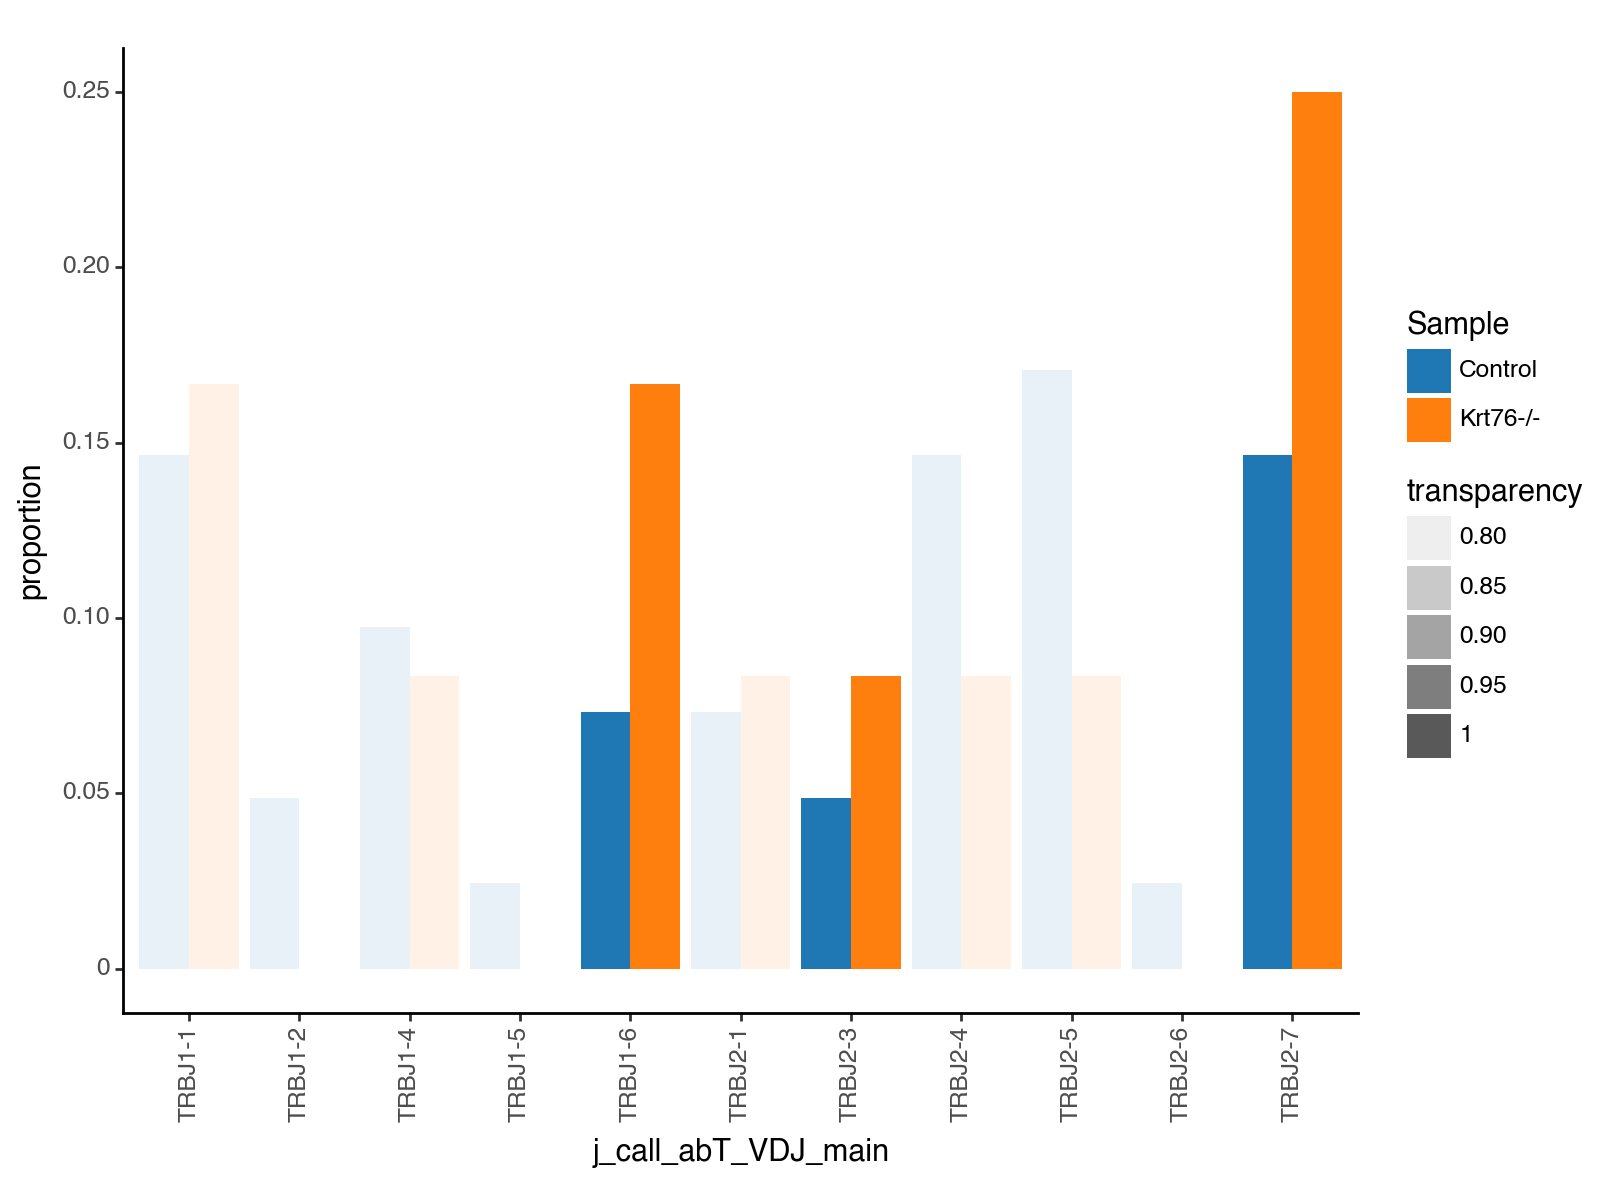

<Figure Size: (800 x 600)>

In [369]:
p

In [1592]:
p.save("JgeneBetaChain_DN2a_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN2a_141223.pdf


### DN2b1  - J gene beta chain

In [1593]:
adata_PF_DN2b1 = adata_PF[adata_PF.obs["leiden"] == "12 DN2b 1"]

In [1594]:
adata_PF_DN2b1

View of AnnData object with n_obs × n_vars = 38 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1595]:
working_df = pd.DataFrame(adata_PF_DN2b1.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                                5
         TRBJ2-2                                4
         TRBJ1-1                                3
         TRBJ1-4                                3
         TRBJ2-3                                3
         TRBJ1-2                                2
         TRBJ1-5                                2
         TRBJ2-1                                2
         TRBJ2-5                                2
         TRBJ1-3                                1
         TRBJ2-4                                1
         TRBJ1-6                                0
Krt76-/- TRBJ2-1                                3
         TRBJ2-4                                2
         TRBJ1-1                                1
         TRBJ1-5                                1
         TRBJ1-6                                1
         TRBJ2-3                                1
         TRBJ2-7                                1
         TRBJ1-2                                0
         TRBJ1-3                                0
         TRBJ1-4                                0
         TRBJ2-2                                0
         TRBJ2-5                                0

In [1596]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7       5
1    Control             TRBJ2-2       4
2    Control             TRBJ1-1       3
3    Control             TRBJ1-4       3
4    Control             TRBJ2-3       3
5    Control             TRBJ1-2       2
6    Control             TRBJ1-5       2
7    Control             TRBJ2-1       2
8    Control             TRBJ2-5       2
9    Control             TRBJ1-3       1
10   Control             TRBJ2-4       1
11   Control             TRBJ1-6       0
12  Krt76-/-             TRBJ2-1       3
13  Krt76-/-             TRBJ2-4       2
14  Krt76-/-             TRBJ1-1       1
15  Krt76-/-             TRBJ1-5       1
16  Krt76-/-             TRBJ1-6       1
17  Krt76-/-             TRBJ2-3       1
18  Krt76-/-             TRBJ2-7       1
19  Krt76-/-             TRBJ1-2       0
20  Krt76-/-             TRBJ1-3       0
21  Krt76-/-             TRBJ1-4       0
22  Krt76-/-             TRBJ2-2       0
23  Krt76-/-             TRBJ2-5       0

In [1597]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 28, 'Krt76-/-': 10}

In [1598]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1599]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7       5    0.178571
1    Control             TRBJ2-2       4    0.142857
2    Control             TRBJ1-1       3    0.107143
3    Control             TRBJ1-4       3    0.107143
4    Control             TRBJ2-3       3    0.107143
5    Control             TRBJ1-2       2    0.071429
6    Control             TRBJ1-5       2    0.071429
7    Control             TRBJ2-1       2    0.071429
8    Control             TRBJ2-5       2    0.071429
9    Control             TRBJ1-3       1    0.035714
10   Control             TRBJ2-4       1    0.035714
11   Control             TRBJ1-6       0    0.000000
12  Krt76-/-             TRBJ2-1       3    0.300000
13  Krt76-/-             TRBJ2-4       2    0.200000
14  Krt76-/-             TRBJ1-1       1    0.100000
15  Krt76-/-             TRBJ1-5       1    0.100000
16  Krt76-/-             TRBJ1-6       1    0.100000
17  Krt76-/-             TRBJ2-3       1    0.100000
18  Krt76-/-             TRBJ2-7       1    0.100000
19  Krt76-/-             TRBJ1-2       0    0.000000
20  Krt76-/-             TRBJ1-3       0    0.000000
21  Krt76-/-             TRBJ1-4       0    0.000000
22  Krt76-/-             TRBJ2-2       0    0.000000
23  Krt76-/-             TRBJ2-5       0    0.000000

In [1600]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 28, 'Krt76-/-': 10}

In [1601]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1602]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7       5    0.178571
1    Control             TRBJ2-2       4    0.142857
2    Control             TRBJ1-1       3    0.107143
3    Control             TRBJ1-4       3    0.107143
4    Control             TRBJ2-3       3    0.107143
5    Control             TRBJ1-2       2    0.071429
6    Control             TRBJ1-5       2    0.071429
7    Control             TRBJ2-1       2    0.071429
8    Control             TRBJ2-5       2    0.071429
9    Control             TRBJ1-3       1    0.035714
10   Control             TRBJ2-4       1    0.035714
11   Control             TRBJ1-6       0    0.000000
12  Krt76-/-             TRBJ2-1       3    0.300000
13  Krt76-/-             TRBJ2-4       2    0.200000
14  Krt76-/-             TRBJ1-1       1    0.100000
15  Krt76-/-             TRBJ1-5       1    0.100000
16  Krt76-/-             TRBJ1-6       1    0.100000
17  Krt76-/-             TRBJ2-3       1    0.100000
18  Krt76-/-             TRBJ2-7       1    0.100000
19  Krt76-/-             TRBJ1-2       0    0.000000
20  Krt76-/-             TRBJ1-3       0    0.000000
21  Krt76-/-             TRBJ1-4       0    0.000000
22  Krt76-/-             TRBJ2-2       0    0.000000
23  Krt76-/-             TRBJ2-5       0    0.000000

In [1603]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1604]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1605]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1606]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1607]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.9333333333333335,
 'TRBJ1-2': 0.0,
 'TRBJ1-3': 0.0,
 'TRBJ1-4': 0.0,
 'TRBJ1-5': 1.4000000000000001,
 'TRBJ1-6': inf,
 'TRBJ2-1': 4.2,
 'TRBJ2-2': 0.0,
 'TRBJ2-3': 0.9333333333333335,
 'TRBJ2-4': 5.6000000000000005,
 'TRBJ2-5': 0.0,
 'TRBJ2-7': 0.56}

In [1608]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7       5    0.178571    0.560000
1    Control             TRBJ2-2       4    0.142857    0.000000
2    Control             TRBJ1-1       3    0.107143    0.933333
3    Control             TRBJ1-4       3    0.107143    0.000000
4    Control             TRBJ2-3       3    0.107143    0.933333
5    Control             TRBJ1-2       2    0.071429    0.000000
6    Control             TRBJ1-5       2    0.071429    1.400000
7    Control             TRBJ2-1       2    0.071429    4.200000
8    Control             TRBJ2-5       2    0.071429    0.000000
9    Control             TRBJ1-3       1    0.035714    0.000000
10   Control             TRBJ2-4       1    0.035714    5.600000
11   Control             TRBJ1-6       0    0.000000         inf
12  Krt76-/-             TRBJ2-1       3    0.300000    4.200000
13  Krt76-/-             TRBJ2-4       2    0.200000    5.600000
14  Krt76-/-             TRBJ1-1       1    0.100000    0.933333
15  Krt76-/-             TRBJ1-5       1    0.100000    1.400000
16  Krt76-/-             TRBJ1-6       1    0.100000         inf
17  Krt76-/-             TRBJ2-3       1    0.100000    0.933333
18  Krt76-/-             TRBJ2-7       1    0.100000    0.560000
19  Krt76-/-             TRBJ1-2       0    0.000000    0.000000
20  Krt76-/-             TRBJ1-3       0    0.000000    0.000000
21  Krt76-/-             TRBJ1-4       0    0.000000    0.000000
22  Krt76-/-             TRBJ2-2       0    0.000000    0.000000
23  Krt76-/-             TRBJ2-5       0    0.000000    0.000000

In [1609]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1610]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1611]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1612]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

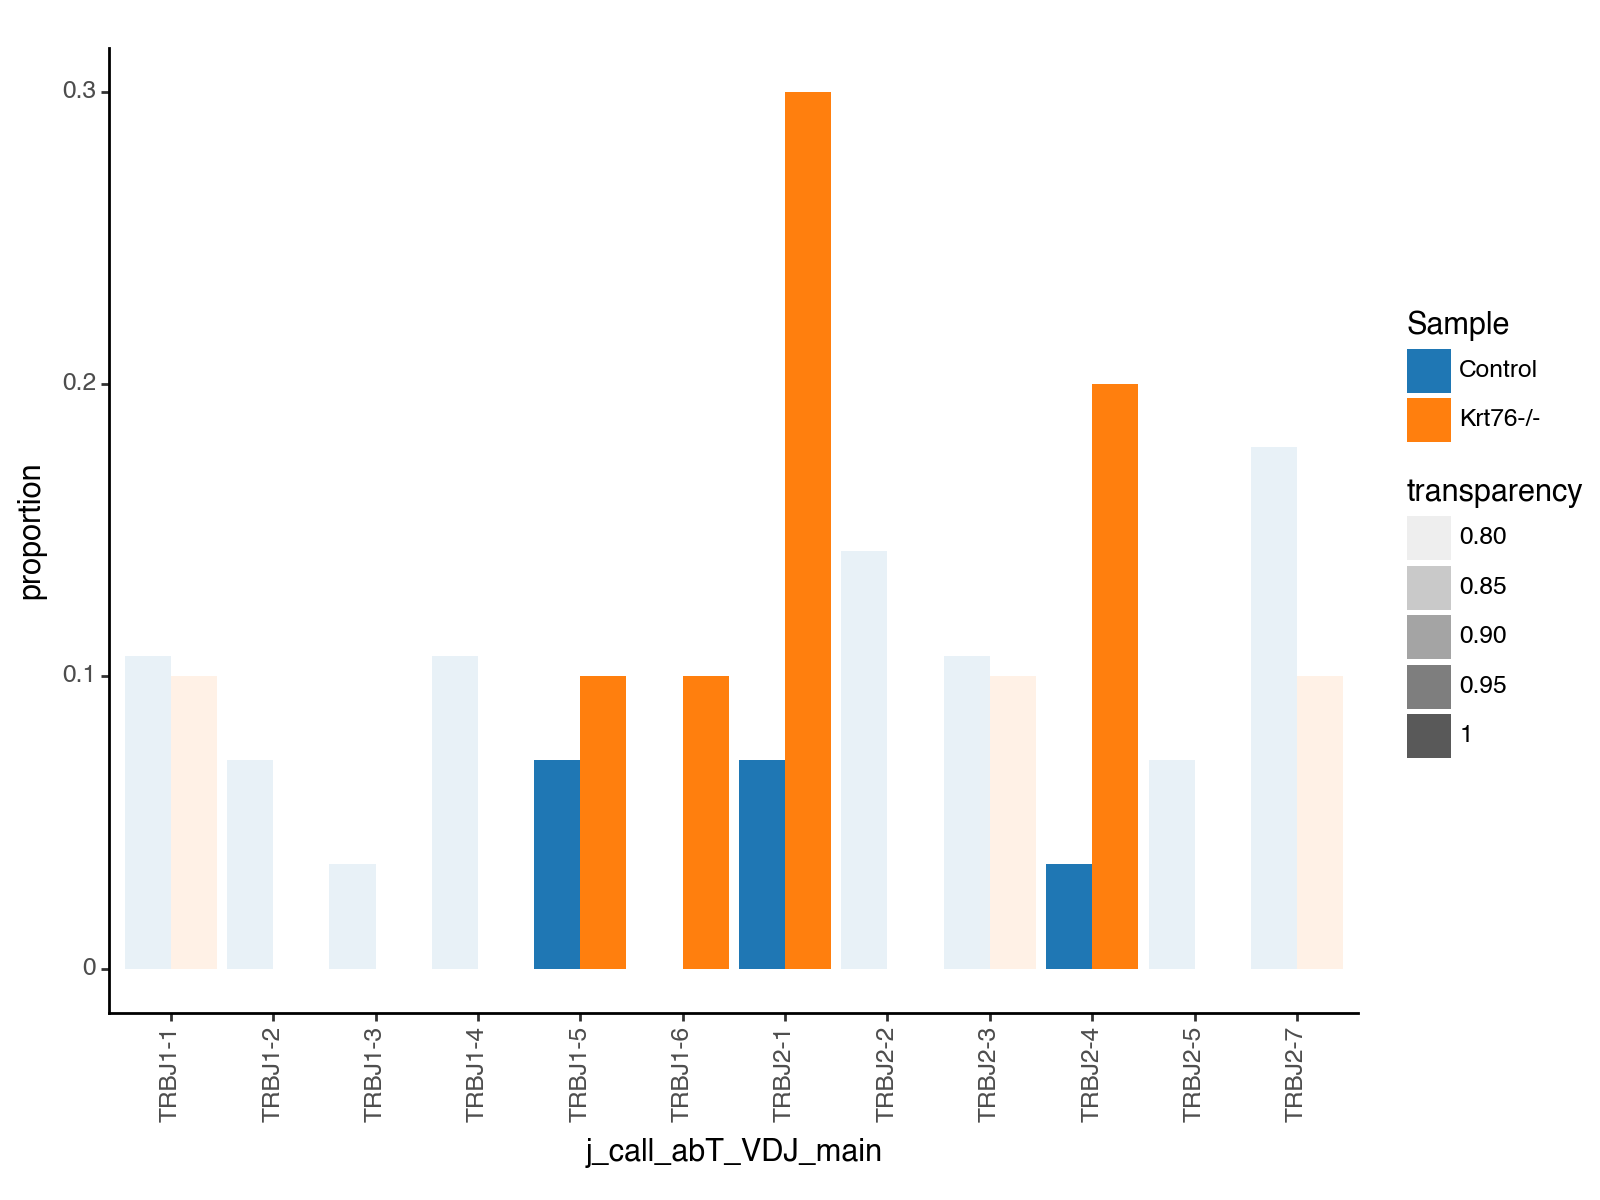

<Figure Size: (800 x 600)>

In [390]:
p

In [1613]:
p.save("JgeneBetaChain_DN2b1_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN2b1_141223.pdf


### DN2b2 - J gene beta chain

In [1614]:
adata_PF_DN2b2 = adata_PF[adata_PF.obs["leiden"] == "4 DN2b 2"]

In [1615]:
adata_PF_DN2b2

View of AnnData object with n_obs × n_vars = 584 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1616]:
working_df = pd.DataFrame(adata_PF_DN2b2.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                         
Control  TRBJ2-1                                   77
         TRBJ2-7                                   66
         TRBJ2-5                                   64
         TRBJ1-2                                   38
         TRBJ2-4                                   37
         TRBJ1-1                                   34
         TRBJ2-3                                   32
         TRBJ1-4                                   24
         TRBJ1-3                                   19
         TRBJ2-2                                   17
         TRBJ1-5                                   11
         TRBJ1-6                                   10
         TRBJ2-6                                    5
         TRBJ1-6,TRBJ2-2,TRBJ2-7                    1
Krt76-/- TRBJ2-7                                   25
         TRBJ2-5                                   21
         TRBJ1-1                                   19
         TRBJ2-3                                   18
         TRBJ1-5                                   13
         TRBJ2-4                                   11
         TRBJ2-1                                   10
         TRBJ1-2                                    8
         TRBJ2-2                                    8
         TRBJ1-4                                    7
         TRBJ1-3                                    5
         TRBJ1-6                                    3
         TRBJ2-6                                    1
         TRBJ1-6,TRBJ2-2,TRBJ2-7                    0

In [1617]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample      j_call_abT_VDJ_main  counts
0    Control                  TRBJ2-1      77
1    Control                  TRBJ2-7      66
2    Control                  TRBJ2-5      64
3    Control                  TRBJ1-2      38
4    Control                  TRBJ2-4      37
5    Control                  TRBJ1-1      34
6    Control                  TRBJ2-3      32
7    Control                  TRBJ1-4      24
8    Control                  TRBJ1-3      19
9    Control                  TRBJ2-2      17
10   Control                  TRBJ1-5      11
11   Control                  TRBJ1-6      10
12   Control                  TRBJ2-6       5
13   Control  TRBJ1-6,TRBJ2-2,TRBJ2-7       1
14  Krt76-/-                  TRBJ2-7      25
15  Krt76-/-                  TRBJ2-5      21
16  Krt76-/-                  TRBJ1-1      19
17  Krt76-/-                  TRBJ2-3      18
18  Krt76-/-                  TRBJ1-5      13
19  Krt76-/-                  TRBJ2-4      11
20  Krt76-/-                  TRBJ2-1      10
21  Krt76-/-                  TRBJ1-2       8
22  Krt76-/-                  TRBJ2-2       8
23  Krt76-/-                  TRBJ1-4       7
24  Krt76-/-                  TRBJ1-3       5
25  Krt76-/-                  TRBJ1-6       3
26  Krt76-/-                  TRBJ2-6       1
27  Krt76-/-  TRBJ1-6,TRBJ2-2,TRBJ2-7       0

In [1618]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 435, 'Krt76-/-': 149}

In [1619]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1620]:
working_df

Sample      j_call_abT_VDJ_main  counts  proportion
0    Control                  TRBJ2-1      77    0.177011
1    Control                  TRBJ2-7      66    0.151724
2    Control                  TRBJ2-5      64    0.147126
3    Control                  TRBJ1-2      38    0.087356
4    Control                  TRBJ2-4      37    0.085057
5    Control                  TRBJ1-1      34    0.078161
6    Control                  TRBJ2-3      32    0.073563
7    Control                  TRBJ1-4      24    0.055172
8    Control                  TRBJ1-3      19    0.043678
9    Control                  TRBJ2-2      17    0.039080
10   Control                  TRBJ1-5      11    0.025287
11   Control                  TRBJ1-6      10    0.022989
12   Control                  TRBJ2-6       5    0.011494
13   Control  TRBJ1-6,TRBJ2-2,TRBJ2-7       1    0.002299
14  Krt76-/-                  TRBJ2-7      25    0.167785
15  Krt76-/-                  TRBJ2-5      21    0.140940
16  Krt76-/-                  TRBJ1-1      19    0.127517
17  Krt76-/-                  TRBJ2-3      18    0.120805
18  Krt76-/-                  TRBJ1-5      13    0.087248
19  Krt76-/-                  TRBJ2-4      11    0.073826
20  Krt76-/-                  TRBJ2-1      10    0.067114
21  Krt76-/-                  TRBJ1-2       8    0.053691
22  Krt76-/-                  TRBJ2-2       8    0.053691
23  Krt76-/-                  TRBJ1-4       7    0.046980
24  Krt76-/-                  TRBJ1-3       5    0.033557
25  Krt76-/-                  TRBJ1-6       3    0.020134
26  Krt76-/-                  TRBJ2-6       1    0.006711
27  Krt76-/-  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000

In [1621]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 435, 'Krt76-/-': 149}

In [1622]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1623]:
working_df

Sample      j_call_abT_VDJ_main  counts  proportion
0    Control                  TRBJ2-1      77    0.177011
1    Control                  TRBJ2-7      66    0.151724
2    Control                  TRBJ2-5      64    0.147126
3    Control                  TRBJ1-2      38    0.087356
4    Control                  TRBJ2-4      37    0.085057
5    Control                  TRBJ1-1      34    0.078161
6    Control                  TRBJ2-3      32    0.073563
7    Control                  TRBJ1-4      24    0.055172
8    Control                  TRBJ1-3      19    0.043678
9    Control                  TRBJ2-2      17    0.039080
10   Control                  TRBJ1-5      11    0.025287
11   Control                  TRBJ1-6      10    0.022989
12   Control                  TRBJ2-6       5    0.011494
13   Control  TRBJ1-6,TRBJ2-2,TRBJ2-7       1    0.002299
14  Krt76-/-                  TRBJ2-7      25    0.167785
15  Krt76-/-                  TRBJ2-5      21    0.140940
16  Krt76-/-                  TRBJ1-1      19    0.127517
17  Krt76-/-                  TRBJ2-3      18    0.120805
18  Krt76-/-                  TRBJ1-5      13    0.087248
19  Krt76-/-                  TRBJ2-4      11    0.073826
20  Krt76-/-                  TRBJ2-1      10    0.067114
21  Krt76-/-                  TRBJ1-2       8    0.053691
22  Krt76-/-                  TRBJ2-2       8    0.053691
23  Krt76-/-                  TRBJ1-4       7    0.046980
24  Krt76-/-                  TRBJ1-3       5    0.033557
25  Krt76-/-                  TRBJ1-6       3    0.020134
26  Krt76-/-                  TRBJ2-6       1    0.006711
27  Krt76-/-  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000

In [1624]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1625]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1626]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1627]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1628]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.6314646664034742,
 'TRBJ1-2': 0.6146238078417521,
 'TRBJ1-3': 0.7682797598021901,
 'TRBJ1-4': 0.851510067114094,
 'TRBJ1-5': 3.450274557657108,
 'TRBJ1-6': 0.8758389261744965,
 'TRBJ1-6,TRBJ2-2,TRBJ2-7': 0.0,
 'TRBJ2-1': 0.37915105029198987,
 'TRBJ2-2': 1.3738649822345046,
 'TRBJ2-3': 1.6421979865771814,
 'TRBJ2-4': 0.8679484853981498,
 'TRBJ2-5': 0.9579488255033557,
 'TRBJ2-6': 0.5838926174496645,
 'TRBJ2-7': 1.1058572300183038}

In [1629]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample      j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control                  TRBJ2-1      77    0.177011    0.379151
1    Control                  TRBJ2-7      66    0.151724    1.105857
2    Control                  TRBJ2-5      64    0.147126    0.957949
3    Control                  TRBJ1-2      38    0.087356    0.614624
4    Control                  TRBJ2-4      37    0.085057    0.867948
5    Control                  TRBJ1-1      34    0.078161    1.631465
6    Control                  TRBJ2-3      32    0.073563    1.642198
7    Control                  TRBJ1-4      24    0.055172    0.851510
8    Control                  TRBJ1-3      19    0.043678    0.768280
9    Control                  TRBJ2-2      17    0.039080    1.373865
10   Control                  TRBJ1-5      11    0.025287    3.450275
11   Control                  TRBJ1-6      10    0.022989    0.875839
12   Control                  TRBJ2-6       5    0.011494    0.583893
13   Control  TRBJ1-6,TRBJ2-2,TRBJ2-7       1    0.002299    0.000000
14  Krt76-/-                  TRBJ2-7      25    0.167785    1.105857
15  Krt76-/-                  TRBJ2-5      21    0.140940    0.957949
16  Krt76-/-                  TRBJ1-1      19    0.127517    1.631465
17  Krt76-/-                  TRBJ2-3      18    0.120805    1.642198
18  Krt76-/-                  TRBJ1-5      13    0.087248    3.450275
19  Krt76-/-                  TRBJ2-4      11    0.073826    0.867948
20  Krt76-/-                  TRBJ2-1      10    0.067114    0.379151
21  Krt76-/-                  TRBJ1-2       8    0.053691    0.614624
22  Krt76-/-                  TRBJ2-2       8    0.053691    1.373865
23  Krt76-/-                  TRBJ1-4       7    0.046980    0.851510
24  Krt76-/-                  TRBJ1-3       5    0.033557    0.768280
25  Krt76-/-                  TRBJ1-6       3    0.020134    0.875839
26  Krt76-/-                  TRBJ2-6       1    0.006711    0.583893
27  Krt76-/-  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000    0.000000

In [1630]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1631]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1632]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1633]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

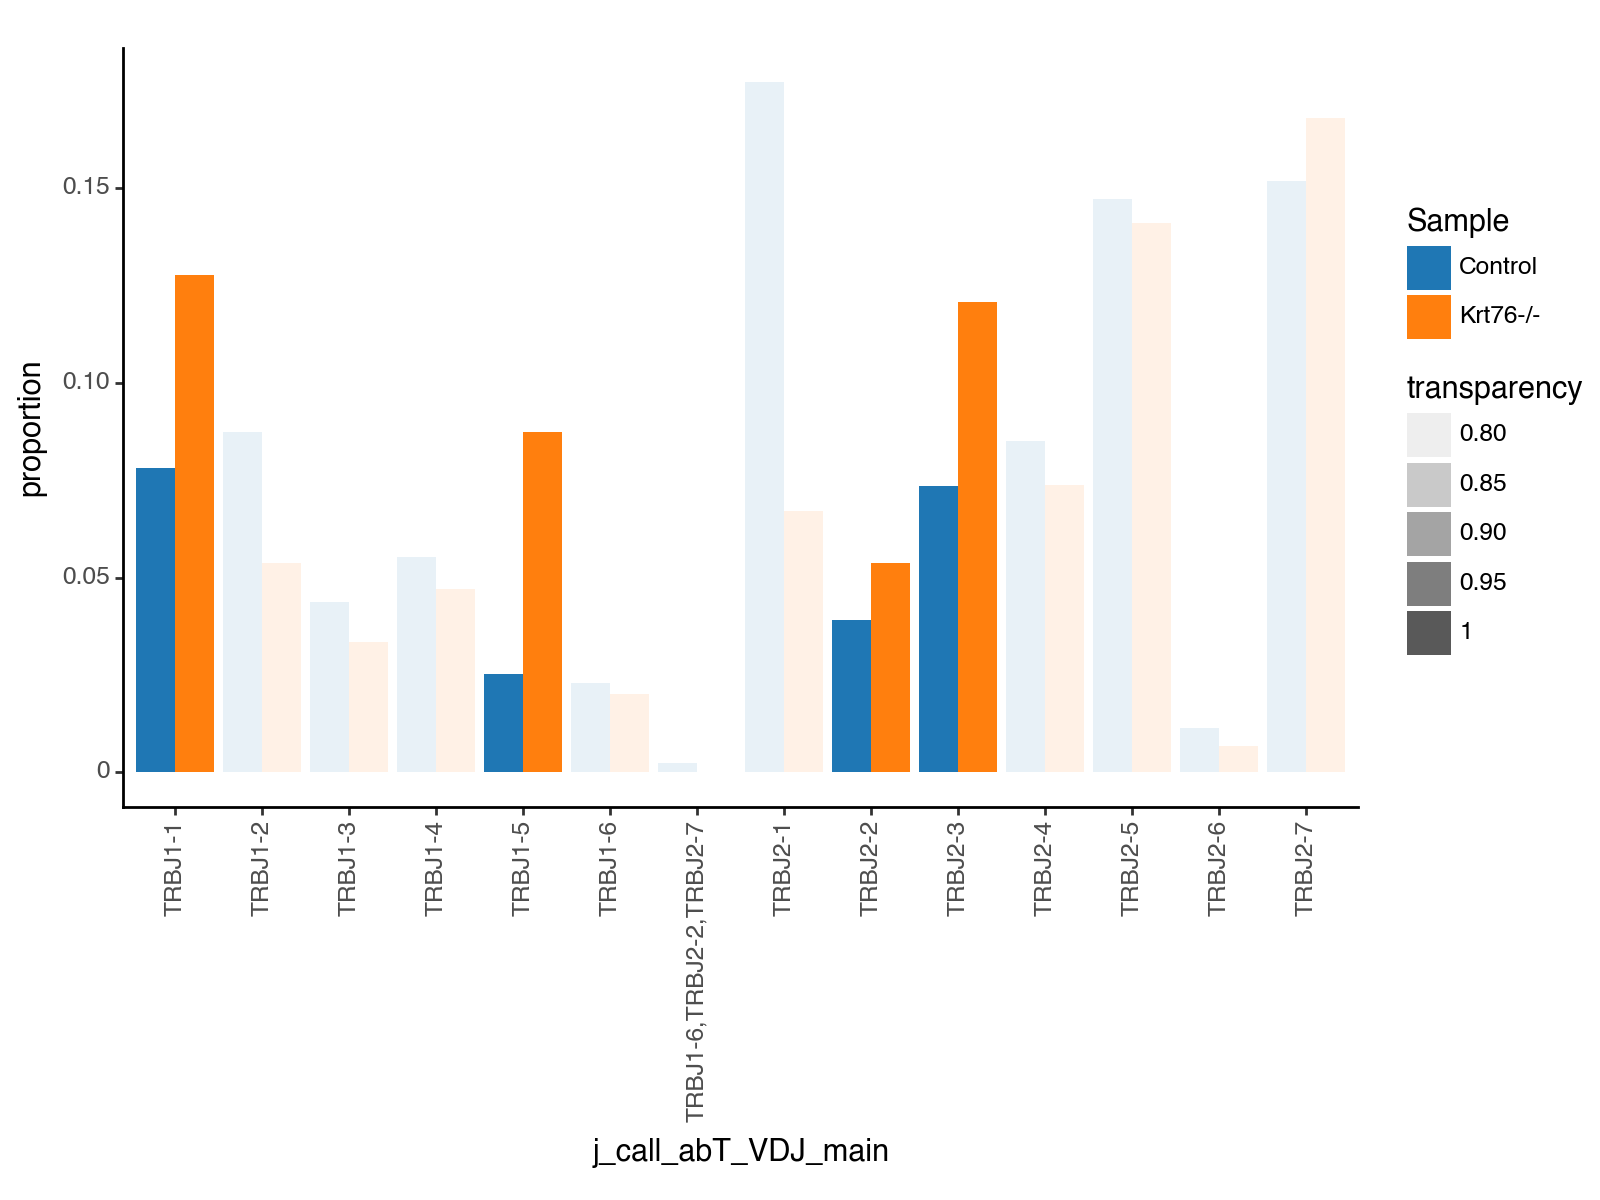

<Figure Size: (800 x 600)>

In [411]:
p

In [1634]:
p.save("JgeneBetaChain_DNb2_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DNb2_141223.pdf


### DN3 - J gene beta chain

In [1635]:
adata_PF_DN3 = adata_PF[adata_PF.obs["leiden"] == "10 DN3"]

In [1636]:
adata_PF_DN3

View of AnnData object with n_obs × n_vars = 121 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1637]:
working_df = pd.DataFrame(adata_PF_DN3.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                               18
         TRBJ2-1                               13
         TRBJ1-3                                9
         TRBJ1-1                                6
         TRBJ1-2                                6
         TRBJ2-3                                6
         TRBJ2-5                                6
         TRBJ1-4                                5
         TRBJ1-5                                5
         TRBJ2-2                                5
         TRBJ1-6                                3
         TRBJ2-4                                3
Krt76-/- TRBJ2-5                                9
         TRBJ1-1                                6
         TRBJ2-7                                5
         TRBJ2-4                                4
         TRBJ2-1                                3
         TRBJ2-3                                3
         TRBJ1-3                                2
         TRBJ1-4                                2
         TRBJ1-5                                1
         TRBJ1-6                                1
         TRBJ1-2                                0
         TRBJ2-2                                0

In [1638]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7      18
1    Control             TRBJ2-1      13
2    Control             TRBJ1-3       9
3    Control             TRBJ1-1       6
4    Control             TRBJ1-2       6
5    Control             TRBJ2-3       6
6    Control             TRBJ2-5       6
7    Control             TRBJ1-4       5
8    Control             TRBJ1-5       5
9    Control             TRBJ2-2       5
10   Control             TRBJ1-6       3
11   Control             TRBJ2-4       3
12  Krt76-/-             TRBJ2-5       9
13  Krt76-/-             TRBJ1-1       6
14  Krt76-/-             TRBJ2-7       5
15  Krt76-/-             TRBJ2-4       4
16  Krt76-/-             TRBJ2-1       3
17  Krt76-/-             TRBJ2-3       3
18  Krt76-/-             TRBJ1-3       2
19  Krt76-/-             TRBJ1-4       2
20  Krt76-/-             TRBJ1-5       1
21  Krt76-/-             TRBJ1-6       1
22  Krt76-/-             TRBJ1-2       0
23  Krt76-/-             TRBJ2-2       0

In [1639]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 85, 'Krt76-/-': 36}

In [1640]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1641]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      18    0.211765
1    Control             TRBJ2-1      13    0.152941
2    Control             TRBJ1-3       9    0.105882
3    Control             TRBJ1-1       6    0.070588
4    Control             TRBJ1-2       6    0.070588
5    Control             TRBJ2-3       6    0.070588
6    Control             TRBJ2-5       6    0.070588
7    Control             TRBJ1-4       5    0.058824
8    Control             TRBJ1-5       5    0.058824
9    Control             TRBJ2-2       5    0.058824
10   Control             TRBJ1-6       3    0.035294
11   Control             TRBJ2-4       3    0.035294
12  Krt76-/-             TRBJ2-5       9    0.250000
13  Krt76-/-             TRBJ1-1       6    0.166667
14  Krt76-/-             TRBJ2-7       5    0.138889
15  Krt76-/-             TRBJ2-4       4    0.111111
16  Krt76-/-             TRBJ2-1       3    0.083333
17  Krt76-/-             TRBJ2-3       3    0.083333
18  Krt76-/-             TRBJ1-3       2    0.055556
19  Krt76-/-             TRBJ1-4       2    0.055556
20  Krt76-/-             TRBJ1-5       1    0.027778
21  Krt76-/-             TRBJ1-6       1    0.027778
22  Krt76-/-             TRBJ1-2       0    0.000000
23  Krt76-/-             TRBJ2-2       0    0.000000

In [1642]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 85, 'Krt76-/-': 36}

In [1643]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1644]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      18    0.211765
1    Control             TRBJ2-1      13    0.152941
2    Control             TRBJ1-3       9    0.105882
3    Control             TRBJ1-1       6    0.070588
4    Control             TRBJ1-2       6    0.070588
5    Control             TRBJ2-3       6    0.070588
6    Control             TRBJ2-5       6    0.070588
7    Control             TRBJ1-4       5    0.058824
8    Control             TRBJ1-5       5    0.058824
9    Control             TRBJ2-2       5    0.058824
10   Control             TRBJ1-6       3    0.035294
11   Control             TRBJ2-4       3    0.035294
12  Krt76-/-             TRBJ2-5       9    0.250000
13  Krt76-/-             TRBJ1-1       6    0.166667
14  Krt76-/-             TRBJ2-7       5    0.138889
15  Krt76-/-             TRBJ2-4       4    0.111111
16  Krt76-/-             TRBJ2-1       3    0.083333
17  Krt76-/-             TRBJ2-3       3    0.083333
18  Krt76-/-             TRBJ1-3       2    0.055556
19  Krt76-/-             TRBJ1-4       2    0.055556
20  Krt76-/-             TRBJ1-5       1    0.027778
21  Krt76-/-             TRBJ1-6       1    0.027778
22  Krt76-/-             TRBJ1-2       0    0.000000
23  Krt76-/-             TRBJ2-2       0    0.000000

In [1645]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1646]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1647]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1648]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1649]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 2.361111111111111,
 'TRBJ1-2': 0.0,
 'TRBJ1-3': 0.5246913580246914,
 'TRBJ1-4': 0.9444444444444444,
 'TRBJ1-5': 0.4722222222222222,
 'TRBJ1-6': 0.787037037037037,
 'TRBJ2-1': 0.5448717948717948,
 'TRBJ2-2': 0.0,
 'TRBJ2-3': 1.1805555555555556,
 'TRBJ2-4': 3.148148148148148,
 'TRBJ2-5': 3.5416666666666665,
 'TRBJ2-7': 0.6558641975308642}

In [1650]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7      18    0.211765    0.655864
1    Control             TRBJ2-1      13    0.152941    0.544872
2    Control             TRBJ1-3       9    0.105882    0.524691
3    Control             TRBJ1-1       6    0.070588    2.361111
4    Control             TRBJ1-2       6    0.070588    0.000000
5    Control             TRBJ2-3       6    0.070588    1.180556
6    Control             TRBJ2-5       6    0.070588    3.541667
7    Control             TRBJ1-4       5    0.058824    0.944444
8    Control             TRBJ1-5       5    0.058824    0.472222
9    Control             TRBJ2-2       5    0.058824    0.000000
10   Control             TRBJ1-6       3    0.035294    0.787037
11   Control             TRBJ2-4       3    0.035294    3.148148
12  Krt76-/-             TRBJ2-5       9    0.250000    3.541667
13  Krt76-/-             TRBJ1-1       6    0.166667    2.361111
14  Krt76-/-             TRBJ2-7       5    0.138889    0.655864
15  Krt76-/-             TRBJ2-4       4    0.111111    3.148148
16  Krt76-/-             TRBJ2-1       3    0.083333    0.544872
17  Krt76-/-             TRBJ2-3       3    0.083333    1.180556
18  Krt76-/-             TRBJ1-3       2    0.055556    0.524691
19  Krt76-/-             TRBJ1-4       2    0.055556    0.944444
20  Krt76-/-             TRBJ1-5       1    0.027778    0.472222
21  Krt76-/-             TRBJ1-6       1    0.027778    0.787037
22  Krt76-/-             TRBJ1-2       0    0.000000    0.000000
23  Krt76-/-             TRBJ2-2       0    0.000000    0.000000

In [1651]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1652]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1653]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1654]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

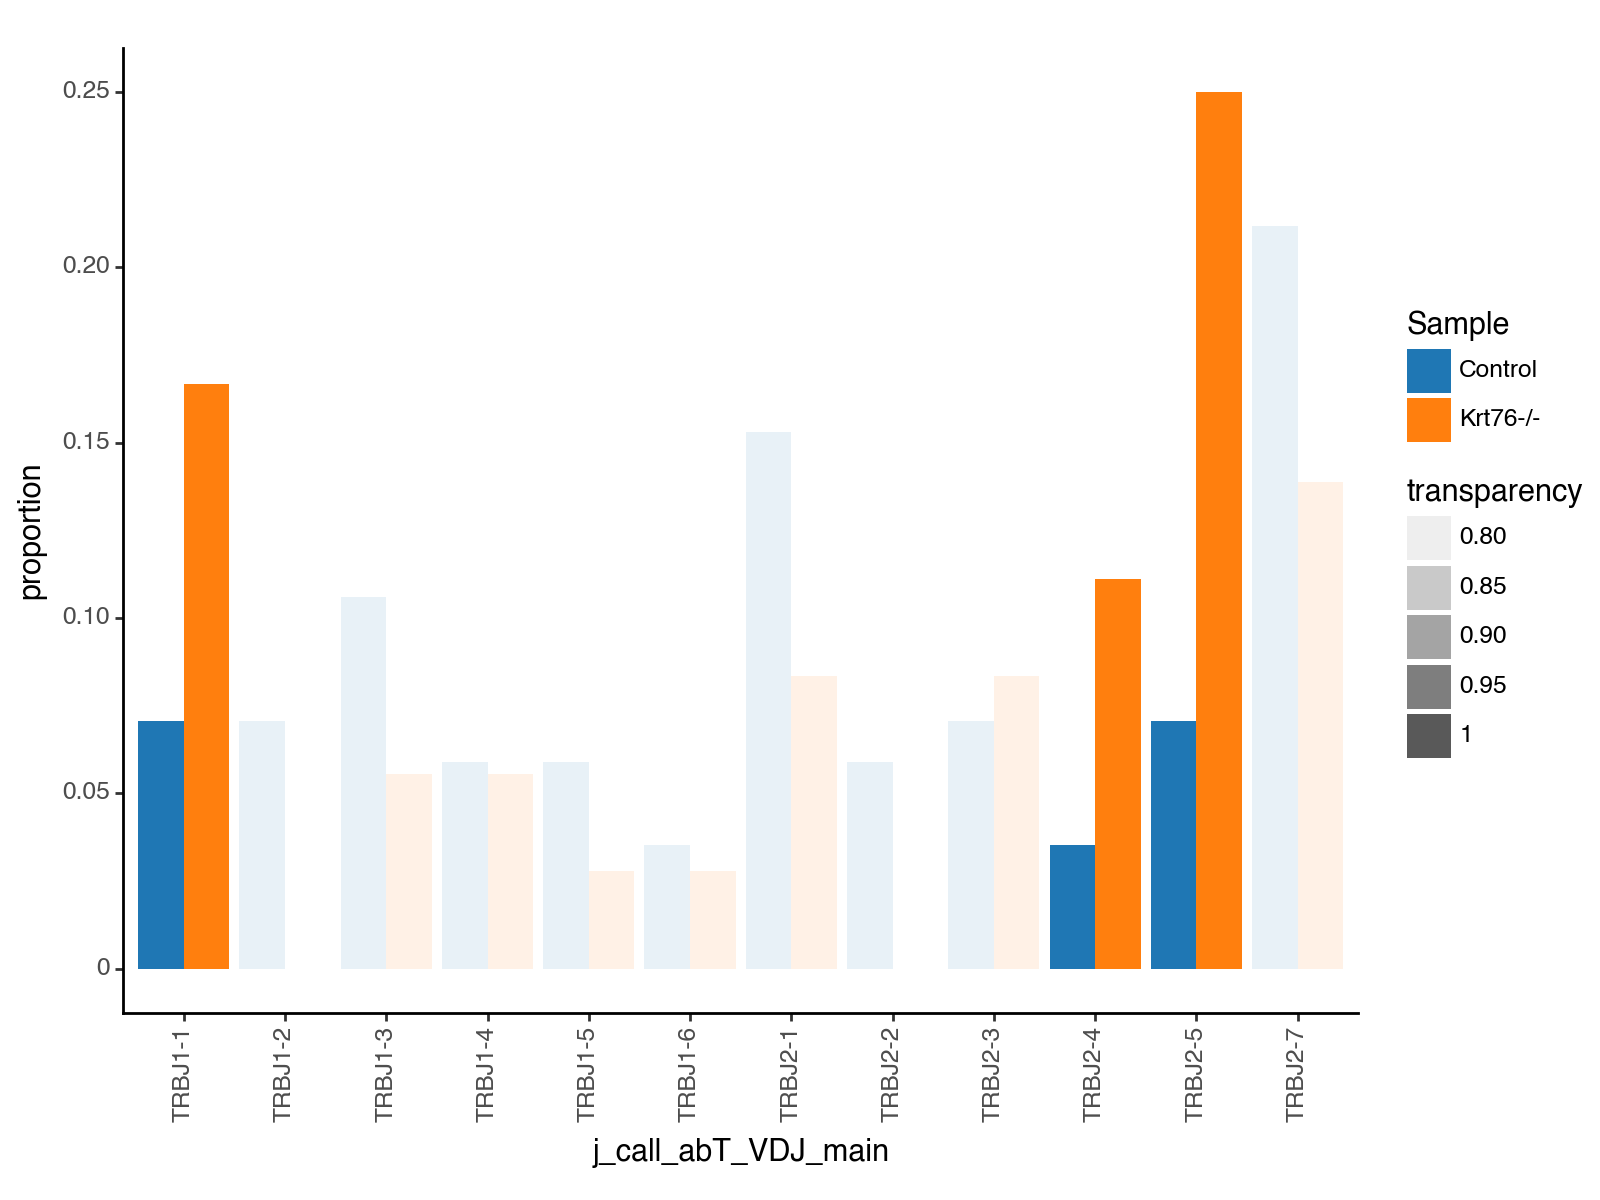

<Figure Size: (800 x 600)>

In [432]:
p

In [1655]:
p.save("JgeneBetaChain_DN3_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN3_141223.pdf


### DN3A - J gene beta chain

In [1656]:
adata_PF_DN3a = adata_PF[adata_PF.obs["leiden"] == "0 DN3a"]

In [1657]:
adata_PF_DN3a

View of AnnData object with n_obs × n_vars = 621 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1658]:
working_df = pd.DataFrame(adata_PF_DN3a.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                               60
         TRBJ2-5                               54
         TRBJ2-4                               51
         TRBJ1-1                               47
         TRBJ2-1                               41
         TRBJ1-4                               35
         TRBJ1-2                               28
         TRBJ2-2                               23
         TRBJ2-3                               22
         TRBJ1-3                               17
         TRBJ1-6                               14
         TRBJ1-5                               11
         TRBJ2-6                                2
         TRBJ1-5,TRBJ2-2                        1
Krt76-/- TRBJ2-5                               32
         TRBJ2-7                               30
         TRBJ2-4                               29
         TRBJ1-2                               19
         TRBJ2-1                               19
         TRBJ1-1                               18
         TRBJ2-3                               18
         TRBJ2-2                               14
         TRBJ1-5                               12
         TRBJ1-3                                8
         TRBJ1-4                                8
         TRBJ1-6                                7
         TRBJ2-6                                1
         TRBJ1-5,TRBJ2-2                        0

In [1659]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7      60
1    Control             TRBJ2-5      54
2    Control             TRBJ2-4      51
3    Control             TRBJ1-1      47
4    Control             TRBJ2-1      41
5    Control             TRBJ1-4      35
6    Control             TRBJ1-2      28
7    Control             TRBJ2-2      23
8    Control             TRBJ2-3      22
9    Control             TRBJ1-3      17
10   Control             TRBJ1-6      14
11   Control             TRBJ1-5      11
12   Control             TRBJ2-6       2
13   Control     TRBJ1-5,TRBJ2-2       1
14  Krt76-/-             TRBJ2-5      32
15  Krt76-/-             TRBJ2-7      30
16  Krt76-/-             TRBJ2-4      29
17  Krt76-/-             TRBJ1-2      19
18  Krt76-/-             TRBJ2-1      19
19  Krt76-/-             TRBJ1-1      18
20  Krt76-/-             TRBJ2-3      18
21  Krt76-/-             TRBJ2-2      14
22  Krt76-/-             TRBJ1-5      12
23  Krt76-/-             TRBJ1-3       8
24  Krt76-/-             TRBJ1-4       8
25  Krt76-/-             TRBJ1-6       7
26  Krt76-/-             TRBJ2-6       1
27  Krt76-/-     TRBJ1-5,TRBJ2-2       0

In [1660]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 406, 'Krt76-/-': 215}

In [1661]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1662]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      60    0.147783
1    Control             TRBJ2-5      54    0.133005
2    Control             TRBJ2-4      51    0.125616
3    Control             TRBJ1-1      47    0.115764
4    Control             TRBJ2-1      41    0.100985
5    Control             TRBJ1-4      35    0.086207
6    Control             TRBJ1-2      28    0.068966
7    Control             TRBJ2-2      23    0.056650
8    Control             TRBJ2-3      22    0.054187
9    Control             TRBJ1-3      17    0.041872
10   Control             TRBJ1-6      14    0.034483
11   Control             TRBJ1-5      11    0.027094
12   Control             TRBJ2-6       2    0.004926
13   Control     TRBJ1-5,TRBJ2-2       1    0.002463
14  Krt76-/-             TRBJ2-5      32    0.148837
15  Krt76-/-             TRBJ2-7      30    0.139535
16  Krt76-/-             TRBJ2-4      29    0.134884
17  Krt76-/-             TRBJ1-2      19    0.088372
18  Krt76-/-             TRBJ2-1      19    0.088372
19  Krt76-/-             TRBJ1-1      18    0.083721
20  Krt76-/-             TRBJ2-3      18    0.083721
21  Krt76-/-             TRBJ2-2      14    0.065116
22  Krt76-/-             TRBJ1-5      12    0.055814
23  Krt76-/-             TRBJ1-3       8    0.037209
24  Krt76-/-             TRBJ1-4       8    0.037209
25  Krt76-/-             TRBJ1-6       7    0.032558
26  Krt76-/-             TRBJ2-6       1    0.004651
27  Krt76-/-     TRBJ1-5,TRBJ2-2       0    0.000000

In [1663]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 406, 'Krt76-/-': 215}

In [1664]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1665]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      60    0.147783
1    Control             TRBJ2-5      54    0.133005
2    Control             TRBJ2-4      51    0.125616
3    Control             TRBJ1-1      47    0.115764
4    Control             TRBJ2-1      41    0.100985
5    Control             TRBJ1-4      35    0.086207
6    Control             TRBJ1-2      28    0.068966
7    Control             TRBJ2-2      23    0.056650
8    Control             TRBJ2-3      22    0.054187
9    Control             TRBJ1-3      17    0.041872
10   Control             TRBJ1-6      14    0.034483
11   Control             TRBJ1-5      11    0.027094
12   Control             TRBJ2-6       2    0.004926
13   Control     TRBJ1-5,TRBJ2-2       1    0.002463
14  Krt76-/-             TRBJ2-5      32    0.148837
15  Krt76-/-             TRBJ2-7      30    0.139535
16  Krt76-/-             TRBJ2-4      29    0.134884
17  Krt76-/-             TRBJ1-2      19    0.088372
18  Krt76-/-             TRBJ2-1      19    0.088372
19  Krt76-/-             TRBJ1-1      18    0.083721
20  Krt76-/-             TRBJ2-3      18    0.083721
21  Krt76-/-             TRBJ2-2      14    0.065116
22  Krt76-/-             TRBJ1-5      12    0.055814
23  Krt76-/-             TRBJ1-3       8    0.037209
24  Krt76-/-             TRBJ1-4       8    0.037209
25  Krt76-/-             TRBJ1-6       7    0.032558
26  Krt76-/-             TRBJ2-6       1    0.004651
27  Krt76-/-     TRBJ1-5,TRBJ2-2       0    0.000000

In [1666]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1667]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1668]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1669]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1670]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.7232063334982682,
 'TRBJ1-2': 1.2813953488372094,
 'TRBJ1-3': 0.8886456908344733,
 'TRBJ1-4': 0.43162790697674414,
 'TRBJ1-5': 2.060042283298097,
 'TRBJ1-5,TRBJ2-2': 0.0,
 'TRBJ1-6': 0.9441860465116279,
 'TRBJ2-1': 0.8750992626205332,
 'TRBJ2-2': 1.149443882709808,
 'TRBJ2-3': 1.5450317124735728,
 'TRBJ2-4': 1.073780209758322,
 'TRBJ2-5': 1.1190353143841516,
 'TRBJ2-6': 0.9441860465116279,
 'TRBJ2-7': 0.9441860465116279}

In [1671]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7      60    0.147783    0.944186
1    Control             TRBJ2-5      54    0.133005    1.119035
2    Control             TRBJ2-4      51    0.125616    1.073780
3    Control             TRBJ1-1      47    0.115764    0.723206
4    Control             TRBJ2-1      41    0.100985    0.875099
5    Control             TRBJ1-4      35    0.086207    0.431628
6    Control             TRBJ1-2      28    0.068966    1.281395
7    Control             TRBJ2-2      23    0.056650    1.149444
8    Control             TRBJ2-3      22    0.054187    1.545032
9    Control             TRBJ1-3      17    0.041872    0.888646
10   Control             TRBJ1-6      14    0.034483    0.944186
11   Control             TRBJ1-5      11    0.027094    2.060042
12   Control             TRBJ2-6       2    0.004926    0.944186
13   Control     TRBJ1-5,TRBJ2-2       1    0.002463    0.000000
14  Krt76-/-             TRBJ2-5      32    0.148837    1.119035
15  Krt76-/-             TRBJ2-7      30    0.139535    0.944186
16  Krt76-/-             TRBJ2-4      29    0.134884    1.073780
17  Krt76-/-             TRBJ1-2      19    0.088372    1.281395
18  Krt76-/-             TRBJ2-1      19    0.088372    0.875099
19  Krt76-/-             TRBJ1-1      18    0.083721    0.723206
20  Krt76-/-             TRBJ2-3      18    0.083721    1.545032
21  Krt76-/-             TRBJ2-2      14    0.065116    1.149444
22  Krt76-/-             TRBJ1-5      12    0.055814    2.060042
23  Krt76-/-             TRBJ1-3       8    0.037209    0.888646
24  Krt76-/-             TRBJ1-4       8    0.037209    0.431628
25  Krt76-/-             TRBJ1-6       7    0.032558    0.944186
26  Krt76-/-             TRBJ2-6       1    0.004651    0.944186
27  Krt76-/-     TRBJ1-5,TRBJ2-2       0    0.000000    0.000000

In [1672]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1673]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1674]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1675]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

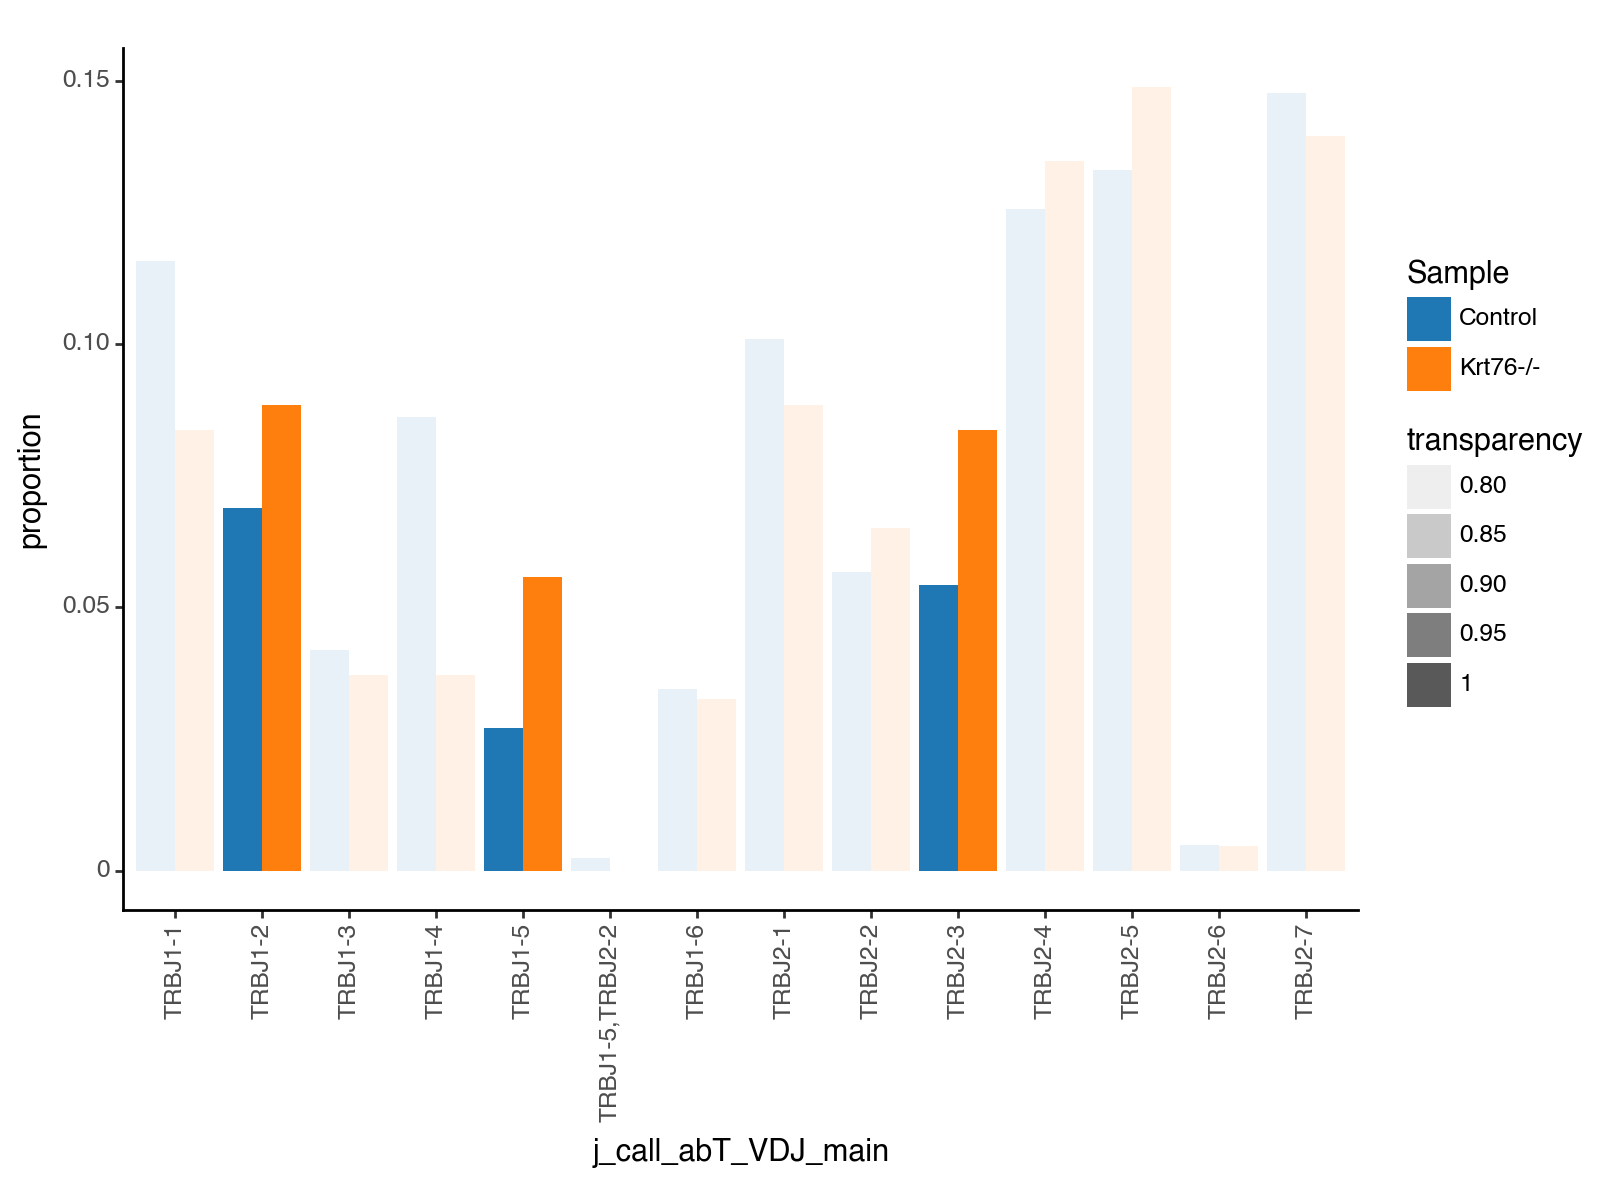

<Figure Size: (800 x 600)>

In [453]:
p

In [1676]:
p.save("JgeneBetaChain_DN3a_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN3a_141223.pdf


### DN3a/ DN3b - J gene beta chain

In [1677]:
adata_PF_DN3ab = adata_PF[adata_PF.obs["leiden"] == "1 DN3a / DN3b"]

In [1678]:
adata_PF_DN3ab

View of AnnData object with n_obs × n_vars = 320 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1679]:
working_df = pd.DataFrame(adata_PF_DN3ab.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                               42
         TRBJ2-5                               37
         TRBJ2-1                               30
         TRBJ1-1                               26
         TRBJ1-2                               17
         TRBJ1-4                               15
         TRBJ1-6                               14
         TRBJ2-3                               14
         TRBJ2-4                               14
         TRBJ1-3                               13
         TRBJ2-2                                7
         TRBJ1-5                                6
Krt76-/- TRBJ1-1                               14
         TRBJ2-5                               13
         TRBJ2-7                               13
         TRBJ2-1                                9
         TRBJ1-4                                8
         TRBJ2-4                                7
         TRBJ1-2                                6
         TRBJ1-5                                5
         TRBJ1-6                                5
         TRBJ2-2                                3
         TRBJ2-3                                2
         TRBJ1-3                                0

In [1680]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7      42
1    Control             TRBJ2-5      37
2    Control             TRBJ2-1      30
3    Control             TRBJ1-1      26
4    Control             TRBJ1-2      17
5    Control             TRBJ1-4      15
6    Control             TRBJ1-6      14
7    Control             TRBJ2-3      14
8    Control             TRBJ2-4      14
9    Control             TRBJ1-3      13
10   Control             TRBJ2-2       7
11   Control             TRBJ1-5       6
12  Krt76-/-             TRBJ1-1      14
13  Krt76-/-             TRBJ2-5      13
14  Krt76-/-             TRBJ2-7      13
15  Krt76-/-             TRBJ2-1       9
16  Krt76-/-             TRBJ1-4       8
17  Krt76-/-             TRBJ2-4       7
18  Krt76-/-             TRBJ1-2       6
19  Krt76-/-             TRBJ1-5       5
20  Krt76-/-             TRBJ1-6       5
21  Krt76-/-             TRBJ2-2       3
22  Krt76-/-             TRBJ2-3       2
23  Krt76-/-             TRBJ1-3       0

In [1681]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 235, 'Krt76-/-': 85}

In [1682]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1683]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      42    0.178723
1    Control             TRBJ2-5      37    0.157447
2    Control             TRBJ2-1      30    0.127660
3    Control             TRBJ1-1      26    0.110638
4    Control             TRBJ1-2      17    0.072340
5    Control             TRBJ1-4      15    0.063830
6    Control             TRBJ1-6      14    0.059574
7    Control             TRBJ2-3      14    0.059574
8    Control             TRBJ2-4      14    0.059574
9    Control             TRBJ1-3      13    0.055319
10   Control             TRBJ2-2       7    0.029787
11   Control             TRBJ1-5       6    0.025532
12  Krt76-/-             TRBJ1-1      14    0.164706
13  Krt76-/-             TRBJ2-5      13    0.152941
14  Krt76-/-             TRBJ2-7      13    0.152941
15  Krt76-/-             TRBJ2-1       9    0.105882
16  Krt76-/-             TRBJ1-4       8    0.094118
17  Krt76-/-             TRBJ2-4       7    0.082353
18  Krt76-/-             TRBJ1-2       6    0.070588
19  Krt76-/-             TRBJ1-5       5    0.058824
20  Krt76-/-             TRBJ1-6       5    0.058824
21  Krt76-/-             TRBJ2-2       3    0.035294
22  Krt76-/-             TRBJ2-3       2    0.023529
23  Krt76-/-             TRBJ1-3       0    0.000000

In [1684]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 235, 'Krt76-/-': 85}

In [1685]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1686]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      42    0.178723
1    Control             TRBJ2-5      37    0.157447
2    Control             TRBJ2-1      30    0.127660
3    Control             TRBJ1-1      26    0.110638
4    Control             TRBJ1-2      17    0.072340
5    Control             TRBJ1-4      15    0.063830
6    Control             TRBJ1-6      14    0.059574
7    Control             TRBJ2-3      14    0.059574
8    Control             TRBJ2-4      14    0.059574
9    Control             TRBJ1-3      13    0.055319
10   Control             TRBJ2-2       7    0.029787
11   Control             TRBJ1-5       6    0.025532
12  Krt76-/-             TRBJ1-1      14    0.164706
13  Krt76-/-             TRBJ2-5      13    0.152941
14  Krt76-/-             TRBJ2-7      13    0.152941
15  Krt76-/-             TRBJ2-1       9    0.105882
16  Krt76-/-             TRBJ1-4       8    0.094118
17  Krt76-/-             TRBJ2-4       7    0.082353
18  Krt76-/-             TRBJ1-2       6    0.070588
19  Krt76-/-             TRBJ1-5       5    0.058824
20  Krt76-/-             TRBJ1-6       5    0.058824
21  Krt76-/-             TRBJ2-2       3    0.035294
22  Krt76-/-             TRBJ2-3       2    0.023529
23  Krt76-/-             TRBJ1-3       0    0.000000

In [1687]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1688]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1689]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1690]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1691]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.48868778280543,
 'TRBJ1-2': 0.9757785467128028,
 'TRBJ1-3': 0.0,
 'TRBJ1-4': 1.4745098039215687,
 'TRBJ1-5': 2.3039215686274512,
 'TRBJ1-6': 0.9873949579831932,
 'TRBJ2-1': 0.8294117647058824,
 'TRBJ2-2': 1.184873949579832,
 'TRBJ2-3': 0.3949579831932773,
 'TRBJ2-4': 1.3823529411764706,
 'TRBJ2-5': 0.9713831478537361,
 'TRBJ2-7': 0.8557422969187676}

In [1692]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7      42    0.178723    0.855742
1    Control             TRBJ2-5      37    0.157447    0.971383
2    Control             TRBJ2-1      30    0.127660    0.829412
3    Control             TRBJ1-1      26    0.110638    1.488688
4    Control             TRBJ1-2      17    0.072340    0.975779
5    Control             TRBJ1-4      15    0.063830    1.474510
6    Control             TRBJ1-6      14    0.059574    0.987395
7    Control             TRBJ2-3      14    0.059574    0.394958
8    Control             TRBJ2-4      14    0.059574    1.382353
9    Control             TRBJ1-3      13    0.055319    0.000000
10   Control             TRBJ2-2       7    0.029787    1.184874
11   Control             TRBJ1-5       6    0.025532    2.303922
12  Krt76-/-             TRBJ1-1      14    0.164706    1.488688
13  Krt76-/-             TRBJ2-5      13    0.152941    0.971383
14  Krt76-/-             TRBJ2-7      13    0.152941    0.855742
15  Krt76-/-             TRBJ2-1       9    0.105882    0.829412
16  Krt76-/-             TRBJ1-4       8    0.094118    1.474510
17  Krt76-/-             TRBJ2-4       7    0.082353    1.382353
18  Krt76-/-             TRBJ1-2       6    0.070588    0.975779
19  Krt76-/-             TRBJ1-5       5    0.058824    2.303922
20  Krt76-/-             TRBJ1-6       5    0.058824    0.987395
21  Krt76-/-             TRBJ2-2       3    0.035294    1.184874
22  Krt76-/-             TRBJ2-3       2    0.023529    0.394958
23  Krt76-/-             TRBJ1-3       0    0.000000    0.000000

In [1693]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1694]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1695]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1696]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

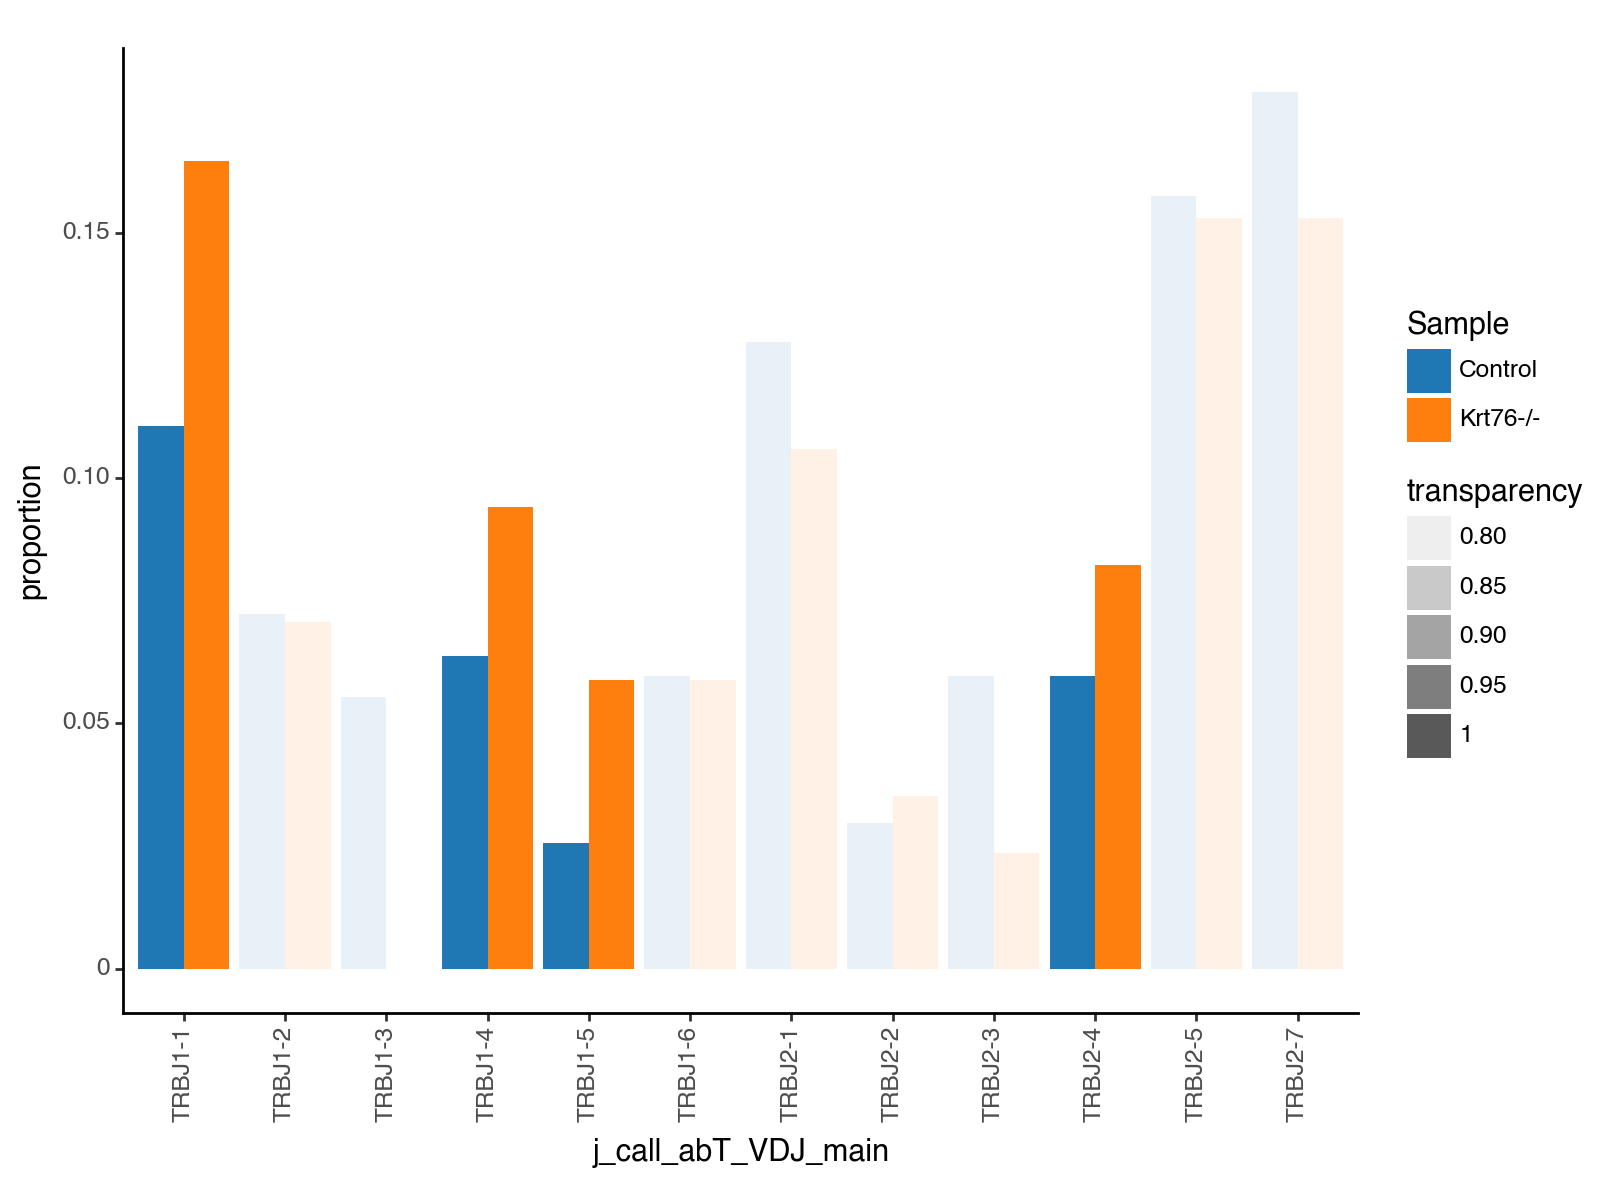

<Figure Size: (800 x 600)>

In [474]:
p

In [1697]:
p.save("JgeneBetaChain_DN3ab_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN3ab_141223.pdf


### DN3b - J gene beta chain

In [1698]:
adata_PF_DN3b = adata_PF[adata_PF.obs["leiden"] == "6 DN3b"]

In [1699]:
adata_PF_DN3b

View of AnnData object with n_obs × n_vars = 608 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1700]:
working_df = pd.DataFrame(adata_PF_DN3b.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                               68
         TRBJ2-1                               61
         TRBJ2-5                               47
         TRBJ2-3                               39
         TRBJ1-1                               32
         TRBJ2-4                               29
         TRBJ1-2                               25
         TRBJ1-3                               22
         TRBJ2-2                               21
         TRBJ1-5                               15
         TRBJ1-6                               14
         TRBJ1-4                               13
         TRBJ2-6                                3
Krt76-/- TRBJ2-7                               34
         TRBJ1-4                               23
         TRBJ2-1                               22
         TRBJ1-1                               20
         TRBJ2-5                               20
         TRBJ2-3                               18
         TRBJ1-5                               16
         TRBJ1-2                               14
         TRBJ1-3                               14
         TRBJ2-4                               14
         TRBJ1-6                               12
         TRBJ2-2                                9
         TRBJ2-6                                3

In [1701]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7      68
1    Control             TRBJ2-1      61
2    Control             TRBJ2-5      47
3    Control             TRBJ2-3      39
4    Control             TRBJ1-1      32
5    Control             TRBJ2-4      29
6    Control             TRBJ1-2      25
7    Control             TRBJ1-3      22
8    Control             TRBJ2-2      21
9    Control             TRBJ1-5      15
10   Control             TRBJ1-6      14
11   Control             TRBJ1-4      13
12   Control             TRBJ2-6       3
13  Krt76-/-             TRBJ2-7      34
14  Krt76-/-             TRBJ1-4      23
15  Krt76-/-             TRBJ2-1      22
16  Krt76-/-             TRBJ1-1      20
17  Krt76-/-             TRBJ2-5      20
18  Krt76-/-             TRBJ2-3      18
19  Krt76-/-             TRBJ1-5      16
20  Krt76-/-             TRBJ1-2      14
21  Krt76-/-             TRBJ1-3      14
22  Krt76-/-             TRBJ2-4      14
23  Krt76-/-             TRBJ1-6      12
24  Krt76-/-             TRBJ2-2       9
25  Krt76-/-             TRBJ2-6       3

In [1702]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 389, 'Krt76-/-': 219}

In [1703]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1704]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      68    0.174807
1    Control             TRBJ2-1      61    0.156812
2    Control             TRBJ2-5      47    0.120823
3    Control             TRBJ2-3      39    0.100257
4    Control             TRBJ1-1      32    0.082262
5    Control             TRBJ2-4      29    0.074550
6    Control             TRBJ1-2      25    0.064267
7    Control             TRBJ1-3      22    0.056555
8    Control             TRBJ2-2      21    0.053985
9    Control             TRBJ1-5      15    0.038560
10   Control             TRBJ1-6      14    0.035990
11   Control             TRBJ1-4      13    0.033419
12   Control             TRBJ2-6       3    0.007712
13  Krt76-/-             TRBJ2-7      34    0.155251
14  Krt76-/-             TRBJ1-4      23    0.105023
15  Krt76-/-             TRBJ2-1      22    0.100457
16  Krt76-/-             TRBJ1-1      20    0.091324
17  Krt76-/-             TRBJ2-5      20    0.091324
18  Krt76-/-             TRBJ2-3      18    0.082192
19  Krt76-/-             TRBJ1-5      16    0.073059
20  Krt76-/-             TRBJ1-2      14    0.063927
21  Krt76-/-             TRBJ1-3      14    0.063927
22  Krt76-/-             TRBJ2-4      14    0.063927
23  Krt76-/-             TRBJ1-6      12    0.054795
24  Krt76-/-             TRBJ2-2       9    0.041096
25  Krt76-/-             TRBJ2-6       3    0.013699

In [1705]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 389, 'Krt76-/-': 219}

In [1706]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1707]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      68    0.174807
1    Control             TRBJ2-1      61    0.156812
2    Control             TRBJ2-5      47    0.120823
3    Control             TRBJ2-3      39    0.100257
4    Control             TRBJ1-1      32    0.082262
5    Control             TRBJ2-4      29    0.074550
6    Control             TRBJ1-2      25    0.064267
7    Control             TRBJ1-3      22    0.056555
8    Control             TRBJ2-2      21    0.053985
9    Control             TRBJ1-5      15    0.038560
10   Control             TRBJ1-6      14    0.035990
11   Control             TRBJ1-4      13    0.033419
12   Control             TRBJ2-6       3    0.007712
13  Krt76-/-             TRBJ2-7      34    0.155251
14  Krt76-/-             TRBJ1-4      23    0.105023
15  Krt76-/-             TRBJ2-1      22    0.100457
16  Krt76-/-             TRBJ1-1      20    0.091324
17  Krt76-/-             TRBJ2-5      20    0.091324
18  Krt76-/-             TRBJ2-3      18    0.082192
19  Krt76-/-             TRBJ1-5      16    0.073059
20  Krt76-/-             TRBJ1-2      14    0.063927
21  Krt76-/-             TRBJ1-3      14    0.063927
22  Krt76-/-             TRBJ2-4      14    0.063927
23  Krt76-/-             TRBJ1-6      12    0.054795
24  Krt76-/-             TRBJ2-2       9    0.041096
25  Krt76-/-             TRBJ2-6       3    0.013699

In [1708]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1709]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1710]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1711]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1712]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.1101598173515983,
 'TRBJ1-2': 0.994703196347032,
 'TRBJ1-3': 1.1303445413034454,
 'TRBJ1-4': 3.1426062521952933,
 'TRBJ1-5': 1.8946727549467275,
 'TRBJ1-6': 1.5225048923679059,
 'TRBJ2-1': 0.6406168126356763,
 'TRBJ2-2': 0.761252446183953,
 'TRBJ2-3': 0.8198103266596416,
 'TRBJ2-4': 0.8575027554715792,
 'TRBJ2-5': 0.7558534926649179,
 'TRBJ2-6': 1.776255707762557,
 'TRBJ2-7': 0.8881278538812785}

In [1713]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7      68    0.174807    0.888128
1    Control             TRBJ2-1      61    0.156812    0.640617
2    Control             TRBJ2-5      47    0.120823    0.755853
3    Control             TRBJ2-3      39    0.100257    0.819810
4    Control             TRBJ1-1      32    0.082262    1.110160
5    Control             TRBJ2-4      29    0.074550    0.857503
6    Control             TRBJ1-2      25    0.064267    0.994703
7    Control             TRBJ1-3      22    0.056555    1.130345
8    Control             TRBJ2-2      21    0.053985    0.761252
9    Control             TRBJ1-5      15    0.038560    1.894673
10   Control             TRBJ1-6      14    0.035990    1.522505
11   Control             TRBJ1-4      13    0.033419    3.142606
12   Control             TRBJ2-6       3    0.007712    1.776256
13  Krt76-/-             TRBJ2-7      34    0.155251    0.888128
14  Krt76-/-             TRBJ1-4      23    0.105023    3.142606
15  Krt76-/-             TRBJ2-1      22    0.100457    0.640617
16  Krt76-/-             TRBJ1-1      20    0.091324    1.110160
17  Krt76-/-             TRBJ2-5      20    0.091324    0.755853
18  Krt76-/-             TRBJ2-3      18    0.082192    0.819810
19  Krt76-/-             TRBJ1-5      16    0.073059    1.894673
20  Krt76-/-             TRBJ1-2      14    0.063927    0.994703
21  Krt76-/-             TRBJ1-3      14    0.063927    1.130345
22  Krt76-/-             TRBJ2-4      14    0.063927    0.857503
23  Krt76-/-             TRBJ1-6      12    0.054795    1.522505
24  Krt76-/-             TRBJ2-2       9    0.041096    0.761252
25  Krt76-/-             TRBJ2-6       3    0.013699    1.776256

In [1714]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1715]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1716]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1717]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

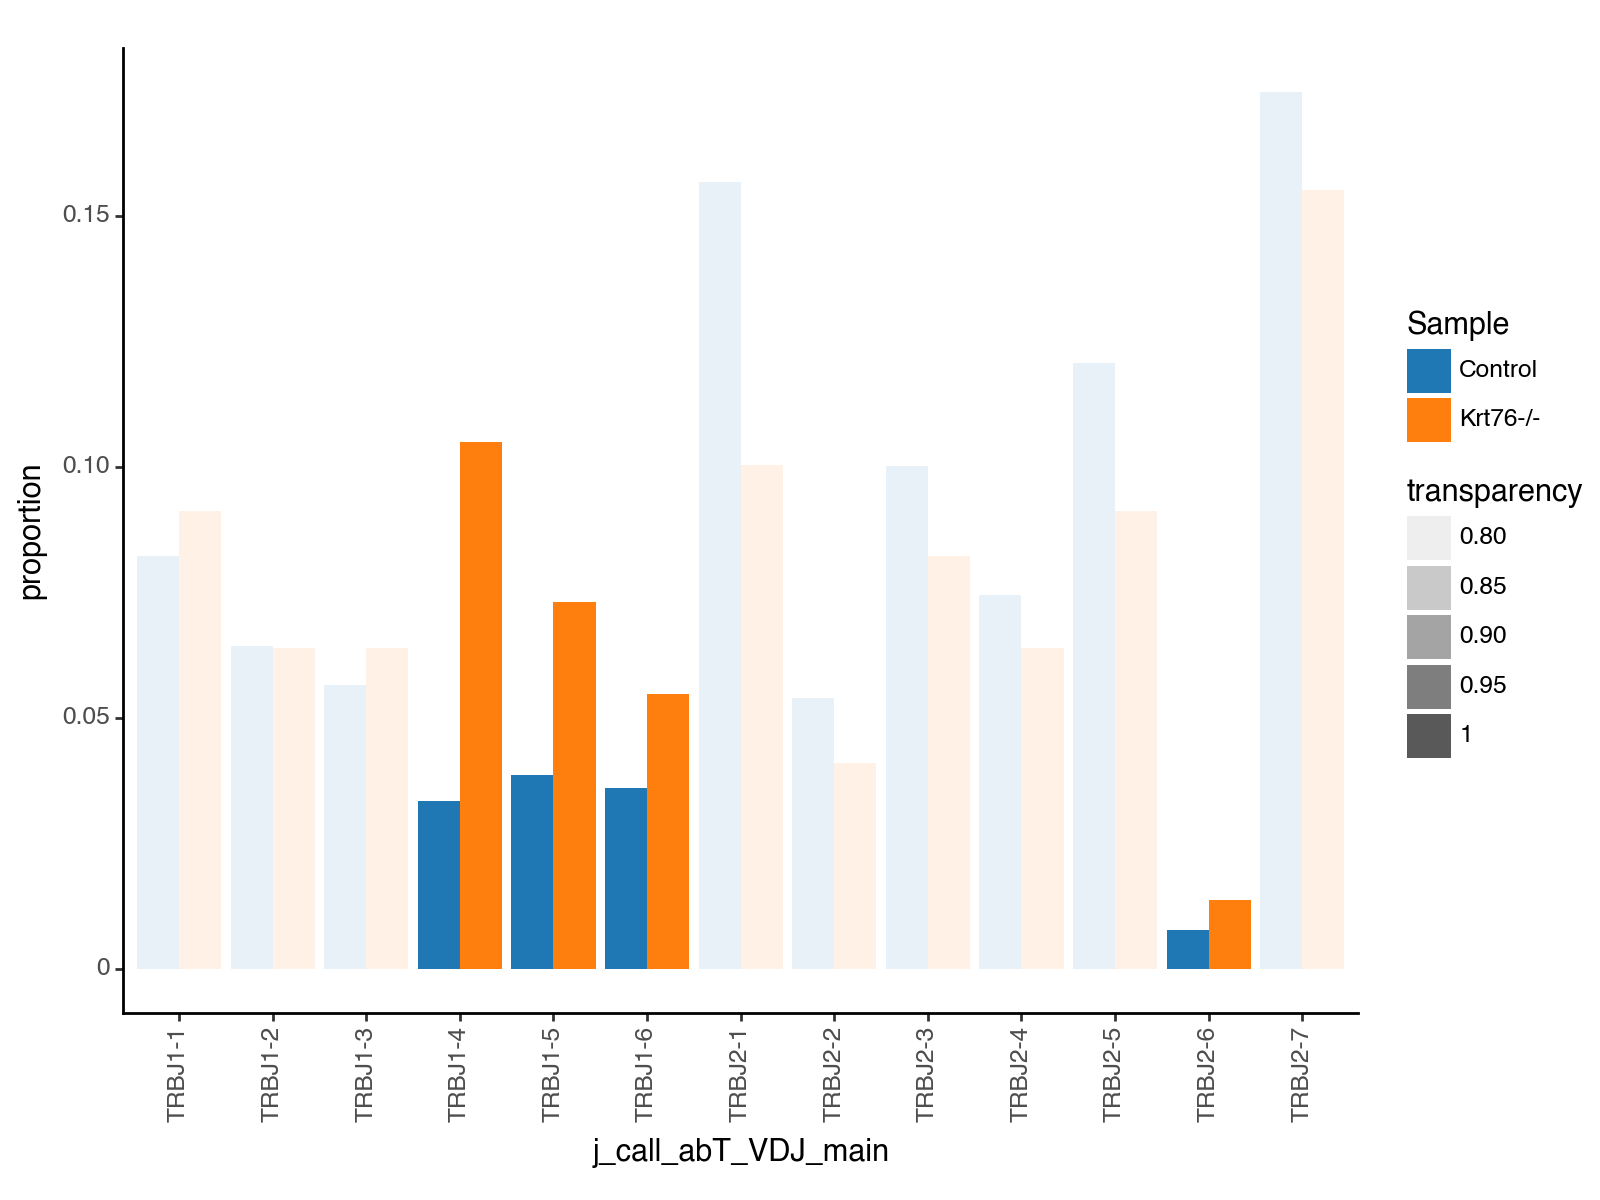

<Figure Size: (800 x 600)>

In [498]:
p

In [1718]:
p.save("JgeneBetaChain_DN3b_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN3b_141223.pdf


### DN4 - J gene beta chain

In [1719]:
adata_PF_DN4 = adata_PF[adata_PF.obs["leiden"] == "2 DN4"]

In [1720]:
adata_PF_DN4

View of AnnData object with n_obs × n_vars = 2139 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [1721]:
working_df = pd.DataFrame(adata_PF_DN4.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                              222
         TRBJ2-5                              167
         TRBJ1-1                              162
         TRBJ2-1                              139
         TRBJ2-4                              128
         TRBJ2-3                              111
         TRBJ1-4                              100
         TRBJ1-2                               95
         TRBJ2-2                               78
         TRBJ1-3                               71
         TRBJ1-5                               54
         TRBJ1-6                               53
         TRBJ2-6                               15
         TRBJ2-3,TRBJ2-4                        1
Krt76-/- TRBJ2-7                              148
         TRBJ2-5                               87
         TRBJ1-1                               74
         TRBJ2-1                               71
         TRBJ2-4                               63
         TRBJ2-3                               56
         TRBJ1-2                               54
         TRBJ1-4                               51
         TRBJ1-6                               36
         TRBJ2-2                               36
         TRBJ1-3                               32
         TRBJ1-5                               32
         TRBJ2-6                                3
         TRBJ2-3,TRBJ2-4                        0

In [1722]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7     222
1    Control             TRBJ2-5     167
2    Control             TRBJ1-1     162
3    Control             TRBJ2-1     139
4    Control             TRBJ2-4     128
5    Control             TRBJ2-3     111
6    Control             TRBJ1-4     100
7    Control             TRBJ1-2      95
8    Control             TRBJ2-2      78
9    Control             TRBJ1-3      71
10   Control             TRBJ1-5      54
11   Control             TRBJ1-6      53
12   Control             TRBJ2-6      15
13   Control     TRBJ2-3,TRBJ2-4       1
14  Krt76-/-             TRBJ2-7     148
15  Krt76-/-             TRBJ2-5      87
16  Krt76-/-             TRBJ1-1      74
17  Krt76-/-             TRBJ2-1      71
18  Krt76-/-             TRBJ2-4      63
19  Krt76-/-             TRBJ2-3      56
20  Krt76-/-             TRBJ1-2      54
21  Krt76-/-             TRBJ1-4      51
22  Krt76-/-             TRBJ1-6      36
23  Krt76-/-             TRBJ2-2      36
24  Krt76-/-             TRBJ1-3      32
25  Krt76-/-             TRBJ1-5      32
26  Krt76-/-             TRBJ2-6       3
27  Krt76-/-     TRBJ2-3,TRBJ2-4       0

In [1723]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1396, 'Krt76-/-': 743}

In [1724]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1725]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7     222    0.159026
1    Control             TRBJ2-5     167    0.119628
2    Control             TRBJ1-1     162    0.116046
3    Control             TRBJ2-1     139    0.099570
4    Control             TRBJ2-4     128    0.091691
5    Control             TRBJ2-3     111    0.079513
6    Control             TRBJ1-4     100    0.071633
7    Control             TRBJ1-2      95    0.068052
8    Control             TRBJ2-2      78    0.055874
9    Control             TRBJ1-3      71    0.050860
10   Control             TRBJ1-5      54    0.038682
11   Control             TRBJ1-6      53    0.037966
12   Control             TRBJ2-6      15    0.010745
13   Control     TRBJ2-3,TRBJ2-4       1    0.000716
14  Krt76-/-             TRBJ2-7     148    0.199192
15  Krt76-/-             TRBJ2-5      87    0.117093
16  Krt76-/-             TRBJ1-1      74    0.099596
17  Krt76-/-             TRBJ2-1      71    0.095559
18  Krt76-/-             TRBJ2-4      63    0.084791
19  Krt76-/-             TRBJ2-3      56    0.075370
20  Krt76-/-             TRBJ1-2      54    0.072678
21  Krt76-/-             TRBJ1-4      51    0.068641
22  Krt76-/-             TRBJ1-6      36    0.048452
23  Krt76-/-             TRBJ2-2      36    0.048452
24  Krt76-/-             TRBJ1-3      32    0.043069
25  Krt76-/-             TRBJ1-5      32    0.043069
26  Krt76-/-             TRBJ2-6       3    0.004038
27  Krt76-/-     TRBJ2-3,TRBJ2-4       0    0.000000

In [1726]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1396, 'Krt76-/-': 743}

In [1727]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1728]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7     222    0.159026
1    Control             TRBJ2-5     167    0.119628
2    Control             TRBJ1-1     162    0.116046
3    Control             TRBJ2-1     139    0.099570
4    Control             TRBJ2-4     128    0.091691
5    Control             TRBJ2-3     111    0.079513
6    Control             TRBJ1-4     100    0.071633
7    Control             TRBJ1-2      95    0.068052
8    Control             TRBJ2-2      78    0.055874
9    Control             TRBJ1-3      71    0.050860
10   Control             TRBJ1-5      54    0.038682
11   Control             TRBJ1-6      53    0.037966
12   Control             TRBJ2-6      15    0.010745
13   Control     TRBJ2-3,TRBJ2-4       1    0.000716
14  Krt76-/-             TRBJ2-7     148    0.199192
15  Krt76-/-             TRBJ2-5      87    0.117093
16  Krt76-/-             TRBJ1-1      74    0.099596
17  Krt76-/-             TRBJ2-1      71    0.095559
18  Krt76-/-             TRBJ2-4      63    0.084791
19  Krt76-/-             TRBJ2-3      56    0.075370
20  Krt76-/-             TRBJ1-2      54    0.072678
21  Krt76-/-             TRBJ1-4      51    0.068641
22  Krt76-/-             TRBJ1-6      36    0.048452
23  Krt76-/-             TRBJ2-2      36    0.048452
24  Krt76-/-             TRBJ1-3      32    0.043069
25  Krt76-/-             TRBJ1-5      32    0.043069
26  Krt76-/-             TRBJ2-6       3    0.004038
27  Krt76-/-     TRBJ2-3,TRBJ2-4       0    0.000000

In [1729]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1730]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1731]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1732]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1733]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.8582490071947227,
 'TRBJ1-2': 1.0679889494935184,
 'TRBJ1-3': 0.8468143991810891,
 'TRBJ1-4': 0.9582234185733514,
 'TRBJ1-5': 1.1134041174418026,
 'TRBJ1-6': 1.2762132100865944,
 'TRBJ2-1': 0.9597102936762301,
 'TRBJ2-2': 0.8671705145460192,
 'TRBJ2-3': 0.9478980999842374,
 'TRBJ2-3,TRBJ2-4': 0.0,
 'TRBJ2-4': 0.924756056527591,
 'TRBJ2-5': 0.9788122274965547,
 'TRBJ2-6': 0.37577388963660835,
 'TRBJ2-7': 1.252579632122028}

In [1734]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7     222    0.159026    1.252580
1    Control             TRBJ2-5     167    0.119628    0.978812
2    Control             TRBJ1-1     162    0.116046    0.858249
3    Control             TRBJ2-1     139    0.099570    0.959710
4    Control             TRBJ2-4     128    0.091691    0.924756
5    Control             TRBJ2-3     111    0.079513    0.947898
6    Control             TRBJ1-4     100    0.071633    0.958223
7    Control             TRBJ1-2      95    0.068052    1.067989
8    Control             TRBJ2-2      78    0.055874    0.867171
9    Control             TRBJ1-3      71    0.050860    0.846814
10   Control             TRBJ1-5      54    0.038682    1.113404
11   Control             TRBJ1-6      53    0.037966    1.276213
12   Control             TRBJ2-6      15    0.010745    0.375774
13   Control     TRBJ2-3,TRBJ2-4       1    0.000716    0.000000
14  Krt76-/-             TRBJ2-7     148    0.199192    1.252580
15  Krt76-/-             TRBJ2-5      87    0.117093    0.978812
16  Krt76-/-             TRBJ1-1      74    0.099596    0.858249
17  Krt76-/-             TRBJ2-1      71    0.095559    0.959710
18  Krt76-/-             TRBJ2-4      63    0.084791    0.924756
19  Krt76-/-             TRBJ2-3      56    0.075370    0.947898
20  Krt76-/-             TRBJ1-2      54    0.072678    1.067989
21  Krt76-/-             TRBJ1-4      51    0.068641    0.958223
22  Krt76-/-             TRBJ1-6      36    0.048452    1.276213
23  Krt76-/-             TRBJ2-2      36    0.048452    0.867171
24  Krt76-/-             TRBJ1-3      32    0.043069    0.846814
25  Krt76-/-             TRBJ1-5      32    0.043069    1.113404
26  Krt76-/-             TRBJ2-6       3    0.004038    0.375774
27  Krt76-/-     TRBJ2-3,TRBJ2-4       0    0.000000    0.000000

In [1735]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1736]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1737]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1738]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

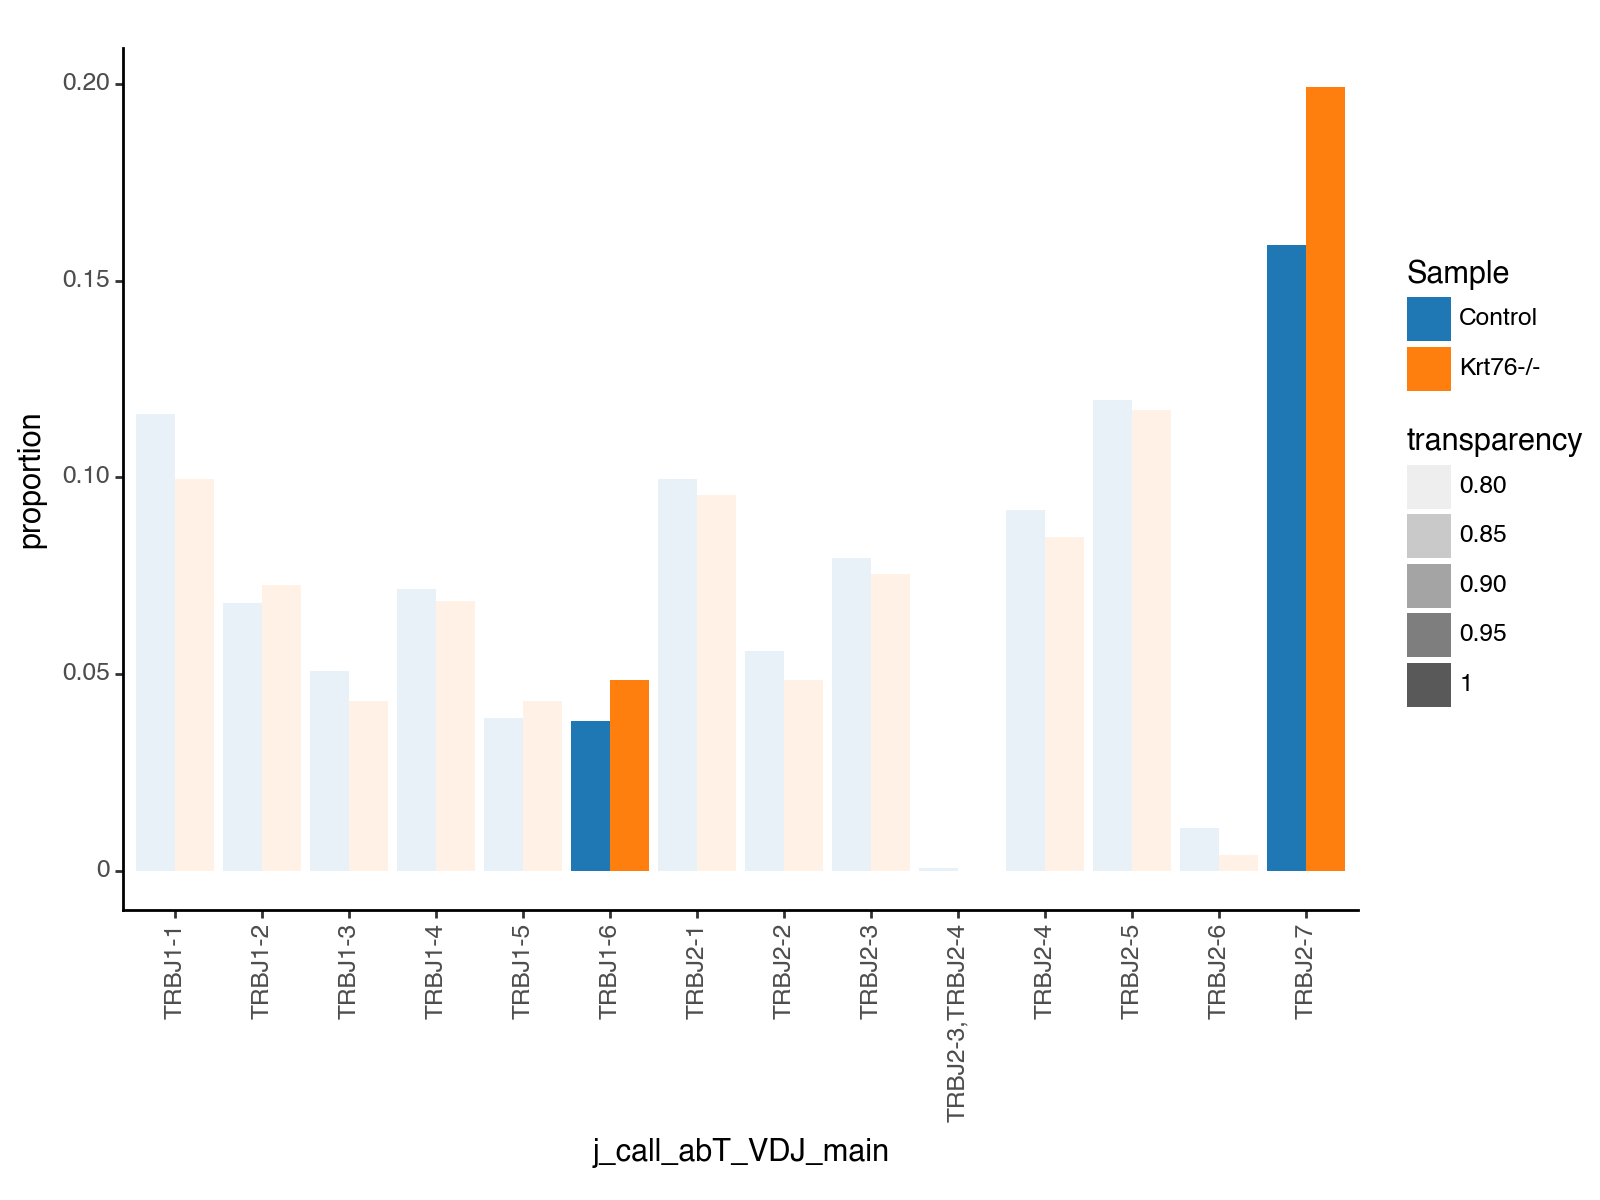

<Figure Size: (800 x 600)>

In [519]:
p

In [1739]:
p.save("JgeneBetaChain_DN4_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN4_141223.pdf


### DP1 - J gene beta chain

In [1740]:
adata_PF_DP1 = adata_PF[adata_PF.obs["leiden"] == "3 DP 1"]

In [1741]:
adata_PF_DP1

View of AnnData object with n_obs × n_vars = 2440 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [1742]:
working_df = pd.DataFrame(adata_PF_DP1.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                              222
         TRBJ2-5                              161
         TRBJ1-1                              151
         TRBJ2-1                              140
         TRBJ2-3                              128
         TRBJ2-4                              121
         TRBJ1-2                              117
         TRBJ1-4                              108
         TRBJ1-3                               97
         TRBJ2-2                               90
         TRBJ1-6                               68
         TRBJ1-5                               64
         TRBJ2-6                                8
         TRBJ2-5,TRBJ2-4                        1
Krt76-/- TRBJ2-7                              175
         TRBJ2-5                              121
         TRBJ2-4                              103
         TRBJ2-1                              102
         TRBJ1-1                               94
         TRBJ2-3                               79
         TRBJ1-4                               59
         TRBJ1-2                               58
         TRBJ1-5                               48
         TRBJ1-3                               45
         TRBJ1-6                               39
         TRBJ2-2                               35
         TRBJ2-6                                6
         TRBJ2-5,TRBJ2-4                        0

In [1743]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7     222
1    Control             TRBJ2-5     161
2    Control             TRBJ1-1     151
3    Control             TRBJ2-1     140
4    Control             TRBJ2-3     128
5    Control             TRBJ2-4     121
6    Control             TRBJ1-2     117
7    Control             TRBJ1-4     108
8    Control             TRBJ1-3      97
9    Control             TRBJ2-2      90
10   Control             TRBJ1-6      68
11   Control             TRBJ1-5      64
12   Control             TRBJ2-6       8
13   Control     TRBJ2-5,TRBJ2-4       1
14  Krt76-/-             TRBJ2-7     175
15  Krt76-/-             TRBJ2-5     121
16  Krt76-/-             TRBJ2-4     103
17  Krt76-/-             TRBJ2-1     102
18  Krt76-/-             TRBJ1-1      94
19  Krt76-/-             TRBJ2-3      79
20  Krt76-/-             TRBJ1-4      59
21  Krt76-/-             TRBJ1-2      58
22  Krt76-/-             TRBJ1-5      48
23  Krt76-/-             TRBJ1-3      45
24  Krt76-/-             TRBJ1-6      39
25  Krt76-/-             TRBJ2-2      35
26  Krt76-/-             TRBJ2-6       6
27  Krt76-/-     TRBJ2-5,TRBJ2-4       0

In [1744]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1476, 'Krt76-/-': 964}

In [1745]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1746]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7     222    0.150407
1    Control             TRBJ2-5     161    0.109079
2    Control             TRBJ1-1     151    0.102304
3    Control             TRBJ2-1     140    0.094851
4    Control             TRBJ2-3     128    0.086721
5    Control             TRBJ2-4     121    0.081978
6    Control             TRBJ1-2     117    0.079268
7    Control             TRBJ1-4     108    0.073171
8    Control             TRBJ1-3      97    0.065718
9    Control             TRBJ2-2      90    0.060976
10   Control             TRBJ1-6      68    0.046070
11   Control             TRBJ1-5      64    0.043360
12   Control             TRBJ2-6       8    0.005420
13   Control     TRBJ2-5,TRBJ2-4       1    0.000678
14  Krt76-/-             TRBJ2-7     175    0.181535
15  Krt76-/-             TRBJ2-5     121    0.125519
16  Krt76-/-             TRBJ2-4     103    0.106846
17  Krt76-/-             TRBJ2-1     102    0.105809
18  Krt76-/-             TRBJ1-1      94    0.097510
19  Krt76-/-             TRBJ2-3      79    0.081950
20  Krt76-/-             TRBJ1-4      59    0.061203
21  Krt76-/-             TRBJ1-2      58    0.060166
22  Krt76-/-             TRBJ1-5      48    0.049793
23  Krt76-/-             TRBJ1-3      45    0.046680
24  Krt76-/-             TRBJ1-6      39    0.040456
25  Krt76-/-             TRBJ2-2      35    0.036307
26  Krt76-/-             TRBJ2-6       6    0.006224
27  Krt76-/-     TRBJ2-5,TRBJ2-4       0    0.000000

In [1747]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1476, 'Krt76-/-': 964}

In [1748]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1749]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7     222    0.150407
1    Control             TRBJ2-5     161    0.109079
2    Control             TRBJ1-1     151    0.102304
3    Control             TRBJ2-1     140    0.094851
4    Control             TRBJ2-3     128    0.086721
5    Control             TRBJ2-4     121    0.081978
6    Control             TRBJ1-2     117    0.079268
7    Control             TRBJ1-4     108    0.073171
8    Control             TRBJ1-3      97    0.065718
9    Control             TRBJ2-2      90    0.060976
10   Control             TRBJ1-6      68    0.046070
11   Control             TRBJ1-5      64    0.043360
12   Control             TRBJ2-6       8    0.005420
13   Control     TRBJ2-5,TRBJ2-4       1    0.000678
14  Krt76-/-             TRBJ2-7     175    0.181535
15  Krt76-/-             TRBJ2-5     121    0.125519
16  Krt76-/-             TRBJ2-4     103    0.106846
17  Krt76-/-             TRBJ2-1     102    0.105809
18  Krt76-/-             TRBJ1-1      94    0.097510
19  Krt76-/-             TRBJ2-3      79    0.081950
20  Krt76-/-             TRBJ1-4      59    0.061203
21  Krt76-/-             TRBJ1-2      58    0.060166
22  Krt76-/-             TRBJ1-5      48    0.049793
23  Krt76-/-             TRBJ1-3      45    0.046680
24  Krt76-/-             TRBJ1-6      39    0.040456
25  Krt76-/-             TRBJ2-2      35    0.036307
26  Krt76-/-             TRBJ2-6       6    0.006224
27  Krt76-/-     TRBJ2-5,TRBJ2-4       0    0.000000

In [1750]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1751]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1752]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1753]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1754]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.9531477563133742,
 'TRBJ1-2': 0.7590169166932652,
 'TRBJ1-3': 0.7103135560593746,
 'TRBJ1-4': 0.8364453665283541,
 'TRBJ1-5': 1.1483402489626555,
 'TRBJ1-6': 0.8781425433243837,
 'TRBJ2-1': 1.1155305275637226,
 'TRBJ2-2': 0.595435684647303,
 'TRBJ2-3': 0.9449883298755187,
 'TRBJ2-4': 1.303350365213813,
 'TRBJ2-5': 1.1507177650060565,
 'TRBJ2-5,TRBJ2-4': 0.0,
 'TRBJ2-6': 1.1483402489626555,
 'TRBJ2-7': 1.2069642256364246}

In [1755]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7     222    0.150407    1.206964
1    Control             TRBJ2-5     161    0.109079    1.150718
2    Control             TRBJ1-1     151    0.102304    0.953148
3    Control             TRBJ2-1     140    0.094851    1.115531
4    Control             TRBJ2-3     128    0.086721    0.944988
5    Control             TRBJ2-4     121    0.081978    1.303350
6    Control             TRBJ1-2     117    0.079268    0.759017
7    Control             TRBJ1-4     108    0.073171    0.836445
8    Control             TRBJ1-3      97    0.065718    0.710314
9    Control             TRBJ2-2      90    0.060976    0.595436
10   Control             TRBJ1-6      68    0.046070    0.878143
11   Control             TRBJ1-5      64    0.043360    1.148340
12   Control             TRBJ2-6       8    0.005420    1.148340
13   Control     TRBJ2-5,TRBJ2-4       1    0.000678    0.000000
14  Krt76-/-             TRBJ2-7     175    0.181535    1.206964
15  Krt76-/-             TRBJ2-5     121    0.125519    1.150718
16  Krt76-/-             TRBJ2-4     103    0.106846    1.303350
17  Krt76-/-             TRBJ2-1     102    0.105809    1.115531
18  Krt76-/-             TRBJ1-1      94    0.097510    0.953148
19  Krt76-/-             TRBJ2-3      79    0.081950    0.944988
20  Krt76-/-             TRBJ1-4      59    0.061203    0.836445
21  Krt76-/-             TRBJ1-2      58    0.060166    0.759017
22  Krt76-/-             TRBJ1-5      48    0.049793    1.148340
23  Krt76-/-             TRBJ1-3      45    0.046680    0.710314
24  Krt76-/-             TRBJ1-6      39    0.040456    0.878143
25  Krt76-/-             TRBJ2-2      35    0.036307    0.595436
26  Krt76-/-             TRBJ2-6       6    0.006224    1.148340
27  Krt76-/-     TRBJ2-5,TRBJ2-4       0    0.000000    0.000000

In [1756]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1757]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1758]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1759]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

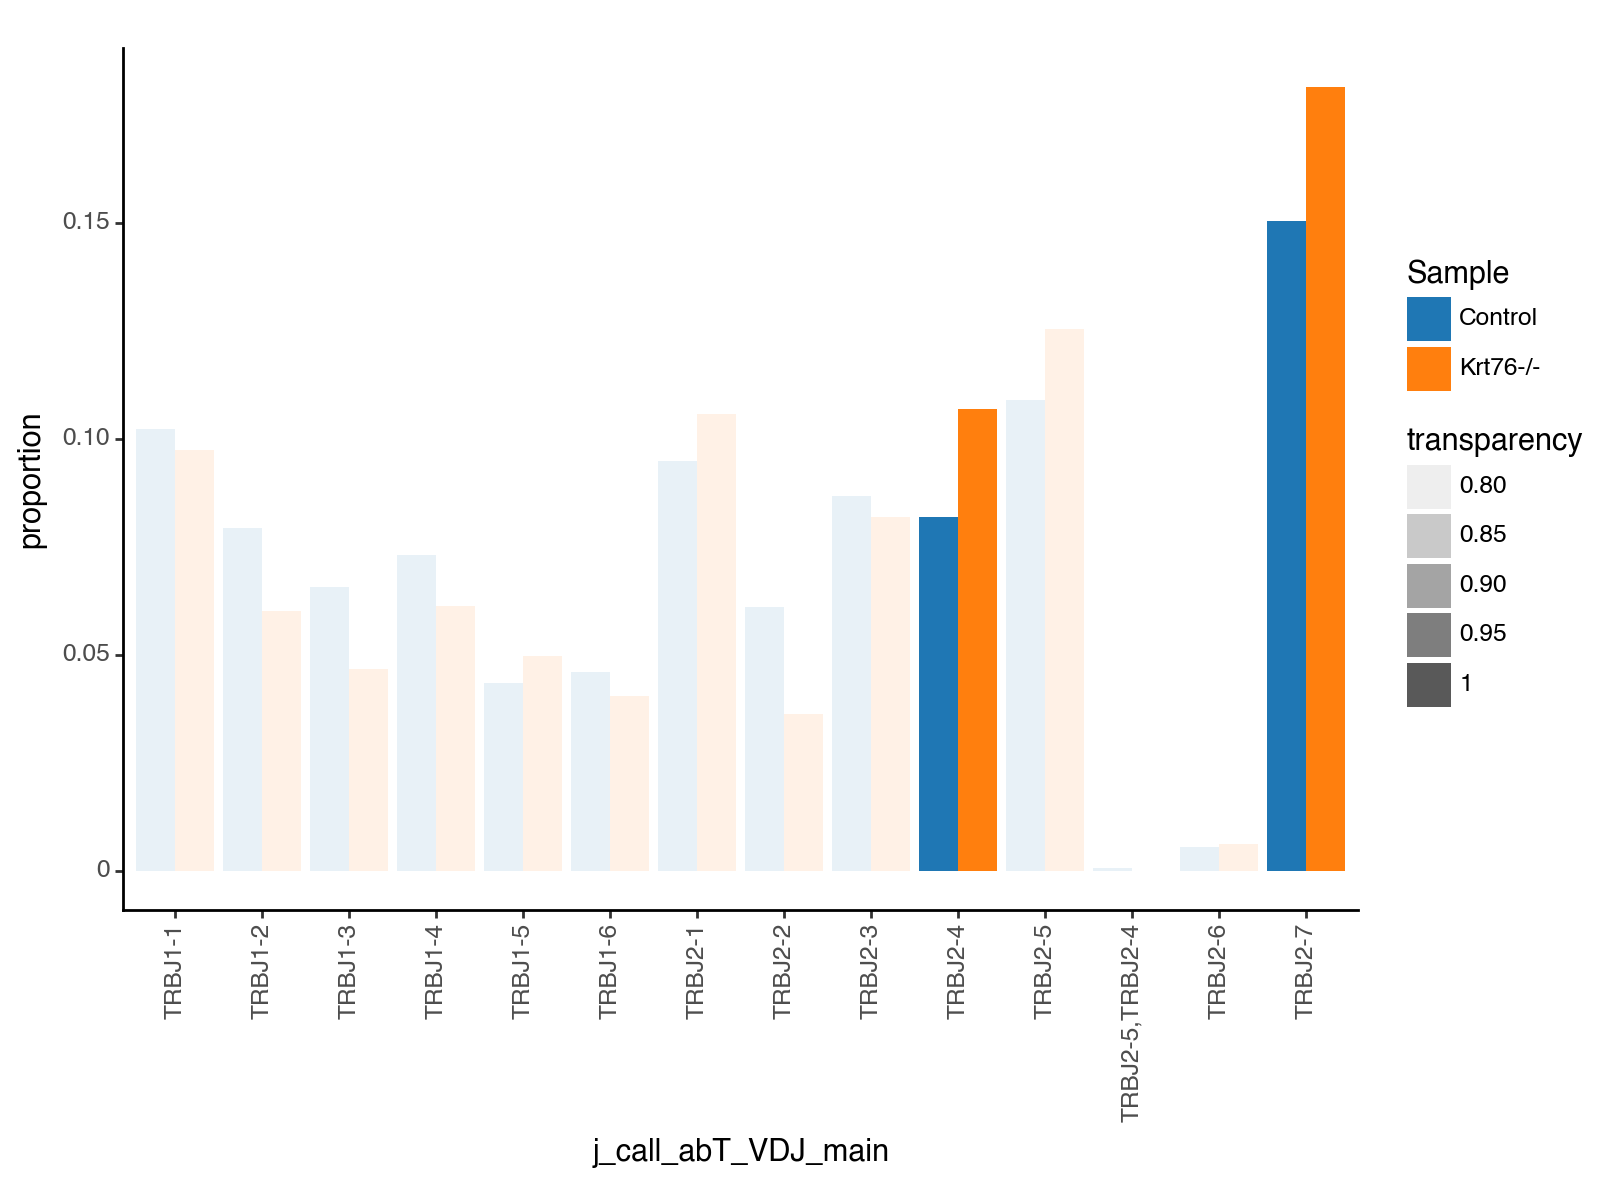

<Figure Size: (800 x 600)>

In [540]:
p

In [1760]:
p.save("JgeneBetaChain_DP1_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DP1_141223.pdf


### DP2 - J gene beta chain

In [1761]:
adata_PF_DP2 = adata_PF[adata_PF.obs["leiden"] == "9 DP 2"]

In [1762]:
adata_PF_DP2

View of AnnData object with n_obs × n_vars = 96 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1763]:
working_df = pd.DataFrame(adata_PF_DP2.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                               10
         TRBJ1-4                                8
         TRBJ2-1                                8
         TRBJ2-5                                7
         TRBJ1-1                                5
         TRBJ2-2                                5
         TRBJ2-3                                5
         TRBJ2-4                                5
         TRBJ1-2                                4
         TRBJ1-6                                3
         TRBJ1-3                                2
         TRBJ1-5                                2
Krt76-/- TRBJ2-5                                8
         TRBJ2-3                                6
         TRBJ2-7                                5
         TRBJ1-1                                4
         TRBJ1-4                                2
         TRBJ2-2                                2
         TRBJ2-4                                2
         TRBJ1-2                                1
         TRBJ1-3                                1
         TRBJ1-6                                1
         TRBJ1-5                                0
         TRBJ2-1                                0

In [1764]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7      10
1    Control             TRBJ1-4       8
2    Control             TRBJ2-1       8
3    Control             TRBJ2-5       7
4    Control             TRBJ1-1       5
5    Control             TRBJ2-2       5
6    Control             TRBJ2-3       5
7    Control             TRBJ2-4       5
8    Control             TRBJ1-2       4
9    Control             TRBJ1-6       3
10   Control             TRBJ1-3       2
11   Control             TRBJ1-5       2
12  Krt76-/-             TRBJ2-5       8
13  Krt76-/-             TRBJ2-3       6
14  Krt76-/-             TRBJ2-7       5
15  Krt76-/-             TRBJ1-1       4
16  Krt76-/-             TRBJ1-4       2
17  Krt76-/-             TRBJ2-2       2
18  Krt76-/-             TRBJ2-4       2
19  Krt76-/-             TRBJ1-2       1
20  Krt76-/-             TRBJ1-3       1
21  Krt76-/-             TRBJ1-6       1
22  Krt76-/-             TRBJ1-5       0
23  Krt76-/-             TRBJ2-1       0

In [1765]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 64, 'Krt76-/-': 32}

In [1766]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1767]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      10    0.156250
1    Control             TRBJ1-4       8    0.125000
2    Control             TRBJ2-1       8    0.125000
3    Control             TRBJ2-5       7    0.109375
4    Control             TRBJ1-1       5    0.078125
5    Control             TRBJ2-2       5    0.078125
6    Control             TRBJ2-3       5    0.078125
7    Control             TRBJ2-4       5    0.078125
8    Control             TRBJ1-2       4    0.062500
9    Control             TRBJ1-6       3    0.046875
10   Control             TRBJ1-3       2    0.031250
11   Control             TRBJ1-5       2    0.031250
12  Krt76-/-             TRBJ2-5       8    0.250000
13  Krt76-/-             TRBJ2-3       6    0.187500
14  Krt76-/-             TRBJ2-7       5    0.156250
15  Krt76-/-             TRBJ1-1       4    0.125000
16  Krt76-/-             TRBJ1-4       2    0.062500
17  Krt76-/-             TRBJ2-2       2    0.062500
18  Krt76-/-             TRBJ2-4       2    0.062500
19  Krt76-/-             TRBJ1-2       1    0.031250
20  Krt76-/-             TRBJ1-3       1    0.031250
21  Krt76-/-             TRBJ1-6       1    0.031250
22  Krt76-/-             TRBJ1-5       0    0.000000
23  Krt76-/-             TRBJ2-1       0    0.000000

In [1768]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 64, 'Krt76-/-': 32}

In [1769]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1770]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      10    0.156250
1    Control             TRBJ1-4       8    0.125000
2    Control             TRBJ2-1       8    0.125000
3    Control             TRBJ2-5       7    0.109375
4    Control             TRBJ1-1       5    0.078125
5    Control             TRBJ2-2       5    0.078125
6    Control             TRBJ2-3       5    0.078125
7    Control             TRBJ2-4       5    0.078125
8    Control             TRBJ1-2       4    0.062500
9    Control             TRBJ1-6       3    0.046875
10   Control             TRBJ1-3       2    0.031250
11   Control             TRBJ1-5       2    0.031250
12  Krt76-/-             TRBJ2-5       8    0.250000
13  Krt76-/-             TRBJ2-3       6    0.187500
14  Krt76-/-             TRBJ2-7       5    0.156250
15  Krt76-/-             TRBJ1-1       4    0.125000
16  Krt76-/-             TRBJ1-4       2    0.062500
17  Krt76-/-             TRBJ2-2       2    0.062500
18  Krt76-/-             TRBJ2-4       2    0.062500
19  Krt76-/-             TRBJ1-2       1    0.031250
20  Krt76-/-             TRBJ1-3       1    0.031250
21  Krt76-/-             TRBJ1-6       1    0.031250
22  Krt76-/-             TRBJ1-5       0    0.000000
23  Krt76-/-             TRBJ2-1       0    0.000000

In [1771]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1772]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1773]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1774]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1775]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.6,
 'TRBJ1-2': 0.5,
 'TRBJ1-3': 1.0,
 'TRBJ1-4': 0.5,
 'TRBJ1-5': 0.0,
 'TRBJ1-6': 0.6666666666666666,
 'TRBJ2-1': 0.0,
 'TRBJ2-2': 0.8,
 'TRBJ2-3': 2.4,
 'TRBJ2-4': 0.8,
 'TRBJ2-5': 2.2857142857142856,
 'TRBJ2-7': 1.0}

In [1776]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7      10    0.156250    1.000000
1    Control             TRBJ1-4       8    0.125000    0.500000
2    Control             TRBJ2-1       8    0.125000    0.000000
3    Control             TRBJ2-5       7    0.109375    2.285714
4    Control             TRBJ1-1       5    0.078125    1.600000
5    Control             TRBJ2-2       5    0.078125    0.800000
6    Control             TRBJ2-3       5    0.078125    2.400000
7    Control             TRBJ2-4       5    0.078125    0.800000
8    Control             TRBJ1-2       4    0.062500    0.500000
9    Control             TRBJ1-6       3    0.046875    0.666667
10   Control             TRBJ1-3       2    0.031250    1.000000
11   Control             TRBJ1-5       2    0.031250    0.000000
12  Krt76-/-             TRBJ2-5       8    0.250000    2.285714
13  Krt76-/-             TRBJ2-3       6    0.187500    2.400000
14  Krt76-/-             TRBJ2-7       5    0.156250    1.000000
15  Krt76-/-             TRBJ1-1       4    0.125000    1.600000
16  Krt76-/-             TRBJ1-4       2    0.062500    0.500000
17  Krt76-/-             TRBJ2-2       2    0.062500    0.800000
18  Krt76-/-             TRBJ2-4       2    0.062500    0.800000
19  Krt76-/-             TRBJ1-2       1    0.031250    0.500000
20  Krt76-/-             TRBJ1-3       1    0.031250    1.000000
21  Krt76-/-             TRBJ1-6       1    0.031250    0.666667
22  Krt76-/-             TRBJ1-5       0    0.000000    0.000000
23  Krt76-/-             TRBJ2-1       0    0.000000    0.000000

In [1777]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1778]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1779]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1780]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

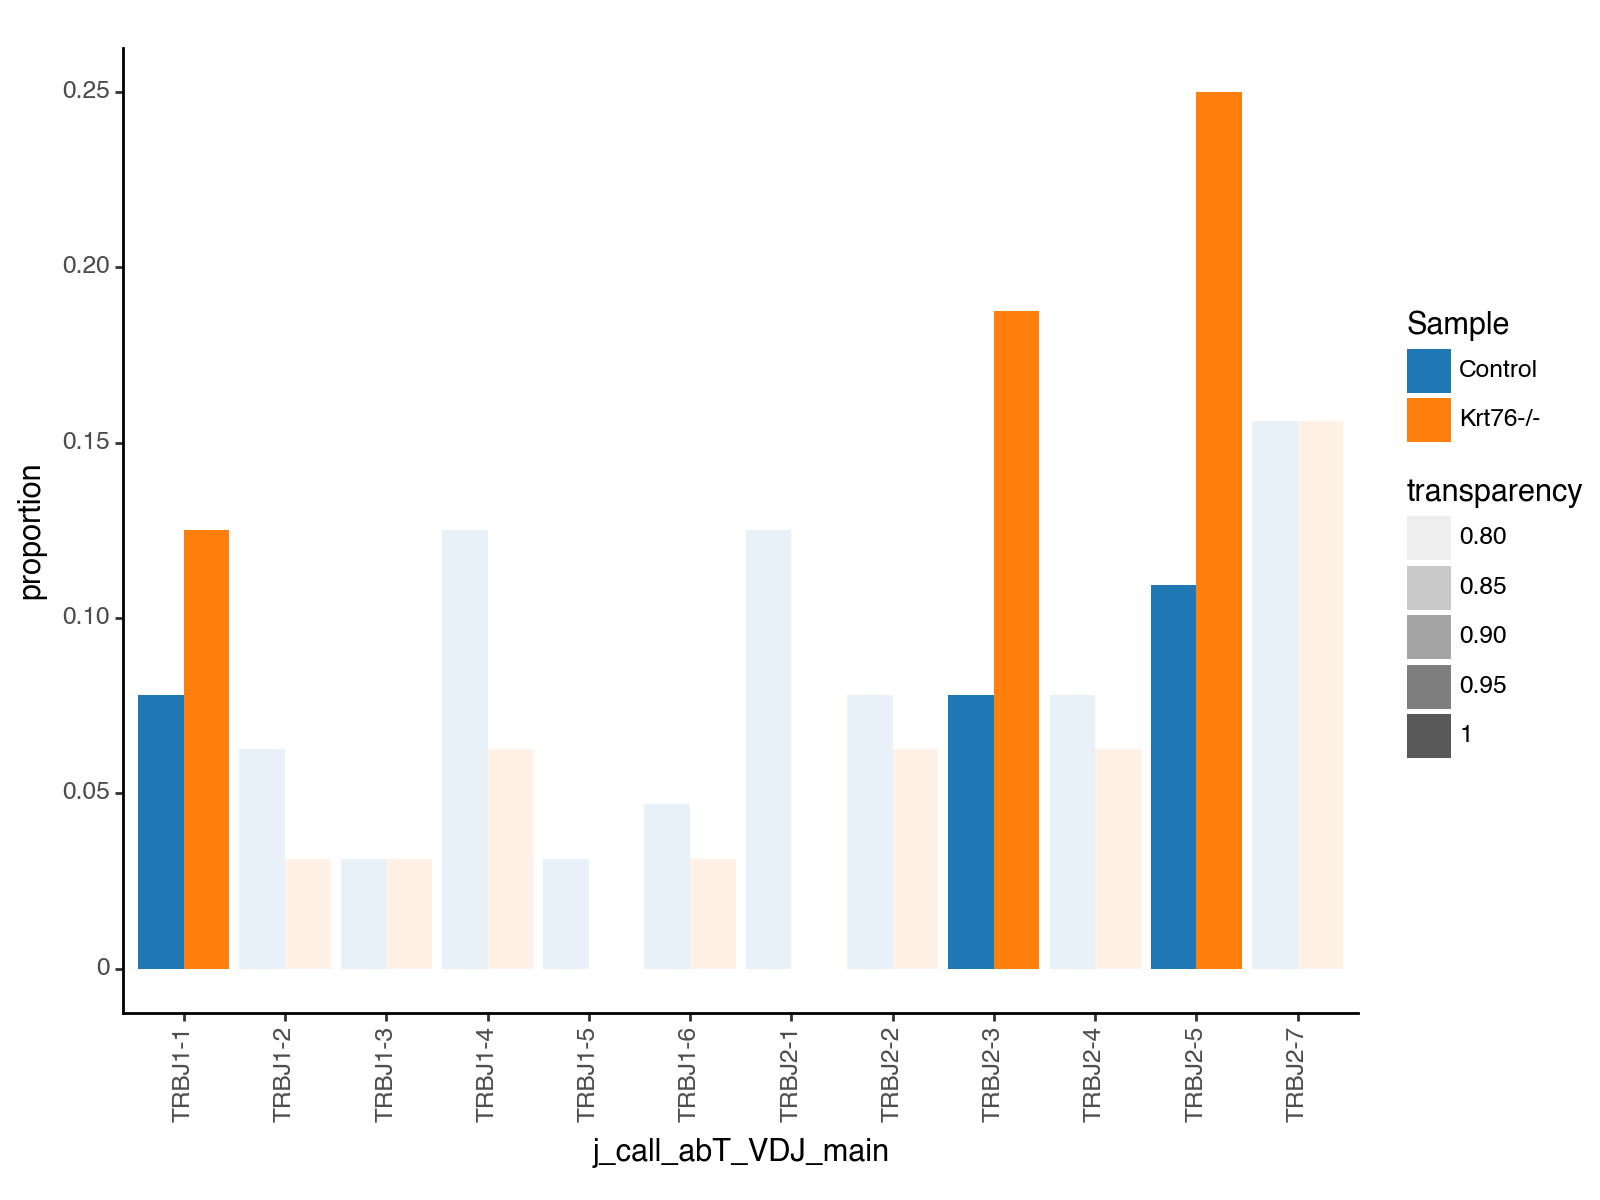

<Figure Size: (800 x 600)>

In [561]:
p

In [1781]:
p.save("JgeneBetaChain_DP2_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DP2_141223.pdf


### SPDP - J gene beta chain

In [1782]:
adata_PF_SPDP = adata_PF[adata_PF.obs["leiden"] == "5 SP & DP"]

In [1783]:
adata_PF_SPDP

View of AnnData object with n_obs × n_vars = 865 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1784]:
working_df = pd.DataFrame(adata_PF_SPDP.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                         
Control  TRBJ2-7                                  132
         TRBJ2-1                                   79
         TRBJ2-4                                   65
         TRBJ2-5                                   59
         TRBJ1-1                                   54
         TRBJ2-3                                   44
         TRBJ1-4                                   31
         TRBJ2-2                                   30
         TRBJ1-3                                   27
         TRBJ1-2                                   21
         TRBJ1-5                                   18
         TRBJ1-6                                   13
         TRBJ2-6                                    4
         TRBJ1-6,TRBJ2-2,TRBJ2-7                    0
Krt76-/- TRBJ2-7                                   73
         TRBJ2-1                                   35
         TRBJ2-4                                   30
         TRBJ2-5                                   29
         TRBJ1-1                                   26
         TRBJ2-3                                   19
         TRBJ1-3                                   18
         TRBJ1-2                                   15
         TRBJ1-4                                   13
         TRBJ2-2                                   12
         TRBJ1-5                                    9
         TRBJ1-6                                    7
         TRBJ1-6,TRBJ2-2,TRBJ2-7                    1
         TRBJ2-6                                    1

In [1785]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample      j_call_abT_VDJ_main  counts
0    Control                  TRBJ2-7     132
1    Control                  TRBJ2-1      79
2    Control                  TRBJ2-4      65
3    Control                  TRBJ2-5      59
4    Control                  TRBJ1-1      54
5    Control                  TRBJ2-3      44
6    Control                  TRBJ1-4      31
7    Control                  TRBJ2-2      30
8    Control                  TRBJ1-3      27
9    Control                  TRBJ1-2      21
10   Control                  TRBJ1-5      18
11   Control                  TRBJ1-6      13
12   Control                  TRBJ2-6       4
13   Control  TRBJ1-6,TRBJ2-2,TRBJ2-7       0
14  Krt76-/-                  TRBJ2-7      73
15  Krt76-/-                  TRBJ2-1      35
16  Krt76-/-                  TRBJ2-4      30
17  Krt76-/-                  TRBJ2-5      29
18  Krt76-/-                  TRBJ1-1      26
19  Krt76-/-                  TRBJ2-3      19
20  Krt76-/-                  TRBJ1-3      18
21  Krt76-/-                  TRBJ1-2      15
22  Krt76-/-                  TRBJ1-4      13
23  Krt76-/-                  TRBJ2-2      12
24  Krt76-/-                  TRBJ1-5       9
25  Krt76-/-                  TRBJ1-6       7
26  Krt76-/-  TRBJ1-6,TRBJ2-2,TRBJ2-7       1
27  Krt76-/-                  TRBJ2-6       1

In [1786]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 577, 'Krt76-/-': 288}

In [1787]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1788]:
working_df

Sample      j_call_abT_VDJ_main  counts  proportion
0    Control                  TRBJ2-7     132    0.228769
1    Control                  TRBJ2-1      79    0.136915
2    Control                  TRBJ2-4      65    0.112652
3    Control                  TRBJ2-5      59    0.102253
4    Control                  TRBJ1-1      54    0.093588
5    Control                  TRBJ2-3      44    0.076256
6    Control                  TRBJ1-4      31    0.053726
7    Control                  TRBJ2-2      30    0.051993
8    Control                  TRBJ1-3      27    0.046794
9    Control                  TRBJ1-2      21    0.036395
10   Control                  TRBJ1-5      18    0.031196
11   Control                  TRBJ1-6      13    0.022530
12   Control                  TRBJ2-6       4    0.006932
13   Control  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000
14  Krt76-/-                  TRBJ2-7      73    0.253472
15  Krt76-/-                  TRBJ2-1      35    0.121528
16  Krt76-/-                  TRBJ2-4      30    0.104167
17  Krt76-/-                  TRBJ2-5      29    0.100694
18  Krt76-/-                  TRBJ1-1      26    0.090278
19  Krt76-/-                  TRBJ2-3      19    0.065972
20  Krt76-/-                  TRBJ1-3      18    0.062500
21  Krt76-/-                  TRBJ1-2      15    0.052083
22  Krt76-/-                  TRBJ1-4      13    0.045139
23  Krt76-/-                  TRBJ2-2      12    0.041667
24  Krt76-/-                  TRBJ1-5       9    0.031250
25  Krt76-/-                  TRBJ1-6       7    0.024306
26  Krt76-/-  TRBJ1-6,TRBJ2-2,TRBJ2-7       1    0.003472
27  Krt76-/-                  TRBJ2-6       1    0.003472

In [1789]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 577, 'Krt76-/-': 288}

In [1790]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1791]:
working_df

Sample      j_call_abT_VDJ_main  counts  proportion
0    Control                  TRBJ2-7     132    0.228769
1    Control                  TRBJ2-1      79    0.136915
2    Control                  TRBJ2-4      65    0.112652
3    Control                  TRBJ2-5      59    0.102253
4    Control                  TRBJ1-1      54    0.093588
5    Control                  TRBJ2-3      44    0.076256
6    Control                  TRBJ1-4      31    0.053726
7    Control                  TRBJ2-2      30    0.051993
8    Control                  TRBJ1-3      27    0.046794
9    Control                  TRBJ1-2      21    0.036395
10   Control                  TRBJ1-5      18    0.031196
11   Control                  TRBJ1-6      13    0.022530
12   Control                  TRBJ2-6       4    0.006932
13   Control  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000
14  Krt76-/-                  TRBJ2-7      73    0.253472
15  Krt76-/-                  TRBJ2-1      35    0.121528
16  Krt76-/-                  TRBJ2-4      30    0.104167
17  Krt76-/-                  TRBJ2-5      29    0.100694
18  Krt76-/-                  TRBJ1-1      26    0.090278
19  Krt76-/-                  TRBJ2-3      19    0.065972
20  Krt76-/-                  TRBJ1-3      18    0.062500
21  Krt76-/-                  TRBJ1-2      15    0.052083
22  Krt76-/-                  TRBJ1-4      13    0.045139
23  Krt76-/-                  TRBJ2-2      12    0.041667
24  Krt76-/-                  TRBJ1-5       9    0.031250
25  Krt76-/-                  TRBJ1-6       7    0.024306
26  Krt76-/-  TRBJ1-6,TRBJ2-2,TRBJ2-7       1    0.003472
27  Krt76-/-                  TRBJ2-6       1    0.003472

In [1792]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1793]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1794]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1795]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1796]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.9646347736625515,
 'TRBJ1-2': 1.4310515873015874,
 'TRBJ1-3': 1.3356481481481481,
 'TRBJ1-4': 0.840165770609319,
 'TRBJ1-5': 1.0017361111111112,
 'TRBJ1-6': 1.078792735042735,
 'TRBJ1-6,TRBJ2-2,TRBJ2-7': inf,
 'TRBJ2-1': 0.887614275668073,
 'TRBJ2-2': 0.8013888888888888,
 'TRBJ2-3': 0.8651357323232324,
 'TRBJ2-4': 0.9246794871794872,
 'TRBJ2-5': 0.9847575329566856,
 'TRBJ2-6': 0.5008680555555556,
 'TRBJ2-7': 1.1079808501683501}

In [1797]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample      j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control                  TRBJ2-7     132    0.228769    1.107981
1    Control                  TRBJ2-1      79    0.136915    0.887614
2    Control                  TRBJ2-4      65    0.112652    0.924679
3    Control                  TRBJ2-5      59    0.102253    0.984758
4    Control                  TRBJ1-1      54    0.093588    0.964635
5    Control                  TRBJ2-3      44    0.076256    0.865136
6    Control                  TRBJ1-4      31    0.053726    0.840166
7    Control                  TRBJ2-2      30    0.051993    0.801389
8    Control                  TRBJ1-3      27    0.046794    1.335648
9    Control                  TRBJ1-2      21    0.036395    1.431052
10   Control                  TRBJ1-5      18    0.031196    1.001736
11   Control                  TRBJ1-6      13    0.022530    1.078793
12   Control                  TRBJ2-6       4    0.006932    0.500868
13   Control  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000         inf
14  Krt76-/-                  TRBJ2-7      73    0.253472    1.107981
15  Krt76-/-                  TRBJ2-1      35    0.121528    0.887614
16  Krt76-/-                  TRBJ2-4      30    0.104167    0.924679
17  Krt76-/-                  TRBJ2-5      29    0.100694    0.984758
18  Krt76-/-                  TRBJ1-1      26    0.090278    0.964635
19  Krt76-/-                  TRBJ2-3      19    0.065972    0.865136
20  Krt76-/-                  TRBJ1-3      18    0.062500    1.335648
21  Krt76-/-                  TRBJ1-2      15    0.052083    1.431052
22  Krt76-/-                  TRBJ1-4      13    0.045139    0.840166
23  Krt76-/-                  TRBJ2-2      12    0.041667    0.801389
24  Krt76-/-                  TRBJ1-5       9    0.031250    1.001736
25  Krt76-/-                  TRBJ1-6       7    0.024306    1.078793
26  Krt76-/-  TRBJ1-6,TRBJ2-2,TRBJ2-7       1    0.003472         inf
27  Krt76-/-                  TRBJ2-6       1    0.003472    0.500868

In [1798]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1799]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1800]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1801]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

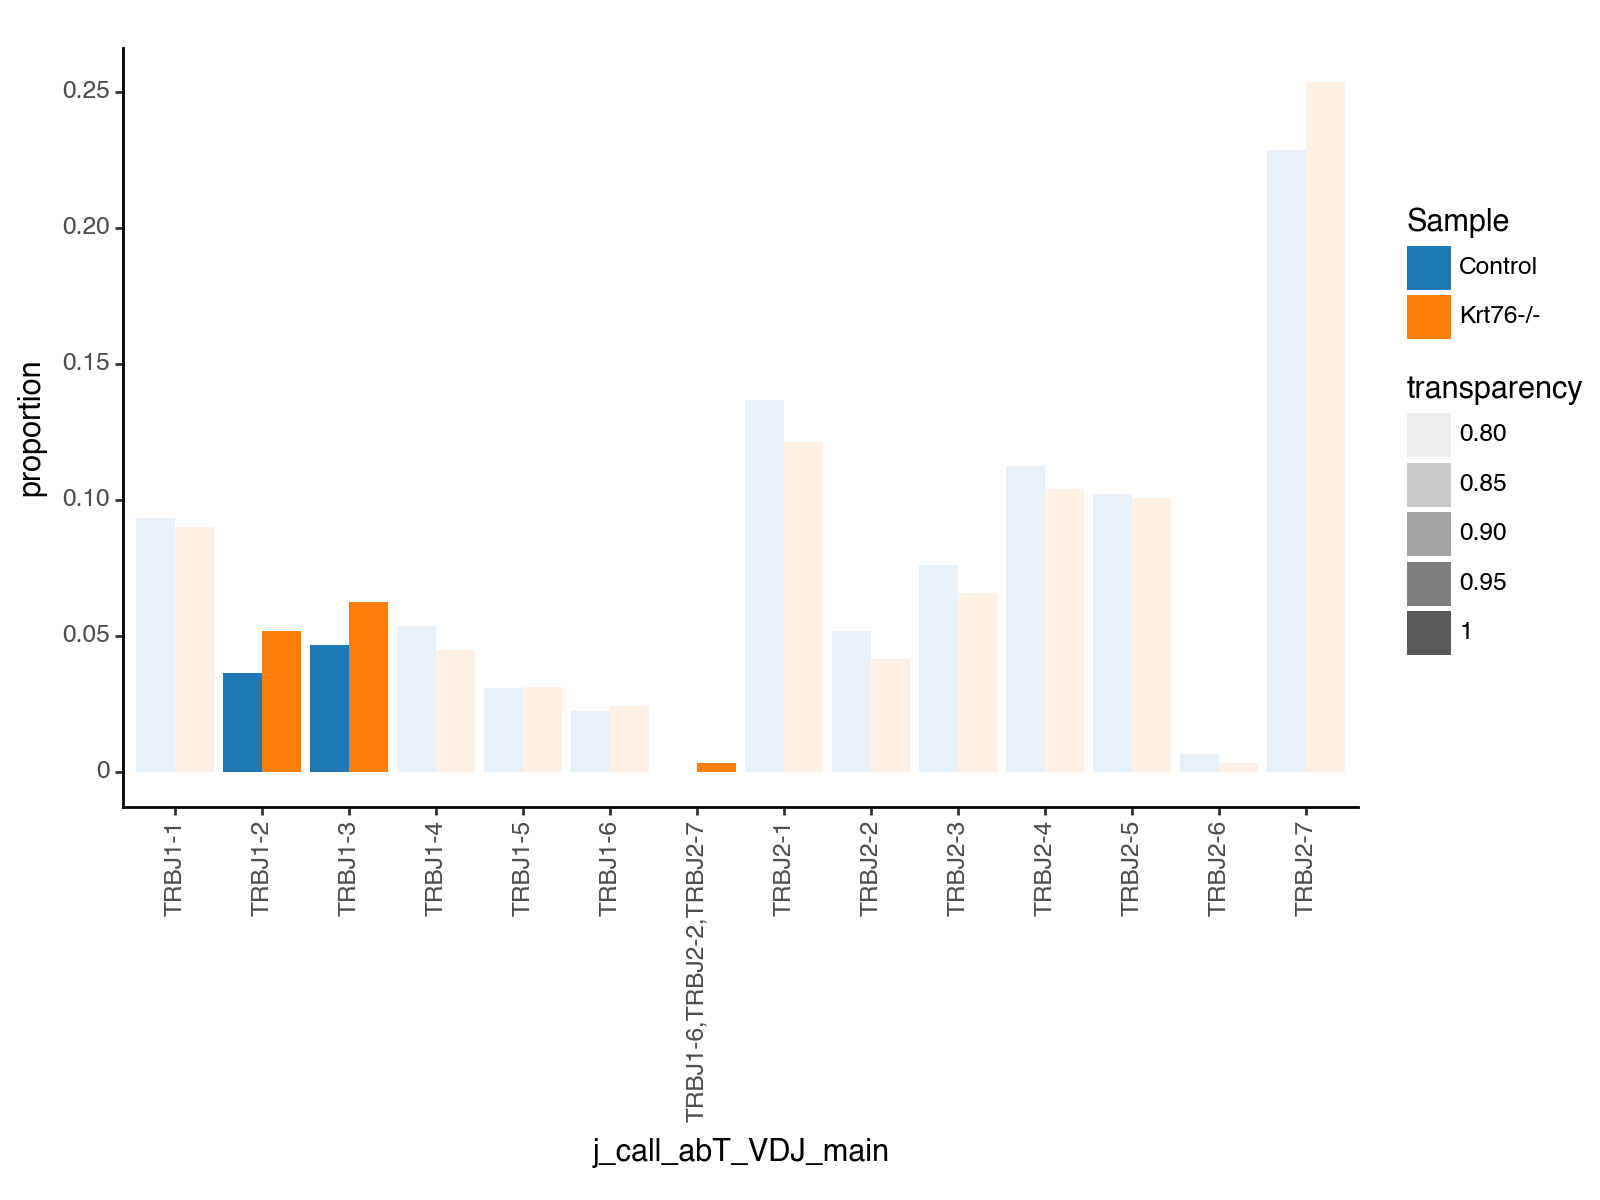

<Figure Size: (800 x 600)>

In [1802]:
p

In [1803]:
p.save("JgeneBetaChain_SPDP_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_SPDP_141223.pdf


### TCRgd - J gene beta chain

In [1804]:
adata_PF_GD = adata_PF[adata_PF.obs["leiden"] == "8 TCRgd"]

In [1805]:
adata_PF_GD

View of AnnData object with n_obs × n_vars = 62 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1806]:
working_df = pd.DataFrame(adata_PF_GD.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-1                                8
         TRBJ1-2                                7
         TRBJ2-7                                6
         TRBJ1-6                                4
         TRBJ2-5                                4
         TRBJ1-1                                3
         TRBJ1-4                                3
         TRBJ2-4                                3
         TRBJ1-5                                2
         TRBJ1-3                                1
         TRBJ2-2                                1
         TRBJ2-3                                1
Krt76-/- TRBJ2-7                                5
         TRBJ2-1                                3
         TRBJ2-3                                3
         TRBJ1-1                                2
         TRBJ2-4                                2
         TRBJ1-2                                1
         TRBJ1-4                                1
         TRBJ1-5                                1
         TRBJ2-5                                1
         TRBJ1-3                                0
         TRBJ1-6                                0
         TRBJ2-2                                0

In [1807]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-1       8
1    Control             TRBJ1-2       7
2    Control             TRBJ2-7       6
3    Control             TRBJ1-6       4
4    Control             TRBJ2-5       4
5    Control             TRBJ1-1       3
6    Control             TRBJ1-4       3
7    Control             TRBJ2-4       3
8    Control             TRBJ1-5       2
9    Control             TRBJ1-3       1
10   Control             TRBJ2-2       1
11   Control             TRBJ2-3       1
12  Krt76-/-             TRBJ2-7       5
13  Krt76-/-             TRBJ2-1       3
14  Krt76-/-             TRBJ2-3       3
15  Krt76-/-             TRBJ1-1       2
16  Krt76-/-             TRBJ2-4       2
17  Krt76-/-             TRBJ1-2       1
18  Krt76-/-             TRBJ1-4       1
19  Krt76-/-             TRBJ1-5       1
20  Krt76-/-             TRBJ2-5       1
21  Krt76-/-             TRBJ1-3       0
22  Krt76-/-             TRBJ1-6       0
23  Krt76-/-             TRBJ2-2       0

In [1808]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 43, 'Krt76-/-': 19}

In [1809]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1810]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-1       8    0.186047
1    Control             TRBJ1-2       7    0.162791
2    Control             TRBJ2-7       6    0.139535
3    Control             TRBJ1-6       4    0.093023
4    Control             TRBJ2-5       4    0.093023
5    Control             TRBJ1-1       3    0.069767
6    Control             TRBJ1-4       3    0.069767
7    Control             TRBJ2-4       3    0.069767
8    Control             TRBJ1-5       2    0.046512
9    Control             TRBJ1-3       1    0.023256
10   Control             TRBJ2-2       1    0.023256
11   Control             TRBJ2-3       1    0.023256
12  Krt76-/-             TRBJ2-7       5    0.263158
13  Krt76-/-             TRBJ2-1       3    0.157895
14  Krt76-/-             TRBJ2-3       3    0.157895
15  Krt76-/-             TRBJ1-1       2    0.105263
16  Krt76-/-             TRBJ2-4       2    0.105263
17  Krt76-/-             TRBJ1-2       1    0.052632
18  Krt76-/-             TRBJ1-4       1    0.052632
19  Krt76-/-             TRBJ1-5       1    0.052632
20  Krt76-/-             TRBJ2-5       1    0.052632
21  Krt76-/-             TRBJ1-3       0    0.000000
22  Krt76-/-             TRBJ1-6       0    0.000000
23  Krt76-/-             TRBJ2-2       0    0.000000

In [1811]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 43, 'Krt76-/-': 19}

In [1812]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1813]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-1       8    0.186047
1    Control             TRBJ1-2       7    0.162791
2    Control             TRBJ2-7       6    0.139535
3    Control             TRBJ1-6       4    0.093023
4    Control             TRBJ2-5       4    0.093023
5    Control             TRBJ1-1       3    0.069767
6    Control             TRBJ1-4       3    0.069767
7    Control             TRBJ2-4       3    0.069767
8    Control             TRBJ1-5       2    0.046512
9    Control             TRBJ1-3       1    0.023256
10   Control             TRBJ2-2       1    0.023256
11   Control             TRBJ2-3       1    0.023256
12  Krt76-/-             TRBJ2-7       5    0.263158
13  Krt76-/-             TRBJ2-1       3    0.157895
14  Krt76-/-             TRBJ2-3       3    0.157895
15  Krt76-/-             TRBJ1-1       2    0.105263
16  Krt76-/-             TRBJ2-4       2    0.105263
17  Krt76-/-             TRBJ1-2       1    0.052632
18  Krt76-/-             TRBJ1-4       1    0.052632
19  Krt76-/-             TRBJ1-5       1    0.052632
20  Krt76-/-             TRBJ2-5       1    0.052632
21  Krt76-/-             TRBJ1-3       0    0.000000
22  Krt76-/-             TRBJ1-6       0    0.000000
23  Krt76-/-             TRBJ2-2       0    0.000000

In [1814]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1815]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1816]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1817]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1818]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.5087719298245614,
 'TRBJ1-2': 0.3233082706766917,
 'TRBJ1-3': 0.0,
 'TRBJ1-4': 0.7543859649122807,
 'TRBJ1-5': 1.131578947368421,
 'TRBJ1-6': 0.0,
 'TRBJ2-1': 0.8486842105263157,
 'TRBJ2-2': 0.0,
 'TRBJ2-3': 6.789473684210526,
 'TRBJ2-4': 1.5087719298245614,
 'TRBJ2-5': 0.5657894736842105,
 'TRBJ2-7': 1.8859649122807016}

In [1819]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-1       8    0.186047    0.848684
1    Control             TRBJ1-2       7    0.162791    0.323308
2    Control             TRBJ2-7       6    0.139535    1.885965
3    Control             TRBJ1-6       4    0.093023    0.000000
4    Control             TRBJ2-5       4    0.093023    0.565789
5    Control             TRBJ1-1       3    0.069767    1.508772
6    Control             TRBJ1-4       3    0.069767    0.754386
7    Control             TRBJ2-4       3    0.069767    1.508772
8    Control             TRBJ1-5       2    0.046512    1.131579
9    Control             TRBJ1-3       1    0.023256    0.000000
10   Control             TRBJ2-2       1    0.023256    0.000000
11   Control             TRBJ2-3       1    0.023256    6.789474
12  Krt76-/-             TRBJ2-7       5    0.263158    1.885965
13  Krt76-/-             TRBJ2-1       3    0.157895    0.848684
14  Krt76-/-             TRBJ2-3       3    0.157895    6.789474
15  Krt76-/-             TRBJ1-1       2    0.105263    1.508772
16  Krt76-/-             TRBJ2-4       2    0.105263    1.508772
17  Krt76-/-             TRBJ1-2       1    0.052632    0.323308
18  Krt76-/-             TRBJ1-4       1    0.052632    0.754386
19  Krt76-/-             TRBJ1-5       1    0.052632    1.131579
20  Krt76-/-             TRBJ2-5       1    0.052632    0.565789
21  Krt76-/-             TRBJ1-3       0    0.000000    0.000000
22  Krt76-/-             TRBJ1-6       0    0.000000    0.000000
23  Krt76-/-             TRBJ2-2       0    0.000000    0.000000

In [1820]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1821]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1822]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1823]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

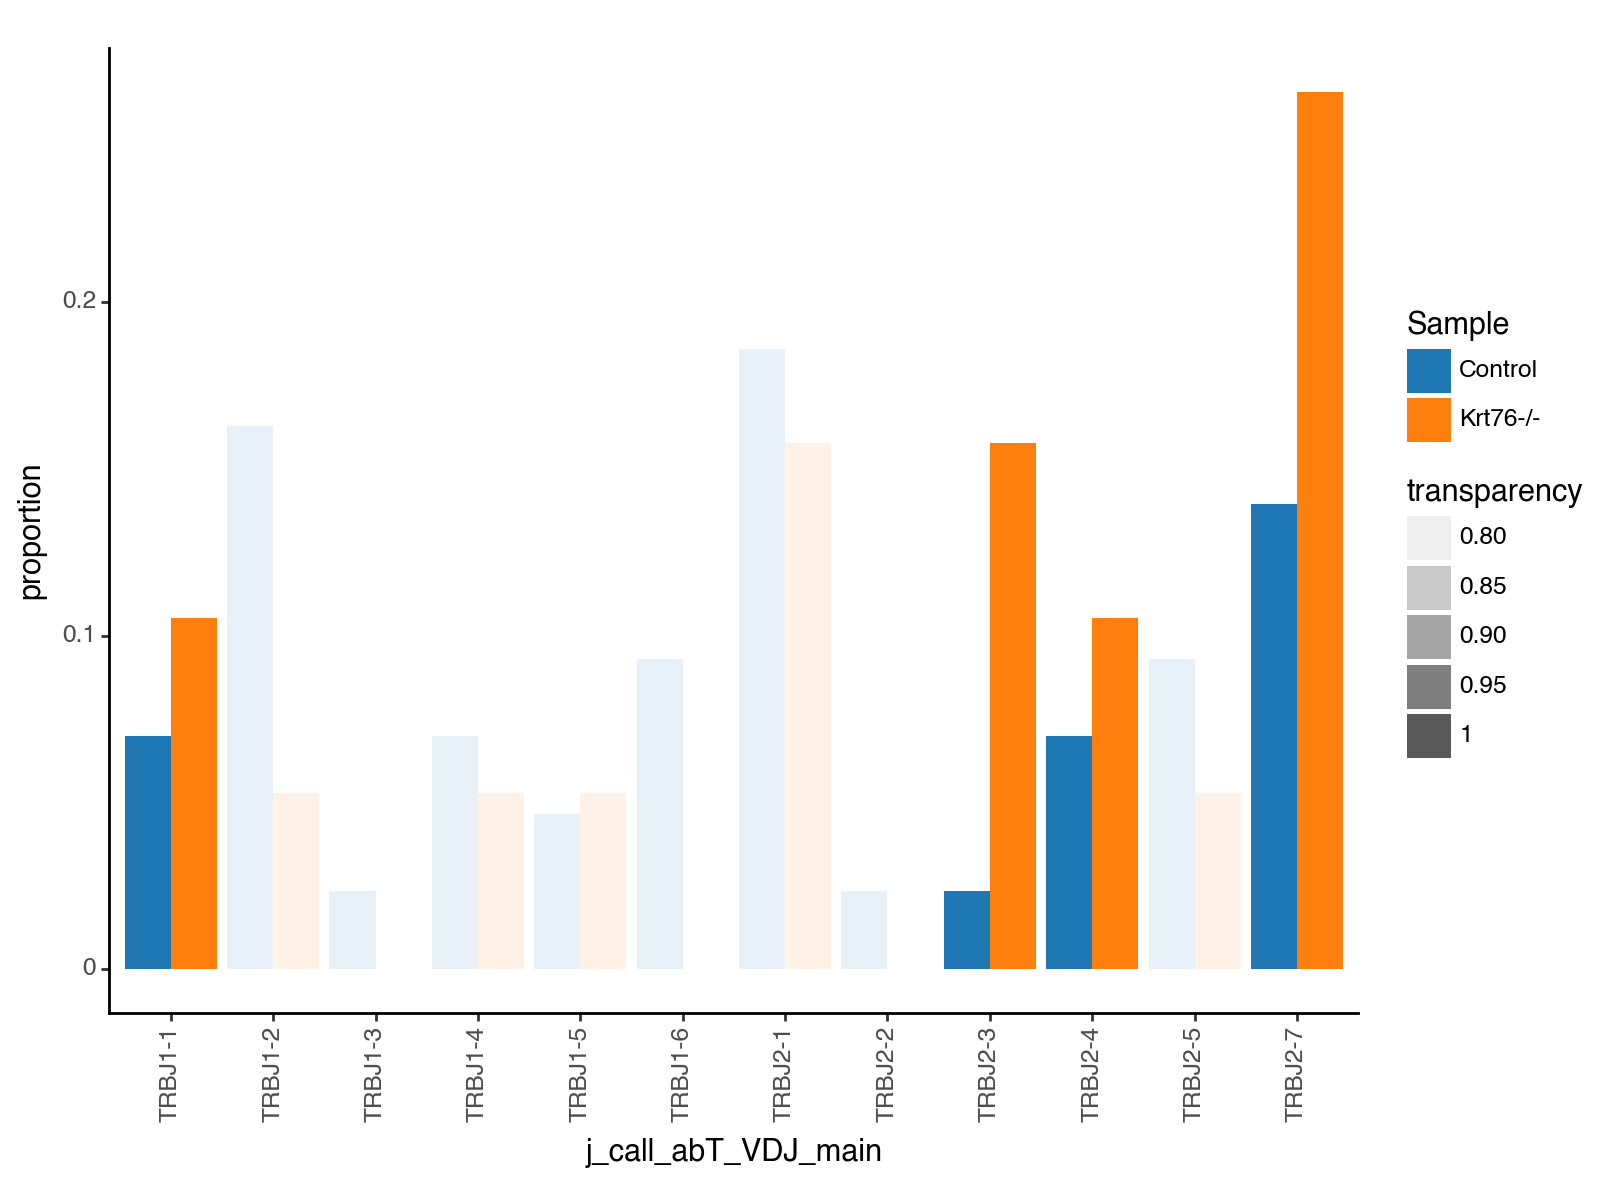

<Figure Size: (800 x 600)>

In [603]:
p

In [1824]:
p.save("JgeneBetaChain_TCRgd_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_TCRgd_141223.pdf


### NKT/NK/Tregs - J gene beta chain

In [1825]:
adata_PF_NK = adata_PF[adata_PF.obs["leiden"] == "11 NKT / NK / Tregs"]

In [1826]:
adata_PF_NK

View of AnnData object with n_obs × n_vars = 147 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [1827]:
working_df = pd.DataFrame(adata_PF_NK.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
Sample   j_call_abT_VDJ_main                     
Control  TRBJ2-7                               27
         TRBJ2-1                               16
         TRBJ2-4                               13
         TRBJ1-1                               10
         TRBJ1-2                                8
         TRBJ2-5                                8
         TRBJ1-6                                7
         TRBJ2-2                                7
         TRBJ1-3                                5
         TRBJ2-3                                4
         TRBJ1-4                                3
         TRBJ1-5                                3
         TRBJ2-6                                1
Krt76-/- TRBJ2-7                                6
         TRBJ1-1                                5
         TRBJ1-2                                5
         TRBJ2-3                                4
         TRBJ2-4                                4
         TRBJ1-3                                3
         TRBJ2-5                                3
         TRBJ2-1                                2
         TRBJ2-2                                2
         TRBJ1-4                                1
         TRBJ1-5                                0
         TRBJ1-6                                0
         TRBJ2-6                                0

In [1828]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7      27
1    Control             TRBJ2-1      16
2    Control             TRBJ2-4      13
3    Control             TRBJ1-1      10
4    Control             TRBJ1-2       8
5    Control             TRBJ2-5       8
6    Control             TRBJ1-6       7
7    Control             TRBJ2-2       7
8    Control             TRBJ1-3       5
9    Control             TRBJ2-3       4
10   Control             TRBJ1-4       3
11   Control             TRBJ1-5       3
12   Control             TRBJ2-6       1
13  Krt76-/-             TRBJ2-7       6
14  Krt76-/-             TRBJ1-1       5
15  Krt76-/-             TRBJ1-2       5
16  Krt76-/-             TRBJ2-3       4
17  Krt76-/-             TRBJ2-4       4
18  Krt76-/-             TRBJ1-3       3
19  Krt76-/-             TRBJ2-5       3
20  Krt76-/-             TRBJ2-1       2
21  Krt76-/-             TRBJ2-2       2
22  Krt76-/-             TRBJ1-4       1
23  Krt76-/-             TRBJ1-5       0
24  Krt76-/-             TRBJ1-6       0
25  Krt76-/-             TRBJ2-6       0

In [1829]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 112, 'Krt76-/-': 35}

In [1830]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1831]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      27    0.241071
1    Control             TRBJ2-1      16    0.142857
2    Control             TRBJ2-4      13    0.116071
3    Control             TRBJ1-1      10    0.089286
4    Control             TRBJ1-2       8    0.071429
5    Control             TRBJ2-5       8    0.071429
6    Control             TRBJ1-6       7    0.062500
7    Control             TRBJ2-2       7    0.062500
8    Control             TRBJ1-3       5    0.044643
9    Control             TRBJ2-3       4    0.035714
10   Control             TRBJ1-4       3    0.026786
11   Control             TRBJ1-5       3    0.026786
12   Control             TRBJ2-6       1    0.008929
13  Krt76-/-             TRBJ2-7       6    0.171429
14  Krt76-/-             TRBJ1-1       5    0.142857
15  Krt76-/-             TRBJ1-2       5    0.142857
16  Krt76-/-             TRBJ2-3       4    0.114286
17  Krt76-/-             TRBJ2-4       4    0.114286
18  Krt76-/-             TRBJ1-3       3    0.085714
19  Krt76-/-             TRBJ2-5       3    0.085714
20  Krt76-/-             TRBJ2-1       2    0.057143
21  Krt76-/-             TRBJ2-2       2    0.057143
22  Krt76-/-             TRBJ1-4       1    0.028571
23  Krt76-/-             TRBJ1-5       0    0.000000
24  Krt76-/-             TRBJ1-6       0    0.000000
25  Krt76-/-             TRBJ2-6       0    0.000000

In [1832]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 112, 'Krt76-/-': 35}

In [1833]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1834]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      27    0.241071
1    Control             TRBJ2-1      16    0.142857
2    Control             TRBJ2-4      13    0.116071
3    Control             TRBJ1-1      10    0.089286
4    Control             TRBJ1-2       8    0.071429
5    Control             TRBJ2-5       8    0.071429
6    Control             TRBJ1-6       7    0.062500
7    Control             TRBJ2-2       7    0.062500
8    Control             TRBJ1-3       5    0.044643
9    Control             TRBJ2-3       4    0.035714
10   Control             TRBJ1-4       3    0.026786
11   Control             TRBJ1-5       3    0.026786
12   Control             TRBJ2-6       1    0.008929
13  Krt76-/-             TRBJ2-7       6    0.171429
14  Krt76-/-             TRBJ1-1       5    0.142857
15  Krt76-/-             TRBJ1-2       5    0.142857
16  Krt76-/-             TRBJ2-3       4    0.114286
17  Krt76-/-             TRBJ2-4       4    0.114286
18  Krt76-/-             TRBJ1-3       3    0.085714
19  Krt76-/-             TRBJ2-5       3    0.085714
20  Krt76-/-             TRBJ2-1       2    0.057143
21  Krt76-/-             TRBJ2-2       2    0.057143
22  Krt76-/-             TRBJ1-4       1    0.028571
23  Krt76-/-             TRBJ1-5       0    0.000000
24  Krt76-/-             TRBJ1-6       0    0.000000
25  Krt76-/-             TRBJ2-6       0    0.000000

In [1835]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1836]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1837]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [1838]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [1839]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.5999999999999999,
 'TRBJ1-2': 2.0,
 'TRBJ1-3': 1.92,
 'TRBJ1-4': 1.0666666666666667,
 'TRBJ1-5': 0.0,
 'TRBJ1-6': 0.0,
 'TRBJ2-1': 0.4,
 'TRBJ2-2': 0.9142857142857143,
 'TRBJ2-3': 3.2,
 'TRBJ2-4': 0.9846153846153846,
 'TRBJ2-5': 1.2000000000000002,
 'TRBJ2-6': 0.0,
 'TRBJ2-7': 0.7111111111111111}

In [1840]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7      27    0.241071    0.711111
1    Control             TRBJ2-1      16    0.142857    0.400000
2    Control             TRBJ2-4      13    0.116071    0.984615
3    Control             TRBJ1-1      10    0.089286    1.600000
4    Control             TRBJ1-2       8    0.071429    2.000000
5    Control             TRBJ2-5       8    0.071429    1.200000
6    Control             TRBJ1-6       7    0.062500    0.000000
7    Control             TRBJ2-2       7    0.062500    0.914286
8    Control             TRBJ1-3       5    0.044643    1.920000
9    Control             TRBJ2-3       4    0.035714    3.200000
10   Control             TRBJ1-4       3    0.026786    1.066667
11   Control             TRBJ1-5       3    0.026786    0.000000
12   Control             TRBJ2-6       1    0.008929    0.000000
13  Krt76-/-             TRBJ2-7       6    0.171429    0.711111
14  Krt76-/-             TRBJ1-1       5    0.142857    1.600000
15  Krt76-/-             TRBJ1-2       5    0.142857    2.000000
16  Krt76-/-             TRBJ2-3       4    0.114286    3.200000
17  Krt76-/-             TRBJ2-4       4    0.114286    0.984615
18  Krt76-/-             TRBJ1-3       3    0.085714    1.920000
19  Krt76-/-             TRBJ2-5       3    0.085714    1.200000
20  Krt76-/-             TRBJ2-1       2    0.057143    0.400000
21  Krt76-/-             TRBJ2-2       2    0.057143    0.914286
22  Krt76-/-             TRBJ1-4       1    0.028571    1.066667
23  Krt76-/-             TRBJ1-5       0    0.000000    0.000000
24  Krt76-/-             TRBJ1-6       0    0.000000    0.000000
25  Krt76-/-             TRBJ2-6       0    0.000000    0.000000

In [1841]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1842]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1843]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1844]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

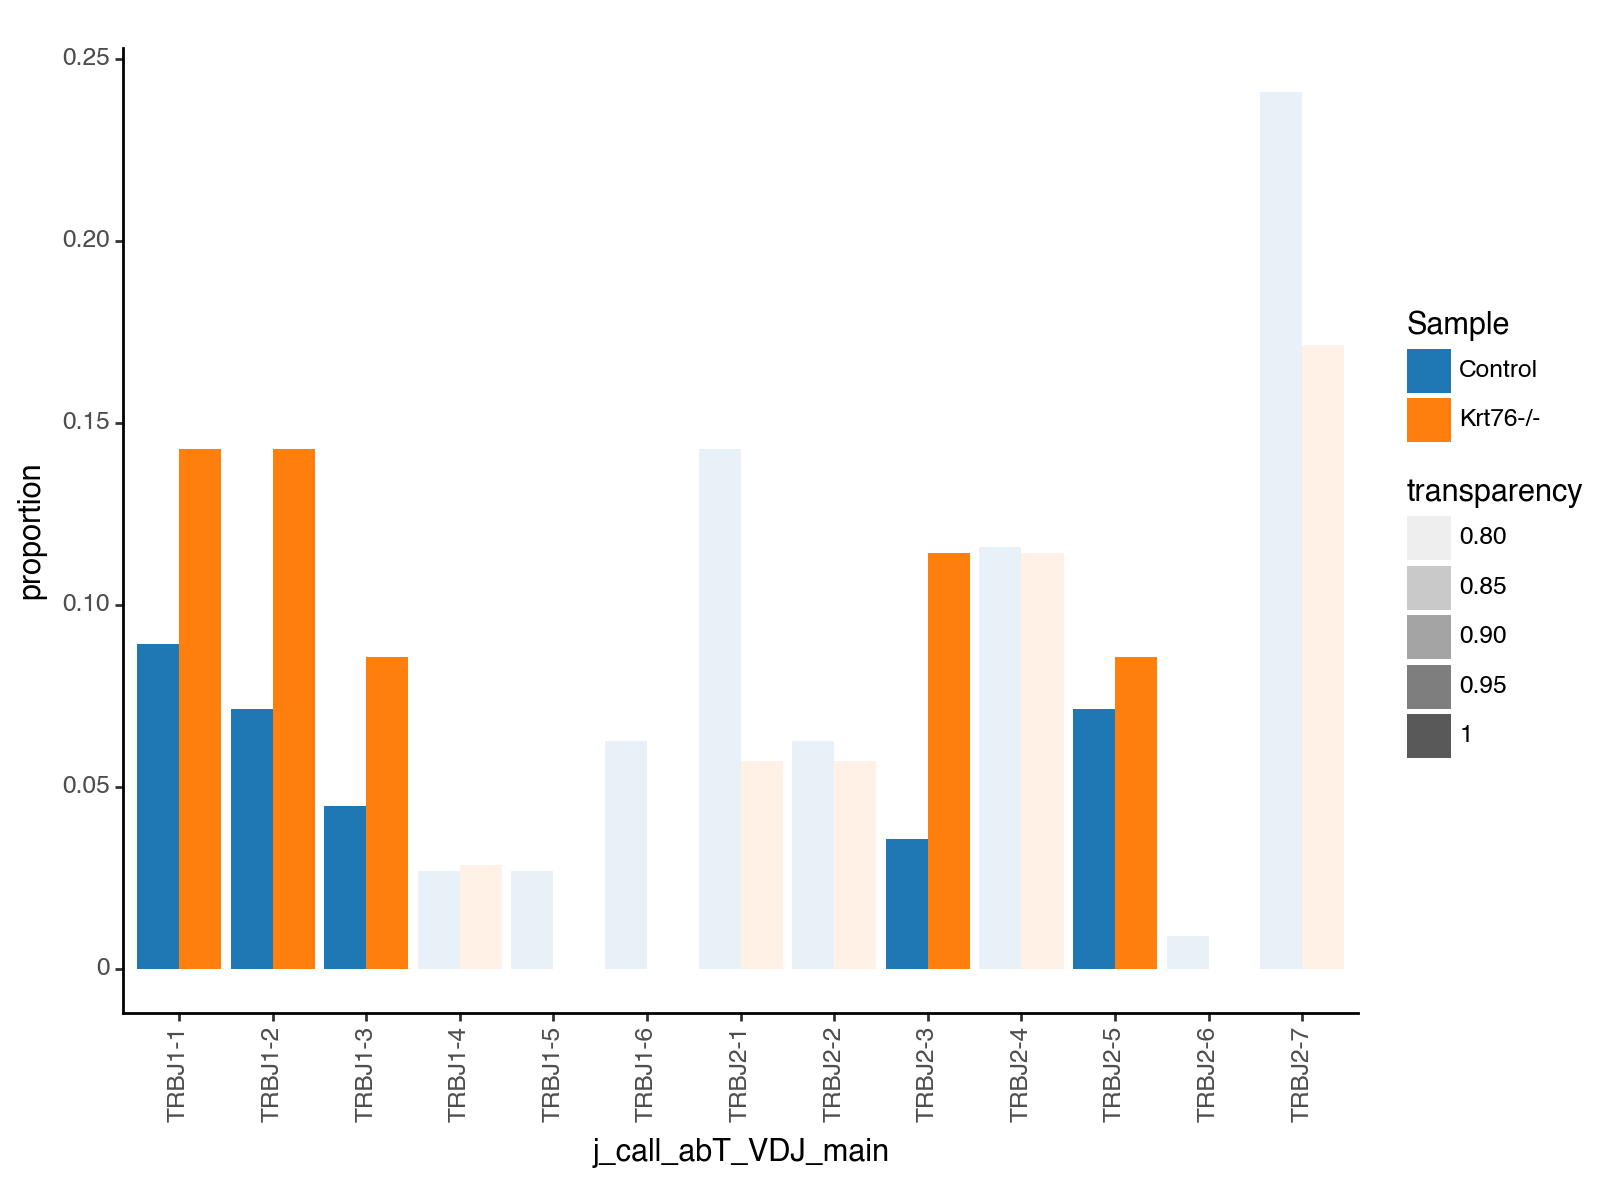

<Figure Size: (800 x 600)>

In [625]:
p

In [1845]:
p.save("JgeneBetaChain_NKTregs_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_NKTregs_141223.pdf


## V gene Alpha chain

In [1846]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VJ_main"] != "No_contig"]

### DN2a - V gene alpha chain

In [1847]:
adata_PF_DN2a = adata_PF[adata_PF.obs["leiden"] == "7 DN2a"]

In [1848]:
adata_PF_DN2a

View of AnnData object with n_obs × n_vars = 17 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1849]:
working_df = pd.DataFrame(adata_PF_DN2a.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                              
Control  TRAV4D-3,TRAV4-3                               2
         TRAV13D-2,TRAV13-2,TRAV13N-2                   2
         TRAV4-4/DV10,TRAV4D-4                          1
         TRAV6D-3                                       1
         TRAV7D-2,TRAV7-2                               1
         TRAV7D-4,TRAV7-4                               1
         TRAV9-4,TRAV9D-3                               1
         TRAV12-1,TRAV12D-1                             1
         TRAV12-2,TRAV12D-2                             1
         TRAV12N-3,TRAV12D-3                            1
         TRAV4-4/DV10                                   0
         TRAV6-7/DV9                                    0
         TRAV14-3,TRAV14D-3/DV8                         0
Krt76-/- TRAV4-4/DV10                                   1
         TRAV6-7/DV9                                    1
         TRAV12-2,TRAV12D-2                             1
         TRAV13D-2,TRAV13-2,TRAV13N-2                   1
         TRAV14-3,TRAV14D-3/DV8                         1
         TRAV4-4/DV10,TRAV4D-4                          0
         TRAV4D-3,TRAV4-3                               0
         TRAV6D-3                                       0
         TRAV7D-2,TRAV7-2                               0
         TRAV7D-4,TRAV7-4                               0
         TRAV9-4,TRAV9D-3                               0
         TRAV12-1,TRAV12D-1                             0
         TRAV12N-3,TRAV12D-3                            0

In [1850]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample            v_call_abT_VJ_main  counts
0    Control              TRAV4D-3,TRAV4-3       2
1    Control  TRAV13D-2,TRAV13-2,TRAV13N-2       2
2    Control         TRAV4-4/DV10,TRAV4D-4       1
3    Control                      TRAV6D-3       1
4    Control              TRAV7D-2,TRAV7-2       1
5    Control              TRAV7D-4,TRAV7-4       1
6    Control              TRAV9-4,TRAV9D-3       1
7    Control            TRAV12-1,TRAV12D-1       1
8    Control            TRAV12-2,TRAV12D-2       1
9    Control           TRAV12N-3,TRAV12D-3       1
10   Control                  TRAV4-4/DV10       0
11   Control                   TRAV6-7/DV9       0
12   Control        TRAV14-3,TRAV14D-3/DV8       0
13  Krt76-/-                  TRAV4-4/DV10       1
14  Krt76-/-                   TRAV6-7/DV9       1
15  Krt76-/-            TRAV12-2,TRAV12D-2       1
16  Krt76-/-  TRAV13D-2,TRAV13-2,TRAV13N-2       1
17  Krt76-/-        TRAV14-3,TRAV14D-3/DV8       1
18  Krt76-/-         TRAV4-4/DV10,TRAV4D-4       0
19  Krt76-/-              TRAV4D-3,TRAV4-3       0
20  Krt76-/-                      TRAV6D-3       0
21  Krt76-/-              TRAV7D-2,TRAV7-2       0
22  Krt76-/-              TRAV7D-4,TRAV7-4       0
23  Krt76-/-              TRAV9-4,TRAV9D-3       0
24  Krt76-/-            TRAV12-1,TRAV12D-1       0
25  Krt76-/-           TRAV12N-3,TRAV12D-3       0

In [1851]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 12, 'Krt76-/-': 5}

In [1852]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1853]:
working_df

Sample            v_call_abT_VJ_main  counts  proportion
0    Control              TRAV4D-3,TRAV4-3       2    0.166667
1    Control  TRAV13D-2,TRAV13-2,TRAV13N-2       2    0.166667
2    Control         TRAV4-4/DV10,TRAV4D-4       1    0.083333
3    Control                      TRAV6D-3       1    0.083333
4    Control              TRAV7D-2,TRAV7-2       1    0.083333
5    Control              TRAV7D-4,TRAV7-4       1    0.083333
6    Control              TRAV9-4,TRAV9D-3       1    0.083333
7    Control            TRAV12-1,TRAV12D-1       1    0.083333
8    Control            TRAV12-2,TRAV12D-2       1    0.083333
9    Control           TRAV12N-3,TRAV12D-3       1    0.083333
10   Control                  TRAV4-4/DV10       0    0.000000
11   Control                   TRAV6-7/DV9       0    0.000000
12   Control        TRAV14-3,TRAV14D-3/DV8       0    0.000000
13  Krt76-/-                  TRAV4-4/DV10       1    0.200000
14  Krt76-/-                   TRAV6-7/DV9       1    0.200000
15  Krt76-/-            TRAV12-2,TRAV12D-2       1    0.200000
16  Krt76-/-  TRAV13D-2,TRAV13-2,TRAV13N-2       1    0.200000
17  Krt76-/-        TRAV14-3,TRAV14D-3/DV8       1    0.200000
18  Krt76-/-         TRAV4-4/DV10,TRAV4D-4       0    0.000000
19  Krt76-/-              TRAV4D-3,TRAV4-3       0    0.000000
20  Krt76-/-                      TRAV6D-3       0    0.000000
21  Krt76-/-              TRAV7D-2,TRAV7-2       0    0.000000
22  Krt76-/-              TRAV7D-4,TRAV7-4       0    0.000000
23  Krt76-/-              TRAV9-4,TRAV9D-3       0    0.000000
24  Krt76-/-            TRAV12-1,TRAV12D-1       0    0.000000
25  Krt76-/-           TRAV12N-3,TRAV12D-3       0    0.000000

In [1854]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 12, 'Krt76-/-': 5}

In [1855]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1856]:
working_df

Sample            v_call_abT_VJ_main  counts  proportion
0    Control              TRAV4D-3,TRAV4-3       2    0.166667
1    Control  TRAV13D-2,TRAV13-2,TRAV13N-2       2    0.166667
2    Control         TRAV4-4/DV10,TRAV4D-4       1    0.083333
3    Control                      TRAV6D-3       1    0.083333
4    Control              TRAV7D-2,TRAV7-2       1    0.083333
5    Control              TRAV7D-4,TRAV7-4       1    0.083333
6    Control              TRAV9-4,TRAV9D-3       1    0.083333
7    Control            TRAV12-1,TRAV12D-1       1    0.083333
8    Control            TRAV12-2,TRAV12D-2       1    0.083333
9    Control           TRAV12N-3,TRAV12D-3       1    0.083333
10   Control                  TRAV4-4/DV10       0    0.000000
11   Control                   TRAV6-7/DV9       0    0.000000
12   Control        TRAV14-3,TRAV14D-3/DV8       0    0.000000
13  Krt76-/-                  TRAV4-4/DV10       1    0.200000
14  Krt76-/-                   TRAV6-7/DV9       1    0.200000
15  Krt76-/-            TRAV12-2,TRAV12D-2       1    0.200000
16  Krt76-/-  TRAV13D-2,TRAV13-2,TRAV13N-2       1    0.200000
17  Krt76-/-        TRAV14-3,TRAV14D-3/DV8       1    0.200000
18  Krt76-/-         TRAV4-4/DV10,TRAV4D-4       0    0.000000
19  Krt76-/-              TRAV4D-3,TRAV4-3       0    0.000000
20  Krt76-/-                      TRAV6D-3       0    0.000000
21  Krt76-/-              TRAV7D-2,TRAV7-2       0    0.000000
22  Krt76-/-              TRAV7D-4,TRAV7-4       0    0.000000
23  Krt76-/-              TRAV9-4,TRAV9D-3       0    0.000000
24  Krt76-/-            TRAV12-1,TRAV12D-1       0    0.000000
25  Krt76-/-           TRAV12N-3,TRAV12D-3       0    0.000000

In [1857]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1858]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1859]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [1860]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [1861]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV4-4/DV10': inf,
 'TRAV4-4/DV10,TRAV4D-4': 0.0,
 'TRAV4D-3,TRAV4-3': 0.0,
 'TRAV6-7/DV9': inf,
 'TRAV6D-3': 0.0,
 'TRAV7D-2,TRAV7-2': 0.0,
 'TRAV7D-4,TRAV7-4': 0.0,
 'TRAV9-4,TRAV9D-3': 0.0,
 'TRAV12-1,TRAV12D-1': 0.0,
 'TRAV12-2,TRAV12D-2': 2.4000000000000004,
 'TRAV12N-3,TRAV12D-3': 0.0,
 'TRAV13D-2,TRAV13-2,TRAV13N-2': 1.2000000000000002,
 'TRAV14-3,TRAV14D-3/DV8': inf}

In [1862]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample            v_call_abT_VJ_main  counts  proportion  foldchange
0    Control              TRAV4D-3,TRAV4-3       2    0.166667         0.0
1    Control  TRAV13D-2,TRAV13-2,TRAV13N-2       2    0.166667         1.2
2    Control         TRAV4-4/DV10,TRAV4D-4       1    0.083333         0.0
3    Control                      TRAV6D-3       1    0.083333         0.0
4    Control              TRAV7D-2,TRAV7-2       1    0.083333         0.0
5    Control              TRAV7D-4,TRAV7-4       1    0.083333         0.0
6    Control              TRAV9-4,TRAV9D-3       1    0.083333         0.0
7    Control            TRAV12-1,TRAV12D-1       1    0.083333         0.0
8    Control            TRAV12-2,TRAV12D-2       1    0.083333         2.4
9    Control           TRAV12N-3,TRAV12D-3       1    0.083333         0.0
10   Control                  TRAV4-4/DV10       0    0.000000         inf
11   Control                   TRAV6-7/DV9       0    0.000000         inf
12   Control        TRAV14-3,TRAV14D-3/DV8       0    0.000000         inf
13  Krt76-/-                  TRAV4-4/DV10       1    0.200000         inf
14  Krt76-/-                   TRAV6-7/DV9       1    0.200000         inf
15  Krt76-/-            TRAV12-2,TRAV12D-2       1    0.200000         2.4
16  Krt76-/-  TRAV13D-2,TRAV13-2,TRAV13N-2       1    0.200000         1.2
17  Krt76-/-        TRAV14-3,TRAV14D-3/DV8       1    0.200000         inf
18  Krt76-/-         TRAV4-4/DV10,TRAV4D-4       0    0.000000         0.0
19  Krt76-/-              TRAV4D-3,TRAV4-3       0    0.000000         0.0
20  Krt76-/-                      TRAV6D-3       0    0.000000         0.0
21  Krt76-/-              TRAV7D-2,TRAV7-2       0    0.000000         0.0
22  Krt76-/-              TRAV7D-4,TRAV7-4       0    0.000000         0.0
23  Krt76-/-              TRAV9-4,TRAV9D-3       0    0.000000         0.0
24  Krt76-/-            TRAV12-1,TRAV12D-1       0    0.000000         0.0
25  Krt76-/-           TRAV12N-3,TRAV12D-3       0    0.000000         0.0

In [1863]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1864]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1865]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1867]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

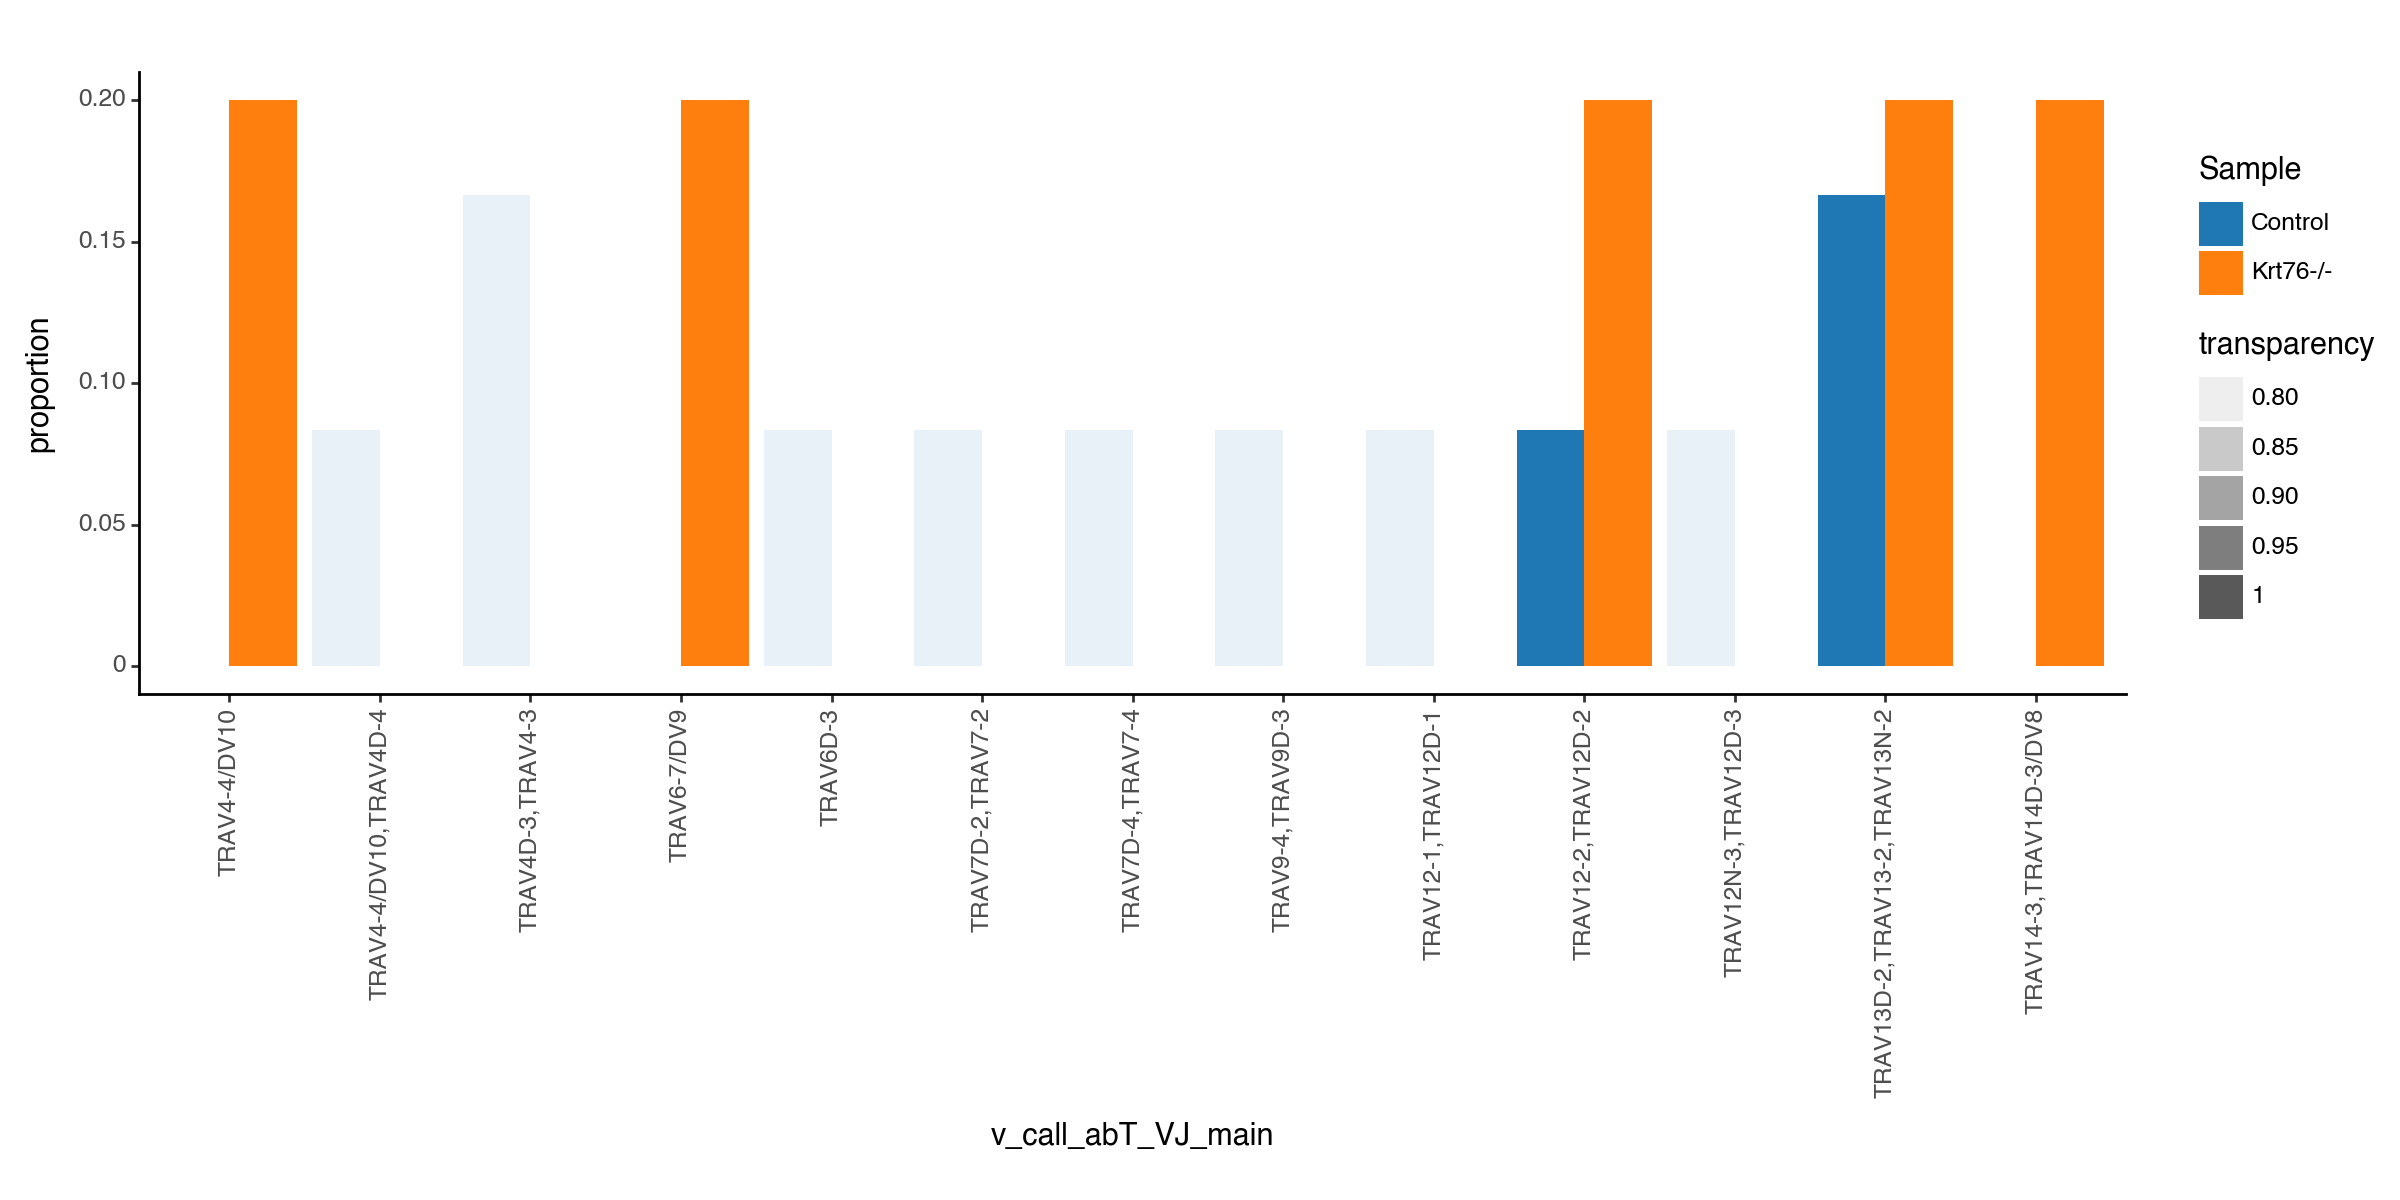

<Figure Size: (1200 x 600)>

In [1868]:
p

In [1869]:
p.save("VgeneAlphaChain_DN2a_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN2a_141223.pdf


### DN2b1 - V gene alpha chain

In [1870]:
adata_PF_DN2b1 = adata_PF[adata_PF.obs["leiden"] == "12 DN2b 1"]

In [1871]:
adata_PF_DN2b1

View of AnnData object with n_obs × n_vars = 8 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', '

In [1872]:
working_df = pd.DataFrame(adata_PF_DN2b1.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                     
Control  TRAV4-4/DV10                          1
         TRAV12-2,TRAV12D-2                    1
         TRAV13-1                              1
         TRAV9N-4                              0
         TRAV13-4/DV7                          0
         TRAV14-2                              0
         TRAV16,TRAV16D/DV11                   0
Krt76-/- TRAV9N-4                              1
         TRAV13-1                              1
         TRAV13-4/DV7                          1
         TRAV14-2                              1
         TRAV16,TRAV16D/DV11                   1
         TRAV4-4/DV10                          0
         TRAV12-2,TRAV12D-2                    0

In [1873]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample   v_call_abT_VJ_main  counts
0    Control         TRAV4-4/DV10       1
1    Control   TRAV12-2,TRAV12D-2       1
2    Control             TRAV13-1       1
3    Control             TRAV9N-4       0
4    Control         TRAV13-4/DV7       0
5    Control             TRAV14-2       0
6    Control  TRAV16,TRAV16D/DV11       0
7   Krt76-/-             TRAV9N-4       1
8   Krt76-/-             TRAV13-1       1
9   Krt76-/-         TRAV13-4/DV7       1
10  Krt76-/-             TRAV14-2       1
11  Krt76-/-  TRAV16,TRAV16D/DV11       1
12  Krt76-/-         TRAV4-4/DV10       0
13  Krt76-/-   TRAV12-2,TRAV12D-2       0

In [1874]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 3, 'Krt76-/-': 5}

In [1875]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1876]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control         TRAV4-4/DV10       1    0.333333
1    Control   TRAV12-2,TRAV12D-2       1    0.333333
2    Control             TRAV13-1       1    0.333333
3    Control             TRAV9N-4       0    0.000000
4    Control         TRAV13-4/DV7       0    0.000000
5    Control             TRAV14-2       0    0.000000
6    Control  TRAV16,TRAV16D/DV11       0    0.000000
7   Krt76-/-             TRAV9N-4       1    0.200000
8   Krt76-/-             TRAV13-1       1    0.200000
9   Krt76-/-         TRAV13-4/DV7       1    0.200000
10  Krt76-/-             TRAV14-2       1    0.200000
11  Krt76-/-  TRAV16,TRAV16D/DV11       1    0.200000
12  Krt76-/-         TRAV4-4/DV10       0    0.000000
13  Krt76-/-   TRAV12-2,TRAV12D-2       0    0.000000

In [1877]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 3, 'Krt76-/-': 5}

In [1878]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1879]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control         TRAV4-4/DV10       1    0.333333
1    Control   TRAV12-2,TRAV12D-2       1    0.333333
2    Control             TRAV13-1       1    0.333333
3    Control             TRAV9N-4       0    0.000000
4    Control         TRAV13-4/DV7       0    0.000000
5    Control             TRAV14-2       0    0.000000
6    Control  TRAV16,TRAV16D/DV11       0    0.000000
7   Krt76-/-             TRAV9N-4       1    0.200000
8   Krt76-/-             TRAV13-1       1    0.200000
9   Krt76-/-         TRAV13-4/DV7       1    0.200000
10  Krt76-/-             TRAV14-2       1    0.200000
11  Krt76-/-  TRAV16,TRAV16D/DV11       1    0.200000
12  Krt76-/-         TRAV4-4/DV10       0    0.000000
13  Krt76-/-   TRAV12-2,TRAV12D-2       0    0.000000

In [1880]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1881]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1882]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [1883]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [1884]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV4-4/DV10': 0.0,
 'TRAV9N-4': inf,
 'TRAV12-2,TRAV12D-2': 0.0,
 'TRAV13-1': 0.6000000000000001,
 'TRAV13-4/DV7': inf,
 'TRAV14-2': inf,
 'TRAV16,TRAV16D/DV11': inf}

In [1885]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample   v_call_abT_VJ_main  counts  proportion  foldchange
0    Control         TRAV4-4/DV10       1    0.333333         0.0
1    Control   TRAV12-2,TRAV12D-2       1    0.333333         0.0
2    Control             TRAV13-1       1    0.333333         0.6
3    Control             TRAV9N-4       0    0.000000         inf
4    Control         TRAV13-4/DV7       0    0.000000         inf
5    Control             TRAV14-2       0    0.000000         inf
6    Control  TRAV16,TRAV16D/DV11       0    0.000000         inf
7   Krt76-/-             TRAV9N-4       1    0.200000         inf
8   Krt76-/-             TRAV13-1       1    0.200000         0.6
9   Krt76-/-         TRAV13-4/DV7       1    0.200000         inf
10  Krt76-/-             TRAV14-2       1    0.200000         inf
11  Krt76-/-  TRAV16,TRAV16D/DV11       1    0.200000         inf
12  Krt76-/-         TRAV4-4/DV10       0    0.000000         0.0
13  Krt76-/-   TRAV12-2,TRAV12D-2       0    0.000000         0.0

In [1886]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1887]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1888]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1890]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

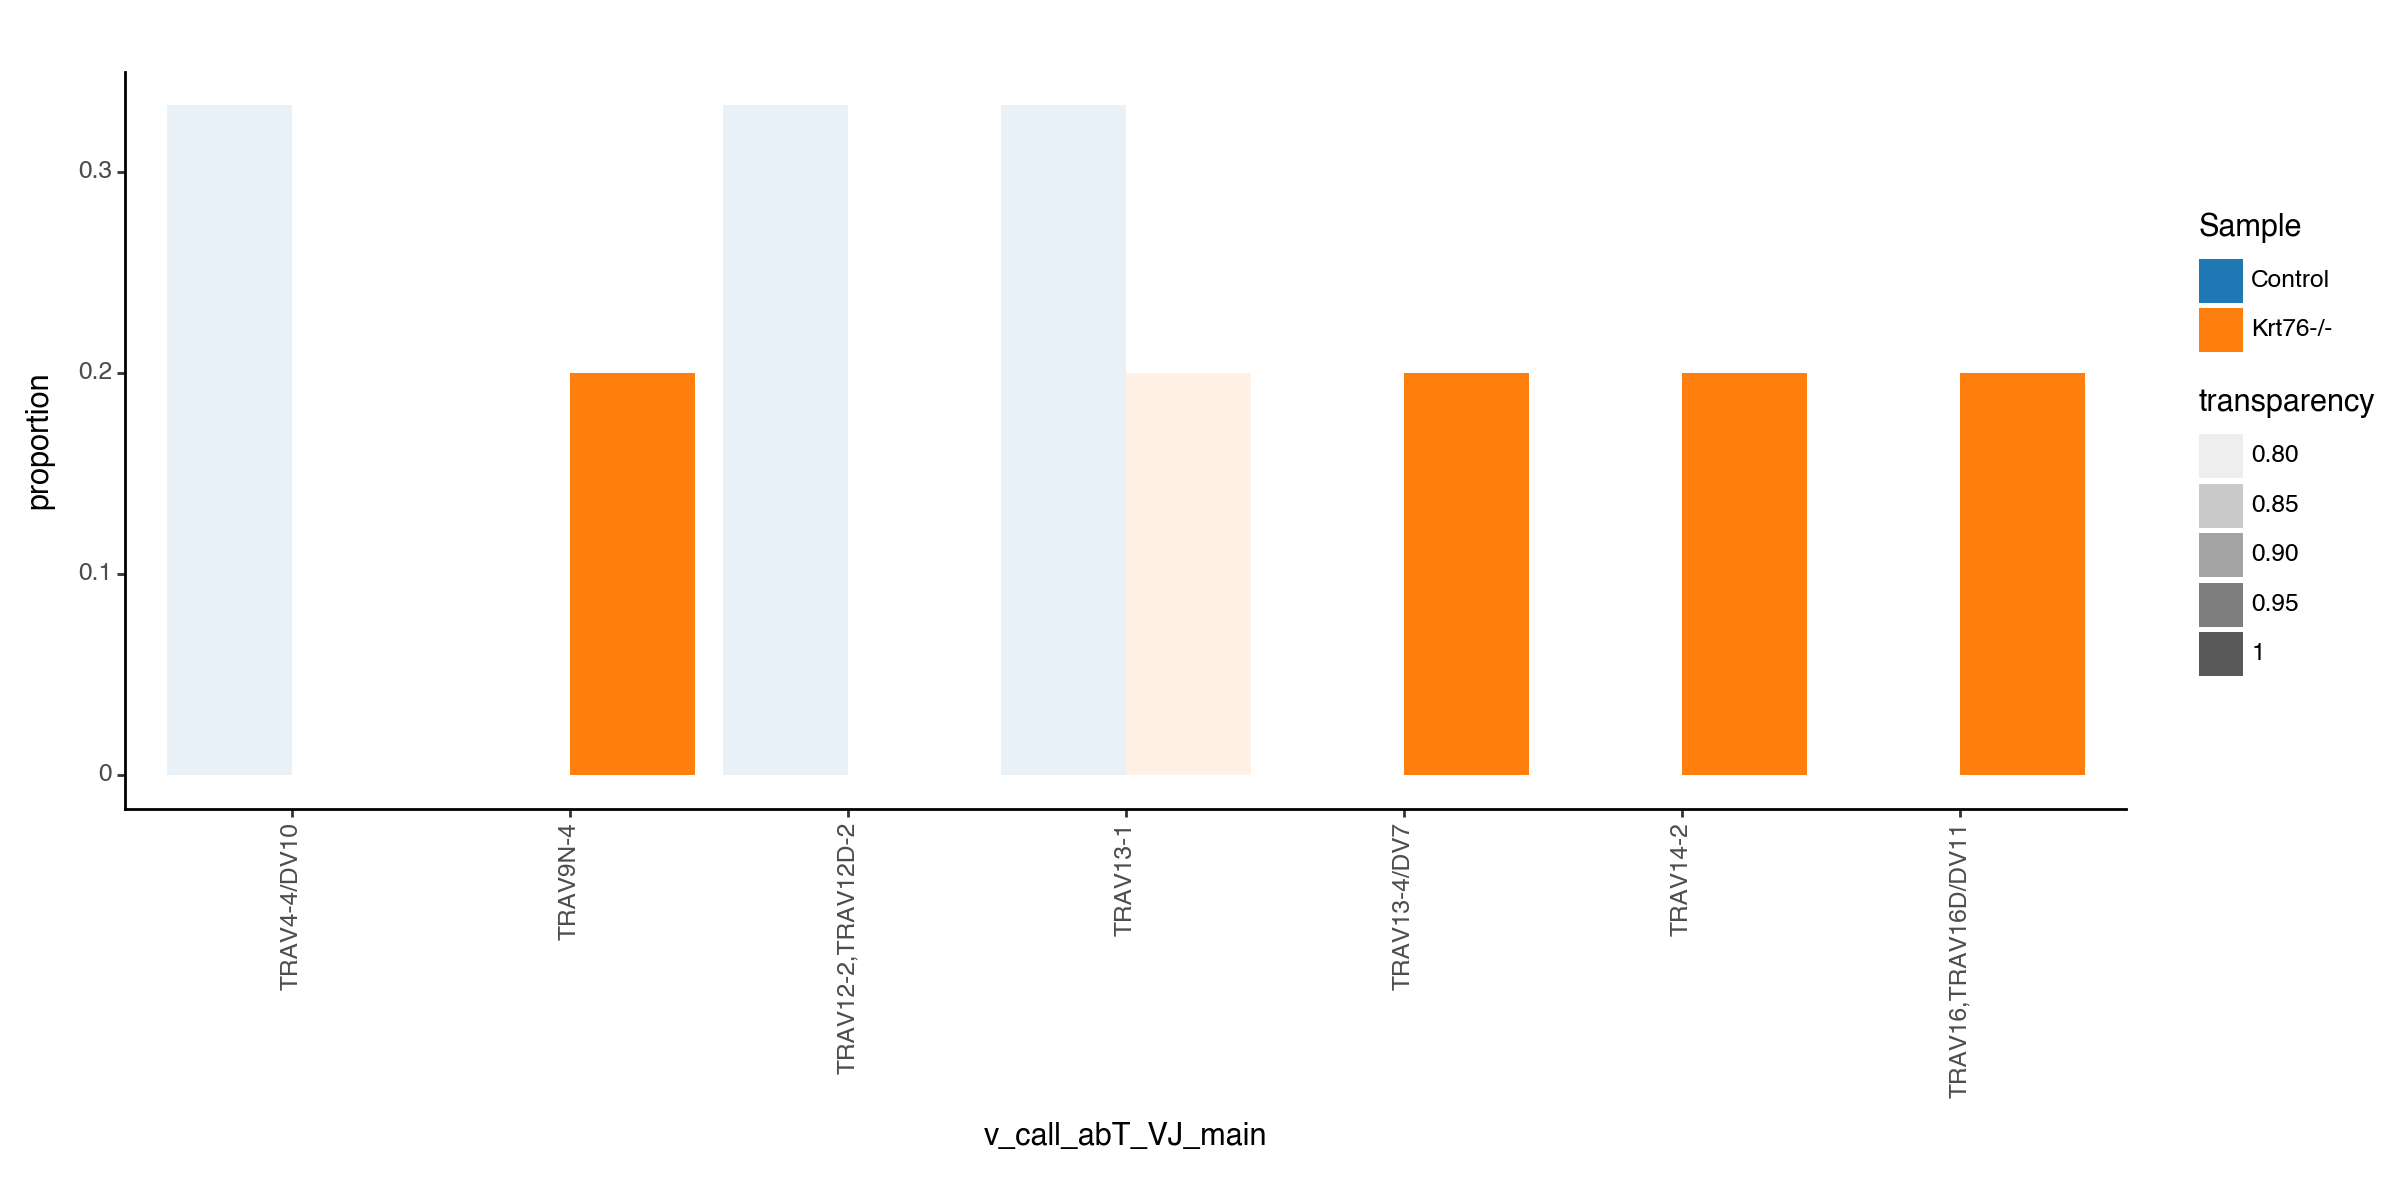

<Figure Size: (1200 x 600)>

In [1891]:
p

In [1892]:
p.save("VgeneAlphaChain_DN2b1_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN2b1_141223.pdf


### DN2b2 - V gene alpha chain

In [1893]:
adata_PF_DN2b2 = adata_PF[adata_PF.obs["leiden"] == "4 DN2b 2"]

In [1894]:
adata_PF_DN2b2

View of AnnData object with n_obs × n_vars = 95 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1895]:
working_df = pd.DataFrame(adata_PF_DN2b2.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                     
Control  TRAV4N-4,TRAV4D-4                    11
         TRAV16,TRAV16D/DV11                   5
         TRAV13-1                              4
         TRAV5-1                               3
         TRAV10                                3
...                                          ...
Krt76-/- TRAV6N-6                              0
         TRAV10N                               0
         TRAV7D-2,TRAV7-2                      0
         TRAV9D-1                              0
         TRAV13-1                              0

[92 rows x 1 columns]

In [1896]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample   v_call_abT_VJ_main  counts
0    Control    TRAV4N-4,TRAV4D-4      11
1    Control  TRAV16,TRAV16D/DV11       5
2    Control             TRAV13-1       4
3    Control              TRAV5-1       3
4    Control               TRAV10       3
..       ...                  ...     ...
87  Krt76-/-             TRAV6N-6       0
88  Krt76-/-              TRAV10N       0
89  Krt76-/-     TRAV7D-2,TRAV7-2       0
90  Krt76-/-             TRAV9D-1       0
91  Krt76-/-             TRAV13-1       0

[92 rows x 3 columns]

In [1897]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 55, 'Krt76-/-': 40}

In [1898]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1899]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control    TRAV4N-4,TRAV4D-4      11    0.200000
1    Control  TRAV16,TRAV16D/DV11       5    0.090909
2    Control             TRAV13-1       4    0.072727
3    Control              TRAV5-1       3    0.054545
4    Control               TRAV10       3    0.054545
..       ...                  ...     ...         ...
87  Krt76-/-             TRAV6N-6       0    0.000000
88  Krt76-/-              TRAV10N       0    0.000000
89  Krt76-/-     TRAV7D-2,TRAV7-2       0    0.000000
90  Krt76-/-             TRAV9D-1       0    0.000000
91  Krt76-/-             TRAV13-1       0    0.000000

[92 rows x 4 columns]

In [1900]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 55, 'Krt76-/-': 40}

In [1901]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1902]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control    TRAV4N-4,TRAV4D-4      11    0.200000
1    Control  TRAV16,TRAV16D/DV11       5    0.090909
2    Control             TRAV13-1       4    0.072727
3    Control              TRAV5-1       3    0.054545
4    Control               TRAV10       3    0.054545
..       ...                  ...     ...         ...
87  Krt76-/-             TRAV6N-6       0    0.000000
88  Krt76-/-              TRAV10N       0    0.000000
89  Krt76-/-     TRAV7D-2,TRAV7-2       0    0.000000
90  Krt76-/-             TRAV9D-1       0    0.000000
91  Krt76-/-             TRAV13-1       0    0.000000

[92 rows x 4 columns]

In [1903]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1904]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1905]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [1906]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [1907]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV2': inf,
 'TRAV3D-3,TRAV3N-3': 1.3750000000000002,
 'TRAV4-4/DV10': 0.6875000000000001,
 'TRAV4-4/DV10,TRAV4D-4': 0.0,
 'TRAV4D-2': inf,
 'TRAV4D-3,TRAV4-3': 0.0,
 'TRAV4D-3,TRAV4N-3': inf,
 'TRAV4N-4,TRAV4D-4': 0.125,
 'TRAV5-1': 0.45833333333333337,
 'TRAV5-4': inf,
 'TRAV6-4': 1.3750000000000002,
 'TRAV6-6,TRAV6D-6': 1.3750000000000002,
 'TRAV6-7/DV9': inf,
 'TRAV6D-3,TRAV6-3': 0.0,
 'TRAV6D-4': 0.0,
 'TRAV6D-7,TRAV6N-7': 1.3750000000000002,
 'TRAV6N-6': 0.0,
 'TRAV7D-2,TRAV7-2': 0.0,
 'TRAV7D-4,TRAV7-4': inf,
 'TRAV7D-5,TRAV7N-5': 0.0,
 'TRAV8-1': inf,
 'TRAV9-2': 0.0,
 'TRAV9D-1': 0.0,
 'TRAV10': 0.45833333333333337,
 'TRAV10D': inf,
 'TRAV10N': 0.0,
 'TRAV11D,TRAV11': 1.3750000000000002,
 'TRAV12-1,TRAV12D-1': inf,
 'TRAV12-2,TRAV12D-2': 1.3750000000000002,
 'TRAV12-3': inf,
 'TRAV12D-2,TRAV12N-2': 0.0,
 'TRAV12N-1,TRAV12-1,TRAV12D-1': 0.6875000000000001,
 'TRAV12N-3,TRAV12D-3': inf,
 'TRAV13-1': 0.0,
 'TRAV13-2': inf,
 'TRAV13-4/DV7': 0.0,
 'TRAV13D-1,TRAV13-1': 0.0,
 'TRA

In [1908]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample   v_call_abT_VJ_main  counts  proportion  foldchange
0    Control    TRAV4N-4,TRAV4D-4      11    0.200000    0.125000
1    Control  TRAV16,TRAV16D/DV11       5    0.090909    0.000000
2    Control             TRAV13-1       4    0.072727    0.000000
3    Control              TRAV5-1       3    0.054545    0.458333
4    Control               TRAV10       3    0.054545    0.458333
..       ...                  ...     ...         ...         ...
87  Krt76-/-             TRAV6N-6       0    0.000000    0.000000
88  Krt76-/-              TRAV10N       0    0.000000    0.000000
89  Krt76-/-     TRAV7D-2,TRAV7-2       0    0.000000    0.000000
90  Krt76-/-             TRAV9D-1       0    0.000000    0.000000
91  Krt76-/-             TRAV13-1       0    0.000000    0.000000

[92 rows x 5 columns]

In [1909]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1910]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1911]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1912]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

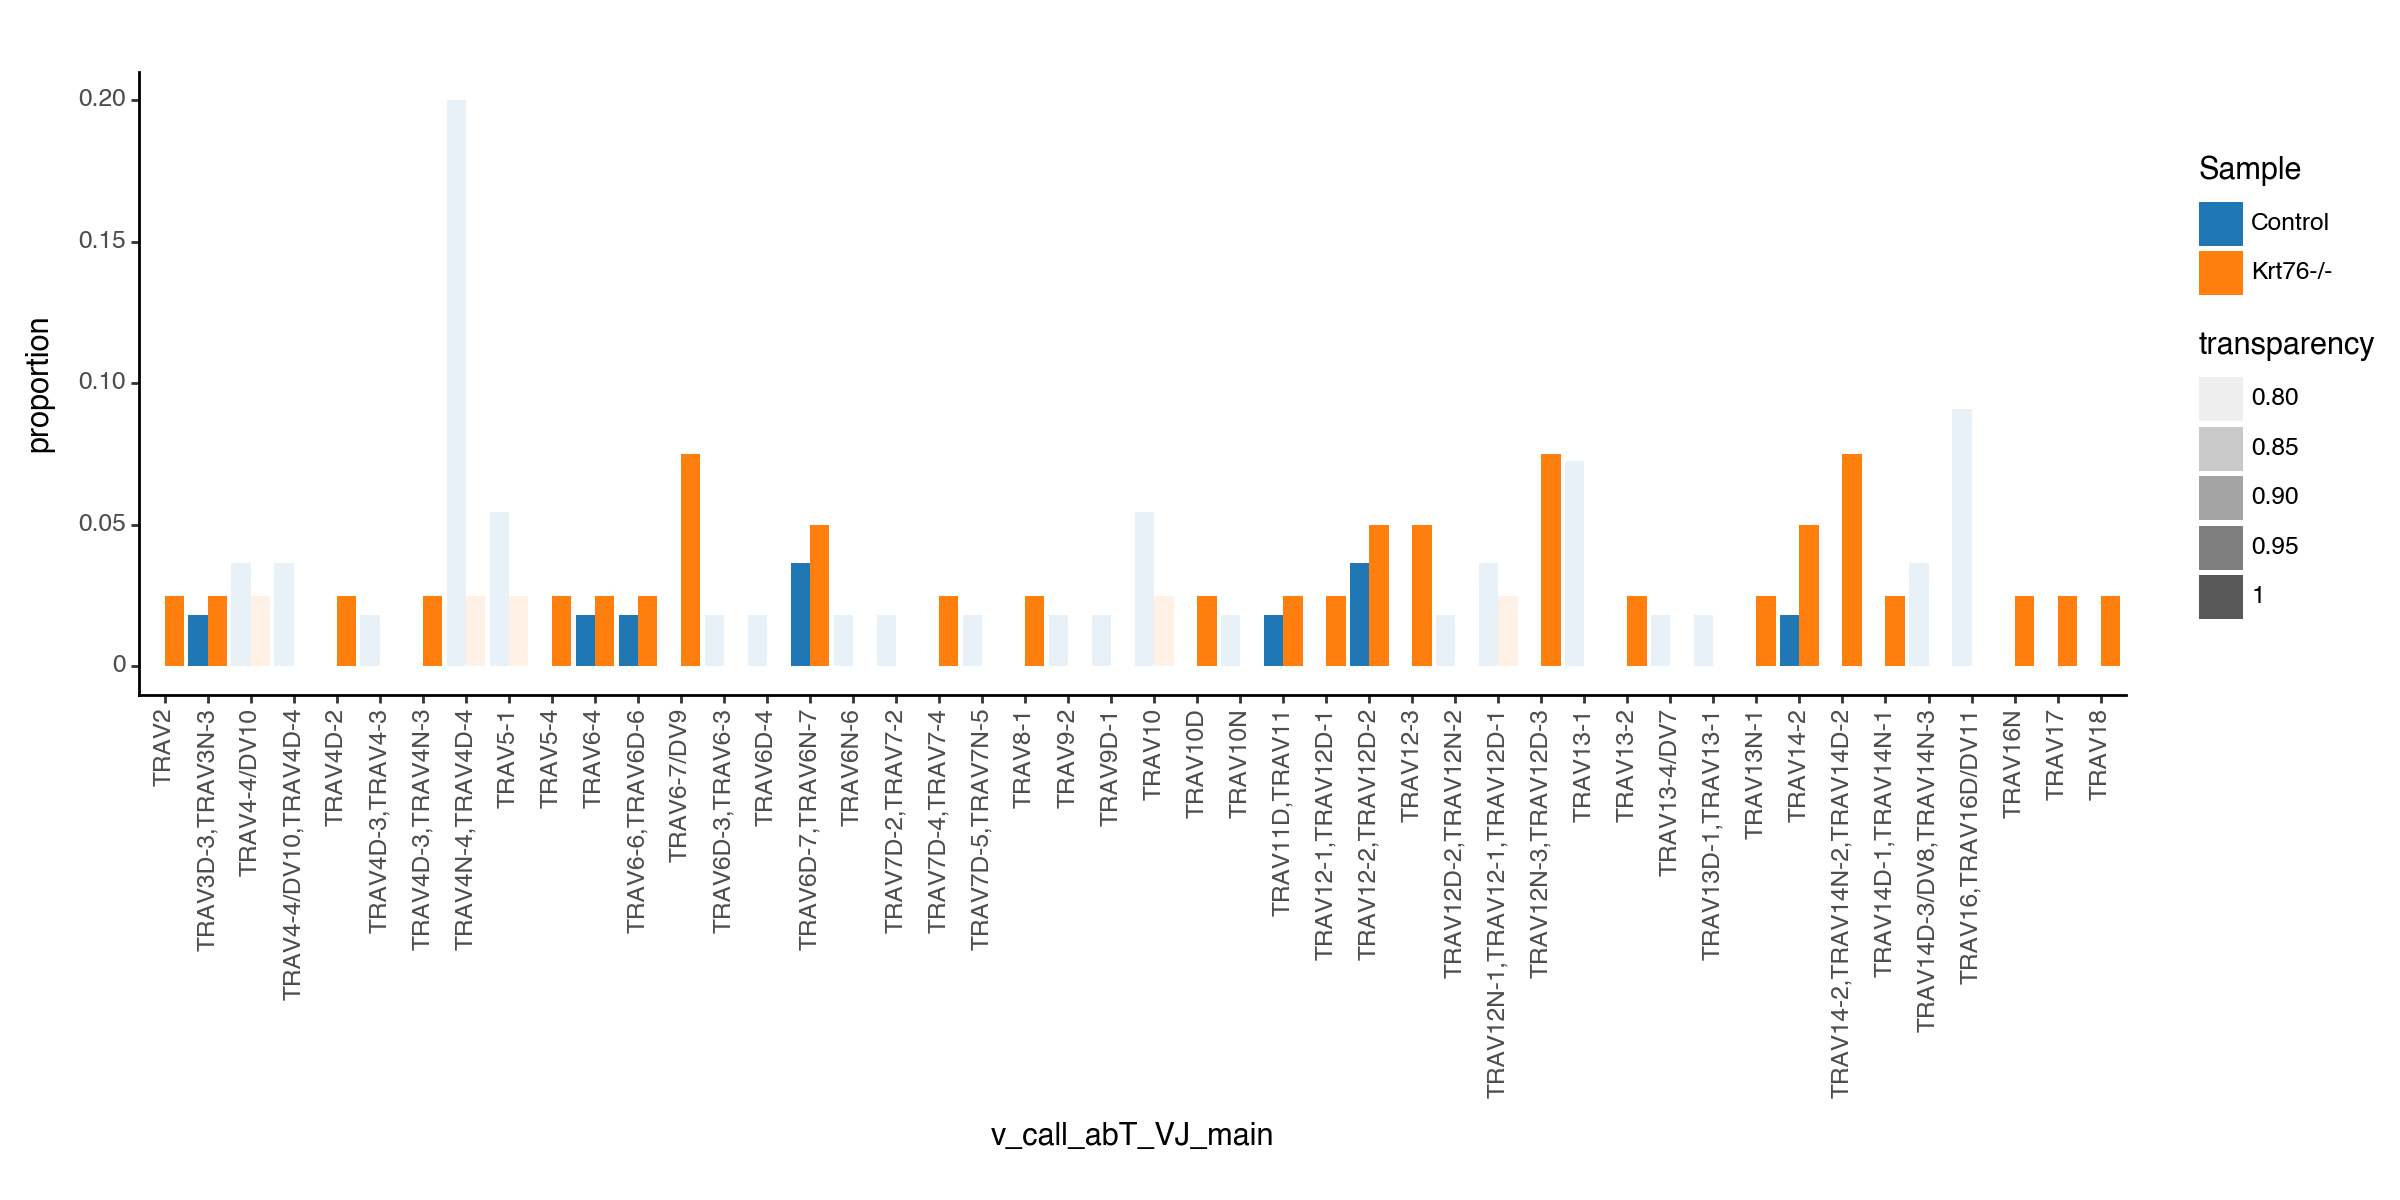

<Figure Size: (1200 x 600)>

In [1913]:
p

In [1914]:
p.save("VgeneAlphaChain_DN2b2_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN2b2_141223.pdf


### DN3 - V gene alpha chain

In [1915]:
adata_PF_DN3 = adata_PF[adata_PF.obs["leiden"] == "10 DN3"]

In [1916]:
adata_PF_DN3

View of AnnData object with n_obs × n_vars = 8 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', '

In [1917]:
working_df = pd.DataFrame(adata_PF_DN3.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                                 
Control  TRAV1                                             1
         TRAV5-4                                           1
         TRAV7-1                                           1
         TRAV8D-2                                          1
         TRAV12-1,TRAV12D-1                                1
         TRAV12-3                                          1
         TRAV13-2                                          0
         TRAV15-2/DV6-2,TRAV15D-2/DV6D-2                   0
Krt76-/- TRAV13-2                                          1
         TRAV15-2/DV6-2,TRAV15D-2/DV6D-2                   1
         TRAV1                                             0
         TRAV5-4                                           0
         TRAV7-1                                           0
         TRAV8D-2                                          0
         TRAV12-1,TRAV12D-1                                0
         TRAV12-3                                          0

In [1918]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample               v_call_abT_VJ_main  counts
0    Control                            TRAV1       1
1    Control                          TRAV5-4       1
2    Control                          TRAV7-1       1
3    Control                         TRAV8D-2       1
4    Control               TRAV12-1,TRAV12D-1       1
5    Control                         TRAV12-3       1
6    Control                         TRAV13-2       0
7    Control  TRAV15-2/DV6-2,TRAV15D-2/DV6D-2       0
8   Krt76-/-                         TRAV13-2       1
9   Krt76-/-  TRAV15-2/DV6-2,TRAV15D-2/DV6D-2       1
10  Krt76-/-                            TRAV1       0
11  Krt76-/-                          TRAV5-4       0
12  Krt76-/-                          TRAV7-1       0
13  Krt76-/-                         TRAV8D-2       0
14  Krt76-/-               TRAV12-1,TRAV12D-1       0
15  Krt76-/-                         TRAV12-3       0

In [1919]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 6, 'Krt76-/-': 2}

In [1920]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1921]:
working_df

Sample               v_call_abT_VJ_main  counts  proportion
0    Control                            TRAV1       1    0.166667
1    Control                          TRAV5-4       1    0.166667
2    Control                          TRAV7-1       1    0.166667
3    Control                         TRAV8D-2       1    0.166667
4    Control               TRAV12-1,TRAV12D-1       1    0.166667
5    Control                         TRAV12-3       1    0.166667
6    Control                         TRAV13-2       0    0.000000
7    Control  TRAV15-2/DV6-2,TRAV15D-2/DV6D-2       0    0.000000
8   Krt76-/-                         TRAV13-2       1    0.500000
9   Krt76-/-  TRAV15-2/DV6-2,TRAV15D-2/DV6D-2       1    0.500000
10  Krt76-/-                            TRAV1       0    0.000000
11  Krt76-/-                          TRAV5-4       0    0.000000
12  Krt76-/-                          TRAV7-1       0    0.000000
13  Krt76-/-                         TRAV8D-2       0    0.000000
14  Krt76-/-               TRAV12-1,TRAV12D-1       0    0.000000
15  Krt76-/-                         TRAV12-3       0    0.000000

In [1922]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 6, 'Krt76-/-': 2}

In [1923]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1924]:
working_df

Sample               v_call_abT_VJ_main  counts  proportion
0    Control                            TRAV1       1    0.166667
1    Control                          TRAV5-4       1    0.166667
2    Control                          TRAV7-1       1    0.166667
3    Control                         TRAV8D-2       1    0.166667
4    Control               TRAV12-1,TRAV12D-1       1    0.166667
5    Control                         TRAV12-3       1    0.166667
6    Control                         TRAV13-2       0    0.000000
7    Control  TRAV15-2/DV6-2,TRAV15D-2/DV6D-2       0    0.000000
8   Krt76-/-                         TRAV13-2       1    0.500000
9   Krt76-/-  TRAV15-2/DV6-2,TRAV15D-2/DV6D-2       1    0.500000
10  Krt76-/-                            TRAV1       0    0.000000
11  Krt76-/-                          TRAV5-4       0    0.000000
12  Krt76-/-                          TRAV7-1       0    0.000000
13  Krt76-/-                         TRAV8D-2       0    0.000000
14  Krt76-/-               TRAV12-1,TRAV12D-1       0    0.000000
15  Krt76-/-                         TRAV12-3       0    0.000000

In [1925]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1926]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1927]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [1928]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [1929]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.0,
 'TRAV5-4': 0.0,
 'TRAV7-1': 0.0,
 'TRAV8D-2': 0.0,
 'TRAV12-1,TRAV12D-1': 0.0,
 'TRAV12-3': 0.0,
 'TRAV13-2': inf,
 'TRAV15-2/DV6-2,TRAV15D-2/DV6D-2': inf}

In [1930]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample               v_call_abT_VJ_main  counts  proportion  foldchange
0    Control                            TRAV1       1    0.166667         0.0
1    Control                          TRAV5-4       1    0.166667         0.0
2    Control                          TRAV7-1       1    0.166667         0.0
3    Control                         TRAV8D-2       1    0.166667         0.0
4    Control               TRAV12-1,TRAV12D-1       1    0.166667         0.0
5    Control                         TRAV12-3       1    0.166667         0.0
6    Control                         TRAV13-2       0    0.000000         inf
7    Control  TRAV15-2/DV6-2,TRAV15D-2/DV6D-2       0    0.000000         inf
8   Krt76-/-                         TRAV13-2       1    0.500000         inf
9   Krt76-/-  TRAV15-2/DV6-2,TRAV15D-2/DV6D-2       1    0.500000         inf
10  Krt76-/-                            TRAV1       0    0.000000         0.0
11  Krt76-/-                          TRAV5-4       0    0.000000         0.0
12  Krt76-/-                          TRAV7-1       0    0.000000         0.0
13  Krt76-/-                         TRAV8D-2       0    0.000000         0.0
14  Krt76-/-               TRAV12-1,TRAV12D-1       0    0.000000         0.0
15  Krt76-/-                         TRAV12-3       0    0.000000         0.0

In [1931]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1932]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1933]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1934]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

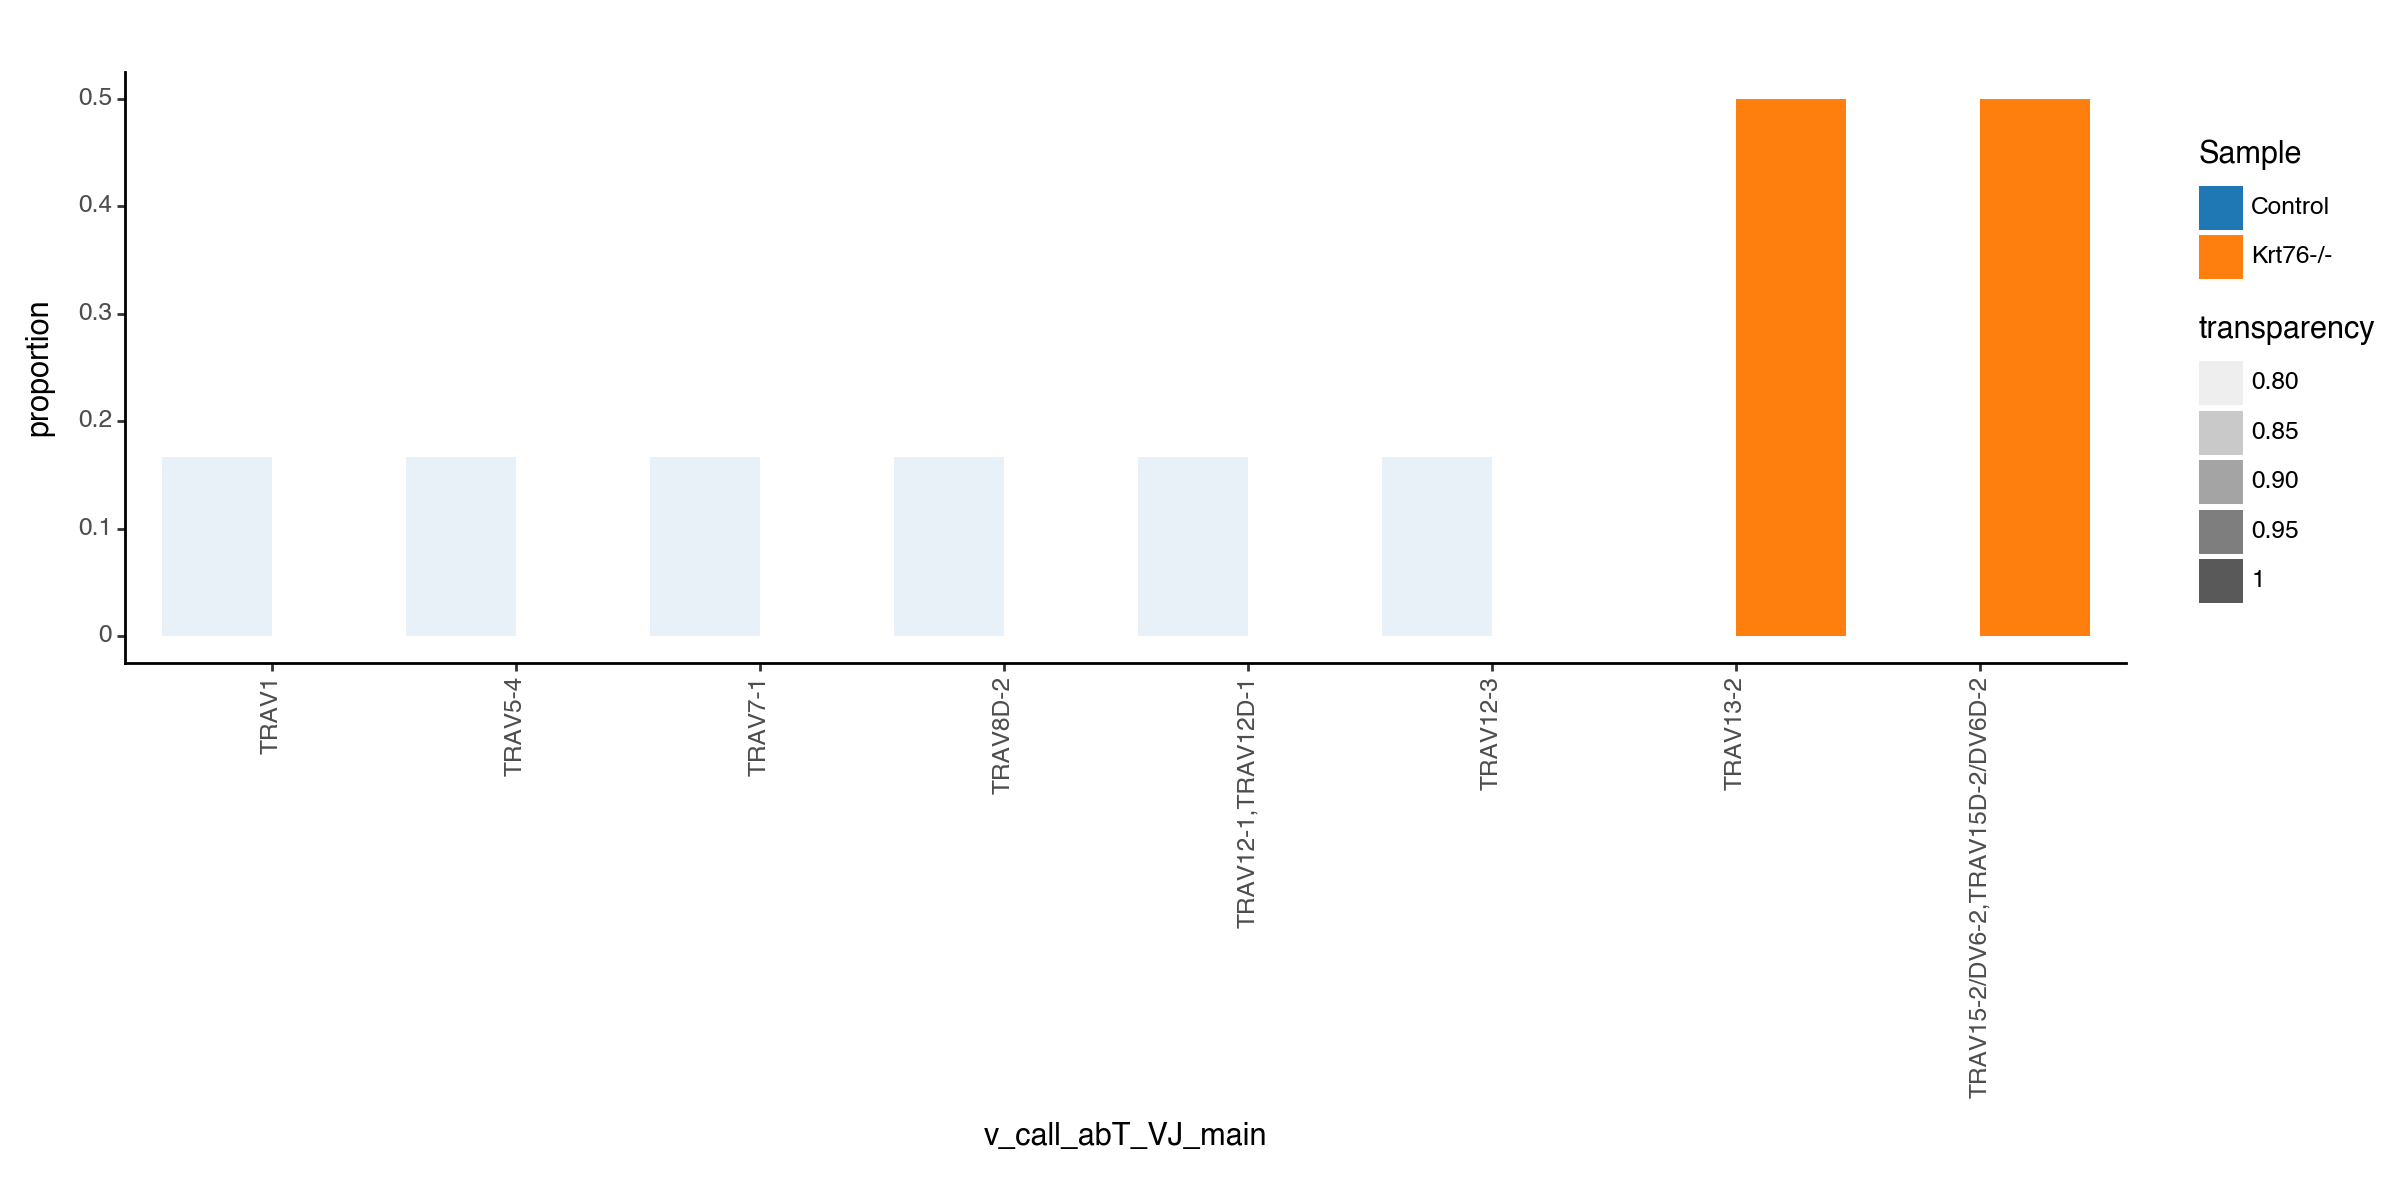

<Figure Size: (1200 x 600)>

In [1935]:
p

In [1936]:
p.save("VgeneAlphaChain_DN3_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN3_141223.pdf


### DN3a - V gene alpha chain

In [1937]:
adata_PF_DN3a = adata_PF[adata_PF.obs["leiden"] == "0 DN3a"]

In [1938]:
adata_PF_DN3a

View of AnnData object with n_obs × n_vars = 35 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1939]:
working_df = pd.DataFrame(adata_PF_DN3a.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                         
Control  TRAV6D-7,TRAV6N-7                         2
         TRAV1                                     1
         TRAV7D-2,TRAV7-2                          1
         TRAV14D-3/DV8,TRAV14N-3                   1
         TRAV13D-2,TRAV13N-2                       1
         TRAV13D-1                                 1
         TRAV13-1                                  1
         TRAV12D-2,TRAV12N-2                       1
         TRAV10N                                   1
         TRAV10                                    1
         TRAV9N-4                                  1
         TRAV7D-4                                  1
         TRAV8-1                                   1
         TRAV7-3                                   1
         TRAV6-5                                   1
         TRAV4N-4,TRAV4D-4                         1
         TRAV4D-3,TRAV4N-3                         1
         TRAV4D-3,TRAV4-3                          1
         TRAV15-2/DV6-2                            1
         TRAV4-2                                   0
         TRAV9N-2,TRAV9D-2                         0
         TRAV6N-6                                  0
         TRAV6D-3                                  0
         TRAV6-1                                   0
         TRAV5-1                                   0
         TRAV13-2                                  0
         TRAV13N-1                                 0
         TRAV14D-1,TRAV14N-1                       0
Krt76-/- TRAV13-2                                  2
         TRAV13-1                                  2
         TRAV4-2                                   1
         TRAV4D-3,TRAV4-3                          1
         TRAV9N-4                                  1
         TRAV14D-1,TRAV14N-1                       1
         TRAV5-1                                   1
         TRAV6-1                                   1
         TRAV13N-1                                 1
         TRAV6D-3                                  1
         TRAV10N                                   1
         TRAV6N-6                                  1
         TRAV9N-2,TRAV9D-2                         1
         TRAV1                                     0
         TRAV13D-2,TRAV13N-2                       0
         TRAV13D-1                                 0
         TRAV14D-3/DV8,TRAV14N-3                   0
         TRAV12D-2,TRAV12N-2                       0
         TRAV8-1                                   0
         TRAV10                                    0
         TRAV7D-4                                  0
         TRAV7D-2,TRAV7-2                          0
         TRAV7-3                                   0
         TRAV6D-7,TRAV6N-7                         0
         TRAV6-5                                   0
         TRAV4N-4,TRAV4D-4                         0
         TRAV4D-3,TRAV4N-3                         0
         TRAV15-2/DV6-2                            0

In [1940]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample       v_call_abT_VJ_main  counts
0    Control        TRAV6D-7,TRAV6N-7       2
1    Control                    TRAV1       1
2    Control         TRAV7D-2,TRAV7-2       1
3    Control  TRAV14D-3/DV8,TRAV14N-3       1
4    Control      TRAV13D-2,TRAV13N-2       1
5    Control                TRAV13D-1       1
6    Control                 TRAV13-1       1
7    Control      TRAV12D-2,TRAV12N-2       1
8    Control                  TRAV10N       1
9    Control                   TRAV10       1
10   Control                 TRAV9N-4       1
11   Control                 TRAV7D-4       1
12   Control                  TRAV8-1       1
13   Control                  TRAV7-3       1
14   Control                  TRAV6-5       1
15   Control        TRAV4N-4,TRAV4D-4       1
16   Control        TRAV4D-3,TRAV4N-3       1
17   Control         TRAV4D-3,TRAV4-3       1
18   Control           TRAV15-2/DV6-2       1
19   Control                  TRAV4-2       0
20   Control        TRAV9N-2,TRAV9D-2       0
21   Control                 TRAV6N-6       0
22   Control                 TRAV6D-3       0
23   Control                  TRAV6-1       0
24   Control                  TRAV5-1       0
25   Control                 TRAV13-2       0
26   Control                TRAV13N-1       0
27   Control      TRAV14D-1,TRAV14N-1       0
28  Krt76-/-                 TRAV13-2       2
29  Krt76-/-                 TRAV13-1       2
30  Krt76-/-                  TRAV4-2       1
31  Krt76-/-         TRAV4D-3,TRAV4-3       1
32  Krt76-/-                 TRAV9N-4       1
33  Krt76-/-      TRAV14D-1,TRAV14N-1       1
34  Krt76-/-                  TRAV5-1       1
35  Krt76-/-                  TRAV6-1       1
36  Krt76-/-                TRAV13N-1       1
37  Krt76-/-                 TRAV6D-3       1
38  Krt76-/-                  TRAV10N       1
39  Krt76-/-                 TRAV6N-6       1
40  Krt76-/-        TRAV9N-2,TRAV9D-2       1
41  Krt76-/-                    TRAV1       0
42  Krt76-/-      TRAV13D-2,TRAV13N-2       0
43  Krt76-/-                TRAV13D-1       0
44  Krt76-/-  TRAV14D-3/DV8,TRAV14N-3       0
45  Krt76-/-      TRAV12D-2,TRAV12N-2       0
46  Krt76-/-                  TRAV8-1       0
47  Krt76-/-                   TRAV10       0
48  Krt76-/-                 TRAV7D-4       0
49  Krt76-/-         TRAV7D-2,TRAV7-2       0
50  Krt76-/-                  TRAV7-3       0
51  Krt76-/-        TRAV6D-7,TRAV6N-7       0
52  Krt76-/-                  TRAV6-5       0
53  Krt76-/-        TRAV4N-4,TRAV4D-4       0
54  Krt76-/-        TRAV4D-3,TRAV4N-3       0
55  Krt76-/-           TRAV15-2/DV6-2       0

In [1941]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 20, 'Krt76-/-': 15}

In [1942]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1943]:
working_df

Sample       v_call_abT_VJ_main  counts  proportion
0    Control        TRAV6D-7,TRAV6N-7       2    0.100000
1    Control                    TRAV1       1    0.050000
2    Control         TRAV7D-2,TRAV7-2       1    0.050000
3    Control  TRAV14D-3/DV8,TRAV14N-3       1    0.050000
4    Control      TRAV13D-2,TRAV13N-2       1    0.050000
5    Control                TRAV13D-1       1    0.050000
6    Control                 TRAV13-1       1    0.050000
7    Control      TRAV12D-2,TRAV12N-2       1    0.050000
8    Control                  TRAV10N       1    0.050000
9    Control                   TRAV10       1    0.050000
10   Control                 TRAV9N-4       1    0.050000
11   Control                 TRAV7D-4       1    0.050000
12   Control                  TRAV8-1       1    0.050000
13   Control                  TRAV7-3       1    0.050000
14   Control                  TRAV6-5       1    0.050000
15   Control        TRAV4N-4,TRAV4D-4       1    0.050000
16   Control        TRAV4D-3,TRAV4N-3       1    0.050000
17   Control         TRAV4D-3,TRAV4-3       1    0.050000
18   Control           TRAV15-2/DV6-2       1    0.050000
19   Control                  TRAV4-2       0    0.000000
20   Control        TRAV9N-2,TRAV9D-2       0    0.000000
21   Control                 TRAV6N-6       0    0.000000
22   Control                 TRAV6D-3       0    0.000000
23   Control                  TRAV6-1       0    0.000000
24   Control                  TRAV5-1       0    0.000000
25   Control                 TRAV13-2       0    0.000000
26   Control                TRAV13N-1       0    0.000000
27   Control      TRAV14D-1,TRAV14N-1       0    0.000000
28  Krt76-/-                 TRAV13-2       2    0.133333
29  Krt76-/-                 TRAV13-1       2    0.133333
30  Krt76-/-                  TRAV4-2       1    0.066667
31  Krt76-/-         TRAV4D-3,TRAV4-3       1    0.066667
32  Krt76-/-                 TRAV9N-4       1    0.066667
33  Krt76-/-      TRAV14D-1,TRAV14N-1       1    0.066667
34  Krt76-/-                  TRAV5-1       1    0.066667
35  Krt76-/-                  TRAV6-1       1    0.066667
36  Krt76-/-                TRAV13N-1       1    0.066667
37  Krt76-/-                 TRAV6D-3       1    0.066667
38  Krt76-/-                  TRAV10N       1    0.066667
39  Krt76-/-                 TRAV6N-6       1    0.066667
40  Krt76-/-        TRAV9N-2,TRAV9D-2       1    0.066667
41  Krt76-/-                    TRAV1       0    0.000000
42  Krt76-/-      TRAV13D-2,TRAV13N-2       0    0.000000
43  Krt76-/-                TRAV13D-1       0    0.000000
44  Krt76-/-  TRAV14D-3/DV8,TRAV14N-3       0    0.000000
45  Krt76-/-      TRAV12D-2,TRAV12N-2       0    0.000000
46  Krt76-/-                  TRAV8-1       0    0.000000
47  Krt76-/-                   TRAV10       0    0.000000
48  Krt76-/-                 TRAV7D-4       0    0.000000
49  Krt76-/-         TRAV7D-2,TRAV7-2       0    0.000000
50  Krt76-/-                  TRAV7-3       0    0.000000
51  Krt76-/-        TRAV6D-7,TRAV6N-7       0    0.000000
52  Krt76-/-                  TRAV6-5       0    0.000000
53  Krt76-/-        TRAV4N-4,TRAV4D-4       0    0.000000
54  Krt76-/-        TRAV4D-3,TRAV4N-3       0    0.000000
55  Krt76-/-           TRAV15-2/DV6-2       0    0.000000

In [1944]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 20, 'Krt76-/-': 15}

In [1945]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1946]:
working_df

Sample       v_call_abT_VJ_main  counts  proportion
0    Control        TRAV6D-7,TRAV6N-7       2    0.100000
1    Control                    TRAV1       1    0.050000
2    Control         TRAV7D-2,TRAV7-2       1    0.050000
3    Control  TRAV14D-3/DV8,TRAV14N-3       1    0.050000
4    Control      TRAV13D-2,TRAV13N-2       1    0.050000
5    Control                TRAV13D-1       1    0.050000
6    Control                 TRAV13-1       1    0.050000
7    Control      TRAV12D-2,TRAV12N-2       1    0.050000
8    Control                  TRAV10N       1    0.050000
9    Control                   TRAV10       1    0.050000
10   Control                 TRAV9N-4       1    0.050000
11   Control                 TRAV7D-4       1    0.050000
12   Control                  TRAV8-1       1    0.050000
13   Control                  TRAV7-3       1    0.050000
14   Control                  TRAV6-5       1    0.050000
15   Control        TRAV4N-4,TRAV4D-4       1    0.050000
16   Control        TRAV4D-3,TRAV4N-3       1    0.050000
17   Control         TRAV4D-3,TRAV4-3       1    0.050000
18   Control           TRAV15-2/DV6-2       1    0.050000
19   Control                  TRAV4-2       0    0.000000
20   Control        TRAV9N-2,TRAV9D-2       0    0.000000
21   Control                 TRAV6N-6       0    0.000000
22   Control                 TRAV6D-3       0    0.000000
23   Control                  TRAV6-1       0    0.000000
24   Control                  TRAV5-1       0    0.000000
25   Control                 TRAV13-2       0    0.000000
26   Control                TRAV13N-1       0    0.000000
27   Control      TRAV14D-1,TRAV14N-1       0    0.000000
28  Krt76-/-                 TRAV13-2       2    0.133333
29  Krt76-/-                 TRAV13-1       2    0.133333
30  Krt76-/-                  TRAV4-2       1    0.066667
31  Krt76-/-         TRAV4D-3,TRAV4-3       1    0.066667
32  Krt76-/-                 TRAV9N-4       1    0.066667
33  Krt76-/-      TRAV14D-1,TRAV14N-1       1    0.066667
34  Krt76-/-                  TRAV5-1       1    0.066667
35  Krt76-/-                  TRAV6-1       1    0.066667
36  Krt76-/-                TRAV13N-1       1    0.066667
37  Krt76-/-                 TRAV6D-3       1    0.066667
38  Krt76-/-                  TRAV10N       1    0.066667
39  Krt76-/-                 TRAV6N-6       1    0.066667
40  Krt76-/-        TRAV9N-2,TRAV9D-2       1    0.066667
41  Krt76-/-                    TRAV1       0    0.000000
42  Krt76-/-      TRAV13D-2,TRAV13N-2       0    0.000000
43  Krt76-/-                TRAV13D-1       0    0.000000
44  Krt76-/-  TRAV14D-3/DV8,TRAV14N-3       0    0.000000
45  Krt76-/-      TRAV12D-2,TRAV12N-2       0    0.000000
46  Krt76-/-                  TRAV8-1       0    0.000000
47  Krt76-/-                   TRAV10       0    0.000000
48  Krt76-/-                 TRAV7D-4       0    0.000000
49  Krt76-/-         TRAV7D-2,TRAV7-2       0    0.000000
50  Krt76-/-                  TRAV7-3       0    0.000000
51  Krt76-/-        TRAV6D-7,TRAV6N-7       0    0.000000
52  Krt76-/-                  TRAV6-5       0    0.000000
53  Krt76-/-        TRAV4N-4,TRAV4D-4       0    0.000000
54  Krt76-/-        TRAV4D-3,TRAV4N-3       0    0.000000
55  Krt76-/-           TRAV15-2/DV6-2       0    0.000000

In [1947]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1948]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1949]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [1950]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [1951]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.0,
 'TRAV4-2': inf,
 'TRAV4D-3,TRAV4-3': 1.3333333333333333,
 'TRAV4D-3,TRAV4N-3': 0.0,
 'TRAV4N-4,TRAV4D-4': 0.0,
 'TRAV5-1': inf,
 'TRAV6-1': inf,
 'TRAV6-5': 0.0,
 'TRAV6D-3': inf,
 'TRAV6D-7,TRAV6N-7': 0.0,
 'TRAV6N-6': inf,
 'TRAV7-3': 0.0,
 'TRAV7D-2,TRAV7-2': 0.0,
 'TRAV7D-4': 0.0,
 'TRAV8-1': 0.0,
 'TRAV9N-2,TRAV9D-2': inf,
 'TRAV9N-4': 1.3333333333333333,
 'TRAV10': 0.0,
 'TRAV10N': 1.3333333333333333,
 'TRAV12D-2,TRAV12N-2': 0.0,
 'TRAV13-1': 2.6666666666666665,
 'TRAV13-2': inf,
 'TRAV13D-1': 0.0,
 'TRAV13D-2,TRAV13N-2': 0.0,
 'TRAV13N-1': inf,
 'TRAV14D-1,TRAV14N-1': inf,
 'TRAV14D-3/DV8,TRAV14N-3': 0.0,
 'TRAV15-2/DV6-2': 0.0}

In [1952]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample       v_call_abT_VJ_main  counts  proportion  foldchange
0    Control        TRAV6D-7,TRAV6N-7       2    0.100000    0.000000
1    Control                    TRAV1       1    0.050000    0.000000
2    Control         TRAV7D-2,TRAV7-2       1    0.050000    0.000000
3    Control  TRAV14D-3/DV8,TRAV14N-3       1    0.050000    0.000000
4    Control      TRAV13D-2,TRAV13N-2       1    0.050000    0.000000
5    Control                TRAV13D-1       1    0.050000    0.000000
6    Control                 TRAV13-1       1    0.050000    2.666667
7    Control      TRAV12D-2,TRAV12N-2       1    0.050000    0.000000
8    Control                  TRAV10N       1    0.050000    1.333333
9    Control                   TRAV10       1    0.050000    0.000000
10   Control                 TRAV9N-4       1    0.050000    1.333333
11   Control                 TRAV7D-4       1    0.050000    0.000000
12   Control                  TRAV8-1       1    0.050000    0.000000
13   Control                  TRAV7-3       1    0.050000    0.000000
14   Control                  TRAV6-5       1    0.050000    0.000000
15   Control        TRAV4N-4,TRAV4D-4       1    0.050000    0.000000
16   Control        TRAV4D-3,TRAV4N-3       1    0.050000    0.000000
17   Control         TRAV4D-3,TRAV4-3       1    0.050000    1.333333
18   Control           TRAV15-2/DV6-2       1    0.050000    0.000000
19   Control                  TRAV4-2       0    0.000000         inf
20   Control        TRAV9N-2,TRAV9D-2       0    0.000000         inf
21   Control                 TRAV6N-6       0    0.000000         inf
22   Control                 TRAV6D-3       0    0.000000         inf
23   Control                  TRAV6-1       0    0.000000         inf
24   Control                  TRAV5-1       0    0.000000         inf
25   Control                 TRAV13-2       0    0.000000         inf
26   Control                TRAV13N-1       0    0.000000         inf
27   Control      TRAV14D-1,TRAV14N-1       0    0.000000         inf
28  Krt76-/-                 TRAV13-2       2    0.133333         inf
29  Krt76-/-                 TRAV13-1       2    0.133333    2.666667
30  Krt76-/-                  TRAV4-2       1    0.066667         inf
31  Krt76-/-         TRAV4D-3,TRAV4-3       1    0.066667    1.333333
32  Krt76-/-                 TRAV9N-4       1    0.066667    1.333333
33  Krt76-/-      TRAV14D-1,TRAV14N-1       1    0.066667         inf
34  Krt76-/-                  TRAV5-1       1    0.066667         inf
35  Krt76-/-                  TRAV6-1       1    0.066667         inf
36  Krt76-/-                TRAV13N-1       1    0.066667         inf
37  Krt76-/-                 TRAV6D-3       1    0.066667         inf
38  Krt76-/-                  TRAV10N       1    0.066667    1.333333
39  Krt76-/-                 TRAV6N-6       1    0.066667         inf
40  Krt76-/-        TRAV9N-2,TRAV9D-2       1    0.066667         inf
41  Krt76-/-                    TRAV1       0    0.000000    0.000000
42  Krt76-/-      TRAV13D-2,TRAV13N-2       0    0.000000    0.000000
43  Krt76-/-                TRAV13D-1       0    0.000000    0.000000
44  Krt76-/-  TRAV14D-3/DV8,TRAV14N-3       0    0.000000    0.000000
45  Krt76-/-      TRAV12D-2,TRAV12N-2       0    0.000000    0.000000
46  Krt76-/-                  TRAV8-1       0    0.000000    0.000000
47  Krt76-/-                   TRAV10       0    0.000000    0.000000
48  Krt76-/-                 TRAV7D-4       0    0.000000    0.000000
49  Krt76-/-         TRAV7D-2,TRAV7-2       0    0.000000    0.000000
50  Krt76-/-                  TRAV7-3       0    0.000000    0.000000
51  Krt76-/-        TRAV6D-7,TRAV6N-7       0    0.000000    0.000000
52  Krt76-/-                  TRAV6-5       0    0.000000    0.000000
53  Krt76-/-        TRAV4N-4,TRAV4D-4       0    0.000000    0.000000
54  Krt76-/-        TRAV4D-3,TRAV4N-3       0    0.000000    0.000000
55  Krt76-/-           TRAV15-2/DV6-2       0    0.000000    0.000000

In [1953]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1954]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1955]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1956]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

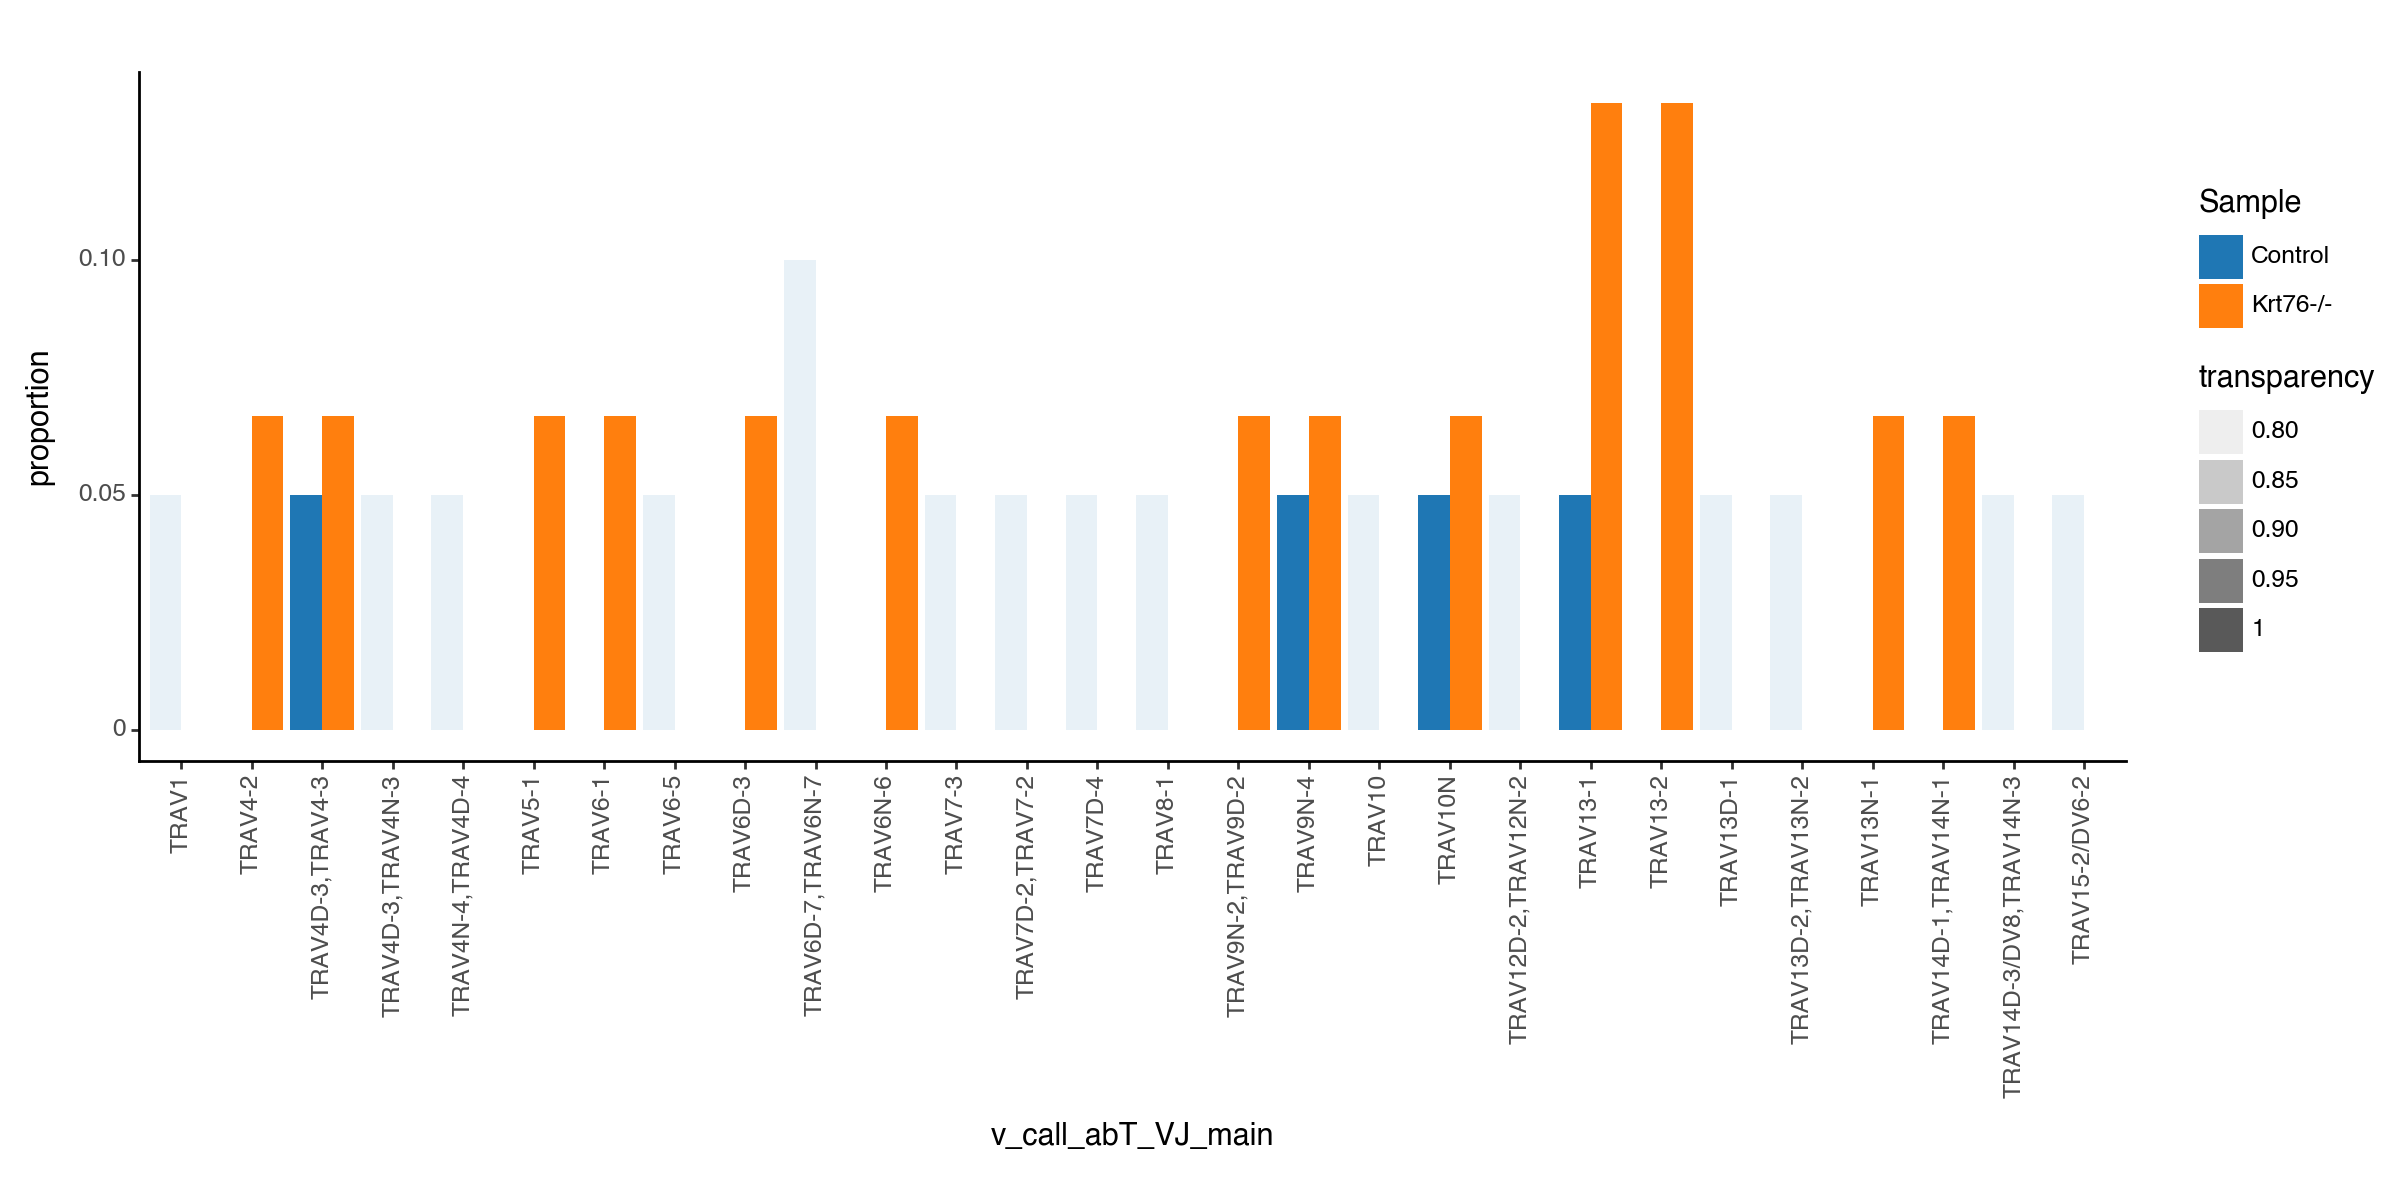

<Figure Size: (1200 x 600)>

In [1957]:
p

In [1958]:
p.save("VgeneAlphaChain_DN3a_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN3a_141223.pdf


### DN3ab - V gene alpha chain

In [1959]:
adata_PF_DN3ab = adata_PF[adata_PF.obs["leiden"] == "1 DN3a / DN3b"]

In [1960]:
adata_PF_DN3ab

View of AnnData object with n_obs × n_vars = 43 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1961]:
working_df = pd.DataFrame(adata_PF_DN3ab.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                            
Control  TRAV4D-3,TRAV4N-3                            2
         TRAV3D-3,TRAV3N-3                            2
         TRAV3-3                                      1
         TRAV7D-4,TRAV7-4                             1
         TRAV15D-2/DV6D-2,TRAV15N-2                   1
...                                                 ...
Krt76-/- TRAV5-4                                      0
         TRAV5-1                                      0
         TRAV4D-3,TRAV4N-3                            0
         TRAV4-4/DV10                                 0
         TRAV7N-4                                     0

[72 rows x 1 columns]

In [1962]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample          v_call_abT_VJ_main  counts
0    Control           TRAV4D-3,TRAV4N-3       2
1    Control           TRAV3D-3,TRAV3N-3       2
2    Control                     TRAV3-3       1
3    Control            TRAV7D-4,TRAV7-4       1
4    Control  TRAV15D-2/DV6D-2,TRAV15N-2       1
..       ...                         ...     ...
67  Krt76-/-                     TRAV5-4       0
68  Krt76-/-                     TRAV5-1       0
69  Krt76-/-           TRAV4D-3,TRAV4N-3       0
70  Krt76-/-                TRAV4-4/DV10       0
71  Krt76-/-                    TRAV7N-4       0

[72 rows x 3 columns]

In [1963]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 26, 'Krt76-/-': 17}

In [1964]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1965]:
working_df

Sample          v_call_abT_VJ_main  counts  proportion
0    Control           TRAV4D-3,TRAV4N-3       2    0.076923
1    Control           TRAV3D-3,TRAV3N-3       2    0.076923
2    Control                     TRAV3-3       1    0.038462
3    Control            TRAV7D-4,TRAV7-4       1    0.038462
4    Control  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.038462
..       ...                         ...     ...         ...
67  Krt76-/-                     TRAV5-4       0    0.000000
68  Krt76-/-                     TRAV5-1       0    0.000000
69  Krt76-/-           TRAV4D-3,TRAV4N-3       0    0.000000
70  Krt76-/-                TRAV4-4/DV10       0    0.000000
71  Krt76-/-                    TRAV7N-4       0    0.000000

[72 rows x 4 columns]

In [1966]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 26, 'Krt76-/-': 17}

In [1967]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1968]:
working_df

Sample          v_call_abT_VJ_main  counts  proportion
0    Control           TRAV4D-3,TRAV4N-3       2    0.076923
1    Control           TRAV3D-3,TRAV3N-3       2    0.076923
2    Control                     TRAV3-3       1    0.038462
3    Control            TRAV7D-4,TRAV7-4       1    0.038462
4    Control  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.038462
..       ...                         ...     ...         ...
67  Krt76-/-                     TRAV5-4       0    0.000000
68  Krt76-/-                     TRAV5-1       0    0.000000
69  Krt76-/-           TRAV4D-3,TRAV4N-3       0    0.000000
70  Krt76-/-                TRAV4-4/DV10       0    0.000000
71  Krt76-/-                    TRAV7N-4       0    0.000000

[72 rows x 4 columns]

In [1969]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1970]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1971]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [1972]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [1973]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV3-3': 0.0,
 'TRAV3D-3,TRAV3N-3': 0.0,
 'TRAV4-4/DV10': 0.0,
 'TRAV4D-3,TRAV4N-3': 0.0,
 'TRAV5-1': 0.0,
 'TRAV5-4': 0.0,
 'TRAV5D-4,TRAV5N-4': inf,
 'TRAV6-6,TRAV6D-6': 0.0,
 'TRAV6-7/DV9': inf,
 'TRAV6D-3,TRAV6-3': 0.0,
 'TRAV6D-5': inf,
 'TRAV6D-5,TRAV6N-5': 0.0,
 'TRAV6D-7,TRAV6N-7': inf,
 'TRAV6N-6': 0.0,
 'TRAV7-3': inf,
 'TRAV7-5': 1.5294117647058822,
 'TRAV7-6': inf,
 'TRAV7D-4,TRAV7-4': 1.5294117647058822,
 'TRAV7N-4': 0.0,
 'TRAV8D-1': 0.0,
 'TRAV8N-2': 3.0588235294117645,
 'TRAV10': 1.5294117647058822,
 'TRAV10N,TRAV10D': inf,
 'TRAV12-2,TRAV12D-2': 0.0,
 'TRAV12D-2,TRAV12N-2': 0.0,
 'TRAV12N-3,TRAV12D-3': inf,
 'TRAV13-1': 0.0,
 'TRAV13D-2,TRAV13-2,TRAV13N-2': inf,
 'TRAV14-1': inf,
 'TRAV14-2': 0.0,
 'TRAV14-3,TRAV14D-3/DV8': inf,
 'TRAV14D-1,TRAV14N-1': 0.0,
 'TRAV14D-3/DV8,TRAV14N-3': 0.0,
 'TRAV15D-1/DV6D-1,TRAV15N-1': 0.0,
 'TRAV15D-2/DV6D-2,TRAV15N-2': 0.0,
 'TRAV16,TRAV16D/DV11': inf}

In [1974]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample          v_call_abT_VJ_main  counts  proportion  foldchange
0    Control           TRAV4D-3,TRAV4N-3       2    0.076923    0.000000
1    Control           TRAV3D-3,TRAV3N-3       2    0.076923    0.000000
2    Control                     TRAV3-3       1    0.038462    0.000000
3    Control            TRAV7D-4,TRAV7-4       1    0.038462    1.529412
4    Control  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.038462    0.000000
..       ...                         ...     ...         ...         ...
67  Krt76-/-                     TRAV5-4       0    0.000000    0.000000
68  Krt76-/-                     TRAV5-1       0    0.000000    0.000000
69  Krt76-/-           TRAV4D-3,TRAV4N-3       0    0.000000    0.000000
70  Krt76-/-                TRAV4-4/DV10       0    0.000000    0.000000
71  Krt76-/-                    TRAV7N-4       0    0.000000    0.000000

[72 rows x 5 columns]

In [1975]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1976]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [1977]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [1979]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

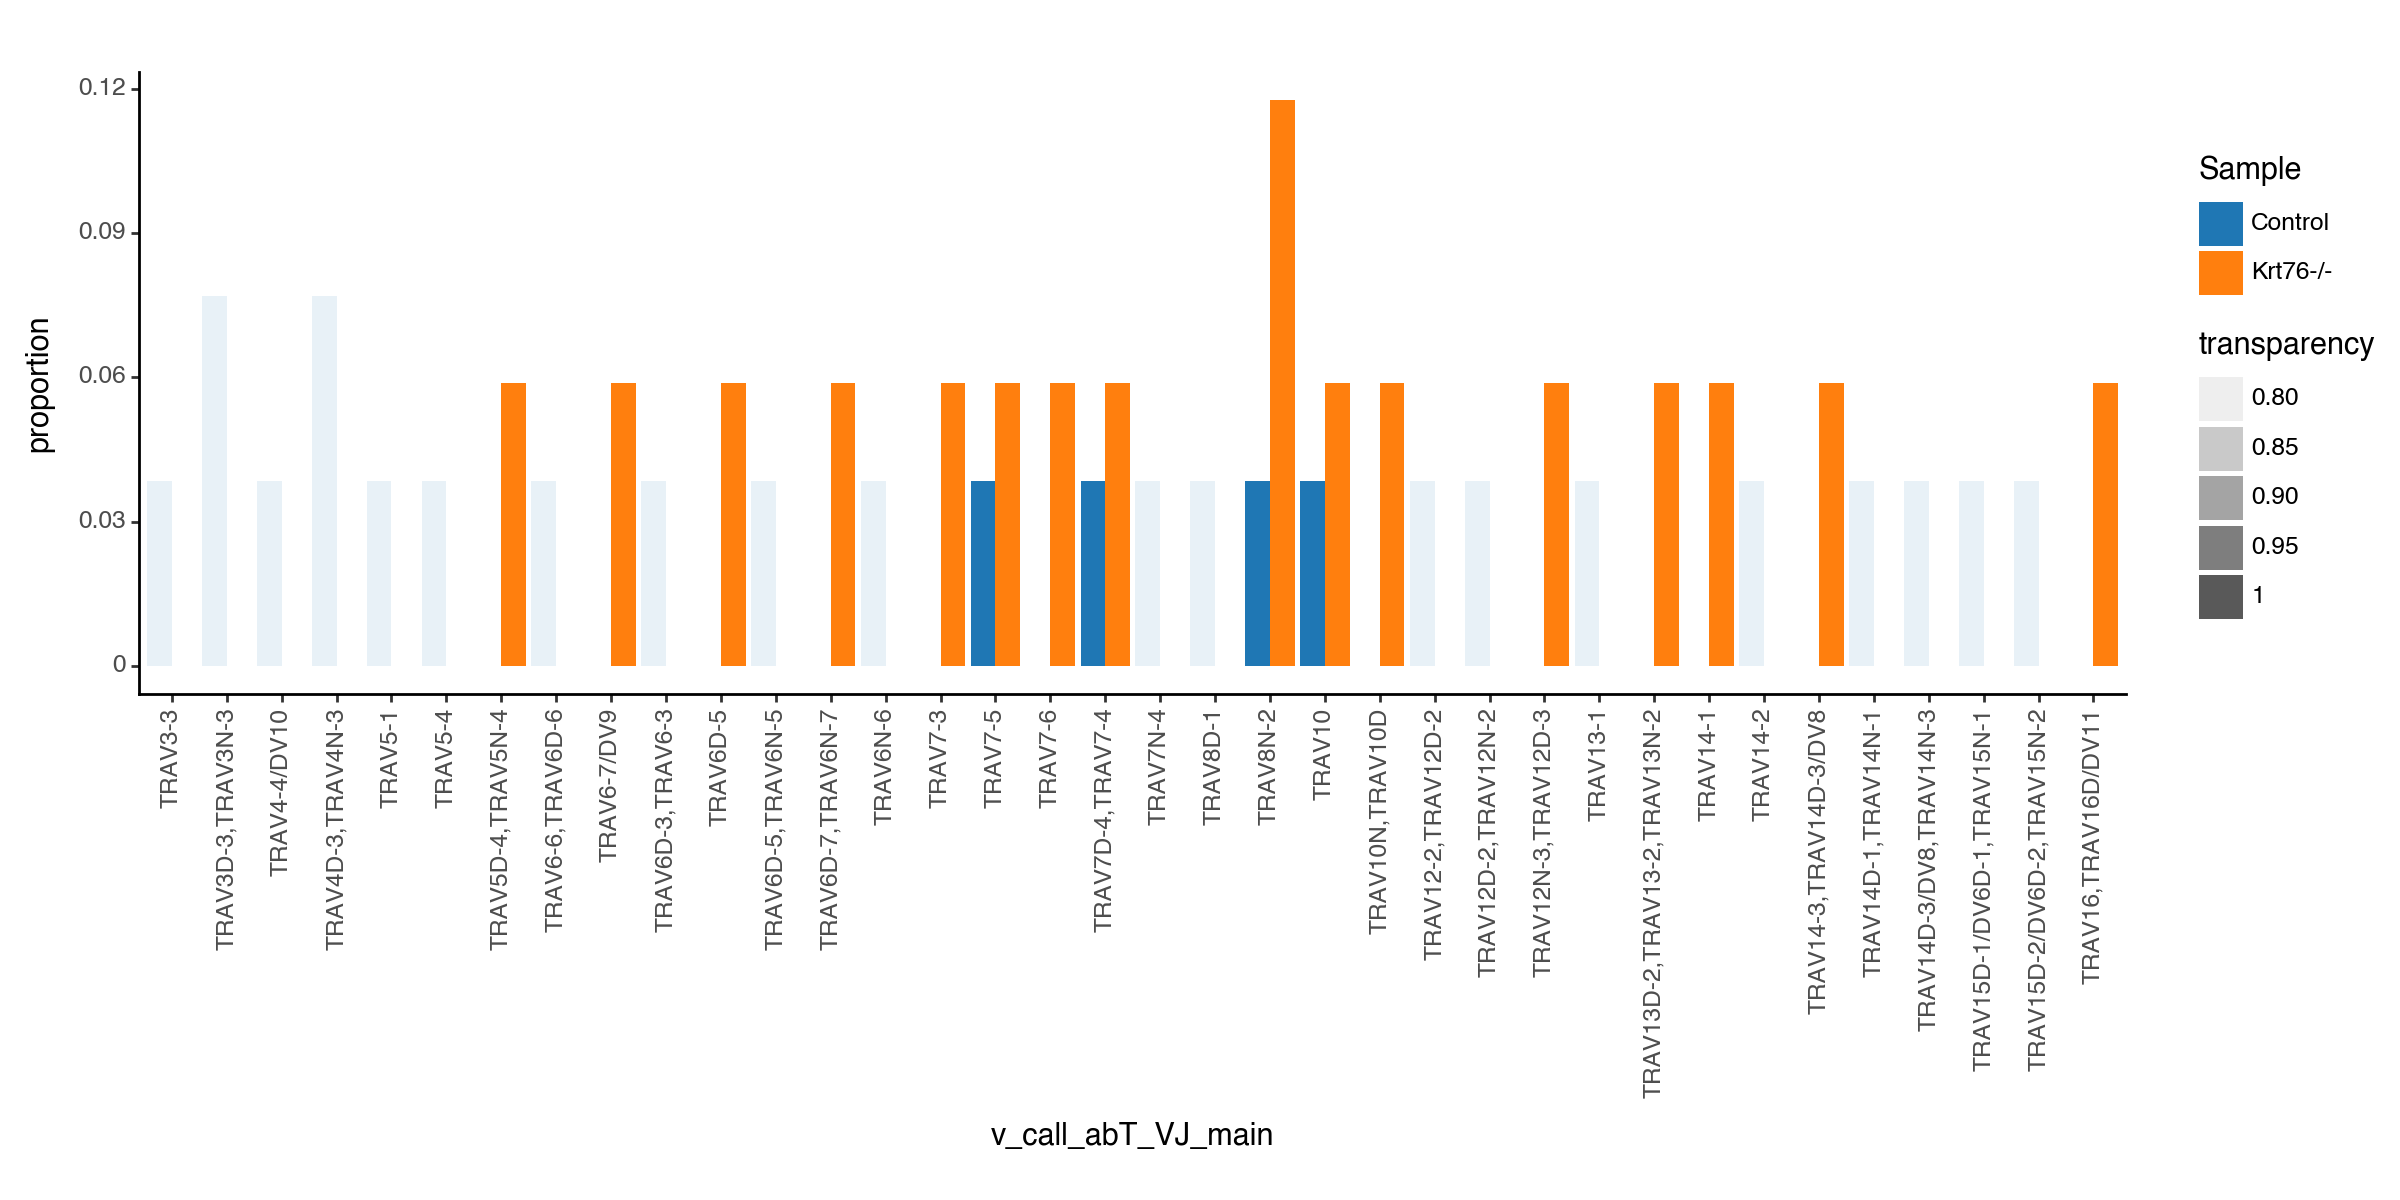

<Figure Size: (1200 x 600)>

In [1980]:
p

In [1981]:
p.save("VgeneAlphaChain_DN3ab_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN3ab_141223.pdf


### DN3b - V gene alpha chain

In [1982]:
adata_PF_DN3b = adata_PF[adata_PF.obs["leiden"] == "6 DN3b"]

In [1983]:
adata_PF_DN3b

View of AnnData object with n_obs × n_vars = 27 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [1984]:
working_df = pd.DataFrame(adata_PF_DN3b.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                               
Control  TRAV7-5                                         2
         TRAV15D-2/DV6D-2,TRAV15N-2                      1
         TRAV7-1                                         1
         TRAV14-2                                        1
         TRAV10                                          1
         TRAV9-2                                         1
         TRAV3D-3,TRAV3N-3                               1
         TRAV6D-7,TRAV6N-7                               1
         TRAV6D-7,TRAV6-7/DV9,TRAV6N-7                   1
         TRAV6D-3,TRAV6-3                                1
         TRAV6-6,TRAV6D-6                                1
         TRAV6-4                                         1
         TRAV4D-3,TRAV4-3                                1
         TRAV13D-1,TRAV13-1                              1
         TRAV13D-2,TRAV13N-2                             0
         TRAV14D-1,TRAV14N-1                             0
         TRAV14-3,TRAV14D-3/DV8                          0
         TRAV1                                           0
         TRAV12D-2,TRAV12N-2                             0
         TRAV11D,TRAV11                                  0
         TRAV4N-4,TRAV4D-4                               0
         TRAV7-6                                         0
Krt76-/- TRAV11D,TRAV11                                  2
         TRAV1                                           1
         TRAV3D-3,TRAV3N-3                               1
         TRAV14D-1,TRAV14N-1                             1
         TRAV14-3,TRAV14D-3/DV8                          1
         TRAV13D-2,TRAV13N-2                             1
         TRAV12D-2,TRAV12N-2                             1
         TRAV10                                          1
         TRAV7-6                                         1
         TRAV6-6,TRAV6D-6                                1
         TRAV4N-4,TRAV4D-4                               1
         TRAV7-1                                         0
         TRAV7-5                                         0
         TRAV6D-7,TRAV6N-7                               0
         TRAV9-2                                         0
         TRAV6D-7,TRAV6-7/DV9,TRAV6N-7                   0
         TRAV6D-3,TRAV6-3                                0
         TRAV13D-1,TRAV13-1                              0
         TRAV6-4                                         0
         TRAV14-2                                        0
         TRAV4D-3,TRAV4-3                                0
         TRAV15D-2/DV6D-2,TRAV15N-2                      0

In [1985]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample             v_call_abT_VJ_main  counts
0    Control                        TRAV7-5       2
1    Control     TRAV15D-2/DV6D-2,TRAV15N-2       1
2    Control                        TRAV7-1       1
3    Control                       TRAV14-2       1
4    Control                         TRAV10       1
5    Control                        TRAV9-2       1
6    Control              TRAV3D-3,TRAV3N-3       1
7    Control              TRAV6D-7,TRAV6N-7       1
8    Control  TRAV6D-7,TRAV6-7/DV9,TRAV6N-7       1
9    Control               TRAV6D-3,TRAV6-3       1
10   Control               TRAV6-6,TRAV6D-6       1
11   Control                        TRAV6-4       1
12   Control               TRAV4D-3,TRAV4-3       1
13   Control             TRAV13D-1,TRAV13-1       1
14   Control            TRAV13D-2,TRAV13N-2       0
15   Control            TRAV14D-1,TRAV14N-1       0
16   Control         TRAV14-3,TRAV14D-3/DV8       0
17   Control                          TRAV1       0
18   Control            TRAV12D-2,TRAV12N-2       0
19   Control                 TRAV11D,TRAV11       0
20   Control              TRAV4N-4,TRAV4D-4       0
21   Control                        TRAV7-6       0
22  Krt76-/-                 TRAV11D,TRAV11       2
23  Krt76-/-                          TRAV1       1
24  Krt76-/-              TRAV3D-3,TRAV3N-3       1
25  Krt76-/-            TRAV14D-1,TRAV14N-1       1
26  Krt76-/-         TRAV14-3,TRAV14D-3/DV8       1
27  Krt76-/-            TRAV13D-2,TRAV13N-2       1
28  Krt76-/-            TRAV12D-2,TRAV12N-2       1
29  Krt76-/-                         TRAV10       1
30  Krt76-/-                        TRAV7-6       1
31  Krt76-/-               TRAV6-6,TRAV6D-6       1
32  Krt76-/-              TRAV4N-4,TRAV4D-4       1
33  Krt76-/-                        TRAV7-1       0
34  Krt76-/-                        TRAV7-5       0
35  Krt76-/-              TRAV6D-7,TRAV6N-7       0
36  Krt76-/-                        TRAV9-2       0
37  Krt76-/-  TRAV6D-7,TRAV6-7/DV9,TRAV6N-7       0
38  Krt76-/-               TRAV6D-3,TRAV6-3       0
39  Krt76-/-             TRAV13D-1,TRAV13-1       0
40  Krt76-/-                        TRAV6-4       0
41  Krt76-/-                       TRAV14-2       0
42  Krt76-/-               TRAV4D-3,TRAV4-3       0
43  Krt76-/-     TRAV15D-2/DV6D-2,TRAV15N-2       0

In [1986]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 15, 'Krt76-/-': 12}

In [1987]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1988]:
working_df

Sample             v_call_abT_VJ_main  counts  proportion
0    Control                        TRAV7-5       2    0.133333
1    Control     TRAV15D-2/DV6D-2,TRAV15N-2       1    0.066667
2    Control                        TRAV7-1       1    0.066667
3    Control                       TRAV14-2       1    0.066667
4    Control                         TRAV10       1    0.066667
5    Control                        TRAV9-2       1    0.066667
6    Control              TRAV3D-3,TRAV3N-3       1    0.066667
7    Control              TRAV6D-7,TRAV6N-7       1    0.066667
8    Control  TRAV6D-7,TRAV6-7/DV9,TRAV6N-7       1    0.066667
9    Control               TRAV6D-3,TRAV6-3       1    0.066667
10   Control               TRAV6-6,TRAV6D-6       1    0.066667
11   Control                        TRAV6-4       1    0.066667
12   Control               TRAV4D-3,TRAV4-3       1    0.066667
13   Control             TRAV13D-1,TRAV13-1       1    0.066667
14   Control            TRAV13D-2,TRAV13N-2       0    0.000000
15   Control            TRAV14D-1,TRAV14N-1       0    0.000000
16   Control         TRAV14-3,TRAV14D-3/DV8       0    0.000000
17   Control                          TRAV1       0    0.000000
18   Control            TRAV12D-2,TRAV12N-2       0    0.000000
19   Control                 TRAV11D,TRAV11       0    0.000000
20   Control              TRAV4N-4,TRAV4D-4       0    0.000000
21   Control                        TRAV7-6       0    0.000000
22  Krt76-/-                 TRAV11D,TRAV11       2    0.166667
23  Krt76-/-                          TRAV1       1    0.083333
24  Krt76-/-              TRAV3D-3,TRAV3N-3       1    0.083333
25  Krt76-/-            TRAV14D-1,TRAV14N-1       1    0.083333
26  Krt76-/-         TRAV14-3,TRAV14D-3/DV8       1    0.083333
27  Krt76-/-            TRAV13D-2,TRAV13N-2       1    0.083333
28  Krt76-/-            TRAV12D-2,TRAV12N-2       1    0.083333
29  Krt76-/-                         TRAV10       1    0.083333
30  Krt76-/-                        TRAV7-6       1    0.083333
31  Krt76-/-               TRAV6-6,TRAV6D-6       1    0.083333
32  Krt76-/-              TRAV4N-4,TRAV4D-4       1    0.083333
33  Krt76-/-                        TRAV7-1       0    0.000000
34  Krt76-/-                        TRAV7-5       0    0.000000
35  Krt76-/-              TRAV6D-7,TRAV6N-7       0    0.000000
36  Krt76-/-                        TRAV9-2       0    0.000000
37  Krt76-/-  TRAV6D-7,TRAV6-7/DV9,TRAV6N-7       0    0.000000
38  Krt76-/-               TRAV6D-3,TRAV6-3       0    0.000000
39  Krt76-/-             TRAV13D-1,TRAV13-1       0    0.000000
40  Krt76-/-                        TRAV6-4       0    0.000000
41  Krt76-/-                       TRAV14-2       0    0.000000
42  Krt76-/-               TRAV4D-3,TRAV4-3       0    0.000000
43  Krt76-/-     TRAV15D-2/DV6D-2,TRAV15N-2       0    0.000000

In [1989]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 15, 'Krt76-/-': 12}

In [1990]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [1991]:
working_df

Sample             v_call_abT_VJ_main  counts  proportion
0    Control                        TRAV7-5       2    0.133333
1    Control     TRAV15D-2/DV6D-2,TRAV15N-2       1    0.066667
2    Control                        TRAV7-1       1    0.066667
3    Control                       TRAV14-2       1    0.066667
4    Control                         TRAV10       1    0.066667
5    Control                        TRAV9-2       1    0.066667
6    Control              TRAV3D-3,TRAV3N-3       1    0.066667
7    Control              TRAV6D-7,TRAV6N-7       1    0.066667
8    Control  TRAV6D-7,TRAV6-7/DV9,TRAV6N-7       1    0.066667
9    Control               TRAV6D-3,TRAV6-3       1    0.066667
10   Control               TRAV6-6,TRAV6D-6       1    0.066667
11   Control                        TRAV6-4       1    0.066667
12   Control               TRAV4D-3,TRAV4-3       1    0.066667
13   Control             TRAV13D-1,TRAV13-1       1    0.066667
14   Control            TRAV13D-2,TRAV13N-2       0    0.000000
15   Control            TRAV14D-1,TRAV14N-1       0    0.000000
16   Control         TRAV14-3,TRAV14D-3/DV8       0    0.000000
17   Control                          TRAV1       0    0.000000
18   Control            TRAV12D-2,TRAV12N-2       0    0.000000
19   Control                 TRAV11D,TRAV11       0    0.000000
20   Control              TRAV4N-4,TRAV4D-4       0    0.000000
21   Control                        TRAV7-6       0    0.000000
22  Krt76-/-                 TRAV11D,TRAV11       2    0.166667
23  Krt76-/-                          TRAV1       1    0.083333
24  Krt76-/-              TRAV3D-3,TRAV3N-3       1    0.083333
25  Krt76-/-            TRAV14D-1,TRAV14N-1       1    0.083333
26  Krt76-/-         TRAV14-3,TRAV14D-3/DV8       1    0.083333
27  Krt76-/-            TRAV13D-2,TRAV13N-2       1    0.083333
28  Krt76-/-            TRAV12D-2,TRAV12N-2       1    0.083333
29  Krt76-/-                         TRAV10       1    0.083333
30  Krt76-/-                        TRAV7-6       1    0.083333
31  Krt76-/-               TRAV6-6,TRAV6D-6       1    0.083333
32  Krt76-/-              TRAV4N-4,TRAV4D-4       1    0.083333
33  Krt76-/-                        TRAV7-1       0    0.000000
34  Krt76-/-                        TRAV7-5       0    0.000000
35  Krt76-/-              TRAV6D-7,TRAV6N-7       0    0.000000
36  Krt76-/-                        TRAV9-2       0    0.000000
37  Krt76-/-  TRAV6D-7,TRAV6-7/DV9,TRAV6N-7       0    0.000000
38  Krt76-/-               TRAV6D-3,TRAV6-3       0    0.000000
39  Krt76-/-             TRAV13D-1,TRAV13-1       0    0.000000
40  Krt76-/-                        TRAV6-4       0    0.000000
41  Krt76-/-                       TRAV14-2       0    0.000000
42  Krt76-/-               TRAV4D-3,TRAV4-3       0    0.000000
43  Krt76-/-     TRAV15D-2/DV6D-2,TRAV15N-2       0    0.000000

In [1992]:
working_control = working_df[working_df["Sample"] == "Control"]

In [1993]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [1994]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [1995]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [1996]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.


{'TRAV1': inf,
 'TRAV3D-3,TRAV3N-3': 1.25,
 'TRAV4D-3,TRAV4-3': 0.0,
 'TRAV4N-4,TRAV4D-4': inf,
 'TRAV6-4': 0.0,
 'TRAV6-6,TRAV6D-6': 1.25,
 'TRAV6D-3,TRAV6-3': 0.0,
 'TRAV6D-7,TRAV6-7/DV9,TRAV6N-7': 0.0,
 'TRAV6D-7,TRAV6N-7': 0.0,
 'TRAV7-1': 0.0,
 'TRAV7-5': 0.0,
 'TRAV7-6': inf,
 'TRAV9-2': 0.0,
 'TRAV10': 1.25,
 'TRAV11D,TRAV11': inf,
 'TRAV12D-2,TRAV12N-2': inf,
 'TRAV13D-1,TRAV13-1': 0.0,
 'TRAV13D-2,TRAV13N-2': inf,
 'TRAV14-2': 0.0,
 'TRAV14-3,TRAV14D-3/DV8': inf,
 'TRAV14D-1,TRAV14N-1': inf,
 'TRAV15D-2/DV6D-2,TRAV15N-2': 0.0}

In [1997]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample             v_call_abT_VJ_main  counts  proportion  foldchange
0    Control                        TRAV7-5       2    0.133333        0.00
1    Control     TRAV15D-2/DV6D-2,TRAV15N-2       1    0.066667        0.00
2    Control                        TRAV7-1       1    0.066667        0.00
3    Control                       TRAV14-2       1    0.066667        0.00
4    Control                         TRAV10       1    0.066667        1.25
5    Control                        TRAV9-2       1    0.066667        0.00
6    Control              TRAV3D-3,TRAV3N-3       1    0.066667        1.25
7    Control              TRAV6D-7,TRAV6N-7       1    0.066667        0.00
8    Control  TRAV6D-7,TRAV6-7/DV9,TRAV6N-7       1    0.066667        0.00
9    Control               TRAV6D-3,TRAV6-3       1    0.066667        0.00
10   Control               TRAV6-6,TRAV6D-6       1    0.066667        1.25
11   Control                        TRAV6-4       1    0.066667        0.00
12   Control               TRAV4D-3,TRAV4-3       1    0.066667        0.00
13   Control             TRAV13D-1,TRAV13-1       1    0.066667        0.00
14   Control            TRAV13D-2,TRAV13N-2       0    0.000000         inf
15   Control            TRAV14D-1,TRAV14N-1       0    0.000000         inf
16   Control         TRAV14-3,TRAV14D-3/DV8       0    0.000000         inf
17   Control                          TRAV1       0    0.000000         inf
18   Control            TRAV12D-2,TRAV12N-2       0    0.000000         inf
19   Control                 TRAV11D,TRAV11       0    0.000000         inf
20   Control              TRAV4N-4,TRAV4D-4       0    0.000000         inf
21   Control                        TRAV7-6       0    0.000000         inf
22  Krt76-/-                 TRAV11D,TRAV11       2    0.166667         inf
23  Krt76-/-                          TRAV1       1    0.083333         inf
24  Krt76-/-              TRAV3D-3,TRAV3N-3       1    0.083333        1.25
25  Krt76-/-            TRAV14D-1,TRAV14N-1       1    0.083333         inf
26  Krt76-/-         TRAV14-3,TRAV14D-3/DV8       1    0.083333         inf
27  Krt76-/-            TRAV13D-2,TRAV13N-2       1    0.083333         inf
28  Krt76-/-            TRAV12D-2,TRAV12N-2       1    0.083333         inf
29  Krt76-/-                         TRAV10       1    0.083333        1.25
30  Krt76-/-                        TRAV7-6       1    0.083333         inf
31  Krt76-/-               TRAV6-6,TRAV6D-6       1    0.083333        1.25
32  Krt76-/-              TRAV4N-4,TRAV4D-4       1    0.083333         inf
33  Krt76-/-                        TRAV7-1       0    0.000000        0.00
34  Krt76-/-                        TRAV7-5       0    0.000000        0.00
35  Krt76-/-              TRAV6D-7,TRAV6N-7       0    0.000000        0.00
36  Krt76-/-                        TRAV9-2       0    0.000000        0.00
37  Krt76-/-  TRAV6D-7,TRAV6-7/DV9,TRAV6N-7       0    0.000000        0.00
38  Krt76-/-               TRAV6D-3,TRAV6-3       0    0.000000        0.00
39  Krt76-/-             TRAV13D-1,TRAV13-1       0    0.000000        0.00
40  Krt76-/-                        TRAV6-4       0    0.000000        0.00
41  Krt76-/-                       TRAV14-2       0    0.000000        0.00
42  Krt76-/-               TRAV4D-3,TRAV4-3       0    0.000000        0.00
43  Krt76-/-     TRAV15D-2/DV6D-2,TRAV15N-2       0    0.000000        0.00

In [1998]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [1999]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2000]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2001]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

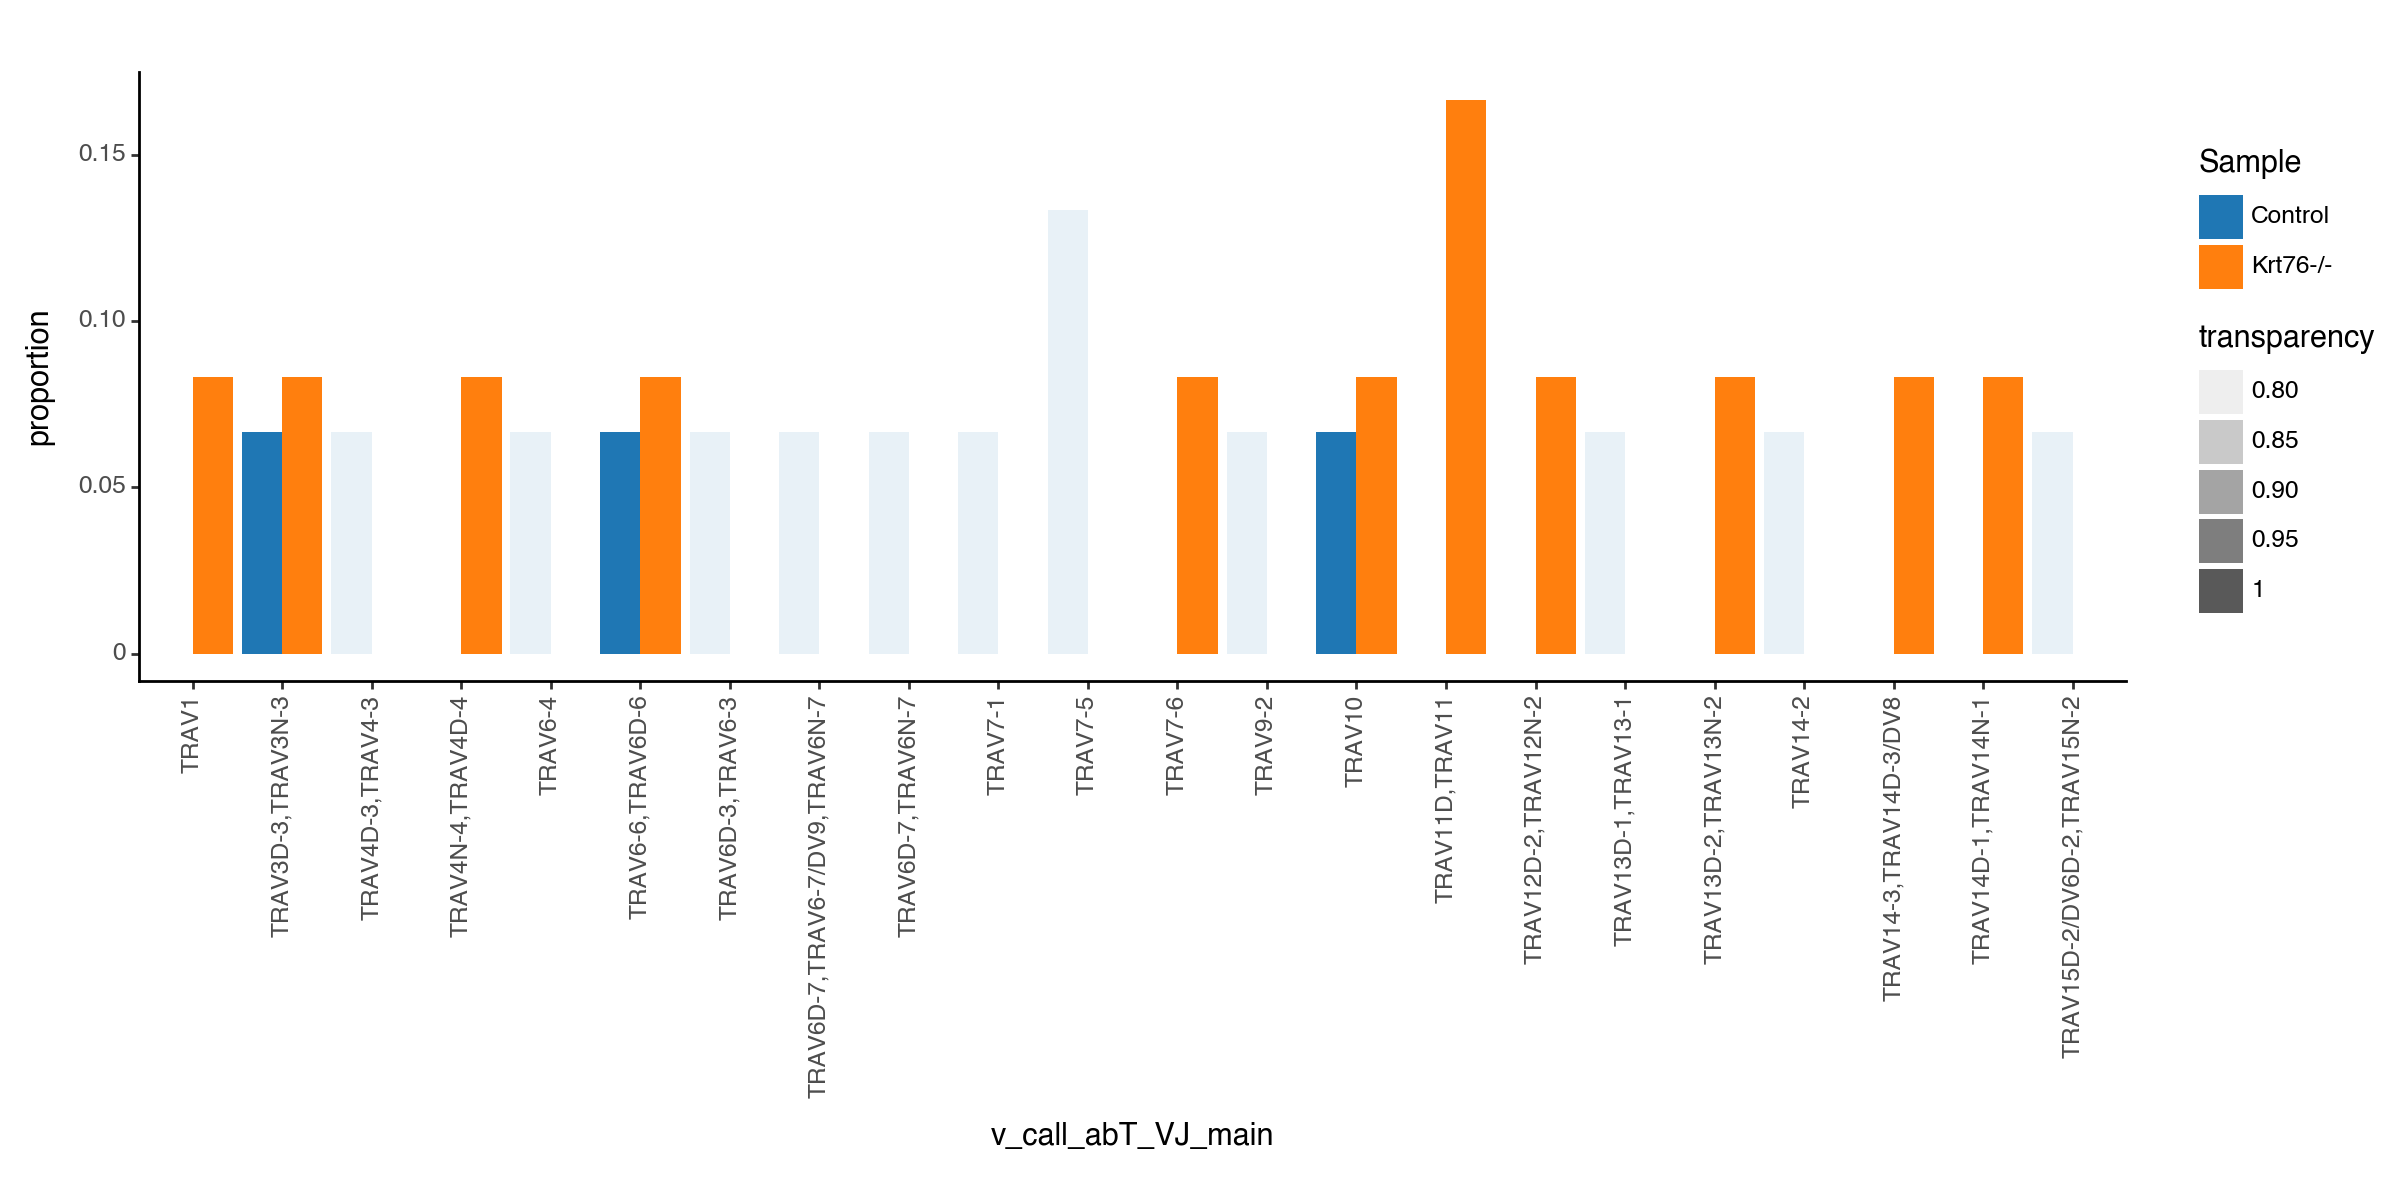

<Figure Size: (1200 x 600)>

In [2002]:
p

In [2003]:
p.save("VgeneAlphaChain_DN3b_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN3b_141223.pdf


### DN4 - V gene alpha chain

In [2004]:
adata_PF_DN4 = adata_PF[adata_PF.obs["leiden"] == "2 DN4"]

In [2005]:
adata_PF_DN4

View of AnnData object with n_obs × n_vars = 393 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2006]:
working_df = pd.DataFrame(adata_PF_DN4.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                           
Control  TRAV6D-7,TRAV6N-7                          10
         TRAV13-1                                    9
         TRAV12D-2,TRAV12N-2                         9
         TRAV12N-3,TRAV12D-3                         8
         TRAV12-3                                    7
...                                                ...
Krt76-/- TRAV6D-5                                    0
         TRAV13N-4,TRAV13D-4                         0
         TRAV6D-5,TRAV6N-5,TRAV6-5                   0
         TRAV9N-4,TRAV9D-3                           0
         TRAV13D-4                                   0

[174 rows x 1 columns]

In [2007]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample         v_call_abT_VJ_main  counts
0     Control          TRAV6D-7,TRAV6N-7      10
1     Control                   TRAV13-1       9
2     Control        TRAV12D-2,TRAV12N-2       9
3     Control        TRAV12N-3,TRAV12D-3       8
4     Control                   TRAV12-3       7
..        ...                        ...     ...
169  Krt76-/-                   TRAV6D-5       0
170  Krt76-/-        TRAV13N-4,TRAV13D-4       0
171  Krt76-/-  TRAV6D-5,TRAV6N-5,TRAV6-5       0
172  Krt76-/-          TRAV9N-4,TRAV9D-3       0
173  Krt76-/-                  TRAV13D-4       0

[174 rows x 3 columns]

In [2008]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 188, 'Krt76-/-': 205}

In [2009]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2010]:
working_df

Sample         v_call_abT_VJ_main  counts  proportion
0     Control          TRAV6D-7,TRAV6N-7      10    0.053191
1     Control                   TRAV13-1       9    0.047872
2     Control        TRAV12D-2,TRAV12N-2       9    0.047872
3     Control        TRAV12N-3,TRAV12D-3       8    0.042553
4     Control                   TRAV12-3       7    0.037234
..        ...                        ...     ...         ...
169  Krt76-/-                   TRAV6D-5       0    0.000000
170  Krt76-/-        TRAV13N-4,TRAV13D-4       0    0.000000
171  Krt76-/-  TRAV6D-5,TRAV6N-5,TRAV6-5       0    0.000000
172  Krt76-/-          TRAV9N-4,TRAV9D-3       0    0.000000
173  Krt76-/-                  TRAV13D-4       0    0.000000

[174 rows x 4 columns]

In [2011]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 188, 'Krt76-/-': 205}

In [2012]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2013]:
working_df

Sample         v_call_abT_VJ_main  counts  proportion
0     Control          TRAV6D-7,TRAV6N-7      10    0.053191
1     Control                   TRAV13-1       9    0.047872
2     Control        TRAV12D-2,TRAV12N-2       9    0.047872
3     Control        TRAV12N-3,TRAV12D-3       8    0.042553
4     Control                   TRAV12-3       7    0.037234
..        ...                        ...     ...         ...
169  Krt76-/-                   TRAV6D-5       0    0.000000
170  Krt76-/-        TRAV13N-4,TRAV13D-4       0    0.000000
171  Krt76-/-  TRAV6D-5,TRAV6N-5,TRAV6-5       0    0.000000
172  Krt76-/-          TRAV9N-4,TRAV9D-3       0    0.000000
173  Krt76-/-                  TRAV13D-4       0    0.000000

[174 rows x 4 columns]

In [2014]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2015]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2016]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [2017]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [2018]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 1.8341463414634147,
 'TRAV3D-3,TRAV3N-3': 2.139837398373984,
 'TRAV4-2': 0.9170731707317074,
 'TRAV4-4/DV10': 1.375609756097561,
 'TRAV4-4/DV10,TRAV4D-4': 0.9170731707317074,
 'TRAV4D-3,TRAV4-3': 3.6682926829268294,
 'TRAV4D-3,TRAV4N-3': 0.30569105691056914,
 'TRAV4N-4,TRAV4D-4': 1.375609756097561,
 'TRAV5-1': inf,
 'TRAV5-4': 1.375609756097561,
 'TRAV5D-4,TRAV5N-4': 0.4585365853658537,
 'TRAV6-2': inf,
 'TRAV6-4': inf,
 'TRAV6-5': 3.6682926829268294,
 'TRAV6-6,TRAV6D-6': 2.2009756097560977,
 'TRAV6-7/DV9': 0.9170731707317074,
 'TRAV6D-3,TRAV6-3': 0.4585365853658537,
 'TRAV6D-5': 0.0,
 'TRAV6D-5,TRAV6N-5': inf,
 'TRAV6D-5,TRAV6N-5,TRAV6-5': 0.0,
 'TRAV6D-7,TRAV6N-7': 0.8253658536585365,
 'TRAV6N-6': inf,
 'TRAV7-1': 0.0,
 'TRAV7-3': 0.4585365853658537,
 'TRAV7-5': 1.5284552845528456,
 'TRAV7-6': 0.4585365853658537,
 'TRAV7D-2,TRAV7-2': 0.7642276422764228,
 'TRAV7D-3': 4.585365853658537,
 'TRAV7D-4': 0.4585365853658537,
 'TRAV7D-4,TRAV7-4': 0.6878048780487805,
 'TRAV7D-5,TRAV7

In [2019]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample         v_call_abT_VJ_main  counts  proportion  foldchange
0     Control          TRAV6D-7,TRAV6N-7      10    0.053191    0.825366
1     Control                   TRAV13-1       9    0.047872    0.509485
2     Control        TRAV12D-2,TRAV12N-2       9    0.047872    0.407588
3     Control        TRAV12N-3,TRAV12D-3       8    0.042553    0.343902
4     Control                   TRAV12-3       7    0.037234    0.262021
..        ...                        ...     ...         ...         ...
169  Krt76-/-                   TRAV6D-5       0    0.000000    0.000000
170  Krt76-/-        TRAV13N-4,TRAV13D-4       0    0.000000    0.000000
171  Krt76-/-  TRAV6D-5,TRAV6N-5,TRAV6-5       0    0.000000    0.000000
172  Krt76-/-          TRAV9N-4,TRAV9D-3       0    0.000000    0.000000
173  Krt76-/-                  TRAV13D-4       0    0.000000    0.000000

[174 rows x 5 columns]

In [2020]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2021]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2022]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2023]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

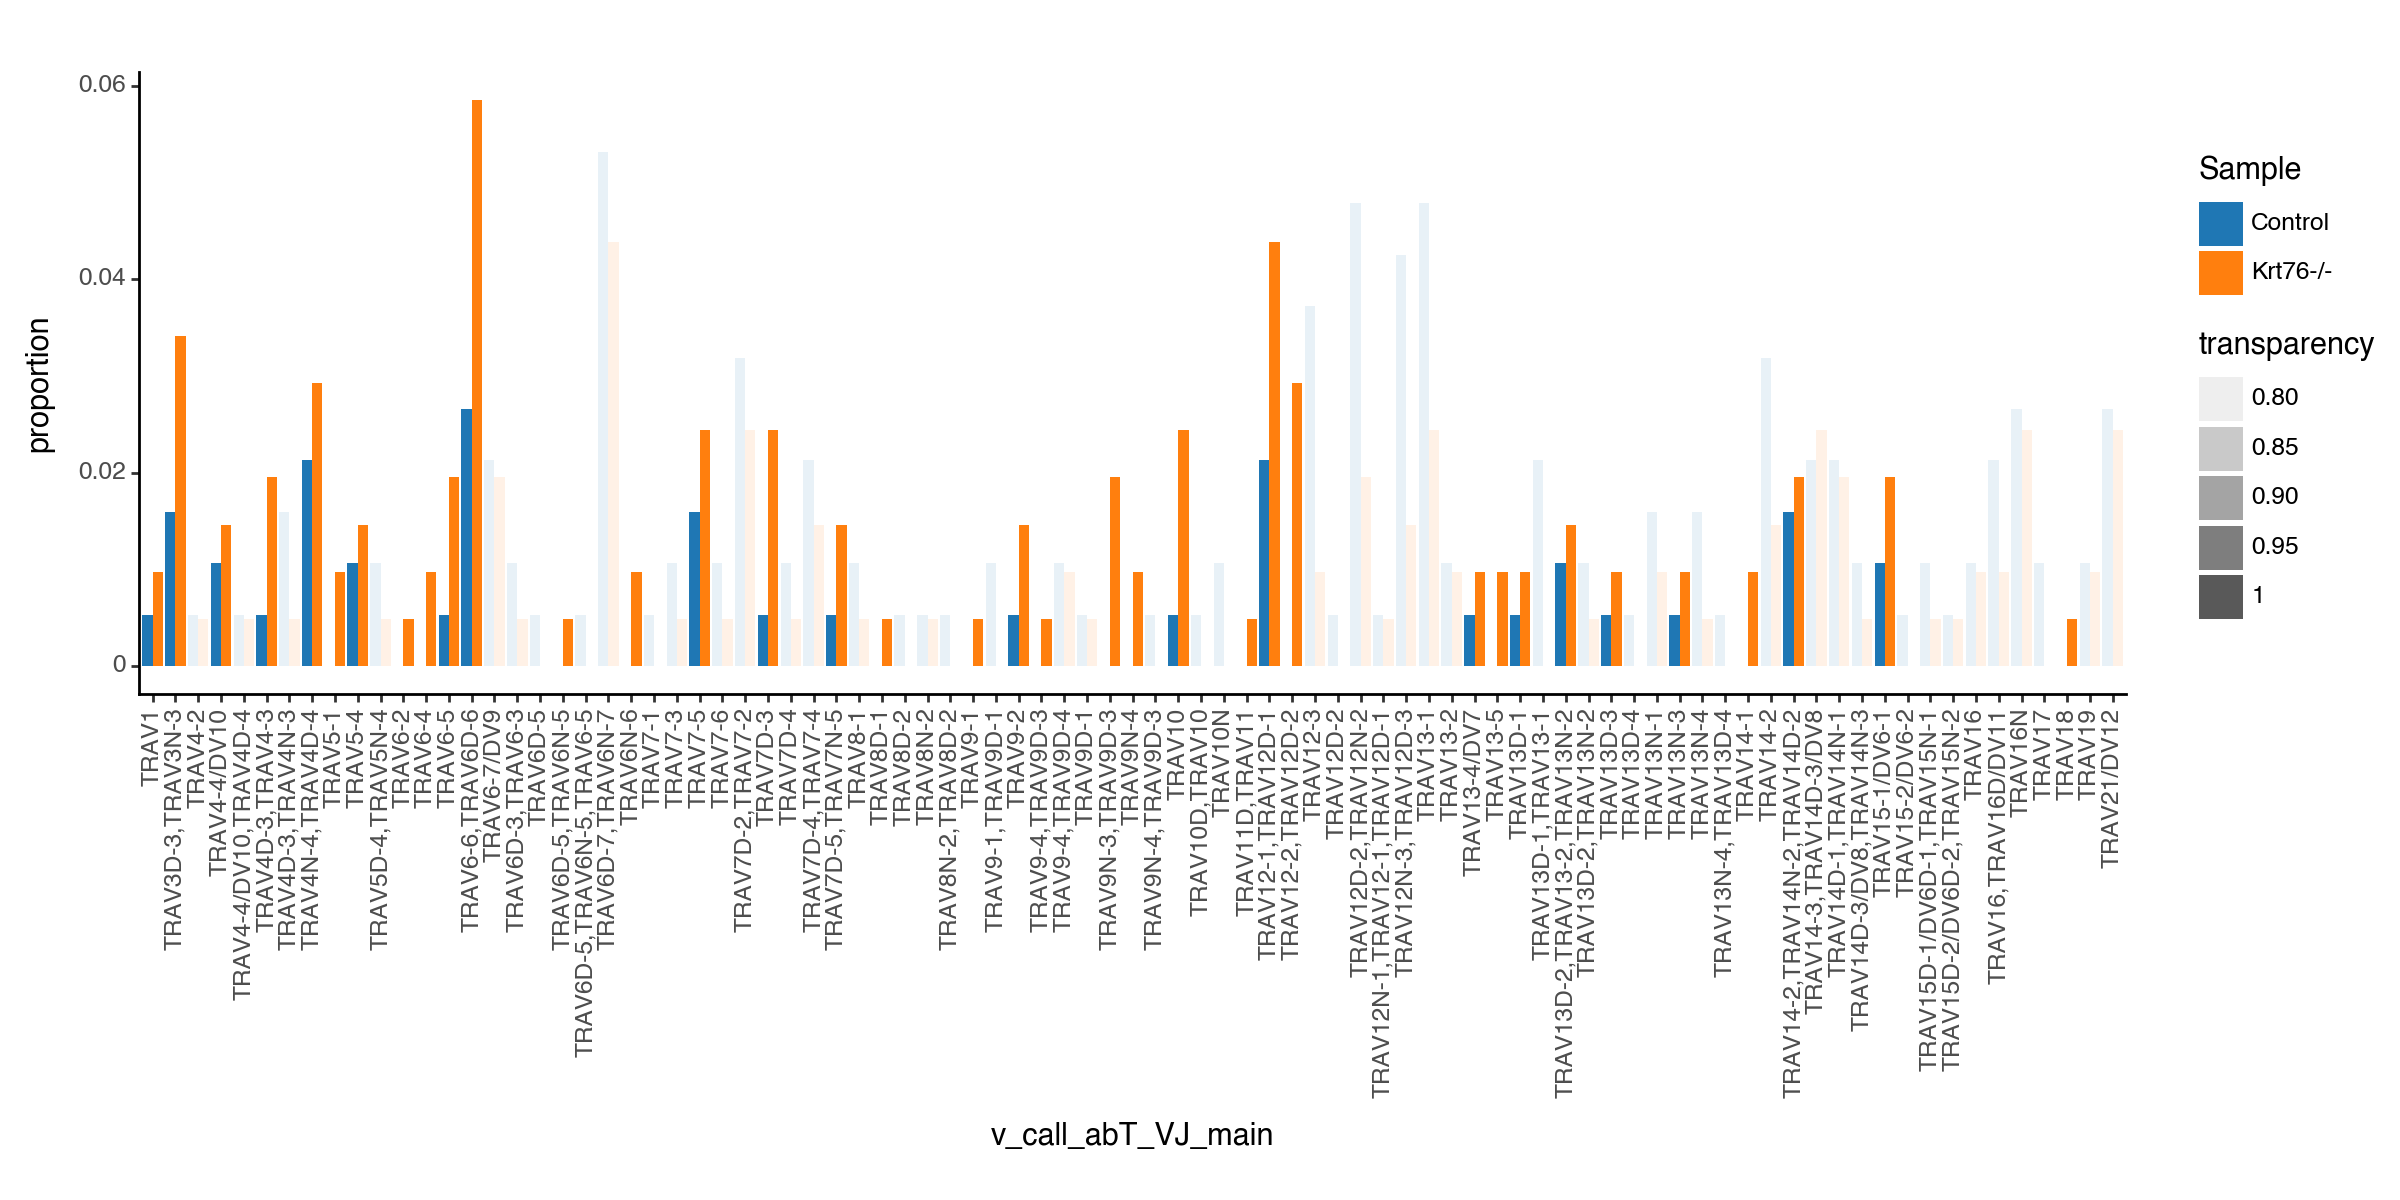

<Figure Size: (1200 x 600)>

In [2024]:
p

In [2025]:
p.save("VgeneAlphaChain_DN4_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN4_141223.pdf


### DP1 - V gene alpha chain

In [2026]:
adata_PF_DP1 = adata_PF[adata_PF.obs["leiden"] == "3 DP 1"]

In [2027]:
adata_PF_DP1

View of AnnData object with n_obs × n_vars = 923 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2028]:
working_df = pd.DataFrame(adata_PF_DP1.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                           
Control  TRAV12D-2,TRAV12N-2                        21
         TRAV3D-3,TRAV3N-3                          18
         TRAV6-7/DV9                                17
         TRAV4-4/DV10                               15
         TRAV12-3                                   13
...                                                ...
Krt76-/- TRAV13D-4,TRAV13-1                          0
         TRAV3-3,TRAV3D-3,TRAV3N-3                   0
         TRAV7D-4                                    0
         TRAV20                                      0
         TRAV7N-4                                    0

[208 rows x 1 columns]

In [2029]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample         v_call_abT_VJ_main  counts
0     Control        TRAV12D-2,TRAV12N-2      21
1     Control          TRAV3D-3,TRAV3N-3      18
2     Control                TRAV6-7/DV9      17
3     Control               TRAV4-4/DV10      15
4     Control                   TRAV12-3      13
..        ...                        ...     ...
203  Krt76-/-         TRAV13D-4,TRAV13-1       0
204  Krt76-/-  TRAV3-3,TRAV3D-3,TRAV3N-3       0
205  Krt76-/-                   TRAV7D-4       0
206  Krt76-/-                     TRAV20       0
207  Krt76-/-                   TRAV7N-4       0

[208 rows x 3 columns]

In [2030]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 454, 'Krt76-/-': 469}

In [2031]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2032]:
working_df

Sample         v_call_abT_VJ_main  counts  proportion
0     Control        TRAV12D-2,TRAV12N-2      21    0.046256
1     Control          TRAV3D-3,TRAV3N-3      18    0.039648
2     Control                TRAV6-7/DV9      17    0.037445
3     Control               TRAV4-4/DV10      15    0.033040
4     Control                   TRAV12-3      13    0.028634
..        ...                        ...     ...         ...
203  Krt76-/-         TRAV13D-4,TRAV13-1       0    0.000000
204  Krt76-/-  TRAV3-3,TRAV3D-3,TRAV3N-3       0    0.000000
205  Krt76-/-                   TRAV7D-4       0    0.000000
206  Krt76-/-                     TRAV20       0    0.000000
207  Krt76-/-                   TRAV7N-4       0    0.000000

[208 rows x 4 columns]

In [2033]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 454, 'Krt76-/-': 469}

In [2034]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2035]:
working_df

Sample         v_call_abT_VJ_main  counts  proportion
0     Control        TRAV12D-2,TRAV12N-2      21    0.046256
1     Control          TRAV3D-3,TRAV3N-3      18    0.039648
2     Control                TRAV6-7/DV9      17    0.037445
3     Control               TRAV4-4/DV10      15    0.033040
4     Control                   TRAV12-3      13    0.028634
..        ...                        ...     ...         ...
203  Krt76-/-         TRAV13D-4,TRAV13-1       0    0.000000
204  Krt76-/-  TRAV3-3,TRAV3D-3,TRAV3N-3       0    0.000000
205  Krt76-/-                   TRAV7D-4       0    0.000000
206  Krt76-/-                     TRAV20       0    0.000000
207  Krt76-/-                   TRAV7N-4       0    0.000000

[208 rows x 4 columns]

In [2036]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2037]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2038]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [2039]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [2040]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.9680170575692962,
 'TRAV2': 1.9360341151385925,
 'TRAV3-1': inf,
 'TRAV3-3,TRAV3D-3,TRAV3N-3': 0.0,
 'TRAV3D-3,TRAV3N-3': 1.2369106846718787,
 'TRAV4-2': inf,
 'TRAV4-4/DV10': 0.5808102345415779,
 'TRAV4-4/DV10,TRAV4D-4': 0.4840085287846481,
 'TRAV4D-2': 0.0,
 'TRAV4D-3,TRAV4-3': 0.9680170575692963,
 'TRAV4D-3,TRAV4N-3': 1.2906894100923951,
 'TRAV4N-4,TRAV4D-4': 1.0755745084103292,
 'TRAV5-1': 0.3226723525230988,
 'TRAV5-4': 0.9680170575692962,
 'TRAV5D-4,TRAV5N-4': 2.4200426439232405,
 'TRAV6-1': 0.9680170575692962,
 'TRAV6-2': 0.6453447050461976,
 'TRAV6-4': 0.2765763021626561,
 'TRAV6-5': 1.4520255863539446,
 'TRAV6-6,TRAV6D-6': 1.064818763326226,
 'TRAV6-7/DV9': 0.797190517998244,
 'TRAV6D-3': 0.9680170575692962,
 'TRAV6D-3,TRAV6-3': 1.4520255863539444,
 'TRAV6D-4': inf,
 'TRAV6D-5': 0.9680170575692962,
 'TRAV6D-5,TRAV6N-5': 0.24200426439232406,
 'TRAV6D-5,TRAV6N-5,TRAV6-5': 0.0,
 'TRAV6D-7,TRAV6-7/DV9,TRAV6N-7': inf,
 'TRAV6D-7,TRAV6N-7': 1.7746979388770434,
 'TRAV6N-6

In [2041]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample         v_call_abT_VJ_main  counts  proportion  foldchange
0     Control        TRAV12D-2,TRAV12N-2      21    0.046256    0.875825
1     Control          TRAV3D-3,TRAV3N-3      18    0.039648    1.236911
2     Control                TRAV6-7/DV9      17    0.037445    0.797191
3     Control               TRAV4-4/DV10      15    0.033040    0.580810
4     Control                   TRAV12-3      13    0.028634    0.446777
..        ...                        ...     ...         ...         ...
203  Krt76-/-         TRAV13D-4,TRAV13-1       0    0.000000    0.000000
204  Krt76-/-  TRAV3-3,TRAV3D-3,TRAV3N-3       0    0.000000    0.000000
205  Krt76-/-                   TRAV7D-4       0    0.000000    0.000000
206  Krt76-/-                     TRAV20       0    0.000000    0.000000
207  Krt76-/-                   TRAV7N-4       0    0.000000    0.000000

[208 rows x 5 columns]

In [2042]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2043]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2044]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2045]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

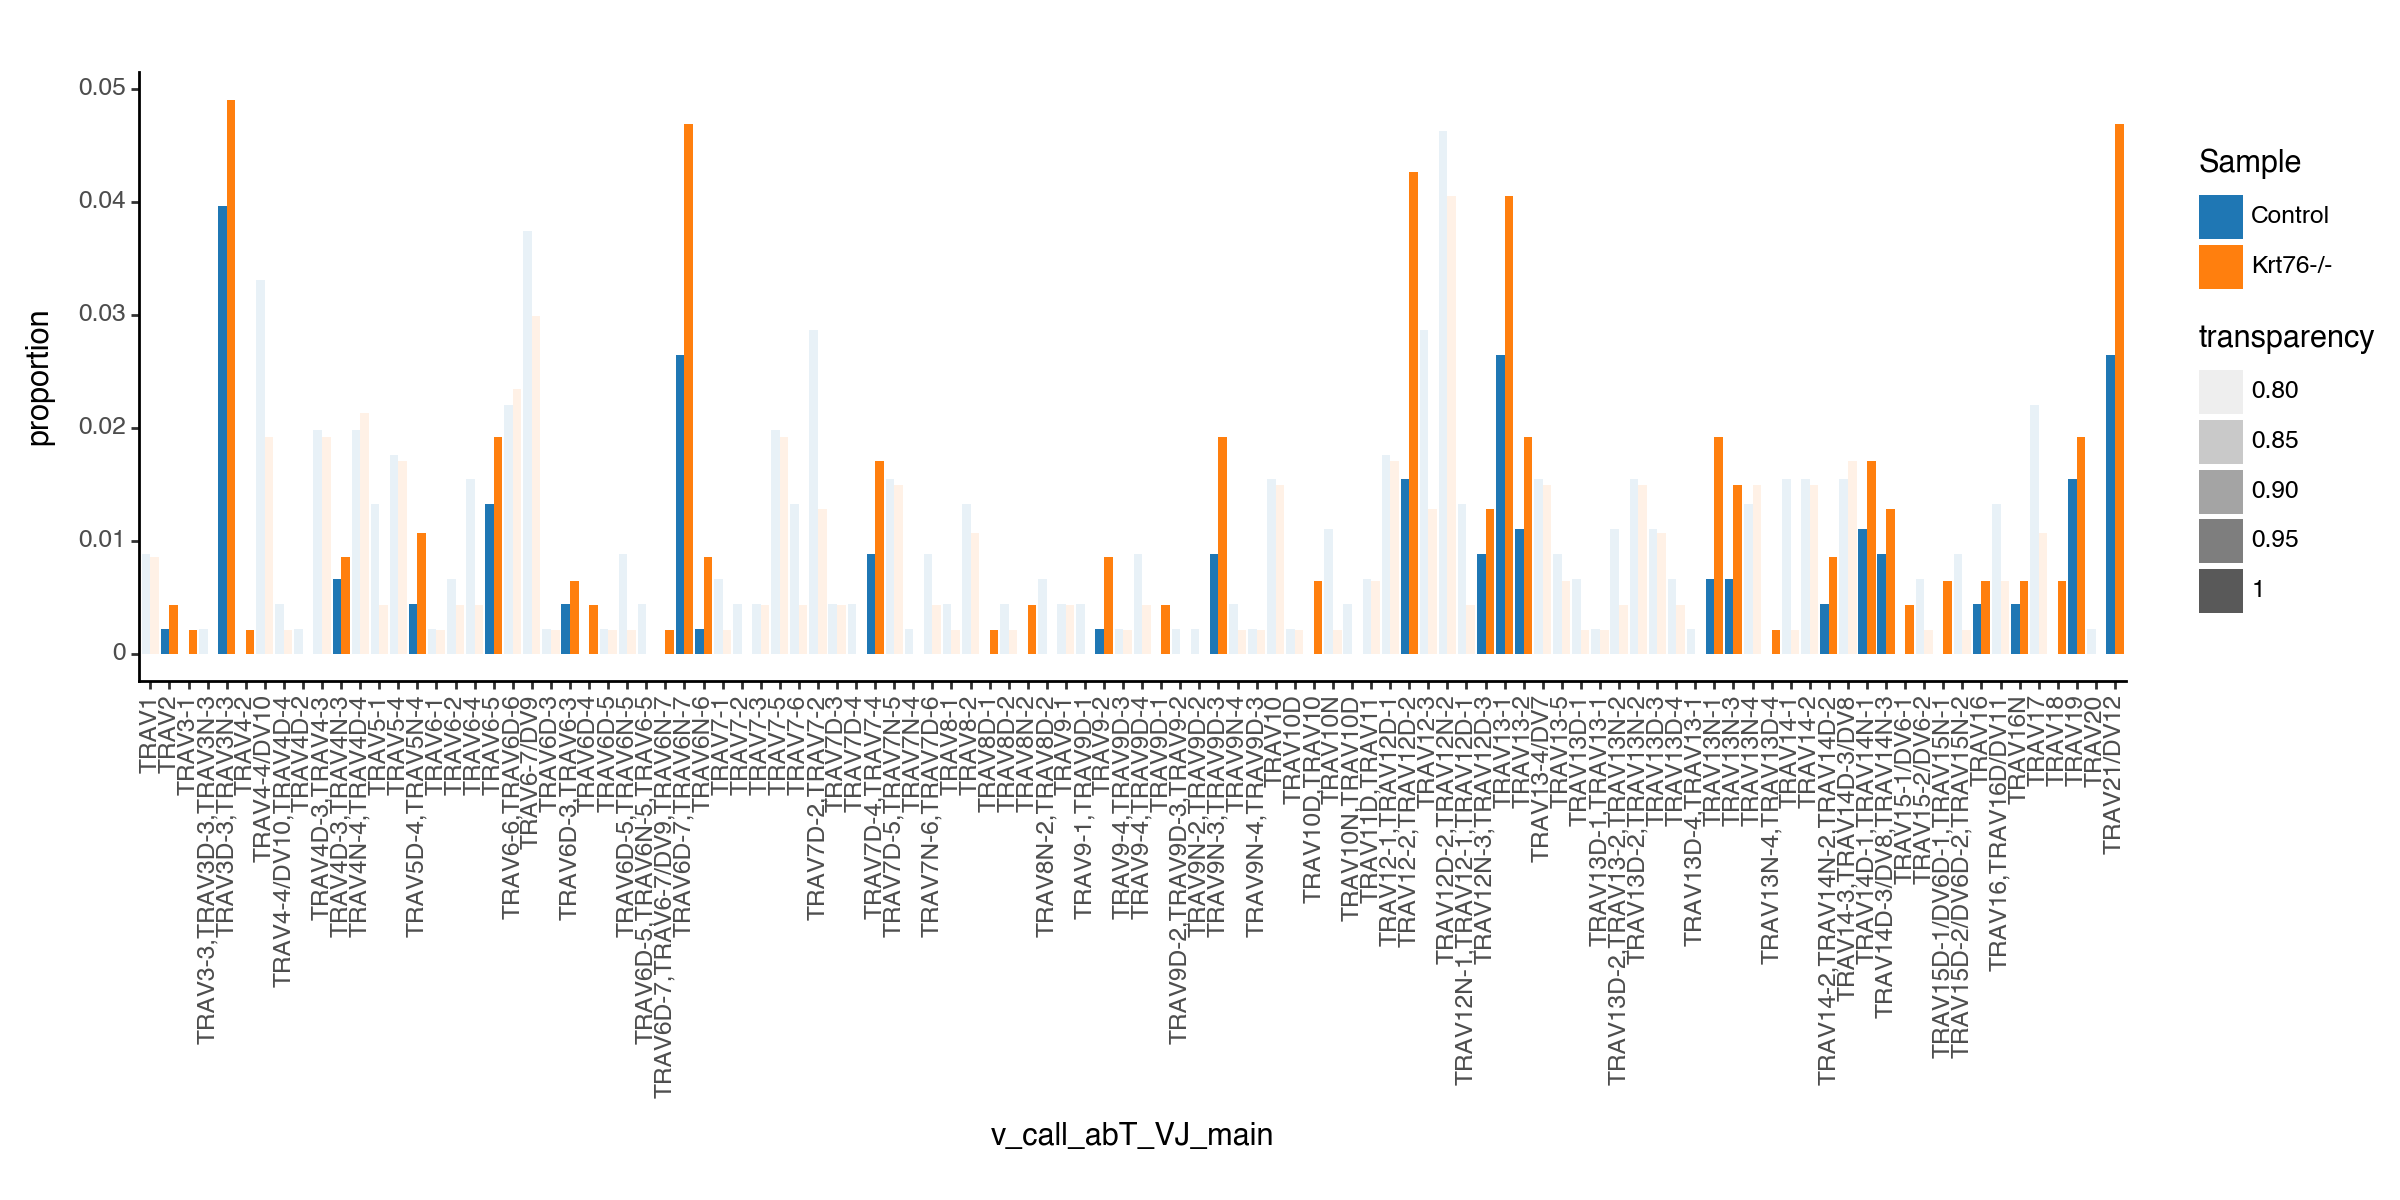

<Figure Size: (1200 x 600)>

In [2046]:
p

In [2047]:
p.save("VgeneAlphaChain_DP1_141223.pdf", height = 6, width = 8, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DP1_141223.pdf


### DP2 - V gene alpha chain

In [2048]:
adata_PF_DP2 = adata_PF[adata_PF.obs["leiden"] == "9 DP 2"]

In [2049]:
adata_PF_DP2

View of AnnData object with n_obs × n_vars = 17 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2050]:
working_df = pd.DataFrame(adata_PF_DP2.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                     
Control  TRAV7D-4,TRAV7-4                      2
         TRAV7-3                               1
         TRAV7-5                               1
         TRAV8-2                               1
         TRAV8D-1                              1
         TRAV12-3                              1
         TRAV12D-2,TRAV12N-2                   1
         TRAV13N-4,TRAV13D-4                   1
         TRAV14-2                              1
         TRAV6-5                               0
         TRAV6-7/DV9                           0
         TRAV12-2,TRAV12D-2                    0
         TRAV13-5                              0
         TRAV13D-3                             0
         TRAV13N-1                             0
Krt76-/- TRAV6-5                               1
         TRAV6-7/DV9                           1
         TRAV7-5                               1
         TRAV12-2,TRAV12D-2                    1
         TRAV13-5                              1
         TRAV13D-3                             1
         TRAV13N-1                             1
         TRAV7-3                               0
         TRAV7D-4,TRAV7-4                      0
         TRAV8-2                               0
         TRAV8D-1                              0
         TRAV12-3                              0
         TRAV12D-2,TRAV12N-2                   0
         TRAV13N-4,TRAV13D-4                   0
         TRAV14-2                              0

In [2051]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample   v_call_abT_VJ_main  counts
0    Control     TRAV7D-4,TRAV7-4       2
1    Control              TRAV7-3       1
2    Control              TRAV7-5       1
3    Control              TRAV8-2       1
4    Control             TRAV8D-1       1
5    Control             TRAV12-3       1
6    Control  TRAV12D-2,TRAV12N-2       1
7    Control  TRAV13N-4,TRAV13D-4       1
8    Control             TRAV14-2       1
9    Control              TRAV6-5       0
10   Control          TRAV6-7/DV9       0
11   Control   TRAV12-2,TRAV12D-2       0
12   Control             TRAV13-5       0
13   Control            TRAV13D-3       0
14   Control            TRAV13N-1       0
15  Krt76-/-              TRAV6-5       1
16  Krt76-/-          TRAV6-7/DV9       1
17  Krt76-/-              TRAV7-5       1
18  Krt76-/-   TRAV12-2,TRAV12D-2       1
19  Krt76-/-             TRAV13-5       1
20  Krt76-/-            TRAV13D-3       1
21  Krt76-/-            TRAV13N-1       1
22  Krt76-/-              TRAV7-3       0
23  Krt76-/-     TRAV7D-4,TRAV7-4       0
24  Krt76-/-              TRAV8-2       0
25  Krt76-/-             TRAV8D-1       0
26  Krt76-/-             TRAV12-3       0
27  Krt76-/-  TRAV12D-2,TRAV12N-2       0
28  Krt76-/-  TRAV13N-4,TRAV13D-4       0
29  Krt76-/-             TRAV14-2       0

In [2052]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 10, 'Krt76-/-': 7}

In [2053]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2054]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control     TRAV7D-4,TRAV7-4       2    0.200000
1    Control              TRAV7-3       1    0.100000
2    Control              TRAV7-5       1    0.100000
3    Control              TRAV8-2       1    0.100000
4    Control             TRAV8D-1       1    0.100000
5    Control             TRAV12-3       1    0.100000
6    Control  TRAV12D-2,TRAV12N-2       1    0.100000
7    Control  TRAV13N-4,TRAV13D-4       1    0.100000
8    Control             TRAV14-2       1    0.100000
9    Control              TRAV6-5       0    0.000000
10   Control          TRAV6-7/DV9       0    0.000000
11   Control   TRAV12-2,TRAV12D-2       0    0.000000
12   Control             TRAV13-5       0    0.000000
13   Control            TRAV13D-3       0    0.000000
14   Control            TRAV13N-1       0    0.000000
15  Krt76-/-              TRAV6-5       1    0.142857
16  Krt76-/-          TRAV6-7/DV9       1    0.142857
17  Krt76-/-              TRAV7-5       1    0.142857
18  Krt76-/-   TRAV12-2,TRAV12D-2       1    0.142857
19  Krt76-/-             TRAV13-5       1    0.142857
20  Krt76-/-            TRAV13D-3       1    0.142857
21  Krt76-/-            TRAV13N-1       1    0.142857
22  Krt76-/-              TRAV7-3       0    0.000000
23  Krt76-/-     TRAV7D-4,TRAV7-4       0    0.000000
24  Krt76-/-              TRAV8-2       0    0.000000
25  Krt76-/-             TRAV8D-1       0    0.000000
26  Krt76-/-             TRAV12-3       0    0.000000
27  Krt76-/-  TRAV12D-2,TRAV12N-2       0    0.000000
28  Krt76-/-  TRAV13N-4,TRAV13D-4       0    0.000000
29  Krt76-/-             TRAV14-2       0    0.000000

In [2055]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 10, 'Krt76-/-': 7}

In [2056]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2057]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control     TRAV7D-4,TRAV7-4       2    0.200000
1    Control              TRAV7-3       1    0.100000
2    Control              TRAV7-5       1    0.100000
3    Control              TRAV8-2       1    0.100000
4    Control             TRAV8D-1       1    0.100000
5    Control             TRAV12-3       1    0.100000
6    Control  TRAV12D-2,TRAV12N-2       1    0.100000
7    Control  TRAV13N-4,TRAV13D-4       1    0.100000
8    Control             TRAV14-2       1    0.100000
9    Control              TRAV6-5       0    0.000000
10   Control          TRAV6-7/DV9       0    0.000000
11   Control   TRAV12-2,TRAV12D-2       0    0.000000
12   Control             TRAV13-5       0    0.000000
13   Control            TRAV13D-3       0    0.000000
14   Control            TRAV13N-1       0    0.000000
15  Krt76-/-              TRAV6-5       1    0.142857
16  Krt76-/-          TRAV6-7/DV9       1    0.142857
17  Krt76-/-              TRAV7-5       1    0.142857
18  Krt76-/-   TRAV12-2,TRAV12D-2       1    0.142857
19  Krt76-/-             TRAV13-5       1    0.142857
20  Krt76-/-            TRAV13D-3       1    0.142857
21  Krt76-/-            TRAV13N-1       1    0.142857
22  Krt76-/-              TRAV7-3       0    0.000000
23  Krt76-/-     TRAV7D-4,TRAV7-4       0    0.000000
24  Krt76-/-              TRAV8-2       0    0.000000
25  Krt76-/-             TRAV8D-1       0    0.000000
26  Krt76-/-             TRAV12-3       0    0.000000
27  Krt76-/-  TRAV12D-2,TRAV12N-2       0    0.000000
28  Krt76-/-  TRAV13N-4,TRAV13D-4       0    0.000000
29  Krt76-/-             TRAV14-2       0    0.000000

In [2058]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2059]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2060]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [2061]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [2062]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV6-5': inf,
 'TRAV6-7/DV9': inf,
 'TRAV7-3': 0.0,
 'TRAV7-5': 1.4285714285714284,
 'TRAV7D-4,TRAV7-4': 0.0,
 'TRAV8-2': 0.0,
 'TRAV8D-1': 0.0,
 'TRAV12-2,TRAV12D-2': inf,
 'TRAV12-3': 0.0,
 'TRAV12D-2,TRAV12N-2': 0.0,
 'TRAV13-5': inf,
 'TRAV13D-3': inf,
 'TRAV13N-1': inf,
 'TRAV13N-4,TRAV13D-4': 0.0,
 'TRAV14-2': 0.0}

In [2063]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample   v_call_abT_VJ_main  counts  proportion  foldchange
0    Control     TRAV7D-4,TRAV7-4       2    0.200000    0.000000
1    Control              TRAV7-3       1    0.100000    0.000000
2    Control              TRAV7-5       1    0.100000    1.428571
3    Control              TRAV8-2       1    0.100000    0.000000
4    Control             TRAV8D-1       1    0.100000    0.000000
5    Control             TRAV12-3       1    0.100000    0.000000
6    Control  TRAV12D-2,TRAV12N-2       1    0.100000    0.000000
7    Control  TRAV13N-4,TRAV13D-4       1    0.100000    0.000000
8    Control             TRAV14-2       1    0.100000    0.000000
9    Control              TRAV6-5       0    0.000000         inf
10   Control          TRAV6-7/DV9       0    0.000000         inf
11   Control   TRAV12-2,TRAV12D-2       0    0.000000         inf
12   Control             TRAV13-5       0    0.000000         inf
13   Control            TRAV13D-3       0    0.000000         inf
14   Control            TRAV13N-1       0    0.000000         inf
15  Krt76-/-              TRAV6-5       1    0.142857         inf
16  Krt76-/-          TRAV6-7/DV9       1    0.142857         inf
17  Krt76-/-              TRAV7-5       1    0.142857    1.428571
18  Krt76-/-   TRAV12-2,TRAV12D-2       1    0.142857         inf
19  Krt76-/-             TRAV13-5       1    0.142857         inf
20  Krt76-/-            TRAV13D-3       1    0.142857         inf
21  Krt76-/-            TRAV13N-1       1    0.142857         inf
22  Krt76-/-              TRAV7-3       0    0.000000    0.000000
23  Krt76-/-     TRAV7D-4,TRAV7-4       0    0.000000    0.000000
24  Krt76-/-              TRAV8-2       0    0.000000    0.000000
25  Krt76-/-             TRAV8D-1       0    0.000000    0.000000
26  Krt76-/-             TRAV12-3       0    0.000000    0.000000
27  Krt76-/-  TRAV12D-2,TRAV12N-2       0    0.000000    0.000000
28  Krt76-/-  TRAV13N-4,TRAV13D-4       0    0.000000    0.000000
29  Krt76-/-             TRAV14-2       0    0.000000    0.000000

In [2064]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2065]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2066]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2067]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

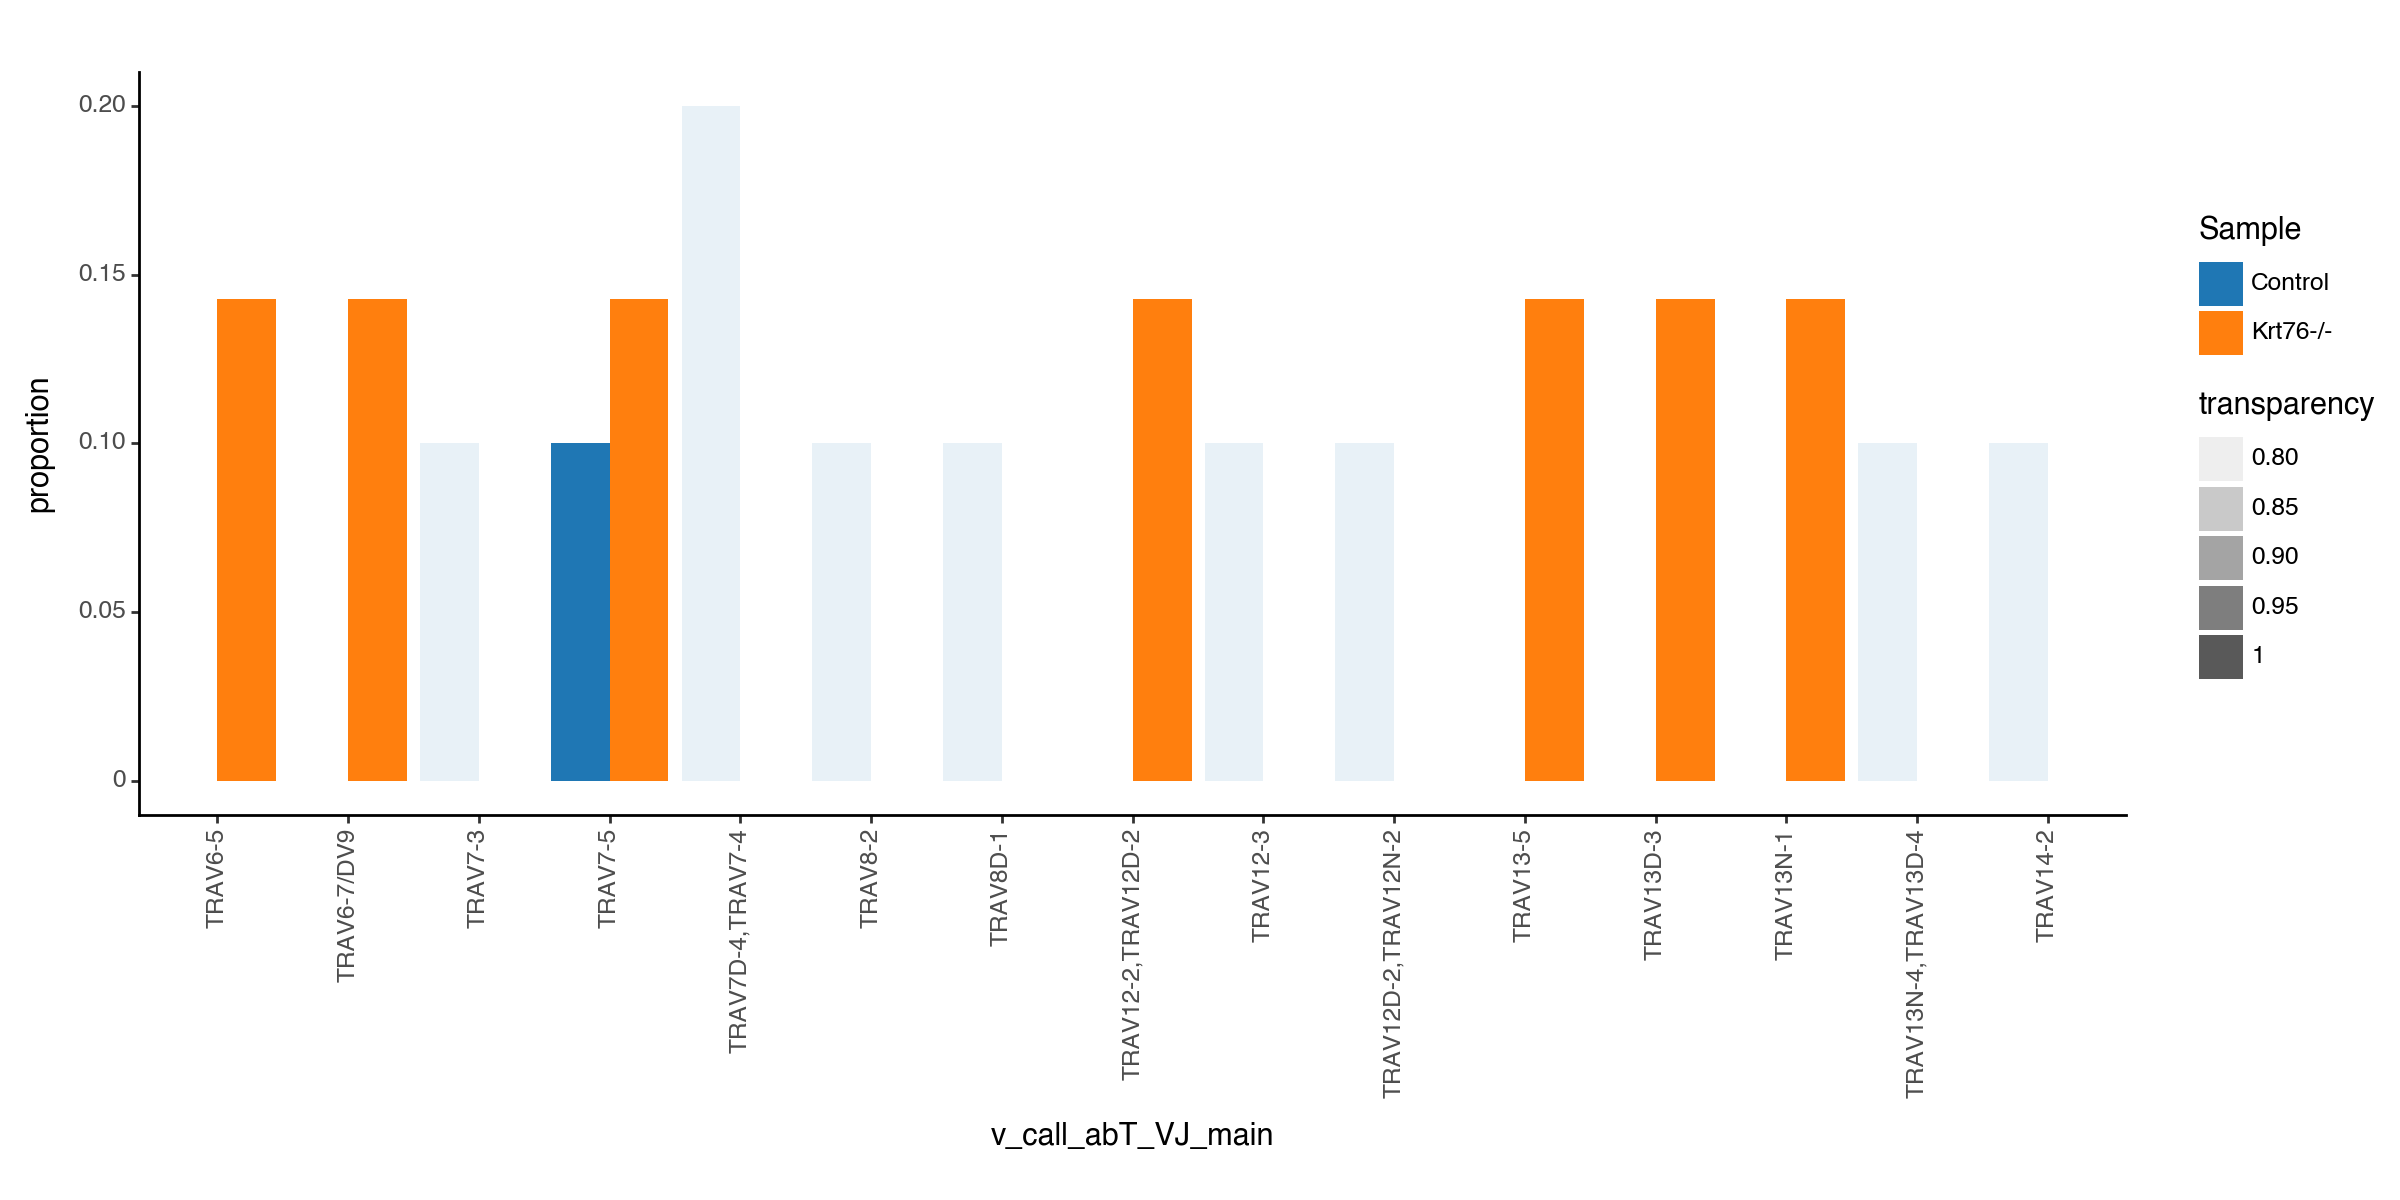

<Figure Size: (1200 x 600)>

In [2068]:
p

In [2069]:
p.save("VgeneAlphaChain_DP2_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DP2_141223.pdf


### SPDP - V gene alpha chain

In [2070]:
adata_PF_SPDP = adata_PF[adata_PF.obs["leiden"] == "5 SP & DP"]

In [2071]:
adata_PF_SPDP

View of AnnData object with n_obs × n_vars = 812 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2072]:
working_df = pd.DataFrame(adata_PF_SPDP.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                    
Control  TRAV6-6,TRAV6D-6                    26
         TRAV6D-7,TRAV6N-7                   21
         TRAV4N-4,TRAV4D-4                   20
         TRAV7D-2,TRAV7-2                    20
         TRAV3D-3,TRAV3N-3                   18
...                                         ...
Krt76-/- TRAV7N-4                             0
         TRAV7N-6,TRAV7D-6                    0
         TRAV13N-3                            0
         TRAV4-2                              0
         TRAV10D                              0

[174 rows x 1 columns]

In [2073]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VJ_main  counts
0     Control   TRAV6-6,TRAV6D-6      26
1     Control  TRAV6D-7,TRAV6N-7      21
2     Control  TRAV4N-4,TRAV4D-4      20
3     Control   TRAV7D-2,TRAV7-2      20
4     Control  TRAV3D-3,TRAV3N-3      18
..        ...                ...     ...
169  Krt76-/-           TRAV7N-4       0
170  Krt76-/-  TRAV7N-6,TRAV7D-6       0
171  Krt76-/-          TRAV13N-3       0
172  Krt76-/-            TRAV4-2       0
173  Krt76-/-            TRAV10D       0

[174 rows x 3 columns]

In [2074]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 536, 'Krt76-/-': 276}

In [2075]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2076]:
working_df

Sample v_call_abT_VJ_main  counts  proportion
0     Control   TRAV6-6,TRAV6D-6      26    0.048507
1     Control  TRAV6D-7,TRAV6N-7      21    0.039179
2     Control  TRAV4N-4,TRAV4D-4      20    0.037313
3     Control   TRAV7D-2,TRAV7-2      20    0.037313
4     Control  TRAV3D-3,TRAV3N-3      18    0.033582
..        ...                ...     ...         ...
169  Krt76-/-           TRAV7N-4       0    0.000000
170  Krt76-/-  TRAV7N-6,TRAV7D-6       0    0.000000
171  Krt76-/-          TRAV13N-3       0    0.000000
172  Krt76-/-            TRAV4-2       0    0.000000
173  Krt76-/-            TRAV10D       0    0.000000

[174 rows x 4 columns]

In [2077]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 536, 'Krt76-/-': 276}

In [2078]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2079]:
working_df

Sample v_call_abT_VJ_main  counts  proportion
0     Control   TRAV6-6,TRAV6D-6      26    0.048507
1     Control  TRAV6D-7,TRAV6N-7      21    0.039179
2     Control  TRAV4N-4,TRAV4D-4      20    0.037313
3     Control   TRAV7D-2,TRAV7-2      20    0.037313
4     Control  TRAV3D-3,TRAV3N-3      18    0.033582
..        ...                ...     ...         ...
169  Krt76-/-           TRAV7N-4       0    0.000000
170  Krt76-/-  TRAV7N-6,TRAV7D-6       0    0.000000
171  Krt76-/-          TRAV13N-3       0    0.000000
172  Krt76-/-            TRAV4-2       0    0.000000
173  Krt76-/-            TRAV10D       0    0.000000

[174 rows x 4 columns]

In [2080]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2081]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2082]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [2083]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [2084]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 3.8840579710144927,
 'TRAV2': 3.8840579710144927,
 'TRAV3D-3,TRAV3N-3': 0.7552334943639292,
 'TRAV4-2': 0.0,
 'TRAV4-4/DV10': 1.3871635610766047,
 'TRAV4-4/DV10,TRAV4D-4': 1.9420289855072463,
 'TRAV4D-3,TRAV4-3': 1.213768115942029,
 'TRAV4D-3,TRAV4N-3': 0.9710144927536232,
 'TRAV4N-4,TRAV4D-4': 0.8739130434782609,
 'TRAV5-1': 3.8840579710144927,
 'TRAV5-4': 0.8631239935587762,
 'TRAV5D-4,TRAV5N-4': 0.0,
 'TRAV6-1': 1.9420289855072463,
 'TRAV6-2': 0.4855072463768116,
 'TRAV6-4': 0.9710144927536232,
 'TRAV6-5': 0.2774327122153209,
 'TRAV6-6,TRAV6D-6': 0.5975473801560758,
 'TRAV6-7/DV9': 1.5104669887278583,
 'TRAV6D-3,TRAV6-3': 0.7061923583662714,
 'TRAV6D-4': 0.0,
 'TRAV6D-5': 0.0,
 'TRAV6D-5,TRAV6N-5': 1.9420289855072463,
 'TRAV6D-5,TRAV6N-5,TRAV6-5': inf,
 'TRAV6D-7,TRAV6N-7': 0.46238785369220153,
 'TRAV6N-6': 1.6183574879227054,
 'TRAV7-1': inf,
 'TRAV7-3': 2.9130434782608696,
 'TRAV7-5': 0.19420289855072465,
 'TRAV7-6': 1.165217391304348,
 'TRAV7D-2,TRAV7-2': 2.136231884057

In [2085]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample v_call_abT_VJ_main  counts  proportion  foldchange
0     Control   TRAV6-6,TRAV6D-6      26    0.048507    0.597547
1     Control  TRAV6D-7,TRAV6N-7      21    0.039179    0.462388
2     Control  TRAV4N-4,TRAV4D-4      20    0.037313    0.873913
3     Control   TRAV7D-2,TRAV7-2      20    0.037313    2.136232
4     Control  TRAV3D-3,TRAV3N-3      18    0.033582    0.755233
..        ...                ...     ...         ...         ...
169  Krt76-/-           TRAV7N-4       0    0.000000    0.000000
170  Krt76-/-  TRAV7N-6,TRAV7D-6       0    0.000000    0.000000
171  Krt76-/-          TRAV13N-3       0    0.000000    0.000000
172  Krt76-/-            TRAV4-2       0    0.000000    0.000000
173  Krt76-/-            TRAV10D       0    0.000000    0.000000

[174 rows x 5 columns]

In [2086]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2087]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2088]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2089]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

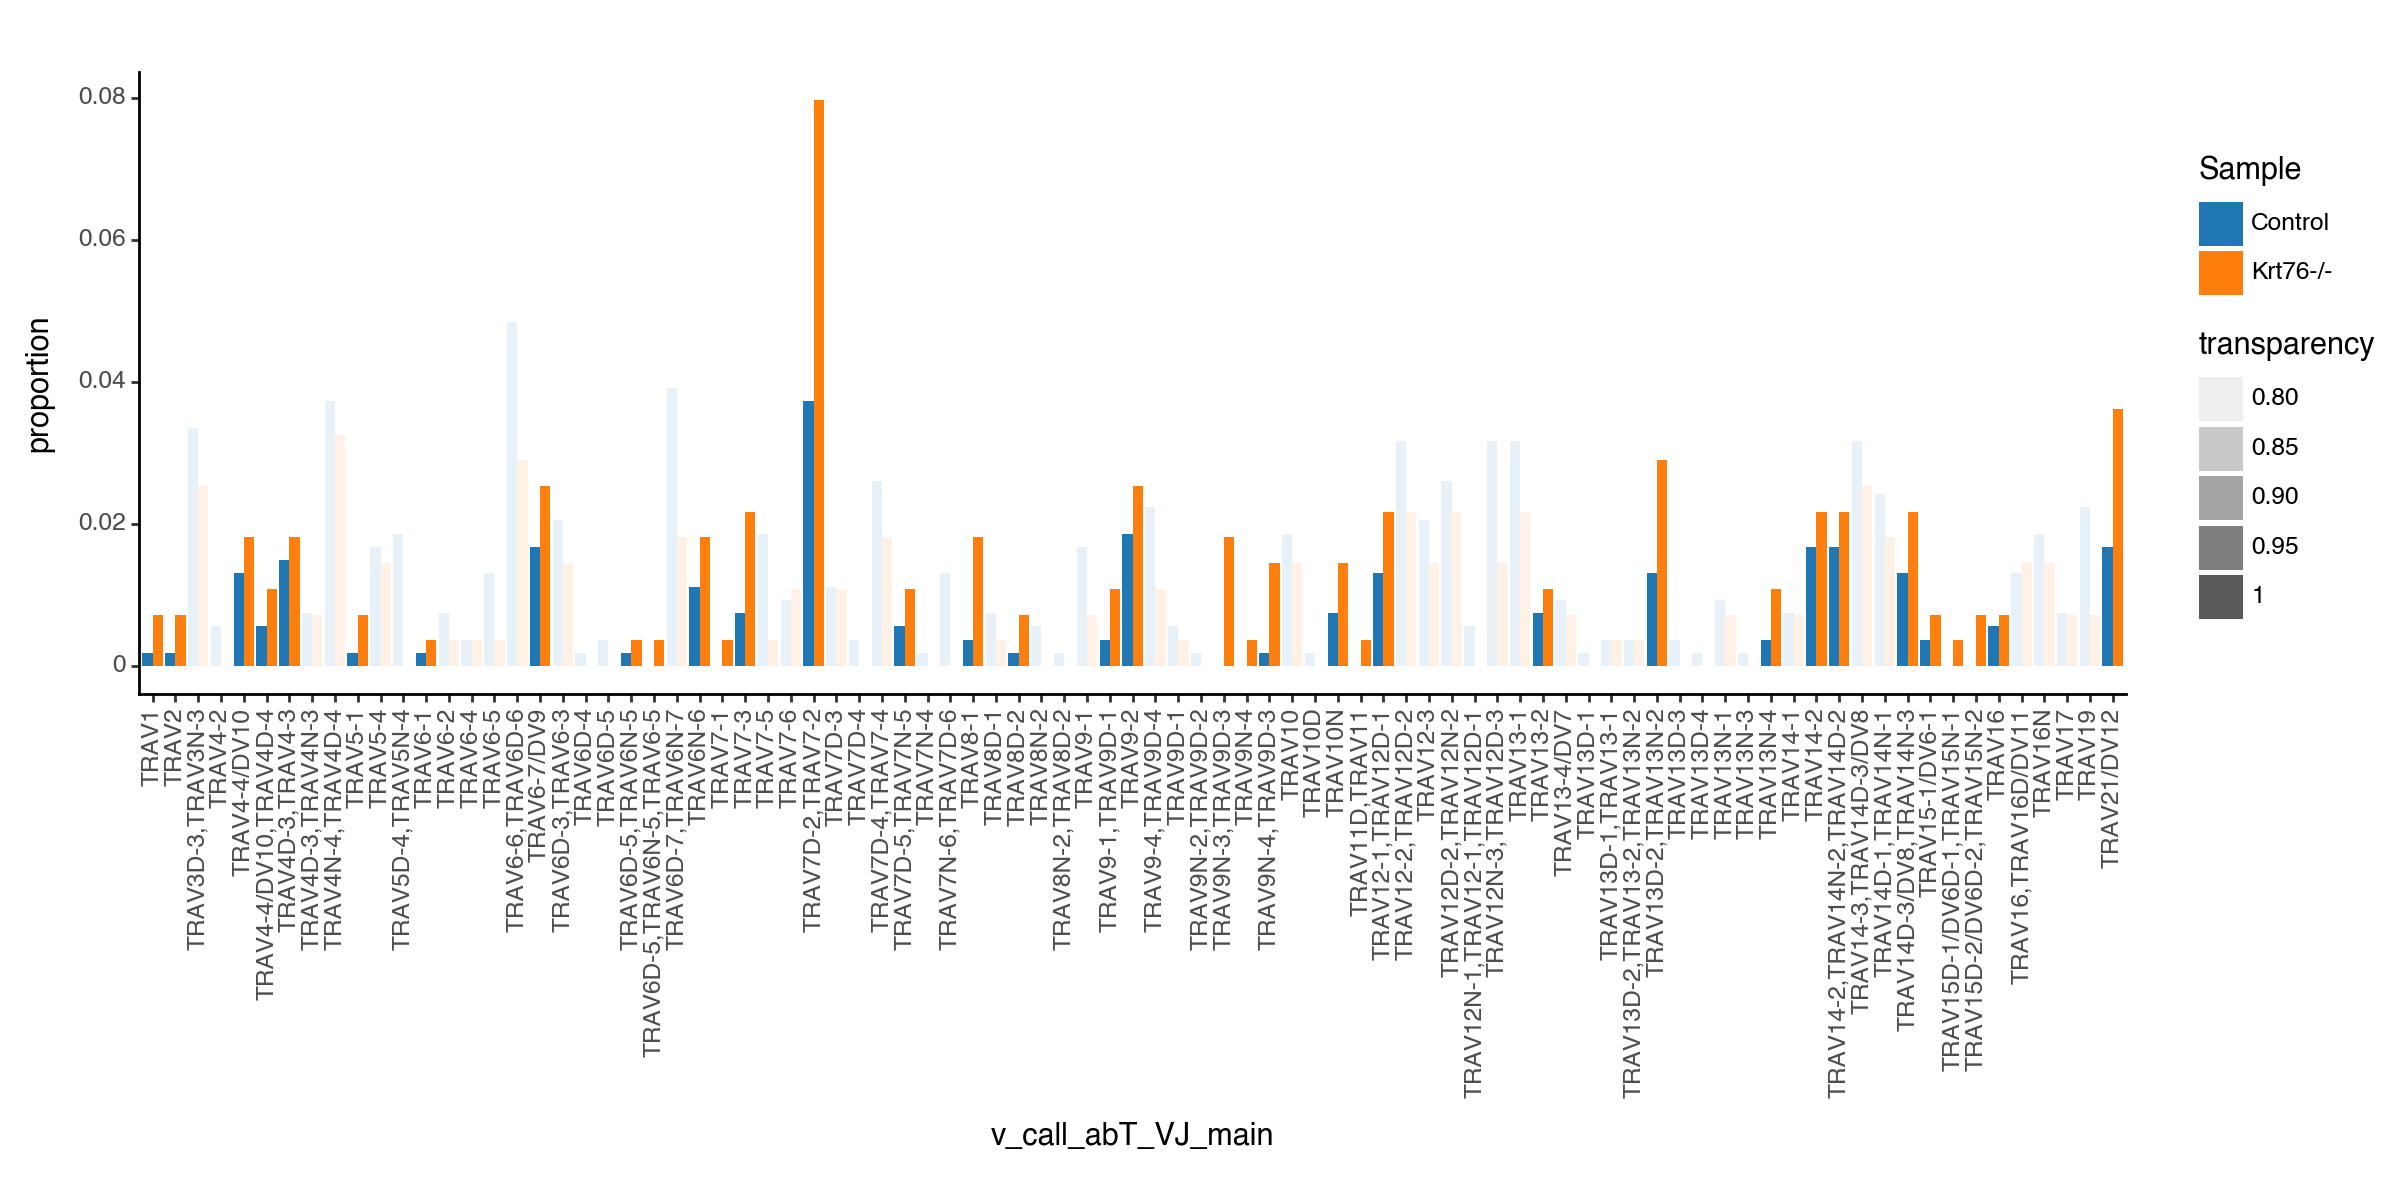

<Figure Size: (1200 x 600)>

In [2090]:
p

In [2091]:
p.save("VgeneAlphaChain_SPDP_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_SPDP_141223.pdf


### TCRgd - V gene alpha chain

In [2092]:
adata_PF_GD = adata_PF[adata_PF.obs["leiden"] == "8 TCRgd"]

In [2093]:
adata_PF_GD

View of AnnData object with n_obs × n_vars = 13 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2094]:
working_df = pd.DataFrame(adata_PF_GD.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                            
Control  TRAV13-1                                     2
         TRAV1                                        1
         TRAV3D-3,TRAV3N-3                            1
         TRAV4D-3,TRAV4-3                             1
         TRAV7D-5,TRAV7N-5                            1
         TRAV12D-2,TRAV12N-2                          1
         TRAV12N-3,TRAV12D-3                          1
         TRAV15D-2/DV6D-2,TRAV15N-2                   1
         TRAV21/DV12                                  1
Krt76-/- TRAV3D-3,TRAV3N-3                            1
         TRAV12N-3,TRAV12D-3                          1
         TRAV15D-2/DV6D-2,TRAV15N-2                   1
         TRAV1                                        0
         TRAV4D-3,TRAV4-3                             0
         TRAV7D-5,TRAV7N-5                            0
         TRAV12D-2,TRAV12N-2                          0
         TRAV13-1                                     0
         TRAV21/DV12                                  0

In [2095]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample          v_call_abT_VJ_main  counts
0    Control                    TRAV13-1       2
1    Control                       TRAV1       1
2    Control           TRAV3D-3,TRAV3N-3       1
3    Control            TRAV4D-3,TRAV4-3       1
4    Control           TRAV7D-5,TRAV7N-5       1
5    Control         TRAV12D-2,TRAV12N-2       1
6    Control         TRAV12N-3,TRAV12D-3       1
7    Control  TRAV15D-2/DV6D-2,TRAV15N-2       1
8    Control                 TRAV21/DV12       1
9   Krt76-/-           TRAV3D-3,TRAV3N-3       1
10  Krt76-/-         TRAV12N-3,TRAV12D-3       1
11  Krt76-/-  TRAV15D-2/DV6D-2,TRAV15N-2       1
12  Krt76-/-                       TRAV1       0
13  Krt76-/-            TRAV4D-3,TRAV4-3       0
14  Krt76-/-           TRAV7D-5,TRAV7N-5       0
15  Krt76-/-         TRAV12D-2,TRAV12N-2       0
16  Krt76-/-                    TRAV13-1       0
17  Krt76-/-                 TRAV21/DV12       0

In [2096]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 10, 'Krt76-/-': 3}

In [2097]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2098]:
working_df

Sample          v_call_abT_VJ_main  counts  proportion
0    Control                    TRAV13-1       2    0.200000
1    Control                       TRAV1       1    0.100000
2    Control           TRAV3D-3,TRAV3N-3       1    0.100000
3    Control            TRAV4D-3,TRAV4-3       1    0.100000
4    Control           TRAV7D-5,TRAV7N-5       1    0.100000
5    Control         TRAV12D-2,TRAV12N-2       1    0.100000
6    Control         TRAV12N-3,TRAV12D-3       1    0.100000
7    Control  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.100000
8    Control                 TRAV21/DV12       1    0.100000
9   Krt76-/-           TRAV3D-3,TRAV3N-3       1    0.333333
10  Krt76-/-         TRAV12N-3,TRAV12D-3       1    0.333333
11  Krt76-/-  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.333333
12  Krt76-/-                       TRAV1       0    0.000000
13  Krt76-/-            TRAV4D-3,TRAV4-3       0    0.000000
14  Krt76-/-           TRAV7D-5,TRAV7N-5       0    0.000000
15  Krt76-/-         TRAV12D-2,TRAV12N-2       0    0.000000
16  Krt76-/-                    TRAV13-1       0    0.000000
17  Krt76-/-                 TRAV21/DV12       0    0.000000

In [2099]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 10, 'Krt76-/-': 3}

In [2100]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2101]:
working_df

Sample          v_call_abT_VJ_main  counts  proportion
0    Control                    TRAV13-1       2    0.200000
1    Control                       TRAV1       1    0.100000
2    Control           TRAV3D-3,TRAV3N-3       1    0.100000
3    Control            TRAV4D-3,TRAV4-3       1    0.100000
4    Control           TRAV7D-5,TRAV7N-5       1    0.100000
5    Control         TRAV12D-2,TRAV12N-2       1    0.100000
6    Control         TRAV12N-3,TRAV12D-3       1    0.100000
7    Control  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.100000
8    Control                 TRAV21/DV12       1    0.100000
9   Krt76-/-           TRAV3D-3,TRAV3N-3       1    0.333333
10  Krt76-/-         TRAV12N-3,TRAV12D-3       1    0.333333
11  Krt76-/-  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.333333
12  Krt76-/-                       TRAV1       0    0.000000
13  Krt76-/-            TRAV4D-3,TRAV4-3       0    0.000000
14  Krt76-/-           TRAV7D-5,TRAV7N-5       0    0.000000
15  Krt76-/-         TRAV12D-2,TRAV12N-2       0    0.000000
16  Krt76-/-                    TRAV13-1       0    0.000000
17  Krt76-/-                 TRAV21/DV12       0    0.000000

In [2102]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2103]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2104]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [2105]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [2106]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.0,
 'TRAV3D-3,TRAV3N-3': 3.333333333333333,
 'TRAV4D-3,TRAV4-3': 0.0,
 'TRAV7D-5,TRAV7N-5': 0.0,
 'TRAV12D-2,TRAV12N-2': 0.0,
 'TRAV12N-3,TRAV12D-3': 3.333333333333333,
 'TRAV13-1': 0.0,
 'TRAV15D-2/DV6D-2,TRAV15N-2': 3.333333333333333,
 'TRAV21/DV12': 0.0}

In [2107]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample          v_call_abT_VJ_main  counts  proportion  foldchange
0    Control                    TRAV13-1       2    0.200000    0.000000
1    Control                       TRAV1       1    0.100000    0.000000
2    Control           TRAV3D-3,TRAV3N-3       1    0.100000    3.333333
3    Control            TRAV4D-3,TRAV4-3       1    0.100000    0.000000
4    Control           TRAV7D-5,TRAV7N-5       1    0.100000    0.000000
5    Control         TRAV12D-2,TRAV12N-2       1    0.100000    0.000000
6    Control         TRAV12N-3,TRAV12D-3       1    0.100000    3.333333
7    Control  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.100000    3.333333
8    Control                 TRAV21/DV12       1    0.100000    0.000000
9   Krt76-/-           TRAV3D-3,TRAV3N-3       1    0.333333    3.333333
10  Krt76-/-         TRAV12N-3,TRAV12D-3       1    0.333333    3.333333
11  Krt76-/-  TRAV15D-2/DV6D-2,TRAV15N-2       1    0.333333    3.333333
12  Krt76-/-                       TRAV1       0    0.000000    0.000000
13  Krt76-/-            TRAV4D-3,TRAV4-3       0    0.000000    0.000000
14  Krt76-/-           TRAV7D-5,TRAV7N-5       0    0.000000    0.000000
15  Krt76-/-         TRAV12D-2,TRAV12N-2       0    0.000000    0.000000
16  Krt76-/-                    TRAV13-1       0    0.000000    0.000000
17  Krt76-/-                 TRAV21/DV12       0    0.000000    0.000000

In [2108]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2109]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2110]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2111]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

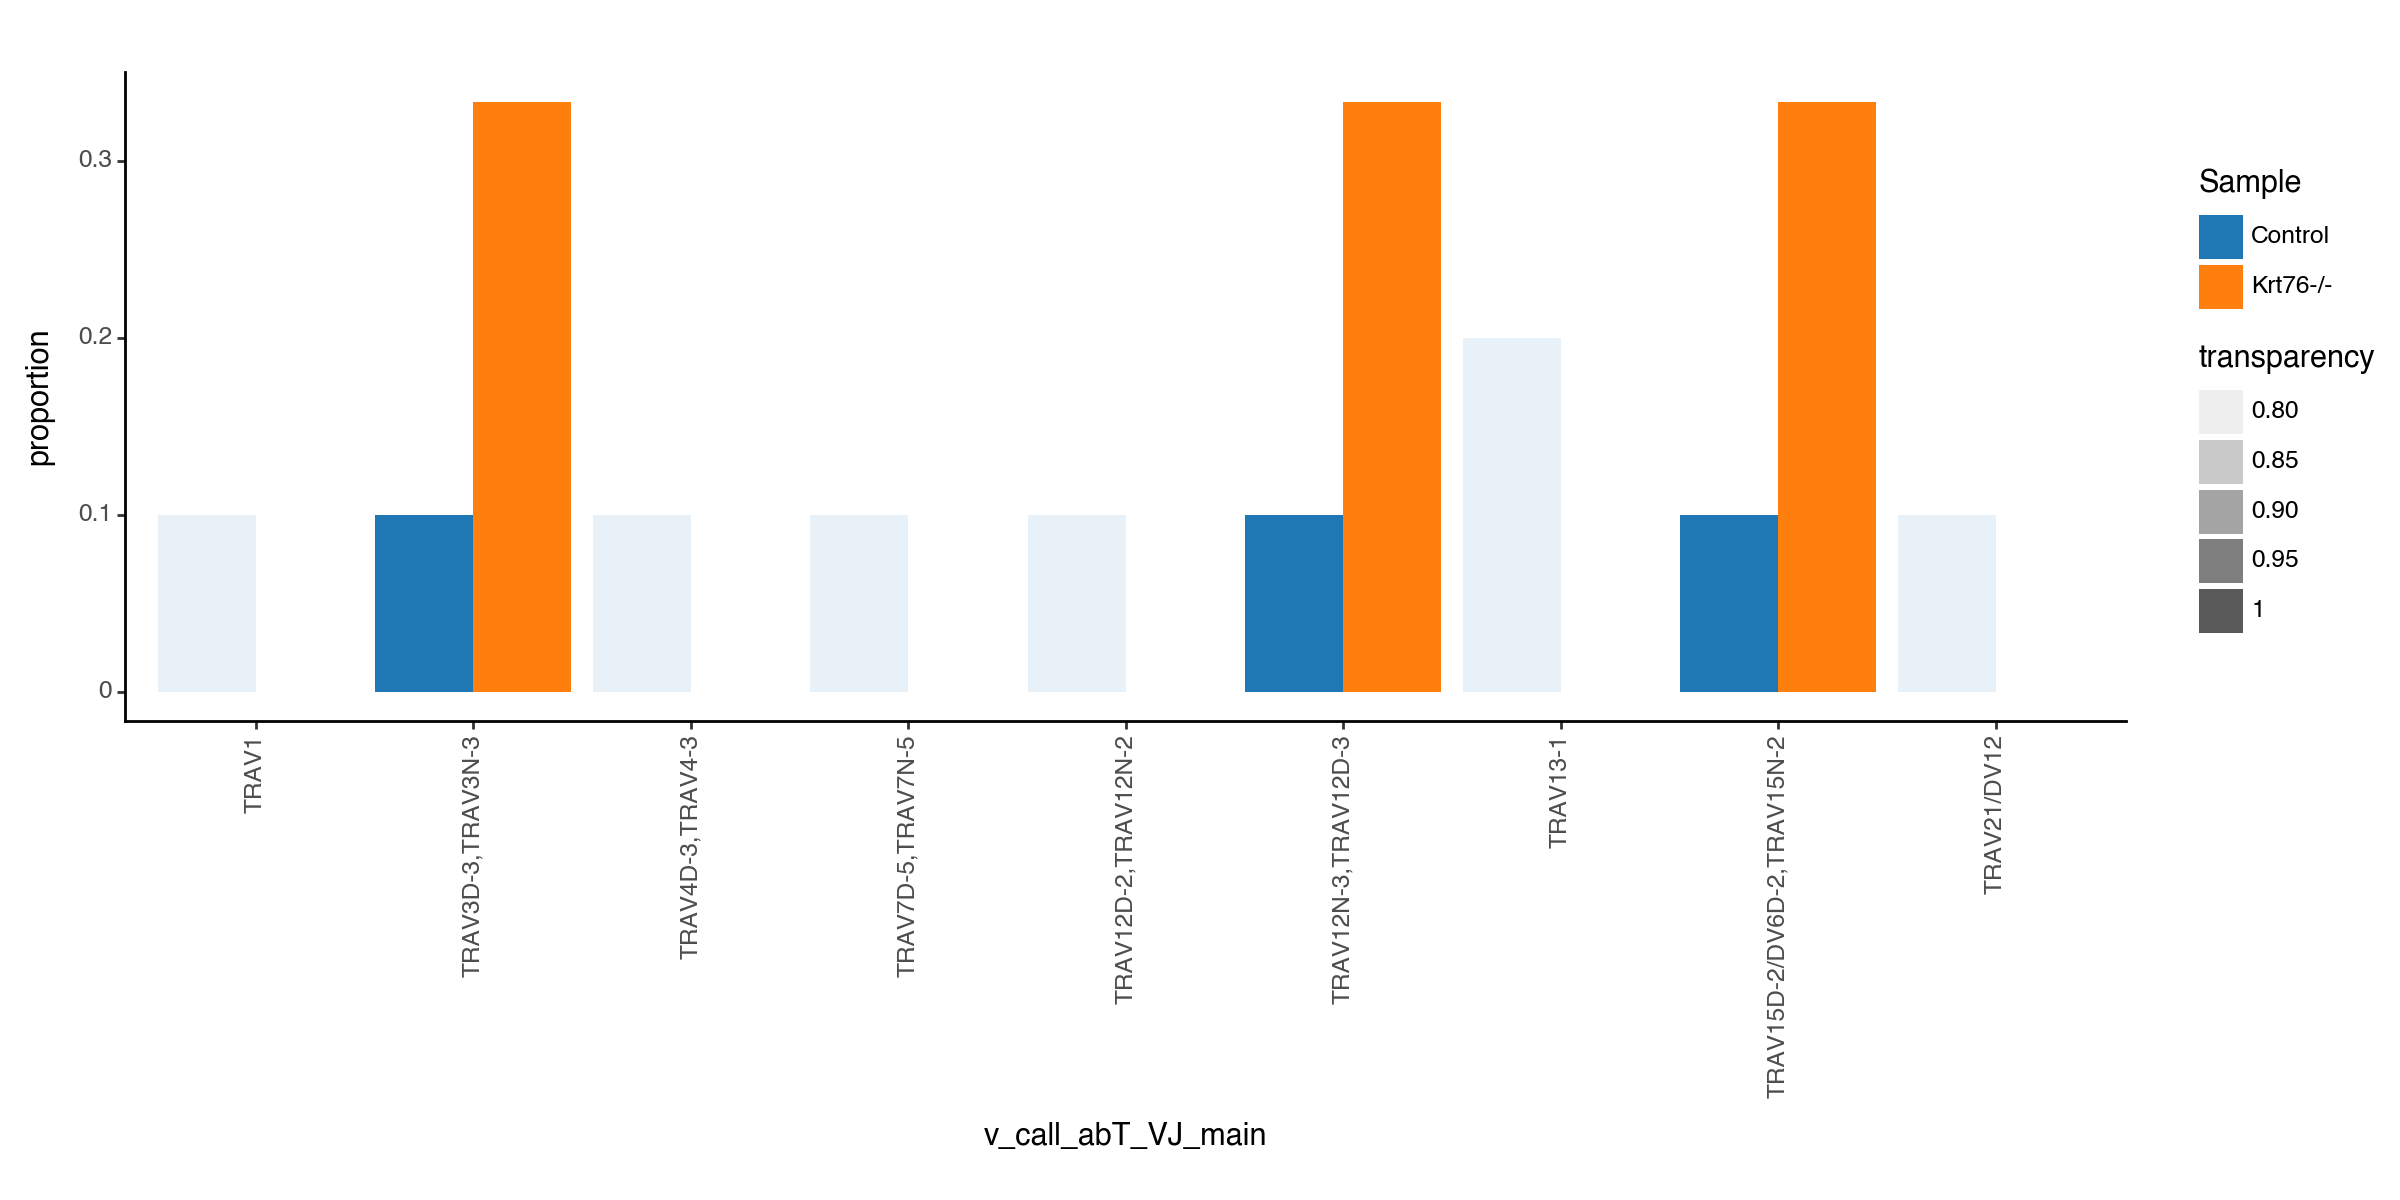

<Figure Size: (1200 x 600)>

In [2112]:
p

In [2113]:
p.save("VgeneAlphaChain_GD_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_GD_141223.pdf


### NKT/NK/Tregs - V gene alpha chain

In [2114]:
adata_PF_NK = adata_PF[adata_PF.obs["leiden"] == "11 NKT / NK / Tregs"]

In [2115]:
adata_PF_NK

View of AnnData object with n_obs × n_vars = 139 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2116]:
working_df = pd.DataFrame(adata_PF_NK.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
Sample   v_call_abT_VJ_main                    
Control  TRAV11D,TRAV11                      11
         TRAV6-7/DV9                          7
         TRAV7D-4,TRAV7-4                     5
         TRAV3D-3,TRAV3N-3                    5
         TRAV12-2,TRAV12D-2                   4
...                                         ...
Krt76-/- TRAV9-2                              0
         TRAV3D-3,TRAV3N-3                    0
         TRAV9N-3,TRAV9D-3                    0
         TRAV9N-4,TRAV9D-3                    0
         TRAV21/DV12                          0

[118 rows x 1 columns]

In [2117]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample  v_call_abT_VJ_main  counts
0     Control      TRAV11D,TRAV11      11
1     Control         TRAV6-7/DV9       7
2     Control    TRAV7D-4,TRAV7-4       5
3     Control   TRAV3D-3,TRAV3N-3       5
4     Control  TRAV12-2,TRAV12D-2       4
..        ...                 ...     ...
113  Krt76-/-             TRAV9-2       0
114  Krt76-/-   TRAV3D-3,TRAV3N-3       0
115  Krt76-/-   TRAV9N-3,TRAV9D-3       0
116  Krt76-/-   TRAV9N-4,TRAV9D-3       0
117  Krt76-/-         TRAV21/DV12       0

[118 rows x 3 columns]

In [2118]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 109, 'Krt76-/-': 30}

In [2119]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2120]:
working_df

Sample  v_call_abT_VJ_main  counts  proportion
0     Control      TRAV11D,TRAV11      11    0.100917
1     Control         TRAV6-7/DV9       7    0.064220
2     Control    TRAV7D-4,TRAV7-4       5    0.045872
3     Control   TRAV3D-3,TRAV3N-3       5    0.045872
4     Control  TRAV12-2,TRAV12D-2       4    0.036697
..        ...                 ...     ...         ...
113  Krt76-/-             TRAV9-2       0    0.000000
114  Krt76-/-   TRAV3D-3,TRAV3N-3       0    0.000000
115  Krt76-/-   TRAV9N-3,TRAV9D-3       0    0.000000
116  Krt76-/-   TRAV9N-4,TRAV9D-3       0    0.000000
117  Krt76-/-         TRAV21/DV12       0    0.000000

[118 rows x 4 columns]

In [2121]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 109, 'Krt76-/-': 30}

In [2122]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2123]:
working_df

Sample  v_call_abT_VJ_main  counts  proportion
0     Control      TRAV11D,TRAV11      11    0.100917
1     Control         TRAV6-7/DV9       7    0.064220
2     Control    TRAV7D-4,TRAV7-4       5    0.045872
3     Control   TRAV3D-3,TRAV3N-3       5    0.045872
4     Control  TRAV12-2,TRAV12D-2       4    0.036697
..        ...                 ...     ...         ...
113  Krt76-/-             TRAV9-2       0    0.000000
114  Krt76-/-   TRAV3D-3,TRAV3N-3       0    0.000000
115  Krt76-/-   TRAV9N-3,TRAV9D-3       0    0.000000
116  Krt76-/-   TRAV9N-4,TRAV9D-3       0    0.000000
117  Krt76-/-         TRAV21/DV12       0    0.000000

[118 rows x 4 columns]

In [2124]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2125]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2126]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [2127]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [2128]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.0,
 'TRAV3D-3,TRAV3N-3': 0.0,
 'TRAV4-2': 0.0,
 'TRAV4-4/DV10': inf,
 'TRAV4-4/DV10,TRAV4D-4': 0.0,
 'TRAV4D-3,TRAV4-3': 0.0,
 'TRAV4N-4,TRAV4D-4': 1.8166666666666664,
 'TRAV5-1': 0.0,
 'TRAV5-4': 0.0,
 'TRAV6-5': 3.633333333333333,
 'TRAV6-6,TRAV6D-6': 0.9083333333333332,
 'TRAV6-7/DV9': 1.5571428571428572,
 'TRAV6D-3,TRAV6-3': 0.0,
 'TRAV6D-4': 0.0,
 'TRAV6D-5': 0.0,
 'TRAV6D-7,TRAV6N-7': 7.266666666666666,
 'TRAV7-1': 0.0,
 'TRAV7-5': 1.8166666666666664,
 'TRAV7D-2,TRAV7-2': 0.0,
 'TRAV7D-4,TRAV7-4': 0.7266666666666666,
 'TRAV7D-5,TRAV7N-5': 0.0,
 'TRAV7N-6,TRAV7D-6': 0.0,
 'TRAV8-1': 0.0,
 'TRAV8D-2': 0.0,
 'TRAV8N-2': 0.0,
 'TRAV9-1': 1.8166666666666664,
 'TRAV9-1,TRAV9D-1': inf,
 'TRAV9-2': 0.0,
 'TRAV9-4,TRAV9D-4': inf,
 'TRAV9D-1': 0.0,
 'TRAV9N-3,TRAV9D-3': 0.0,
 'TRAV9N-4': 1.8166666666666664,
 'TRAV9N-4,TRAV9D-3': 0.0,
 'TRAV10': 0.0,
 'TRAV10N': 1.8166666666666664,
 'TRAV10N,TRAV10D': 0.0,
 'TRAV11D,TRAV11': 1.981818181818182,
 'TRAV12-2,TRAV12D-2': 0.9083333333

In [2129]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample  v_call_abT_VJ_main  counts  proportion  foldchange
0     Control      TRAV11D,TRAV11      11    0.100917    1.981818
1     Control         TRAV6-7/DV9       7    0.064220    1.557143
2     Control    TRAV7D-4,TRAV7-4       5    0.045872    0.726667
3     Control   TRAV3D-3,TRAV3N-3       5    0.045872    0.000000
4     Control  TRAV12-2,TRAV12D-2       4    0.036697    0.908333
..        ...                 ...     ...         ...         ...
113  Krt76-/-             TRAV9-2       0    0.000000    0.000000
114  Krt76-/-   TRAV3D-3,TRAV3N-3       0    0.000000    0.000000
115  Krt76-/-   TRAV9N-3,TRAV9D-3       0    0.000000    0.000000
116  Krt76-/-   TRAV9N-4,TRAV9D-3       0    0.000000    0.000000
117  Krt76-/-         TRAV21/DV12       0    0.000000    0.000000

[118 rows x 5 columns]

In [2130]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2131]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2132]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2133]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

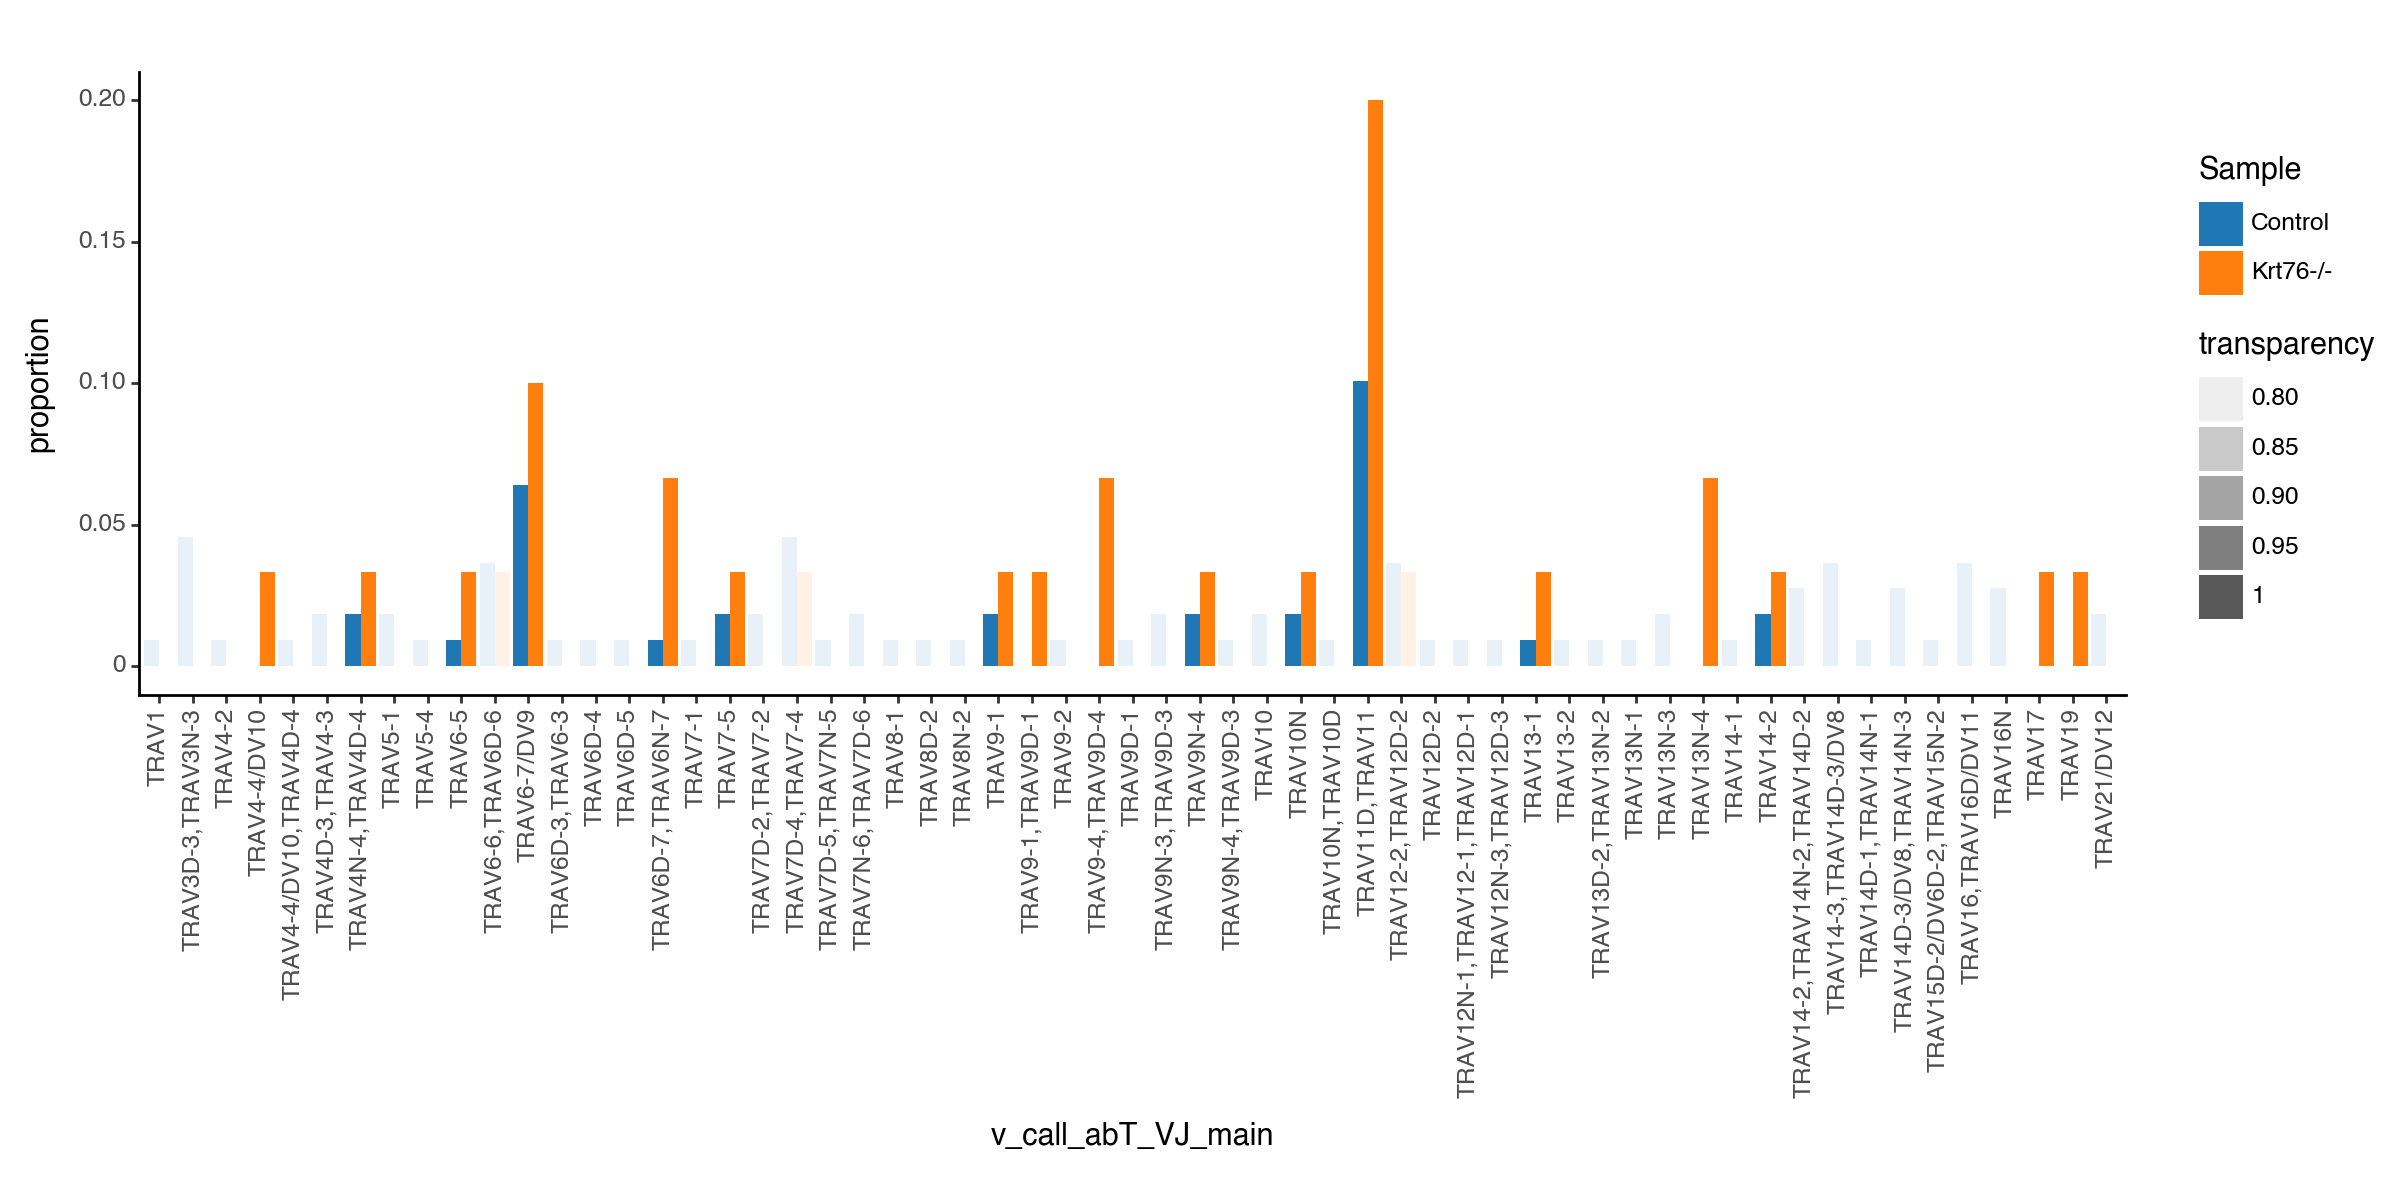

<Figure Size: (1200 x 600)>

In [2134]:
p

In [2135]:
p.save("VgeneAlphaChain_NKTregs_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_NKTregs_141223.pdf


## J gene Alpha chain

In [2136]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VJ_main"] != "No_contig"]

### DN2a - J gene alpha chain

In [2137]:
adata_PF_DN2a = adata_PF[adata_PF.obs["leiden"] == "7 DN2a"]

In [2138]:
adata_PF_DN2a

View of AnnData object with n_obs × n_vars = 17 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2139]:
working_df = pd.DataFrame(adata_PF_DN2a.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ7                                2
         TRAJ2                                1
         TRAJ4                                1
         TRAJ12                               1
         TRAJ15                               1
         TRAJ22                               1
         TRAJ30                               1
         TRAJ38                               1
         TRAJ42                               1
         TRAJ44                               1
         TRAJ52                               1
         TRAJ5                                0
         TRAJ32                               0
         TRAJ34                               0
         TRAJ57                               0
Krt76-/- TRAJ5                                1
         TRAJ32                               1
         TRAJ34                               1
         TRAJ52                               1
         TRAJ57                               1
         TRAJ2                                0
         TRAJ4                                0
         TRAJ7                                0
         TRAJ12                               0
         TRAJ15                               0
         TRAJ22                               0
         TRAJ30                               0
         TRAJ38                               0
         TRAJ42                               0
         TRAJ44                               0

In [2140]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control              TRAJ7       2
1    Control              TRAJ2       1
2    Control              TRAJ4       1
3    Control             TRAJ12       1
4    Control             TRAJ15       1
5    Control             TRAJ22       1
6    Control             TRAJ30       1
7    Control             TRAJ38       1
8    Control             TRAJ42       1
9    Control             TRAJ44       1
10   Control             TRAJ52       1
11   Control              TRAJ5       0
12   Control             TRAJ32       0
13   Control             TRAJ34       0
14   Control             TRAJ57       0
15  Krt76-/-              TRAJ5       1
16  Krt76-/-             TRAJ32       1
17  Krt76-/-             TRAJ34       1
18  Krt76-/-             TRAJ52       1
19  Krt76-/-             TRAJ57       1
20  Krt76-/-              TRAJ2       0
21  Krt76-/-              TRAJ4       0
22  Krt76-/-              TRAJ7       0
23  Krt76-/-             TRAJ12       0
24  Krt76-/-             TRAJ15       0
25  Krt76-/-             TRAJ22       0
26  Krt76-/-             TRAJ30       0
27  Krt76-/-             TRAJ38       0
28  Krt76-/-             TRAJ42       0
29  Krt76-/-             TRAJ44       0

In [2141]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 12, 'Krt76-/-': 5}

In [2142]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2143]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control              TRAJ7       2    0.166667
1    Control              TRAJ2       1    0.083333
2    Control              TRAJ4       1    0.083333
3    Control             TRAJ12       1    0.083333
4    Control             TRAJ15       1    0.083333
5    Control             TRAJ22       1    0.083333
6    Control             TRAJ30       1    0.083333
7    Control             TRAJ38       1    0.083333
8    Control             TRAJ42       1    0.083333
9    Control             TRAJ44       1    0.083333
10   Control             TRAJ52       1    0.083333
11   Control              TRAJ5       0    0.000000
12   Control             TRAJ32       0    0.000000
13   Control             TRAJ34       0    0.000000
14   Control             TRAJ57       0    0.000000
15  Krt76-/-              TRAJ5       1    0.200000
16  Krt76-/-             TRAJ32       1    0.200000
17  Krt76-/-             TRAJ34       1    0.200000
18  Krt76-/-             TRAJ52       1    0.200000
19  Krt76-/-             TRAJ57       1    0.200000
20  Krt76-/-              TRAJ2       0    0.000000
21  Krt76-/-              TRAJ4       0    0.000000
22  Krt76-/-              TRAJ7       0    0.000000
23  Krt76-/-             TRAJ12       0    0.000000
24  Krt76-/-             TRAJ15       0    0.000000
25  Krt76-/-             TRAJ22       0    0.000000
26  Krt76-/-             TRAJ30       0    0.000000
27  Krt76-/-             TRAJ38       0    0.000000
28  Krt76-/-             TRAJ42       0    0.000000
29  Krt76-/-             TRAJ44       0    0.000000

In [2144]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 12, 'Krt76-/-': 5}

In [2145]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2146]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control              TRAJ7       2    0.166667
1    Control              TRAJ2       1    0.083333
2    Control              TRAJ4       1    0.083333
3    Control             TRAJ12       1    0.083333
4    Control             TRAJ15       1    0.083333
5    Control             TRAJ22       1    0.083333
6    Control             TRAJ30       1    0.083333
7    Control             TRAJ38       1    0.083333
8    Control             TRAJ42       1    0.083333
9    Control             TRAJ44       1    0.083333
10   Control             TRAJ52       1    0.083333
11   Control              TRAJ5       0    0.000000
12   Control             TRAJ32       0    0.000000
13   Control             TRAJ34       0    0.000000
14   Control             TRAJ57       0    0.000000
15  Krt76-/-              TRAJ5       1    0.200000
16  Krt76-/-             TRAJ32       1    0.200000
17  Krt76-/-             TRAJ34       1    0.200000
18  Krt76-/-             TRAJ52       1    0.200000
19  Krt76-/-             TRAJ57       1    0.200000
20  Krt76-/-              TRAJ2       0    0.000000
21  Krt76-/-              TRAJ4       0    0.000000
22  Krt76-/-              TRAJ7       0    0.000000
23  Krt76-/-             TRAJ12       0    0.000000
24  Krt76-/-             TRAJ15       0    0.000000
25  Krt76-/-             TRAJ22       0    0.000000
26  Krt76-/-             TRAJ30       0    0.000000
27  Krt76-/-             TRAJ38       0    0.000000
28  Krt76-/-             TRAJ42       0    0.000000
29  Krt76-/-             TRAJ44       0    0.000000

In [2147]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2148]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2149]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2150]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2151]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ2': 0.0,
 'TRAJ4': 0.0,
 'TRAJ5': inf,
 'TRAJ7': 0.0,
 'TRAJ12': 0.0,
 'TRAJ15': 0.0,
 'TRAJ22': 0.0,
 'TRAJ30': 0.0,
 'TRAJ32': inf,
 'TRAJ34': inf,
 'TRAJ38': 0.0,
 'TRAJ42': 0.0,
 'TRAJ44': 0.0,
 'TRAJ52': 2.4000000000000004,
 'TRAJ57': inf}

In [2152]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control              TRAJ7       2    0.166667         0.0
1    Control              TRAJ2       1    0.083333         0.0
2    Control              TRAJ4       1    0.083333         0.0
3    Control             TRAJ12       1    0.083333         0.0
4    Control             TRAJ15       1    0.083333         0.0
5    Control             TRAJ22       1    0.083333         0.0
6    Control             TRAJ30       1    0.083333         0.0
7    Control             TRAJ38       1    0.083333         0.0
8    Control             TRAJ42       1    0.083333         0.0
9    Control             TRAJ44       1    0.083333         0.0
10   Control             TRAJ52       1    0.083333         2.4
11   Control              TRAJ5       0    0.000000         inf
12   Control             TRAJ32       0    0.000000         inf
13   Control             TRAJ34       0    0.000000         inf
14   Control             TRAJ57       0    0.000000         inf
15  Krt76-/-              TRAJ5       1    0.200000         inf
16  Krt76-/-             TRAJ32       1    0.200000         inf
17  Krt76-/-             TRAJ34       1    0.200000         inf
18  Krt76-/-             TRAJ52       1    0.200000         2.4
19  Krt76-/-             TRAJ57       1    0.200000         inf
20  Krt76-/-              TRAJ2       0    0.000000         0.0
21  Krt76-/-              TRAJ4       0    0.000000         0.0
22  Krt76-/-              TRAJ7       0    0.000000         0.0
23  Krt76-/-             TRAJ12       0    0.000000         0.0
24  Krt76-/-             TRAJ15       0    0.000000         0.0
25  Krt76-/-             TRAJ22       0    0.000000         0.0
26  Krt76-/-             TRAJ30       0    0.000000         0.0
27  Krt76-/-             TRAJ38       0    0.000000         0.0
28  Krt76-/-             TRAJ42       0    0.000000         0.0
29  Krt76-/-             TRAJ44       0    0.000000         0.0

In [2153]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2154]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2155]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2156]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

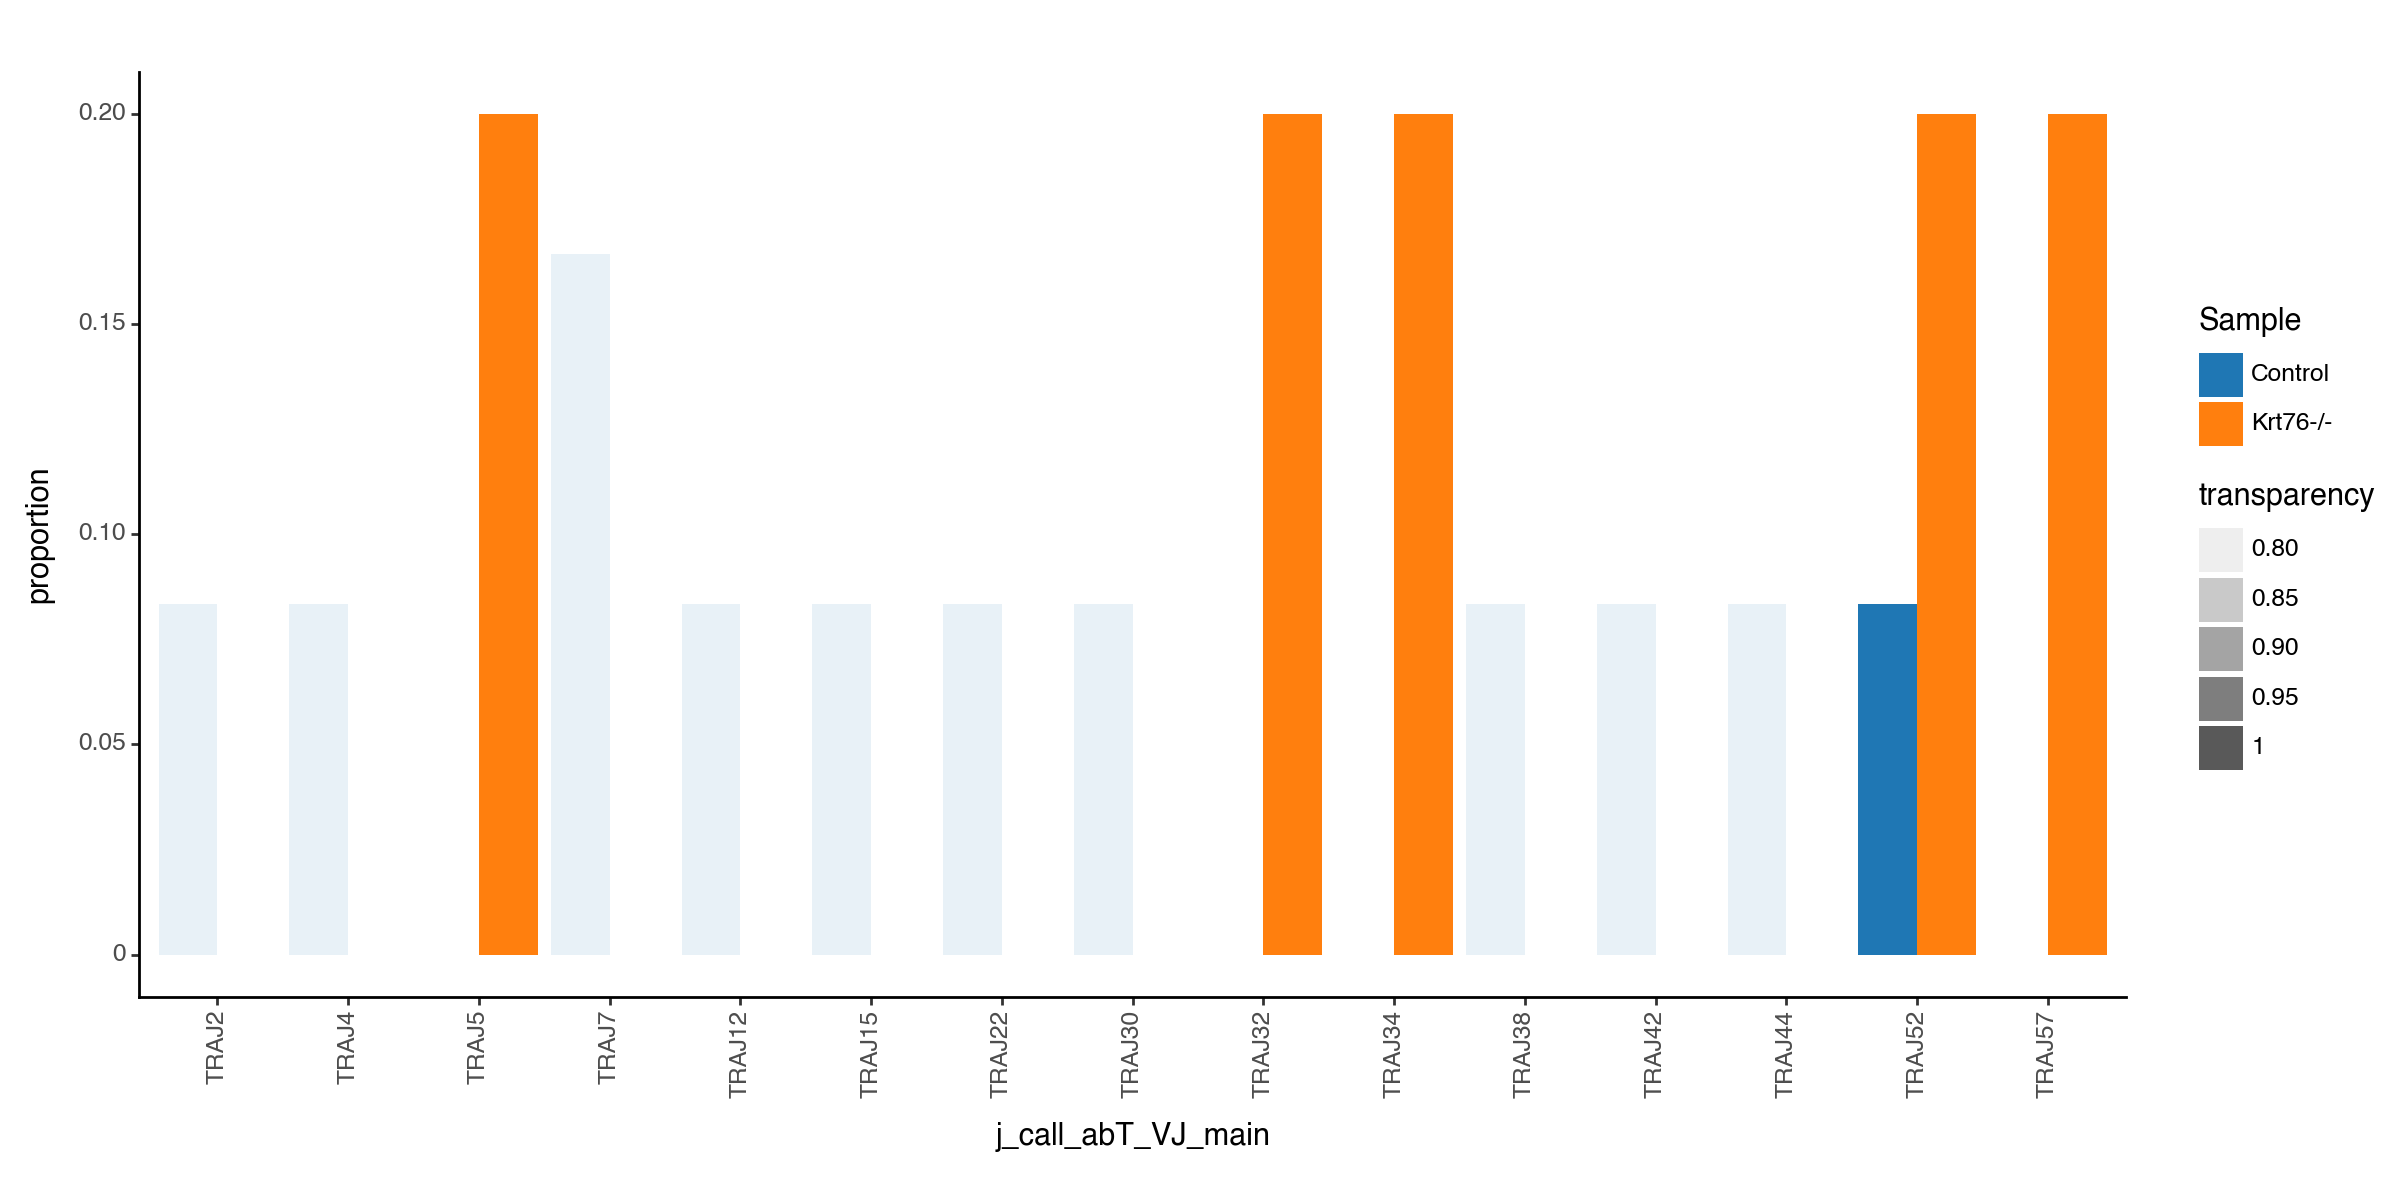

<Figure Size: (1200 x 600)>

In [2157]:
p

In [2158]:
p.save("JgeneAlphaChain_DN2a_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN2a_141223.pdf


### DN2b1 - J gene alpha chain

In [2159]:
adata_PF_DN2b1 = adata_PF[adata_PF.obs["leiden"] == "12 DN2b 1"]

In [2160]:
adata_PF_DN2b1

View of AnnData object with n_obs × n_vars = 8 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', '

In [2161]:
working_df = pd.DataFrame(adata_PF_DN2b1.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ6                                1
         TRAJ42                               1
         TRAJ45                               1
         TRAJ22                               0
         TRAJ37                               0
         TRAJ40                               0
Krt76-/- TRAJ37                               2
         TRAJ22                               1
         TRAJ40                               1
         TRAJ42                               1
         TRAJ6                                0
         TRAJ45                               0

In [2162]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control              TRAJ6       1
1    Control             TRAJ42       1
2    Control             TRAJ45       1
3    Control             TRAJ22       0
4    Control             TRAJ37       0
5    Control             TRAJ40       0
6   Krt76-/-             TRAJ37       2
7   Krt76-/-             TRAJ22       1
8   Krt76-/-             TRAJ40       1
9   Krt76-/-             TRAJ42       1
10  Krt76-/-              TRAJ6       0
11  Krt76-/-             TRAJ45       0

In [2163]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 3, 'Krt76-/-': 5}

In [2164]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2165]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control              TRAJ6       1    0.333333
1    Control             TRAJ42       1    0.333333
2    Control             TRAJ45       1    0.333333
3    Control             TRAJ22       0    0.000000
4    Control             TRAJ37       0    0.000000
5    Control             TRAJ40       0    0.000000
6   Krt76-/-             TRAJ37       2    0.400000
7   Krt76-/-             TRAJ22       1    0.200000
8   Krt76-/-             TRAJ40       1    0.200000
9   Krt76-/-             TRAJ42       1    0.200000
10  Krt76-/-              TRAJ6       0    0.000000
11  Krt76-/-             TRAJ45       0    0.000000

In [2166]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 3, 'Krt76-/-': 5}

In [2167]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2168]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control              TRAJ6       1    0.333333
1    Control             TRAJ42       1    0.333333
2    Control             TRAJ45       1    0.333333
3    Control             TRAJ22       0    0.000000
4    Control             TRAJ37       0    0.000000
5    Control             TRAJ40       0    0.000000
6   Krt76-/-             TRAJ37       2    0.400000
7   Krt76-/-             TRAJ22       1    0.200000
8   Krt76-/-             TRAJ40       1    0.200000
9   Krt76-/-             TRAJ42       1    0.200000
10  Krt76-/-              TRAJ6       0    0.000000
11  Krt76-/-             TRAJ45       0    0.000000

In [2169]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2170]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2171]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2172]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2173]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ6': 0.0,
 'TRAJ22': inf,
 'TRAJ37': inf,
 'TRAJ40': inf,
 'TRAJ42': 0.6000000000000001,
 'TRAJ45': 0.0}

In [2174]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control              TRAJ6       1    0.333333         0.0
1    Control             TRAJ42       1    0.333333         0.6
2    Control             TRAJ45       1    0.333333         0.0
3    Control             TRAJ22       0    0.000000         inf
4    Control             TRAJ37       0    0.000000         inf
5    Control             TRAJ40       0    0.000000         inf
6   Krt76-/-             TRAJ37       2    0.400000         inf
7   Krt76-/-             TRAJ22       1    0.200000         inf
8   Krt76-/-             TRAJ40       1    0.200000         inf
9   Krt76-/-             TRAJ42       1    0.200000         0.6
10  Krt76-/-              TRAJ6       0    0.000000         0.0
11  Krt76-/-             TRAJ45       0    0.000000         0.0

In [2175]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2176]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2177]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2178]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

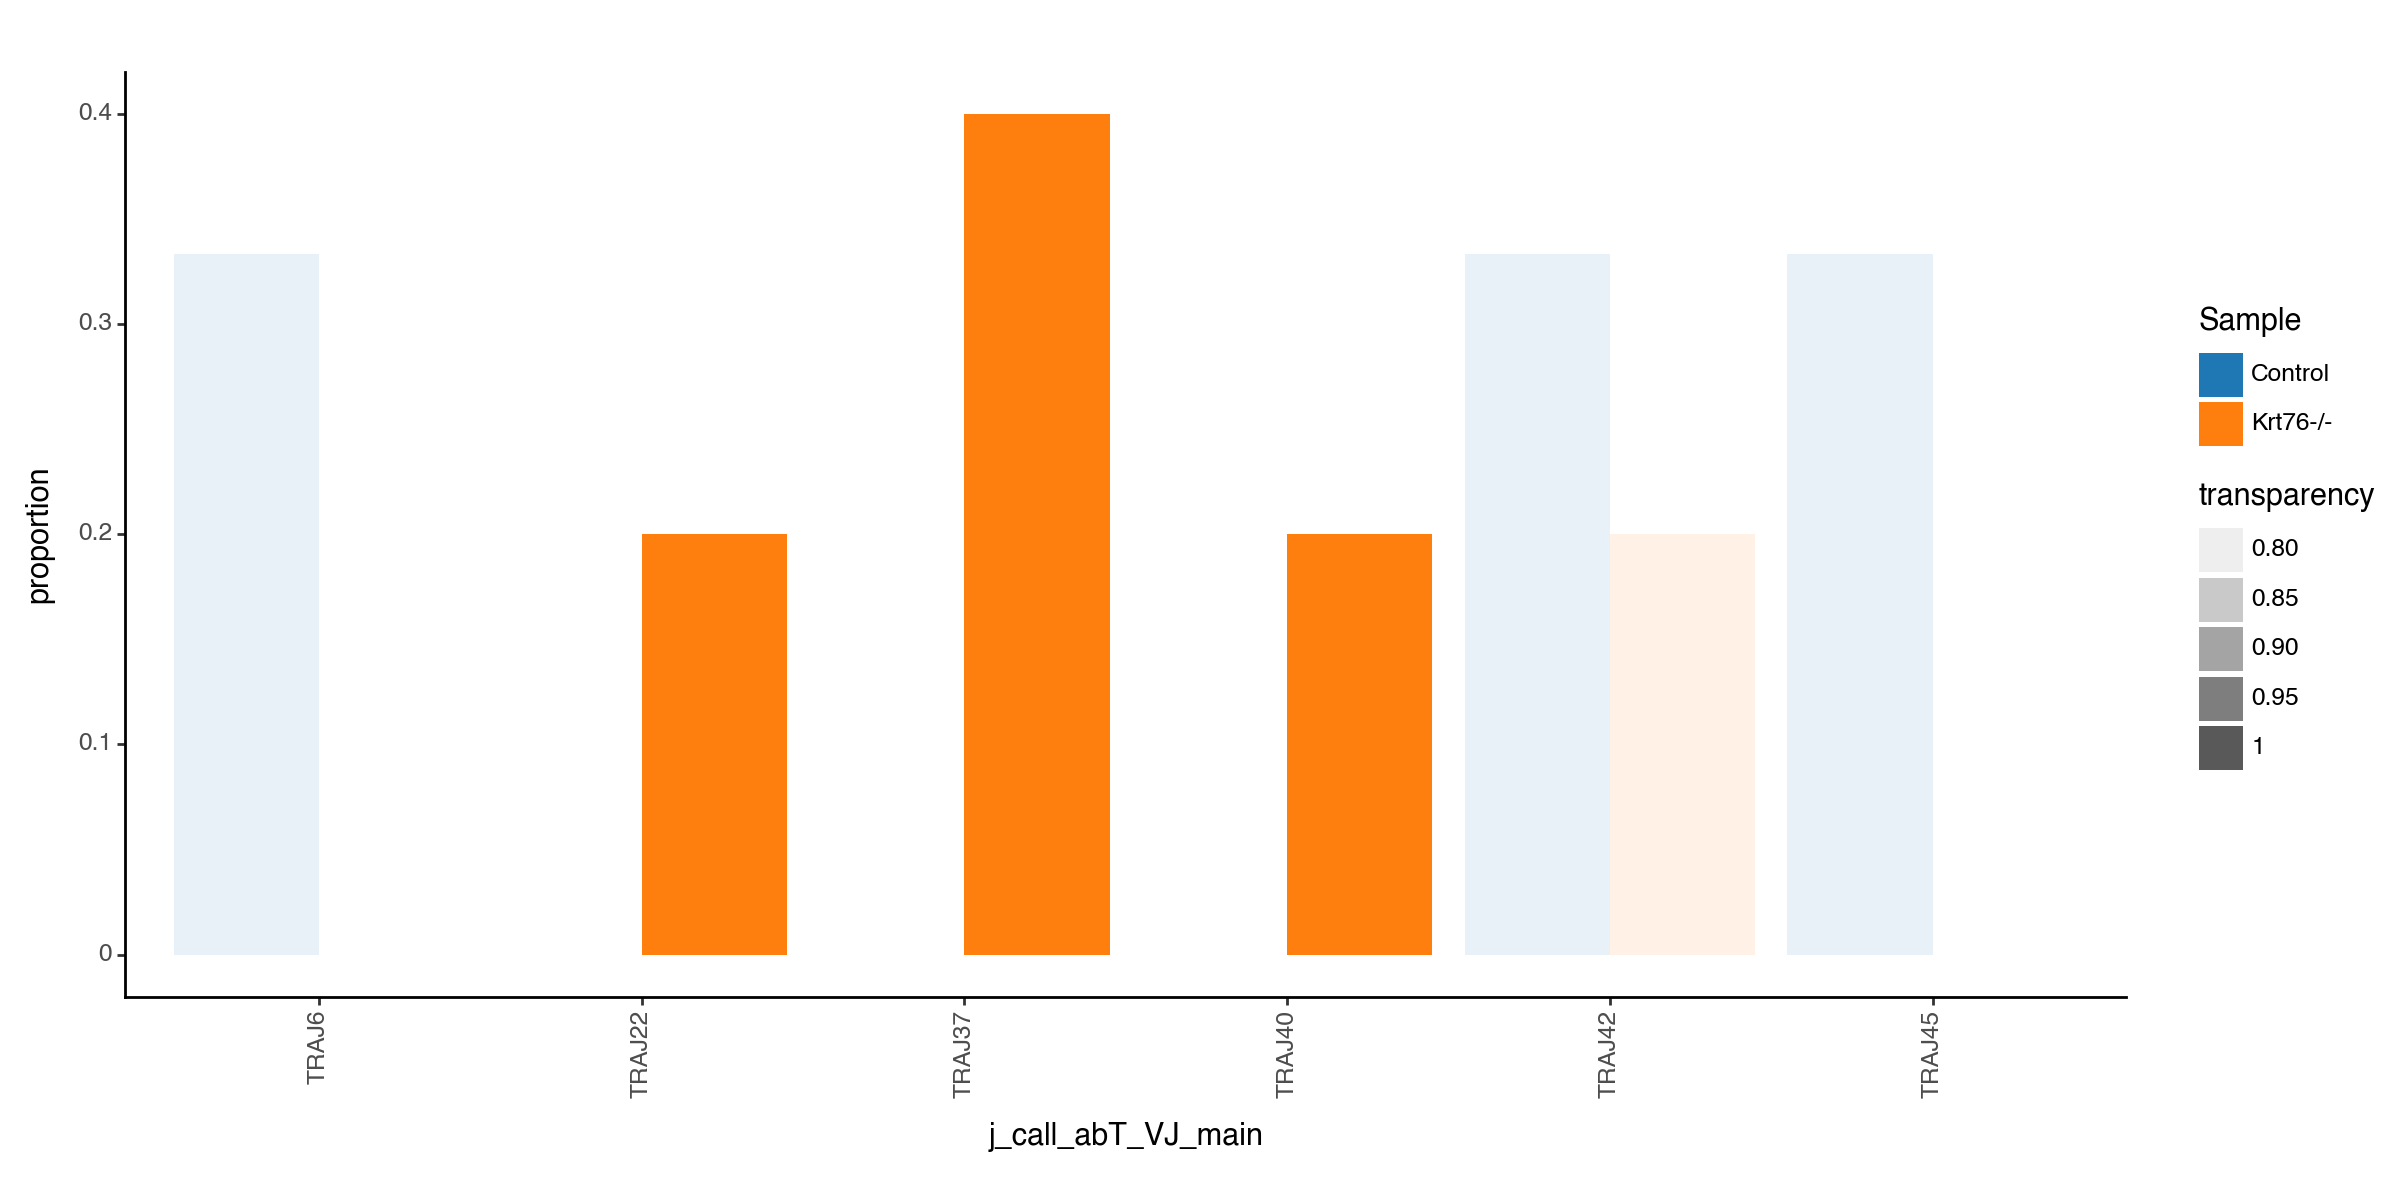

<Figure Size: (1200 x 600)>

In [2179]:
p

In [2180]:
p.save("JgeneAlphaChain_DN2b1_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN2b1_141223.pdf


### DN2b2 - J gene alpha chain

In [2181]:
adata_PF_DN2b2 = adata_PF[adata_PF.obs["leiden"] == "4 DN2b 2"]

In [2182]:
adata_PF_DN2b2

View of AnnData object with n_obs × n_vars = 103 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2183]:
working_df = pd.DataFrame(adata_PF_DN2b2.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ58                              10
         TRAJ28                               7
         TRAJ22                               6
         TRAJ16                               5
         TRAJ31                               5
...                                         ...
Krt76-/- TRAJ16                               0
         TRAJ52                               0
         TRAJ13                               0
         TRAJ11                               0
         TRAJ2                                0

[72 rows x 1 columns]

In [2184]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ58      10
1    Control             TRAJ28       7
2    Control             TRAJ22       6
3    Control             TRAJ16       5
4    Control             TRAJ31       5
..       ...                ...     ...
67  Krt76-/-             TRAJ16       0
68  Krt76-/-             TRAJ52       0
69  Krt76-/-             TRAJ13       0
70  Krt76-/-             TRAJ11       0
71  Krt76-/-              TRAJ2       0

[72 rows x 3 columns]

In [2185]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 62, 'Krt76-/-': 41}

In [2186]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2187]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ58      10    0.161290
1    Control             TRAJ28       7    0.112903
2    Control             TRAJ22       6    0.096774
3    Control             TRAJ16       5    0.080645
4    Control             TRAJ31       5    0.080645
..       ...                ...     ...         ...
67  Krt76-/-             TRAJ16       0    0.000000
68  Krt76-/-             TRAJ52       0    0.000000
69  Krt76-/-             TRAJ13       0    0.000000
70  Krt76-/-             TRAJ11       0    0.000000
71  Krt76-/-              TRAJ2       0    0.000000

[72 rows x 4 columns]

In [2188]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 62, 'Krt76-/-': 41}

In [2189]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2190]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ58      10    0.161290
1    Control             TRAJ28       7    0.112903
2    Control             TRAJ22       6    0.096774
3    Control             TRAJ16       5    0.080645
4    Control             TRAJ31       5    0.080645
..       ...                ...     ...         ...
67  Krt76-/-             TRAJ16       0    0.000000
68  Krt76-/-             TRAJ52       0    0.000000
69  Krt76-/-             TRAJ13       0    0.000000
70  Krt76-/-             TRAJ11       0    0.000000
71  Krt76-/-              TRAJ2       0    0.000000

[72 rows x 4 columns]

In [2191]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2192]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2193]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2194]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2195]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ2': 0.0,
 'TRAJ4': 0.0,
 'TRAJ9': 3.024390243902439,
 'TRAJ11': 0.0,
 'TRAJ13': 0.0,
 'TRAJ15': inf,
 'TRAJ16': 0.0,
 'TRAJ17': inf,
 'TRAJ21': inf,
 'TRAJ22': 0.2520325203252033,
 'TRAJ23': 0.0,
 'TRAJ24': inf,
 'TRAJ26': 1.5121951219512195,
 'TRAJ27': 1.5121951219512195,
 'TRAJ28': 0.0,
 'TRAJ30': 1.5121951219512195,
 'TRAJ31': 1.2097560975609758,
 'TRAJ32': 3.024390243902439,
 'TRAJ33': inf,
 'TRAJ37': 1.0081300813008132,
 'TRAJ38': 0.0,
 'TRAJ39': 0.5040650406504066,
 'TRAJ40': 1.5121951219512195,
 'TRAJ41': 0.0,
 'TRAJ42': inf,
 'TRAJ43': inf,
 'TRAJ44': 0.0,
 'TRAJ45': 0.5040650406504066,
 'TRAJ46,TRAJ26,TRAJ41': inf,
 'TRAJ47': inf,
 'TRAJ49': 0.0,
 'TRAJ50': inf,
 'TRAJ52': 0.0,
 'TRAJ56': 0.7560975609756098,
 'TRAJ57': inf,
 'TRAJ58': 0.30243902439024395}

In [2196]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ58      10    0.161290    0.302439
1    Control             TRAJ28       7    0.112903    0.000000
2    Control             TRAJ22       6    0.096774    0.252033
3    Control             TRAJ16       5    0.080645    0.000000
4    Control             TRAJ31       5    0.080645    1.209756
..       ...                ...     ...         ...         ...
67  Krt76-/-             TRAJ16       0    0.000000    0.000000
68  Krt76-/-             TRAJ52       0    0.000000    0.000000
69  Krt76-/-             TRAJ13       0    0.000000    0.000000
70  Krt76-/-             TRAJ11       0    0.000000    0.000000
71  Krt76-/-              TRAJ2       0    0.000000    0.000000

[72 rows x 5 columns]

In [2197]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2198]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2199]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2200]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

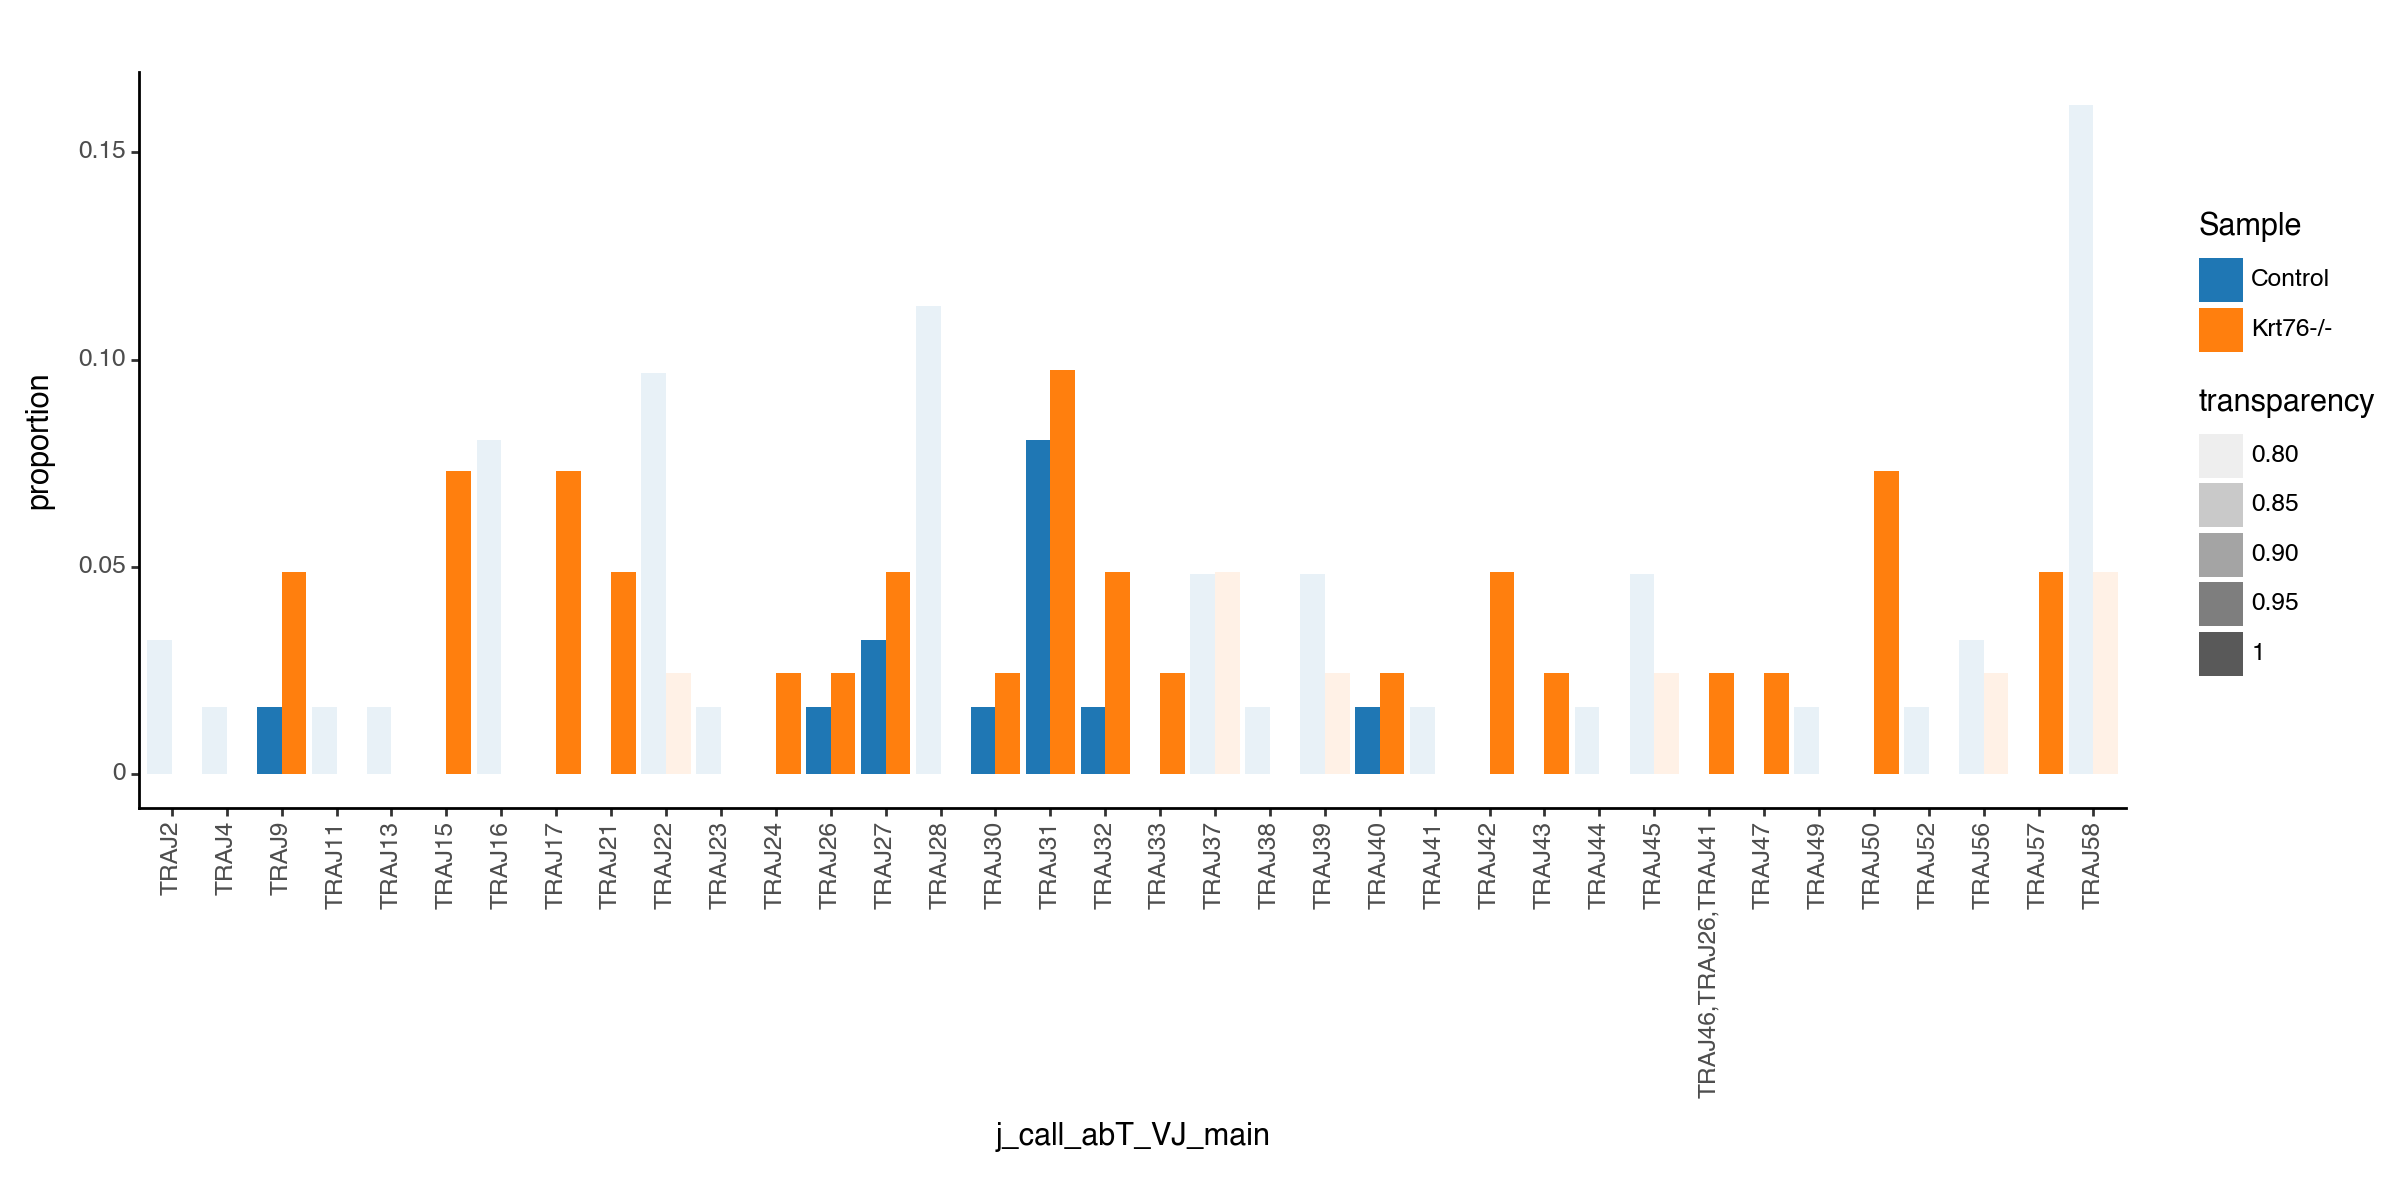

<Figure Size: (1200 x 600)>

In [2201]:
p

In [2202]:
p.save("JgeneAlphaChain_DN2b2_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN2b2_141223.pdf


### DN3 - J gene alpha chain

In [2203]:
adata_PF_DN3 = adata_PF[adata_PF.obs["leiden"] == "10 DN3"]

In [2204]:
adata_PF_DN3

View of AnnData object with n_obs × n_vars = 11 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2205]:
working_df = pd.DataFrame(adata_PF_DN3.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ49                               2
         TRAJ17                               1
         TRAJ21                               1
         TRAJ23                               1
         TRAJ40                               1
         TRAJ58                               1
         TRDJ1                                0
Krt76-/- TRAJ58                               3
         TRDJ1                                1
         TRAJ17                               0
         TRAJ21                               0
         TRAJ23                               0
         TRAJ40                               0
         TRAJ49                               0

In [2206]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ49       2
1    Control             TRAJ17       1
2    Control             TRAJ21       1
3    Control             TRAJ23       1
4    Control             TRAJ40       1
5    Control             TRAJ58       1
6    Control              TRDJ1       0
7   Krt76-/-             TRAJ58       3
8   Krt76-/-              TRDJ1       1
9   Krt76-/-             TRAJ17       0
10  Krt76-/-             TRAJ21       0
11  Krt76-/-             TRAJ23       0
12  Krt76-/-             TRAJ40       0
13  Krt76-/-             TRAJ49       0

In [2207]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 7, 'Krt76-/-': 4}

In [2208]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2209]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ49       2    0.285714
1    Control             TRAJ17       1    0.142857
2    Control             TRAJ21       1    0.142857
3    Control             TRAJ23       1    0.142857
4    Control             TRAJ40       1    0.142857
5    Control             TRAJ58       1    0.142857
6    Control              TRDJ1       0    0.000000
7   Krt76-/-             TRAJ58       3    0.750000
8   Krt76-/-              TRDJ1       1    0.250000
9   Krt76-/-             TRAJ17       0    0.000000
10  Krt76-/-             TRAJ21       0    0.000000
11  Krt76-/-             TRAJ23       0    0.000000
12  Krt76-/-             TRAJ40       0    0.000000
13  Krt76-/-             TRAJ49       0    0.000000

In [2210]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 7, 'Krt76-/-': 4}

In [2211]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2212]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ49       2    0.285714
1    Control             TRAJ17       1    0.142857
2    Control             TRAJ21       1    0.142857
3    Control             TRAJ23       1    0.142857
4    Control             TRAJ40       1    0.142857
5    Control             TRAJ58       1    0.142857
6    Control              TRDJ1       0    0.000000
7   Krt76-/-             TRAJ58       3    0.750000
8   Krt76-/-              TRDJ1       1    0.250000
9   Krt76-/-             TRAJ17       0    0.000000
10  Krt76-/-             TRAJ21       0    0.000000
11  Krt76-/-             TRAJ23       0    0.000000
12  Krt76-/-             TRAJ40       0    0.000000
13  Krt76-/-             TRAJ49       0    0.000000

In [2213]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2214]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2215]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2216]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2217]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ17': 0.0,
 'TRAJ21': 0.0,
 'TRAJ23': 0.0,
 'TRAJ40': 0.0,
 'TRAJ49': 0.0,
 'TRAJ58': 5.25,
 'TRDJ1': inf}

In [2218]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ49       2    0.285714        0.00
1    Control             TRAJ17       1    0.142857        0.00
2    Control             TRAJ21       1    0.142857        0.00
3    Control             TRAJ23       1    0.142857        0.00
4    Control             TRAJ40       1    0.142857        0.00
5    Control             TRAJ58       1    0.142857        5.25
6    Control              TRDJ1       0    0.000000         inf
7   Krt76-/-             TRAJ58       3    0.750000        5.25
8   Krt76-/-              TRDJ1       1    0.250000         inf
9   Krt76-/-             TRAJ17       0    0.000000        0.00
10  Krt76-/-             TRAJ21       0    0.000000        0.00
11  Krt76-/-             TRAJ23       0    0.000000        0.00
12  Krt76-/-             TRAJ40       0    0.000000        0.00
13  Krt76-/-             TRAJ49       0    0.000000        0.00

In [2219]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2220]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2221]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2222]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

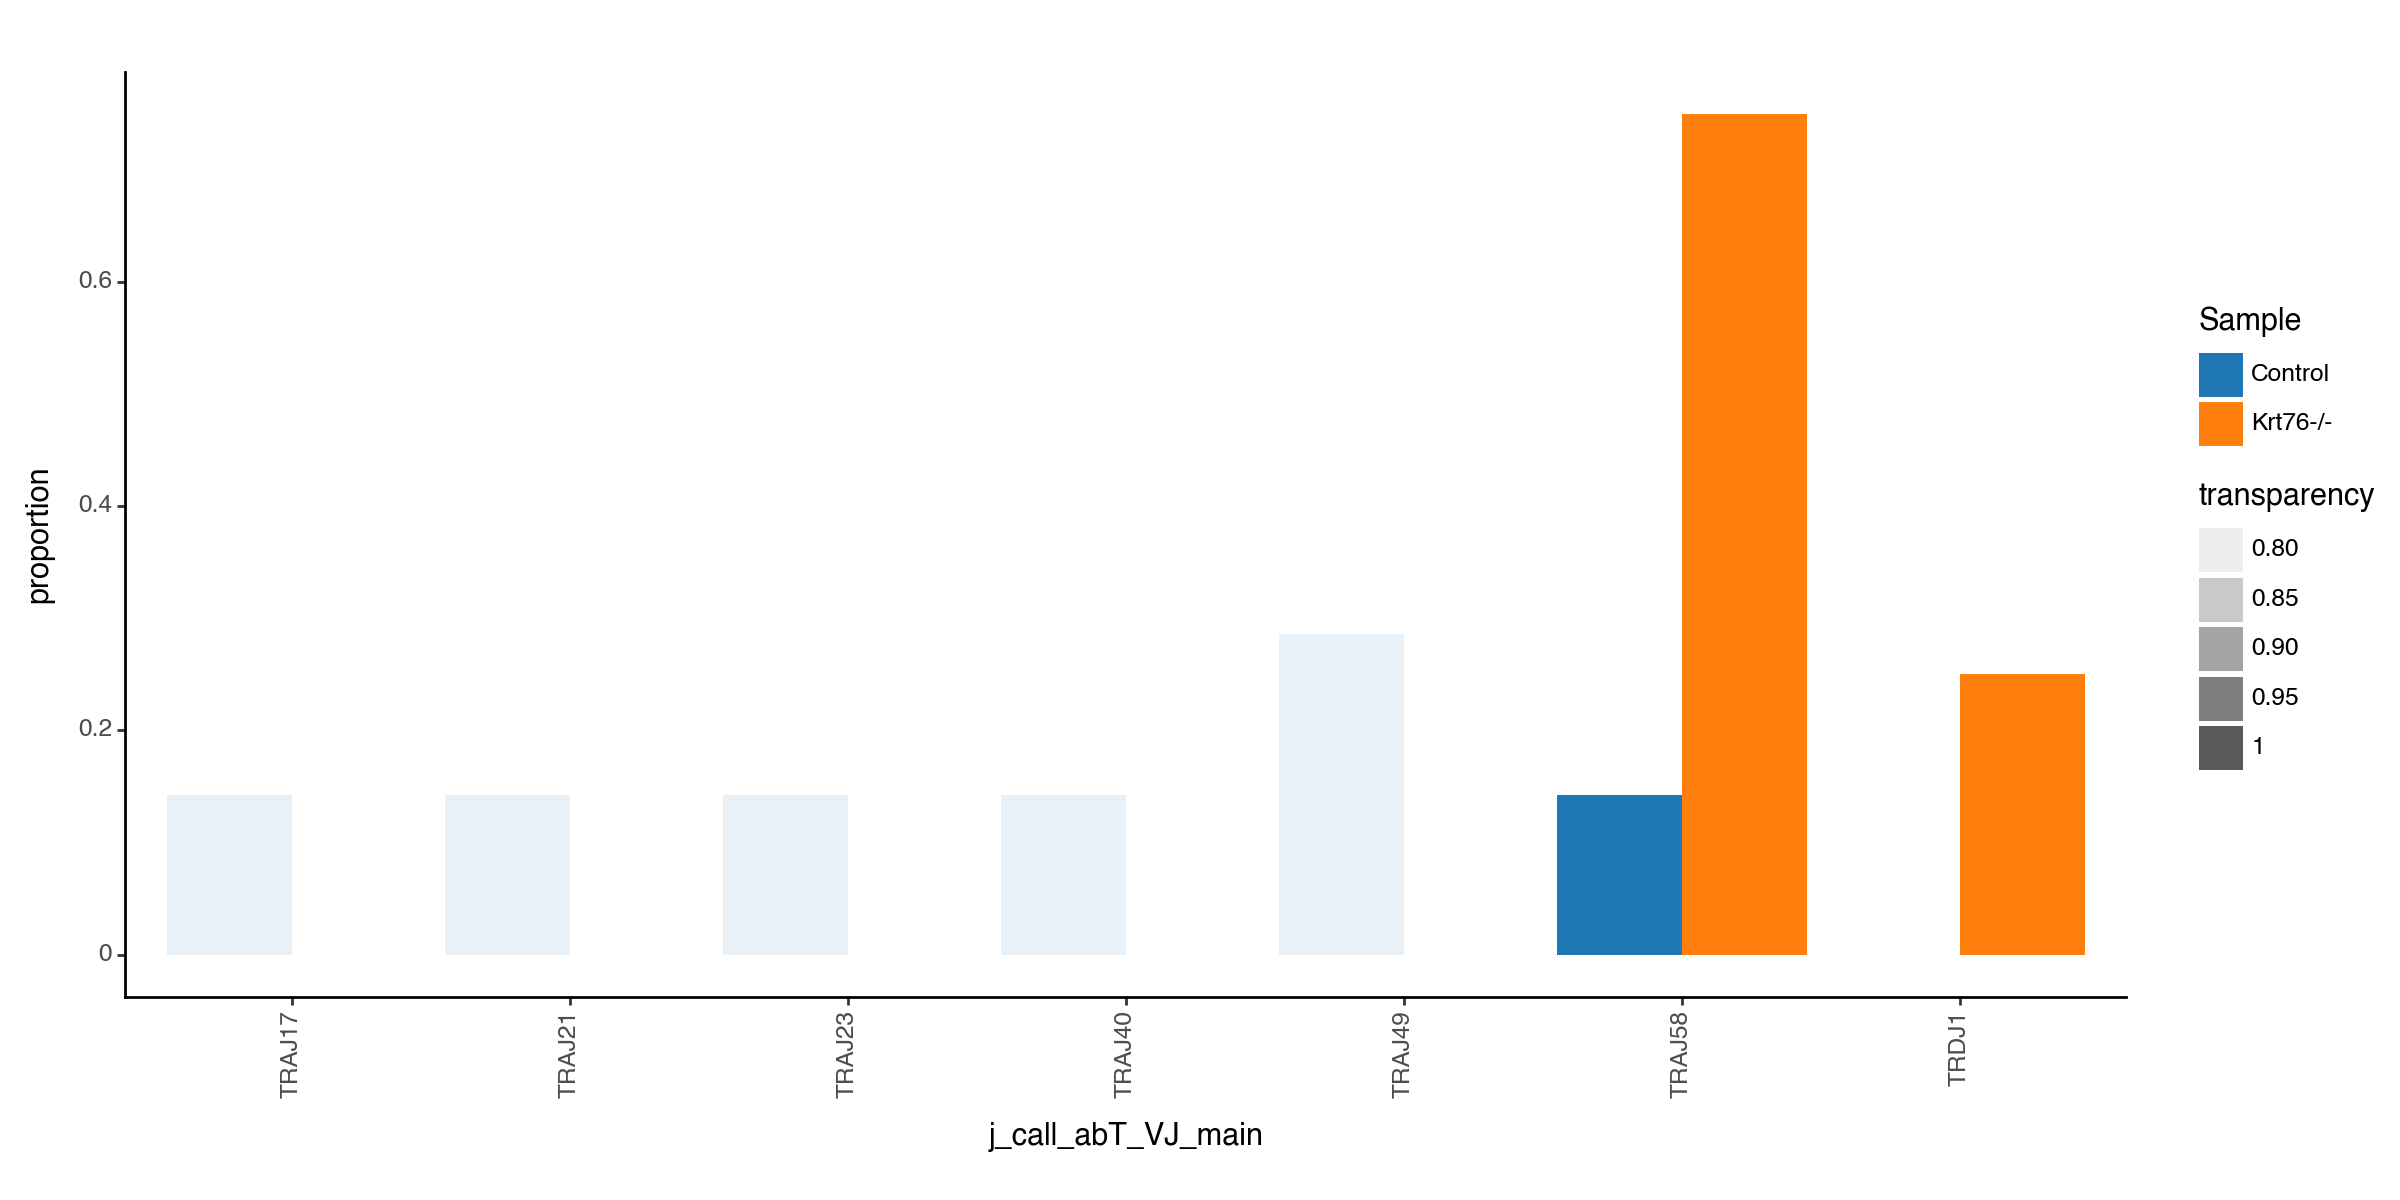

<Figure Size: (1200 x 600)>

In [2223]:
p

In [2224]:
p.save("JgeneAlphaChain_DN3_111223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN3_111223.pdf


### DN3a - J gene alpha chain

In [2225]:
adata_PF_DN3a = adata_PF[adata_PF.obs["leiden"] == "0 DN3a"]

In [2226]:
adata_PF_DN3a

View of AnnData object with n_obs × n_vars = 36 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2227]:
working_df = pd.DataFrame(adata_PF_DN3a.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ12                               3
         TRAJ40                               2
         TRAJ17                               2
         TRAJ2                                1
         TRAJ4                                1
         TRAJ58                               1
         TRAJ52                               1
         TRAJ37                               1
         TRAJ34                               1
         TRAJ33                               1
         TRAJ23                               1
         TRAJ22                               1
         TRAJ18                               1
         TRAJ16                               1
         TRAJ9                                1
         TRAJ7                                1
         TRDJ1                                1
         TRAJ26                               0
         TRAJ32                               0
         TRAJ15                               0
         TRAJ13                               0
         TRAJ42                               0
Krt76-/- TRAJ13                               3
         TRAJ15                               3
         TRAJ58                               1
         TRAJ42                               1
         TRAJ40                               1
         TRAJ37                               1
         TRAJ18                               1
         TRAJ22                               1
         TRAJ34                               1
         TRAJ26                               1
         TRAJ32                               1
         TRAJ2                                0
         TRAJ33                               0
         TRAJ52                               0
         TRAJ23                               0
         TRAJ4                                0
         TRAJ17                               0
         TRAJ16                               0
         TRAJ12                               0
         TRAJ9                                0
         TRAJ7                                0
         TRDJ1                                0

In [2228]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ12       3
1    Control             TRAJ40       2
2    Control             TRAJ17       2
3    Control              TRAJ2       1
4    Control              TRAJ4       1
5    Control             TRAJ58       1
6    Control             TRAJ52       1
7    Control             TRAJ37       1
8    Control             TRAJ34       1
9    Control             TRAJ33       1
10   Control             TRAJ23       1
11   Control             TRAJ22       1
12   Control             TRAJ18       1
13   Control             TRAJ16       1
14   Control              TRAJ9       1
15   Control              TRAJ7       1
16   Control              TRDJ1       1
17   Control             TRAJ26       0
18   Control             TRAJ32       0
19   Control             TRAJ15       0
20   Control             TRAJ13       0
21   Control             TRAJ42       0
22  Krt76-/-             TRAJ13       3
23  Krt76-/-             TRAJ15       3
24  Krt76-/-             TRAJ58       1
25  Krt76-/-             TRAJ42       1
26  Krt76-/-             TRAJ40       1
27  Krt76-/-             TRAJ37       1
28  Krt76-/-             TRAJ18       1
29  Krt76-/-             TRAJ22       1
30  Krt76-/-             TRAJ34       1
31  Krt76-/-             TRAJ26       1
32  Krt76-/-             TRAJ32       1
33  Krt76-/-              TRAJ2       0
34  Krt76-/-             TRAJ33       0
35  Krt76-/-             TRAJ52       0
36  Krt76-/-             TRAJ23       0
37  Krt76-/-              TRAJ4       0
38  Krt76-/-             TRAJ17       0
39  Krt76-/-             TRAJ16       0
40  Krt76-/-             TRAJ12       0
41  Krt76-/-              TRAJ9       0
42  Krt76-/-              TRAJ7       0
43  Krt76-/-              TRDJ1       0

In [2229]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 21, 'Krt76-/-': 15}

In [2230]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2231]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ12       3    0.142857
1    Control             TRAJ40       2    0.095238
2    Control             TRAJ17       2    0.095238
3    Control              TRAJ2       1    0.047619
4    Control              TRAJ4       1    0.047619
5    Control             TRAJ58       1    0.047619
6    Control             TRAJ52       1    0.047619
7    Control             TRAJ37       1    0.047619
8    Control             TRAJ34       1    0.047619
9    Control             TRAJ33       1    0.047619
10   Control             TRAJ23       1    0.047619
11   Control             TRAJ22       1    0.047619
12   Control             TRAJ18       1    0.047619
13   Control             TRAJ16       1    0.047619
14   Control              TRAJ9       1    0.047619
15   Control              TRAJ7       1    0.047619
16   Control              TRDJ1       1    0.047619
17   Control             TRAJ26       0    0.000000
18   Control             TRAJ32       0    0.000000
19   Control             TRAJ15       0    0.000000
20   Control             TRAJ13       0    0.000000
21   Control             TRAJ42       0    0.000000
22  Krt76-/-             TRAJ13       3    0.200000
23  Krt76-/-             TRAJ15       3    0.200000
24  Krt76-/-             TRAJ58       1    0.066667
25  Krt76-/-             TRAJ42       1    0.066667
26  Krt76-/-             TRAJ40       1    0.066667
27  Krt76-/-             TRAJ37       1    0.066667
28  Krt76-/-             TRAJ18       1    0.066667
29  Krt76-/-             TRAJ22       1    0.066667
30  Krt76-/-             TRAJ34       1    0.066667
31  Krt76-/-             TRAJ26       1    0.066667
32  Krt76-/-             TRAJ32       1    0.066667
33  Krt76-/-              TRAJ2       0    0.000000
34  Krt76-/-             TRAJ33       0    0.000000
35  Krt76-/-             TRAJ52       0    0.000000
36  Krt76-/-             TRAJ23       0    0.000000
37  Krt76-/-              TRAJ4       0    0.000000
38  Krt76-/-             TRAJ17       0    0.000000
39  Krt76-/-             TRAJ16       0    0.000000
40  Krt76-/-             TRAJ12       0    0.000000
41  Krt76-/-              TRAJ9       0    0.000000
42  Krt76-/-              TRAJ7       0    0.000000
43  Krt76-/-              TRDJ1       0    0.000000

In [2232]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 21, 'Krt76-/-': 15}

In [2233]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2234]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ12       3    0.142857
1    Control             TRAJ40       2    0.095238
2    Control             TRAJ17       2    0.095238
3    Control              TRAJ2       1    0.047619
4    Control              TRAJ4       1    0.047619
5    Control             TRAJ58       1    0.047619
6    Control             TRAJ52       1    0.047619
7    Control             TRAJ37       1    0.047619
8    Control             TRAJ34       1    0.047619
9    Control             TRAJ33       1    0.047619
10   Control             TRAJ23       1    0.047619
11   Control             TRAJ22       1    0.047619
12   Control             TRAJ18       1    0.047619
13   Control             TRAJ16       1    0.047619
14   Control              TRAJ9       1    0.047619
15   Control              TRAJ7       1    0.047619
16   Control              TRDJ1       1    0.047619
17   Control             TRAJ26       0    0.000000
18   Control             TRAJ32       0    0.000000
19   Control             TRAJ15       0    0.000000
20   Control             TRAJ13       0    0.000000
21   Control             TRAJ42       0    0.000000
22  Krt76-/-             TRAJ13       3    0.200000
23  Krt76-/-             TRAJ15       3    0.200000
24  Krt76-/-             TRAJ58       1    0.066667
25  Krt76-/-             TRAJ42       1    0.066667
26  Krt76-/-             TRAJ40       1    0.066667
27  Krt76-/-             TRAJ37       1    0.066667
28  Krt76-/-             TRAJ18       1    0.066667
29  Krt76-/-             TRAJ22       1    0.066667
30  Krt76-/-             TRAJ34       1    0.066667
31  Krt76-/-             TRAJ26       1    0.066667
32  Krt76-/-             TRAJ32       1    0.066667
33  Krt76-/-              TRAJ2       0    0.000000
34  Krt76-/-             TRAJ33       0    0.000000
35  Krt76-/-             TRAJ52       0    0.000000
36  Krt76-/-             TRAJ23       0    0.000000
37  Krt76-/-              TRAJ4       0    0.000000
38  Krt76-/-             TRAJ17       0    0.000000
39  Krt76-/-             TRAJ16       0    0.000000
40  Krt76-/-             TRAJ12       0    0.000000
41  Krt76-/-              TRAJ9       0    0.000000
42  Krt76-/-              TRAJ7       0    0.000000
43  Krt76-/-              TRDJ1       0    0.000000

In [2235]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2236]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2237]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2238]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2239]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ2': 0.0,
 'TRAJ4': 0.0,
 'TRAJ7': 0.0,
 'TRAJ9': 0.0,
 'TRAJ12': 0.0,
 'TRAJ13': inf,
 'TRAJ15': inf,
 'TRAJ16': 0.0,
 'TRAJ17': 0.0,
 'TRAJ18': 1.4000000000000001,
 'TRAJ22': 1.4000000000000001,
 'TRAJ23': 0.0,
 'TRAJ26': inf,
 'TRAJ32': inf,
 'TRAJ33': 0.0,
 'TRAJ34': 1.4000000000000001,
 'TRAJ37': 1.4000000000000001,
 'TRAJ40': 0.7000000000000001,
 'TRAJ42': inf,
 'TRAJ52': 0.0,
 'TRAJ58': 1.4000000000000001,
 'TRDJ1': 0.0}

In [2240]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ12       3    0.142857         0.0
1    Control             TRAJ40       2    0.095238         0.7
2    Control             TRAJ17       2    0.095238         0.0
3    Control              TRAJ2       1    0.047619         0.0
4    Control              TRAJ4       1    0.047619         0.0
5    Control             TRAJ58       1    0.047619         1.4
6    Control             TRAJ52       1    0.047619         0.0
7    Control             TRAJ37       1    0.047619         1.4
8    Control             TRAJ34       1    0.047619         1.4
9    Control             TRAJ33       1    0.047619         0.0
10   Control             TRAJ23       1    0.047619         0.0
11   Control             TRAJ22       1    0.047619         1.4
12   Control             TRAJ18       1    0.047619         1.4
13   Control             TRAJ16       1    0.047619         0.0
14   Control              TRAJ9       1    0.047619         0.0
15   Control              TRAJ7       1    0.047619         0.0
16   Control              TRDJ1       1    0.047619         0.0
17   Control             TRAJ26       0    0.000000         inf
18   Control             TRAJ32       0    0.000000         inf
19   Control             TRAJ15       0    0.000000         inf
20   Control             TRAJ13       0    0.000000         inf
21   Control             TRAJ42       0    0.000000         inf
22  Krt76-/-             TRAJ13       3    0.200000         inf
23  Krt76-/-             TRAJ15       3    0.200000         inf
24  Krt76-/-             TRAJ58       1    0.066667         1.4
25  Krt76-/-             TRAJ42       1    0.066667         inf
26  Krt76-/-             TRAJ40       1    0.066667         0.7
27  Krt76-/-             TRAJ37       1    0.066667         1.4
28  Krt76-/-             TRAJ18       1    0.066667         1.4
29  Krt76-/-             TRAJ22       1    0.066667         1.4
30  Krt76-/-             TRAJ34       1    0.066667         1.4
31  Krt76-/-             TRAJ26       1    0.066667         inf
32  Krt76-/-             TRAJ32       1    0.066667         inf
33  Krt76-/-              TRAJ2       0    0.000000         0.0
34  Krt76-/-             TRAJ33       0    0.000000         0.0
35  Krt76-/-             TRAJ52       0    0.000000         0.0
36  Krt76-/-             TRAJ23       0    0.000000         0.0
37  Krt76-/-              TRAJ4       0    0.000000         0.0
38  Krt76-/-             TRAJ17       0    0.000000         0.0
39  Krt76-/-             TRAJ16       0    0.000000         0.0
40  Krt76-/-             TRAJ12       0    0.000000         0.0
41  Krt76-/-              TRAJ9       0    0.000000         0.0
42  Krt76-/-              TRAJ7       0    0.000000         0.0
43  Krt76-/-              TRDJ1       0    0.000000         0.0

In [2241]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2242]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2243]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2244]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

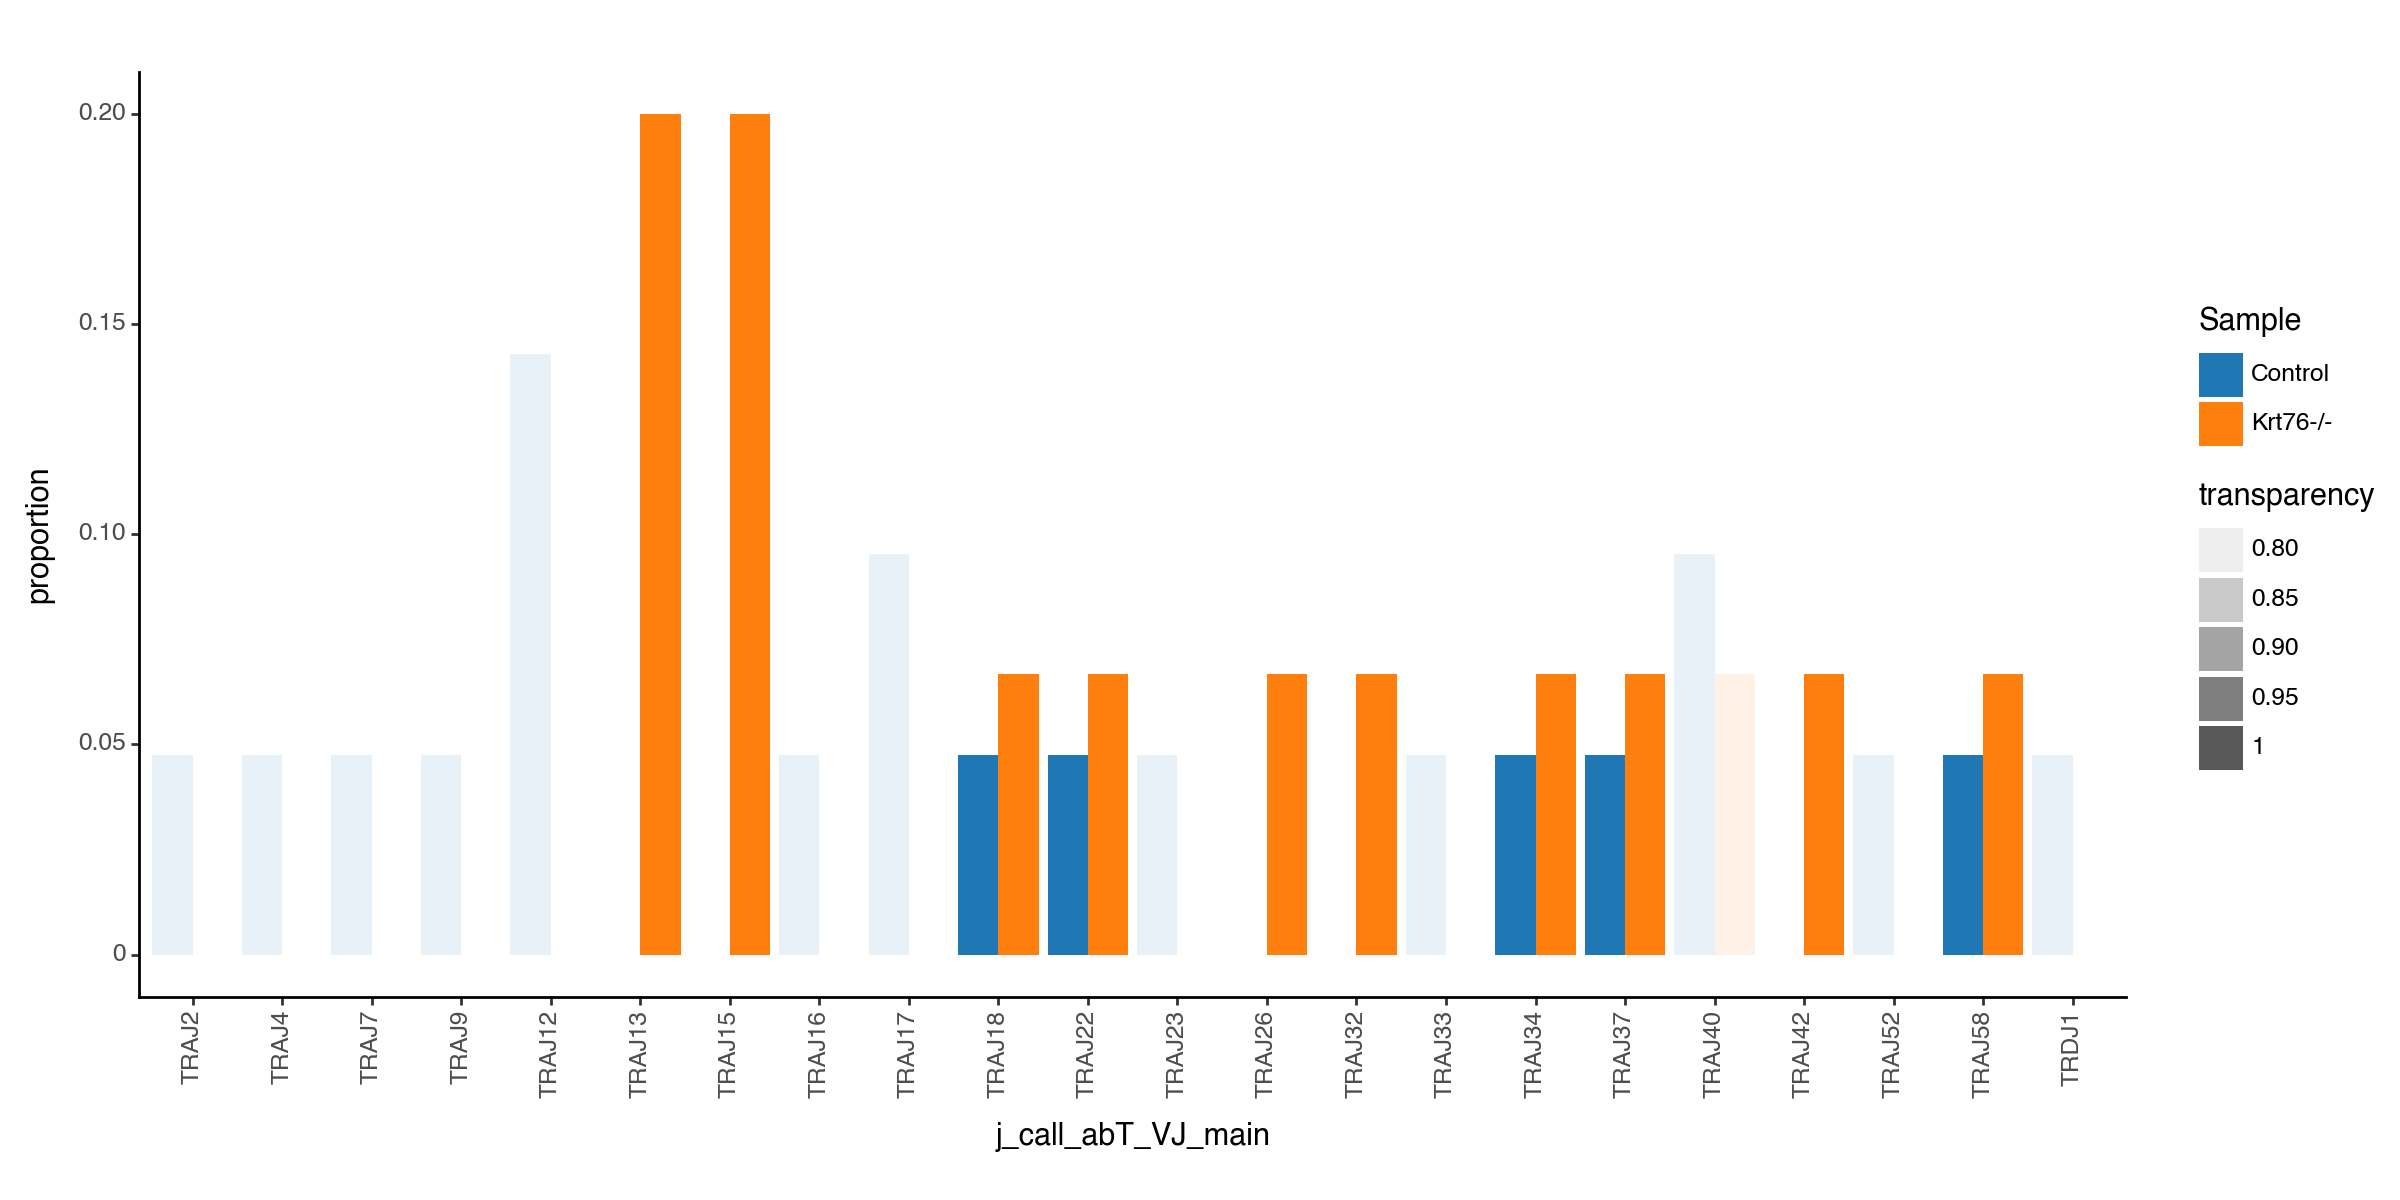

<Figure Size: (1200 x 600)>

In [2245]:
p

In [2246]:
p.save("JgeneAlphaChain_DN3a_111223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN3a_111223.pdf


### DN3ab - J gene alpha chain

In [2247]:
adata_PF_DN3ab = adata_PF[adata_PF.obs["leiden"] == "1 DN3a / DN3b"]

In [2248]:
adata_PF_DN3ab

View of AnnData object with n_obs × n_vars = 44 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2249]:
working_df = pd.DataFrame(adata_PF_DN3ab.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ16                               3
         TRAJ22                               3
         TRAJ12                               2
         TRAJ39                               2
         TRAJ31                               2
         TRAJ6                                1
         TRAJ30                               1
         TRAJ49                               1
         TRAJ45                               1
         TRAJ40                               1
         TRAJ33                               1
         TRAJ32                               1
         TRAJ27                               1
         TRAJ7                                1
         TRAJ26                               1
         TRAJ24                               1
         TRAJ15                               1
         TRAJ13                               1
         TRAJ11                               1
         TRAJ56                               1
         TRAJ18                               0
         TRAJ35                               0
         TRAJ17                               0
         TRAJ50                               0
Krt76-/- TRAJ30                               3
         TRAJ31                               3
         TRAJ22                               2
         TRAJ56                               1
         TRAJ50                               1
         TRAJ12                               1
         TRAJ49                               1
         TRAJ17                               1
         TRAJ18                               1
         TRAJ26                               1
         TRAJ7                                1
         TRAJ35                               1
         TRAJ33                               0
         TRAJ45                               0
         TRAJ40                               0
         TRAJ39                               0
         TRAJ6                                0
         TRAJ32                               0
         TRAJ24                               0
         TRAJ16                               0
         TRAJ15                               0
         TRAJ13                               0
         TRAJ11                               0
         TRAJ27                               0

In [2250]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ16       3
1    Control             TRAJ22       3
2    Control             TRAJ12       2
3    Control             TRAJ39       2
4    Control             TRAJ31       2
5    Control              TRAJ6       1
6    Control             TRAJ30       1
7    Control             TRAJ49       1
8    Control             TRAJ45       1
9    Control             TRAJ40       1
10   Control             TRAJ33       1
11   Control             TRAJ32       1
12   Control             TRAJ27       1
13   Control              TRAJ7       1
14   Control             TRAJ26       1
15   Control             TRAJ24       1
16   Control             TRAJ15       1
17   Control             TRAJ13       1
18   Control             TRAJ11       1
19   Control             TRAJ56       1
20   Control             TRAJ18       0
21   Control             TRAJ35       0
22   Control             TRAJ17       0
23   Control             TRAJ50       0
24  Krt76-/-             TRAJ30       3
25  Krt76-/-             TRAJ31       3
26  Krt76-/-             TRAJ22       2
27  Krt76-/-             TRAJ56       1
28  Krt76-/-             TRAJ50       1
29  Krt76-/-             TRAJ12       1
30  Krt76-/-             TRAJ49       1
31  Krt76-/-             TRAJ17       1
32  Krt76-/-             TRAJ18       1
33  Krt76-/-             TRAJ26       1
34  Krt76-/-              TRAJ7       1
35  Krt76-/-             TRAJ35       1
36  Krt76-/-             TRAJ33       0
37  Krt76-/-             TRAJ45       0
38  Krt76-/-             TRAJ40       0
39  Krt76-/-             TRAJ39       0
40  Krt76-/-              TRAJ6       0
41  Krt76-/-             TRAJ32       0
42  Krt76-/-             TRAJ24       0
43  Krt76-/-             TRAJ16       0
44  Krt76-/-             TRAJ15       0
45  Krt76-/-             TRAJ13       0
46  Krt76-/-             TRAJ11       0
47  Krt76-/-             TRAJ27       0

In [2251]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 27, 'Krt76-/-': 17}

In [2252]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2253]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ16       3    0.111111
1    Control             TRAJ22       3    0.111111
2    Control             TRAJ12       2    0.074074
3    Control             TRAJ39       2    0.074074
4    Control             TRAJ31       2    0.074074
5    Control              TRAJ6       1    0.037037
6    Control             TRAJ30       1    0.037037
7    Control             TRAJ49       1    0.037037
8    Control             TRAJ45       1    0.037037
9    Control             TRAJ40       1    0.037037
10   Control             TRAJ33       1    0.037037
11   Control             TRAJ32       1    0.037037
12   Control             TRAJ27       1    0.037037
13   Control              TRAJ7       1    0.037037
14   Control             TRAJ26       1    0.037037
15   Control             TRAJ24       1    0.037037
16   Control             TRAJ15       1    0.037037
17   Control             TRAJ13       1    0.037037
18   Control             TRAJ11       1    0.037037
19   Control             TRAJ56       1    0.037037
20   Control             TRAJ18       0    0.000000
21   Control             TRAJ35       0    0.000000
22   Control             TRAJ17       0    0.000000
23   Control             TRAJ50       0    0.000000
24  Krt76-/-             TRAJ30       3    0.176471
25  Krt76-/-             TRAJ31       3    0.176471
26  Krt76-/-             TRAJ22       2    0.117647
27  Krt76-/-             TRAJ56       1    0.058824
28  Krt76-/-             TRAJ50       1    0.058824
29  Krt76-/-             TRAJ12       1    0.058824
30  Krt76-/-             TRAJ49       1    0.058824
31  Krt76-/-             TRAJ17       1    0.058824
32  Krt76-/-             TRAJ18       1    0.058824
33  Krt76-/-             TRAJ26       1    0.058824
34  Krt76-/-              TRAJ7       1    0.058824
35  Krt76-/-             TRAJ35       1    0.058824
36  Krt76-/-             TRAJ33       0    0.000000
37  Krt76-/-             TRAJ45       0    0.000000
38  Krt76-/-             TRAJ40       0    0.000000
39  Krt76-/-             TRAJ39       0    0.000000
40  Krt76-/-              TRAJ6       0    0.000000
41  Krt76-/-             TRAJ32       0    0.000000
42  Krt76-/-             TRAJ24       0    0.000000
43  Krt76-/-             TRAJ16       0    0.000000
44  Krt76-/-             TRAJ15       0    0.000000
45  Krt76-/-             TRAJ13       0    0.000000
46  Krt76-/-             TRAJ11       0    0.000000
47  Krt76-/-             TRAJ27       0    0.000000

In [2254]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 27, 'Krt76-/-': 17}

In [2255]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2256]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ16       3    0.111111
1    Control             TRAJ22       3    0.111111
2    Control             TRAJ12       2    0.074074
3    Control             TRAJ39       2    0.074074
4    Control             TRAJ31       2    0.074074
5    Control              TRAJ6       1    0.037037
6    Control             TRAJ30       1    0.037037
7    Control             TRAJ49       1    0.037037
8    Control             TRAJ45       1    0.037037
9    Control             TRAJ40       1    0.037037
10   Control             TRAJ33       1    0.037037
11   Control             TRAJ32       1    0.037037
12   Control             TRAJ27       1    0.037037
13   Control              TRAJ7       1    0.037037
14   Control             TRAJ26       1    0.037037
15   Control             TRAJ24       1    0.037037
16   Control             TRAJ15       1    0.037037
17   Control             TRAJ13       1    0.037037
18   Control             TRAJ11       1    0.037037
19   Control             TRAJ56       1    0.037037
20   Control             TRAJ18       0    0.000000
21   Control             TRAJ35       0    0.000000
22   Control             TRAJ17       0    0.000000
23   Control             TRAJ50       0    0.000000
24  Krt76-/-             TRAJ30       3    0.176471
25  Krt76-/-             TRAJ31       3    0.176471
26  Krt76-/-             TRAJ22       2    0.117647
27  Krt76-/-             TRAJ56       1    0.058824
28  Krt76-/-             TRAJ50       1    0.058824
29  Krt76-/-             TRAJ12       1    0.058824
30  Krt76-/-             TRAJ49       1    0.058824
31  Krt76-/-             TRAJ17       1    0.058824
32  Krt76-/-             TRAJ18       1    0.058824
33  Krt76-/-             TRAJ26       1    0.058824
34  Krt76-/-              TRAJ7       1    0.058824
35  Krt76-/-             TRAJ35       1    0.058824
36  Krt76-/-             TRAJ33       0    0.000000
37  Krt76-/-             TRAJ45       0    0.000000
38  Krt76-/-             TRAJ40       0    0.000000
39  Krt76-/-             TRAJ39       0    0.000000
40  Krt76-/-              TRAJ6       0    0.000000
41  Krt76-/-             TRAJ32       0    0.000000
42  Krt76-/-             TRAJ24       0    0.000000
43  Krt76-/-             TRAJ16       0    0.000000
44  Krt76-/-             TRAJ15       0    0.000000
45  Krt76-/-             TRAJ13       0    0.000000
46  Krt76-/-             TRAJ11       0    0.000000
47  Krt76-/-             TRAJ27       0    0.000000

In [2257]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2258]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2259]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2260]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2261]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ6': 0.0,
 'TRAJ7': 1.5882352941176472,
 'TRAJ11': 0.0,
 'TRAJ12': 0.7941176470588236,
 'TRAJ13': 0.0,
 'TRAJ15': 0.0,
 'TRAJ16': 0.0,
 'TRAJ17': inf,
 'TRAJ18': inf,
 'TRAJ22': 1.0588235294117647,
 'TRAJ24': 0.0,
 'TRAJ26': 1.5882352941176472,
 'TRAJ27': 0.0,
 'TRAJ30': 4.764705882352942,
 'TRAJ31': 2.382352941176471,
 'TRAJ32': 0.0,
 'TRAJ33': 0.0,
 'TRAJ35': inf,
 'TRAJ39': 0.0,
 'TRAJ40': 0.0,
 'TRAJ45': 0.0,
 'TRAJ49': 1.5882352941176472,
 'TRAJ50': inf,
 'TRAJ56': 1.5882352941176472}

In [2262]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ16       3    0.111111    0.000000
1    Control             TRAJ22       3    0.111111    1.058824
2    Control             TRAJ12       2    0.074074    0.794118
3    Control             TRAJ39       2    0.074074    0.000000
4    Control             TRAJ31       2    0.074074    2.382353
5    Control              TRAJ6       1    0.037037    0.000000
6    Control             TRAJ30       1    0.037037    4.764706
7    Control             TRAJ49       1    0.037037    1.588235
8    Control             TRAJ45       1    0.037037    0.000000
9    Control             TRAJ40       1    0.037037    0.000000
10   Control             TRAJ33       1    0.037037    0.000000
11   Control             TRAJ32       1    0.037037    0.000000
12   Control             TRAJ27       1    0.037037    0.000000
13   Control              TRAJ7       1    0.037037    1.588235
14   Control             TRAJ26       1    0.037037    1.588235
15   Control             TRAJ24       1    0.037037    0.000000
16   Control             TRAJ15       1    0.037037    0.000000
17   Control             TRAJ13       1    0.037037    0.000000
18   Control             TRAJ11       1    0.037037    0.000000
19   Control             TRAJ56       1    0.037037    1.588235
20   Control             TRAJ18       0    0.000000         inf
21   Control             TRAJ35       0    0.000000         inf
22   Control             TRAJ17       0    0.000000         inf
23   Control             TRAJ50       0    0.000000         inf
24  Krt76-/-             TRAJ30       3    0.176471    4.764706
25  Krt76-/-             TRAJ31       3    0.176471    2.382353
26  Krt76-/-             TRAJ22       2    0.117647    1.058824
27  Krt76-/-             TRAJ56       1    0.058824    1.588235
28  Krt76-/-             TRAJ50       1    0.058824         inf
29  Krt76-/-             TRAJ12       1    0.058824    0.794118
30  Krt76-/-             TRAJ49       1    0.058824    1.588235
31  Krt76-/-             TRAJ17       1    0.058824         inf
32  Krt76-/-             TRAJ18       1    0.058824         inf
33  Krt76-/-             TRAJ26       1    0.058824    1.588235
34  Krt76-/-              TRAJ7       1    0.058824    1.588235
35  Krt76-/-             TRAJ35       1    0.058824         inf
36  Krt76-/-             TRAJ33       0    0.000000    0.000000
37  Krt76-/-             TRAJ45       0    0.000000    0.000000
38  Krt76-/-             TRAJ40       0    0.000000    0.000000
39  Krt76-/-             TRAJ39       0    0.000000    0.000000
40  Krt76-/-              TRAJ6       0    0.000000    0.000000
41  Krt76-/-             TRAJ32       0    0.000000    0.000000
42  Krt76-/-             TRAJ24       0    0.000000    0.000000
43  Krt76-/-             TRAJ16       0    0.000000    0.000000
44  Krt76-/-             TRAJ15       0    0.000000    0.000000
45  Krt76-/-             TRAJ13       0    0.000000    0.000000
46  Krt76-/-             TRAJ11       0    0.000000    0.000000
47  Krt76-/-             TRAJ27       0    0.000000    0.000000

In [2263]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2264]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2265]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2266]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

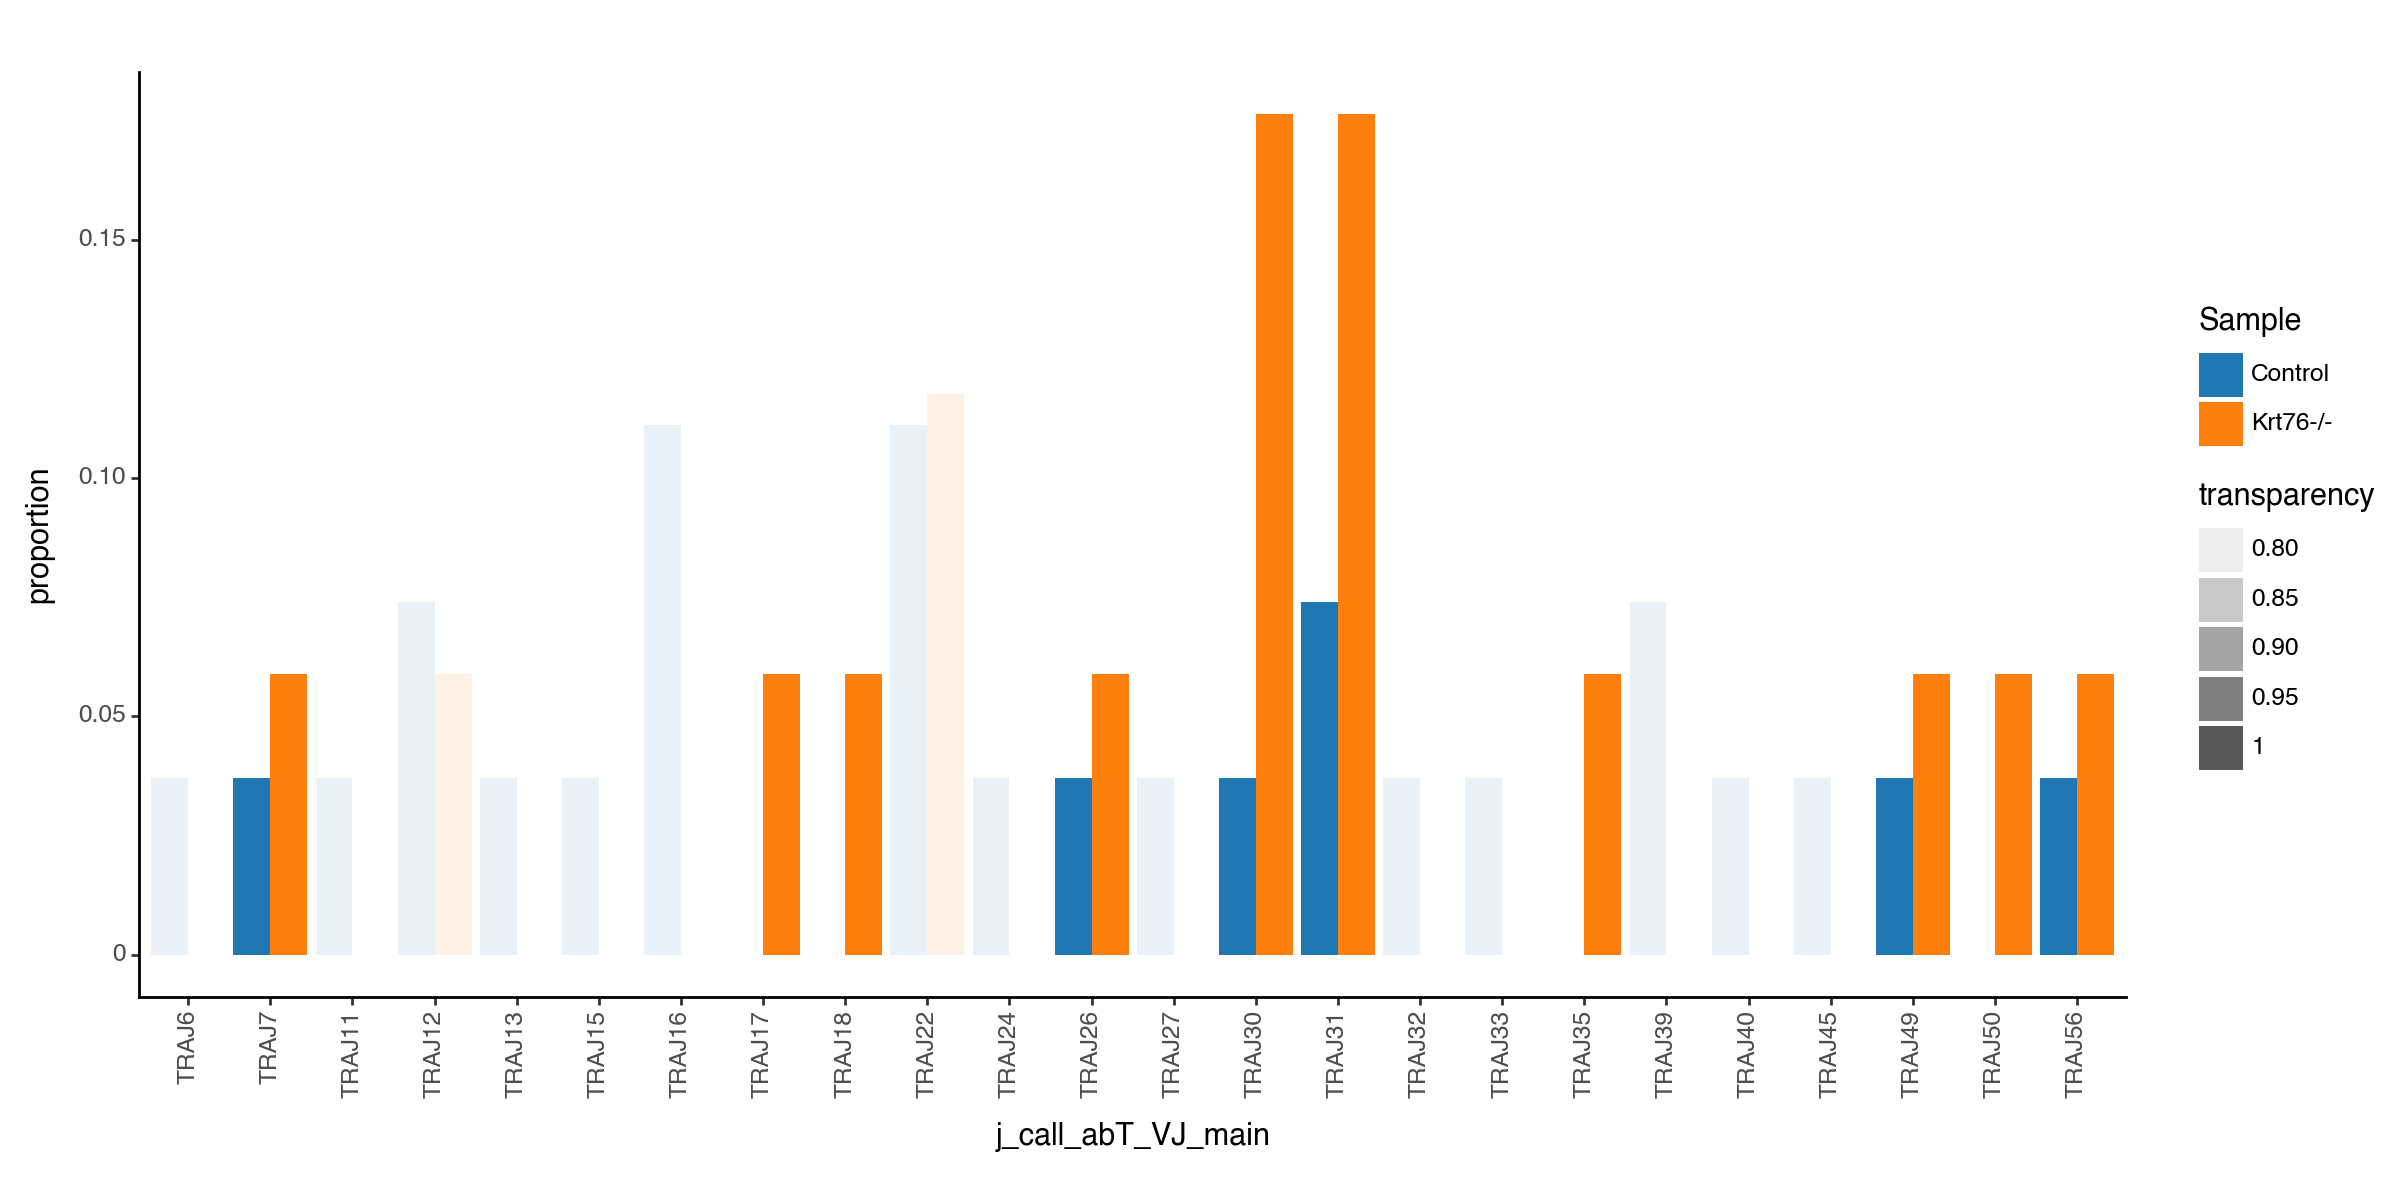

<Figure Size: (1200 x 600)>

In [2267]:
p

In [2268]:
p.save("JgenAlphaChain_DN3ab_111223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgenAlphaChain_DN3ab_111223.pdf


### DN3b - J gene alpha chain

In [2269]:
adata_PF_DN3b = adata_PF[adata_PF.obs["leiden"] == "6 DN3b"]

In [2270]:
adata_PF_DN3b

View of AnnData object with n_obs × n_vars = 28 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2271]:
working_df = pd.DataFrame(adata_PF_DN3b.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                      
Control  TRAJ26                                 2
         TRAJ40                                 2
         TRAJ4                                  1
         TRAJ37                                 1
         TRAJ46,TRAJ26,TRAJ41                   1
         TRAJ13                                 1
         TRAJ15                                 1
         TRAJ43                                 1
         TRAJ22                                 1
         TRAJ7                                  1
         TRAJ30                                 1
         TRAJ31                                 1
         TRAJ32                                 1
         TRAJ45                                 0
         TRAJ28                                 0
         TRAJ33                                 0
         TRAJ27                                 0
         TRAJ18                                 0
         TRAJ17                                 0
         TRAJ12                                 0
         TRAJ58                                 0
Krt76-/- TRAJ28                                 1
         TRAJ27                                 1
         TRAJ45                                 1
         TRAJ40                                 1
         TRAJ37                                 1
         TRAJ33                                 1
         TRAJ32                                 1
         TRAJ58                                 1
         TRAJ22                                 1
         TRAJ18                                 1
         TRAJ17                                 1
         TRAJ15                                 1
         TRAJ12                                 1
         TRAJ26                                 0
         TRAJ7                                  0
         TRAJ30                                 0
         TRAJ31                                 0
         TRAJ13                                 0
         TRAJ43                                 0
         TRAJ46,TRAJ26,TRAJ41                   0
         TRAJ4                                  0

In [2272]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample    j_call_abT_VJ_main  counts
0    Control                TRAJ26       2
1    Control                TRAJ40       2
2    Control                 TRAJ4       1
3    Control                TRAJ37       1
4    Control  TRAJ46,TRAJ26,TRAJ41       1
5    Control                TRAJ13       1
6    Control                TRAJ15       1
7    Control                TRAJ43       1
8    Control                TRAJ22       1
9    Control                 TRAJ7       1
10   Control                TRAJ30       1
11   Control                TRAJ31       1
12   Control                TRAJ32       1
13   Control                TRAJ45       0
14   Control                TRAJ28       0
15   Control                TRAJ33       0
16   Control                TRAJ27       0
17   Control                TRAJ18       0
18   Control                TRAJ17       0
19   Control                TRAJ12       0
20   Control                TRAJ58       0
21  Krt76-/-                TRAJ28       1
22  Krt76-/-                TRAJ27       1
23  Krt76-/-                TRAJ45       1
24  Krt76-/-                TRAJ40       1
25  Krt76-/-                TRAJ37       1
26  Krt76-/-                TRAJ33       1
27  Krt76-/-                TRAJ32       1
28  Krt76-/-                TRAJ58       1
29  Krt76-/-                TRAJ22       1
30  Krt76-/-                TRAJ18       1
31  Krt76-/-                TRAJ17       1
32  Krt76-/-                TRAJ15       1
33  Krt76-/-                TRAJ12       1
34  Krt76-/-                TRAJ26       0
35  Krt76-/-                 TRAJ7       0
36  Krt76-/-                TRAJ30       0
37  Krt76-/-                TRAJ31       0
38  Krt76-/-                TRAJ13       0
39  Krt76-/-                TRAJ43       0
40  Krt76-/-  TRAJ46,TRAJ26,TRAJ41       0
41  Krt76-/-                 TRAJ4       0

In [2273]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 15, 'Krt76-/-': 13}

In [2274]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2275]:
working_df

Sample    j_call_abT_VJ_main  counts  proportion
0    Control                TRAJ26       2    0.133333
1    Control                TRAJ40       2    0.133333
2    Control                 TRAJ4       1    0.066667
3    Control                TRAJ37       1    0.066667
4    Control  TRAJ46,TRAJ26,TRAJ41       1    0.066667
5    Control                TRAJ13       1    0.066667
6    Control                TRAJ15       1    0.066667
7    Control                TRAJ43       1    0.066667
8    Control                TRAJ22       1    0.066667
9    Control                 TRAJ7       1    0.066667
10   Control                TRAJ30       1    0.066667
11   Control                TRAJ31       1    0.066667
12   Control                TRAJ32       1    0.066667
13   Control                TRAJ45       0    0.000000
14   Control                TRAJ28       0    0.000000
15   Control                TRAJ33       0    0.000000
16   Control                TRAJ27       0    0.000000
17   Control                TRAJ18       0    0.000000
18   Control                TRAJ17       0    0.000000
19   Control                TRAJ12       0    0.000000
20   Control                TRAJ58       0    0.000000
21  Krt76-/-                TRAJ28       1    0.076923
22  Krt76-/-                TRAJ27       1    0.076923
23  Krt76-/-                TRAJ45       1    0.076923
24  Krt76-/-                TRAJ40       1    0.076923
25  Krt76-/-                TRAJ37       1    0.076923
26  Krt76-/-                TRAJ33       1    0.076923
27  Krt76-/-                TRAJ32       1    0.076923
28  Krt76-/-                TRAJ58       1    0.076923
29  Krt76-/-                TRAJ22       1    0.076923
30  Krt76-/-                TRAJ18       1    0.076923
31  Krt76-/-                TRAJ17       1    0.076923
32  Krt76-/-                TRAJ15       1    0.076923
33  Krt76-/-                TRAJ12       1    0.076923
34  Krt76-/-                TRAJ26       0    0.000000
35  Krt76-/-                 TRAJ7       0    0.000000
36  Krt76-/-                TRAJ30       0    0.000000
37  Krt76-/-                TRAJ31       0    0.000000
38  Krt76-/-                TRAJ13       0    0.000000
39  Krt76-/-                TRAJ43       0    0.000000
40  Krt76-/-  TRAJ46,TRAJ26,TRAJ41       0    0.000000
41  Krt76-/-                 TRAJ4       0    0.000000

In [2276]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 15, 'Krt76-/-': 13}

In [2277]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2278]:
working_df

Sample    j_call_abT_VJ_main  counts  proportion
0    Control                TRAJ26       2    0.133333
1    Control                TRAJ40       2    0.133333
2    Control                 TRAJ4       1    0.066667
3    Control                TRAJ37       1    0.066667
4    Control  TRAJ46,TRAJ26,TRAJ41       1    0.066667
5    Control                TRAJ13       1    0.066667
6    Control                TRAJ15       1    0.066667
7    Control                TRAJ43       1    0.066667
8    Control                TRAJ22       1    0.066667
9    Control                 TRAJ7       1    0.066667
10   Control                TRAJ30       1    0.066667
11   Control                TRAJ31       1    0.066667
12   Control                TRAJ32       1    0.066667
13   Control                TRAJ45       0    0.000000
14   Control                TRAJ28       0    0.000000
15   Control                TRAJ33       0    0.000000
16   Control                TRAJ27       0    0.000000
17   Control                TRAJ18       0    0.000000
18   Control                TRAJ17       0    0.000000
19   Control                TRAJ12       0    0.000000
20   Control                TRAJ58       0    0.000000
21  Krt76-/-                TRAJ28       1    0.076923
22  Krt76-/-                TRAJ27       1    0.076923
23  Krt76-/-                TRAJ45       1    0.076923
24  Krt76-/-                TRAJ40       1    0.076923
25  Krt76-/-                TRAJ37       1    0.076923
26  Krt76-/-                TRAJ33       1    0.076923
27  Krt76-/-                TRAJ32       1    0.076923
28  Krt76-/-                TRAJ58       1    0.076923
29  Krt76-/-                TRAJ22       1    0.076923
30  Krt76-/-                TRAJ18       1    0.076923
31  Krt76-/-                TRAJ17       1    0.076923
32  Krt76-/-                TRAJ15       1    0.076923
33  Krt76-/-                TRAJ12       1    0.076923
34  Krt76-/-                TRAJ26       0    0.000000
35  Krt76-/-                 TRAJ7       0    0.000000
36  Krt76-/-                TRAJ30       0    0.000000
37  Krt76-/-                TRAJ31       0    0.000000
38  Krt76-/-                TRAJ13       0    0.000000
39  Krt76-/-                TRAJ43       0    0.000000
40  Krt76-/-  TRAJ46,TRAJ26,TRAJ41       0    0.000000
41  Krt76-/-                 TRAJ4       0    0.000000

In [2279]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2280]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2281]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2282]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2283]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ4': 0.0,
 'TRAJ7': 0.0,
 'TRAJ12': inf,
 'TRAJ13': 0.0,
 'TRAJ15': 1.153846153846154,
 'TRAJ17': inf,
 'TRAJ18': inf,
 'TRAJ22': 1.153846153846154,
 'TRAJ26': 0.0,
 'TRAJ27': inf,
 'TRAJ28': inf,
 'TRAJ30': 0.0,
 'TRAJ31': 0.0,
 'TRAJ32': 1.153846153846154,
 'TRAJ33': inf,
 'TRAJ37': 1.153846153846154,
 'TRAJ40': 0.576923076923077,
 'TRAJ43': 0.0,
 'TRAJ45': inf,
 'TRAJ46,TRAJ26,TRAJ41': 0.0,
 'TRAJ58': inf}

In [2284]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample    j_call_abT_VJ_main  counts  proportion  foldchange
0    Control                TRAJ26       2    0.133333    0.000000
1    Control                TRAJ40       2    0.133333    0.576923
2    Control                 TRAJ4       1    0.066667    0.000000
3    Control                TRAJ37       1    0.066667    1.153846
4    Control  TRAJ46,TRAJ26,TRAJ41       1    0.066667    0.000000
5    Control                TRAJ13       1    0.066667    0.000000
6    Control                TRAJ15       1    0.066667    1.153846
7    Control                TRAJ43       1    0.066667    0.000000
8    Control                TRAJ22       1    0.066667    1.153846
9    Control                 TRAJ7       1    0.066667    0.000000
10   Control                TRAJ30       1    0.066667    0.000000
11   Control                TRAJ31       1    0.066667    0.000000
12   Control                TRAJ32       1    0.066667    1.153846
13   Control                TRAJ45       0    0.000000         inf
14   Control                TRAJ28       0    0.000000         inf
15   Control                TRAJ33       0    0.000000         inf
16   Control                TRAJ27       0    0.000000         inf
17   Control                TRAJ18       0    0.000000         inf
18   Control                TRAJ17       0    0.000000         inf
19   Control                TRAJ12       0    0.000000         inf
20   Control                TRAJ58       0    0.000000         inf
21  Krt76-/-                TRAJ28       1    0.076923         inf
22  Krt76-/-                TRAJ27       1    0.076923         inf
23  Krt76-/-                TRAJ45       1    0.076923         inf
24  Krt76-/-                TRAJ40       1    0.076923    0.576923
25  Krt76-/-                TRAJ37       1    0.076923    1.153846
26  Krt76-/-                TRAJ33       1    0.076923         inf
27  Krt76-/-                TRAJ32       1    0.076923    1.153846
28  Krt76-/-                TRAJ58       1    0.076923         inf
29  Krt76-/-                TRAJ22       1    0.076923    1.153846
30  Krt76-/-                TRAJ18       1    0.076923         inf
31  Krt76-/-                TRAJ17       1    0.076923         inf
32  Krt76-/-                TRAJ15       1    0.076923    1.153846
33  Krt76-/-                TRAJ12       1    0.076923         inf
34  Krt76-/-                TRAJ26       0    0.000000    0.000000
35  Krt76-/-                 TRAJ7       0    0.000000    0.000000
36  Krt76-/-                TRAJ30       0    0.000000    0.000000
37  Krt76-/-                TRAJ31       0    0.000000    0.000000
38  Krt76-/-                TRAJ13       0    0.000000    0.000000
39  Krt76-/-                TRAJ43       0    0.000000    0.000000
40  Krt76-/-  TRAJ46,TRAJ26,TRAJ41       0    0.000000    0.000000
41  Krt76-/-                 TRAJ4       0    0.000000    0.000000

In [2285]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2286]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2287]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2288]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

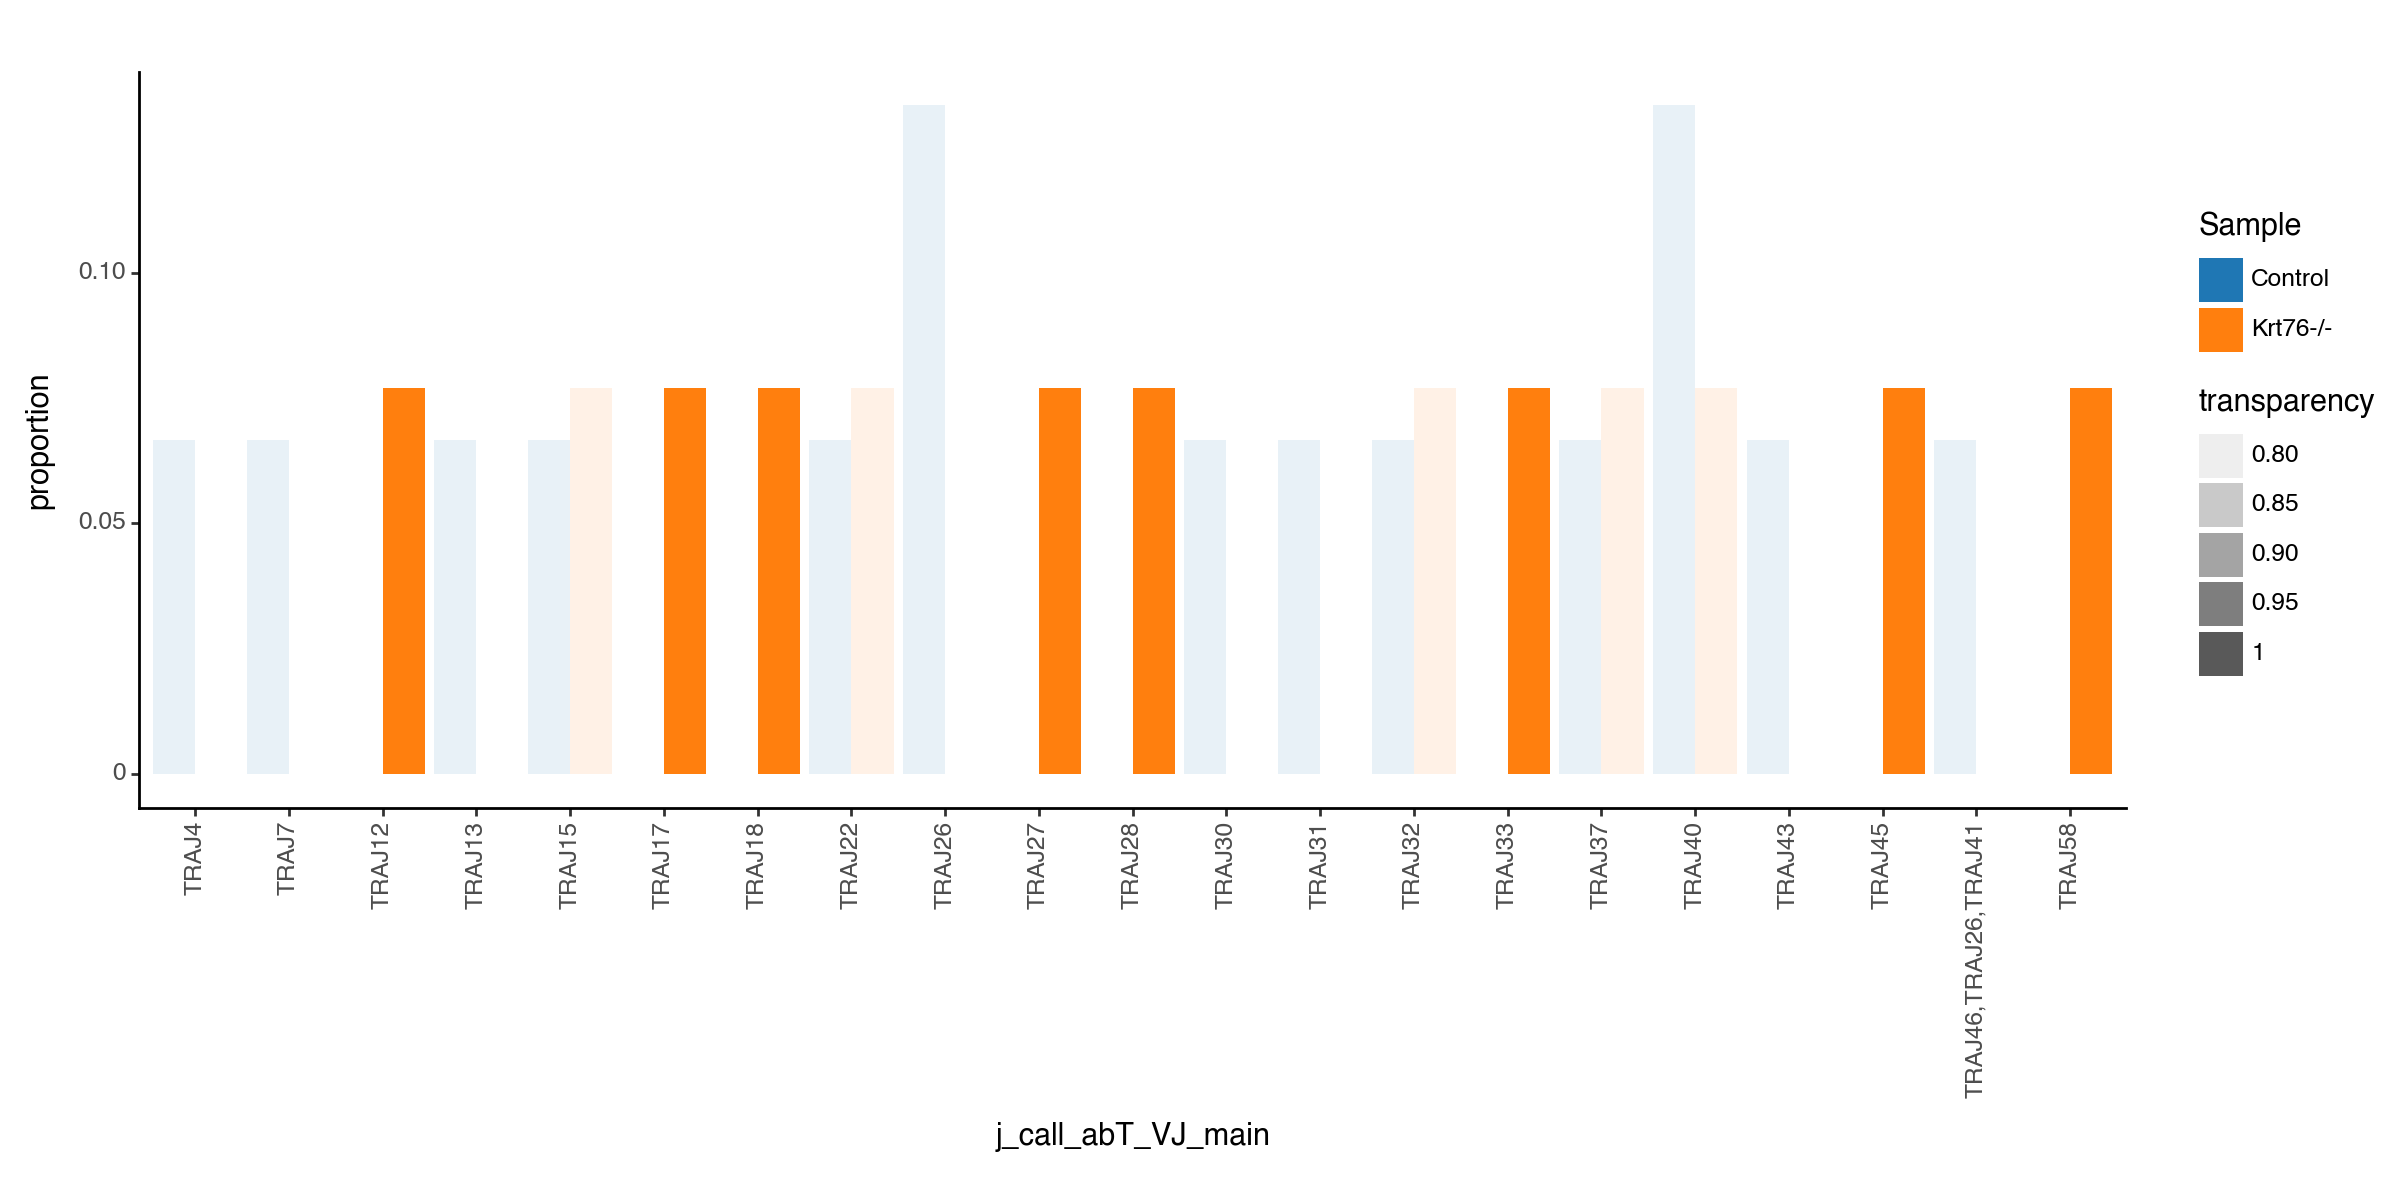

<Figure Size: (1200 x 600)>

In [2289]:
p

In [2290]:
p.save("JgeneAlphaChian_DN3b_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChian_DN3b_141223.pdf


### DN4 - J gene alpha chain

In [2291]:
adata_PF_DN4 = adata_PF[adata_PF.obs["leiden"] == "2 DN4"]

In [2292]:
adata_PF_DN4

View of AnnData object with n_obs × n_vars = 418 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2293]:
working_df = pd.DataFrame(adata_PF_DN4.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ15                              12
         TRAJ49                              12
         TRAJ56                              11
         TRAJ37                              10
         TRAJ31                               9
...                                         ...
Krt76-/- TRAJ18                               1
         TRAJ7                                1
         TRDJ1                                1
         TRAJ41                               0
         TRAJ61                               0

[94 rows x 1 columns]

In [2294]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ15      12
1    Control             TRAJ49      12
2    Control             TRAJ56      11
3    Control             TRAJ37      10
4    Control             TRAJ31       9
..       ...                ...     ...
89  Krt76-/-             TRAJ18       1
90  Krt76-/-              TRAJ7       1
91  Krt76-/-              TRDJ1       1
92  Krt76-/-             TRAJ41       0
93  Krt76-/-             TRAJ61       0

[94 rows x 3 columns]

In [2295]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 204, 'Krt76-/-': 214}

In [2296]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2297]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ15      12    0.058824
1    Control             TRAJ49      12    0.058824
2    Control             TRAJ56      11    0.053922
3    Control             TRAJ37      10    0.049020
4    Control             TRAJ31       9    0.044118
..       ...                ...     ...         ...
89  Krt76-/-             TRAJ18       1    0.004673
90  Krt76-/-              TRAJ7       1    0.004673
91  Krt76-/-              TRDJ1       1    0.004673
92  Krt76-/-             TRAJ41       0    0.000000
93  Krt76-/-             TRAJ61       0    0.000000

[94 rows x 4 columns]

In [2298]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 204, 'Krt76-/-': 214}

In [2299]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2300]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ15      12    0.058824
1    Control             TRAJ49      12    0.058824
2    Control             TRAJ56      11    0.053922
3    Control             TRAJ37      10    0.049020
4    Control             TRAJ31       9    0.044118
..       ...                ...     ...         ...
89  Krt76-/-             TRAJ18       1    0.004673
90  Krt76-/-              TRAJ7       1    0.004673
91  Krt76-/-              TRDJ1       1    0.004673
92  Krt76-/-             TRAJ41       0    0.000000
93  Krt76-/-             TRAJ61       0    0.000000

[94 rows x 4 columns]

In [2301]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2302]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2303]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2304]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2305]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ2': 1.4299065420560748,
 'TRAJ4': 0.38130841121495324,
 'TRAJ5': 1.4299065420560748,
 'TRAJ6': 1.9065420560747663,
 'TRAJ7': 0.2383177570093458,
 'TRAJ9': 0.8341121495327102,
 'TRAJ11': 0.6355140186915887,
 'TRAJ12': 0.6809078771695594,
 'TRAJ13': 0.3177570093457944,
 'TRAJ15': 0.8738317757009346,
 'TRAJ16': 4.766355140186916,
 'TRAJ17': 1.2710280373831775,
 'TRAJ18': 0.13618157543391185,
 'TRAJ21': 3.8130841121495327,
 'TRAJ22': 2.0654205607476634,
 'TRAJ23': 2.2242990654205608,
 'TRAJ24': 0.9532710280373832,
 'TRAJ26': 0.2723631508678237,
 'TRAJ27': 1.2710280373831775,
 'TRAJ28': 0.6355140186915887,
 'TRAJ30': inf,
 'TRAJ31': 1.0591900311526479,
 'TRAJ32': 2.542056074766355,
 'TRAJ33': 0.6355140186915887,
 'TRAJ34': 2.144859813084112,
 'TRAJ35': 3.8130841121495327,
 'TRAJ37': 1.0485981308411214,
 'TRAJ38': inf,
 'TRAJ39': 1.0894526034712948,
 'TRAJ40': 0.794392523364486,
 'TRAJ41': 0.0,
 'TRAJ42': 1.072429906542056,
 'TRAJ43': 1.2710280373831775,
 'TRAJ44': 0.4766355140186916,


In [2306]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ15      12    0.058824    0.873832
1    Control             TRAJ49      12    0.058824    0.556075
2    Control             TRAJ56      11    0.053922    0.346644
3    Control             TRAJ37      10    0.049020    1.048598
4    Control             TRAJ31       9    0.044118    1.059190
..       ...                ...     ...         ...         ...
89  Krt76-/-             TRAJ18       1    0.004673    0.136182
90  Krt76-/-              TRAJ7       1    0.004673    0.238318
91  Krt76-/-              TRDJ1       1    0.004673         inf
92  Krt76-/-             TRAJ41       0    0.000000    0.000000
93  Krt76-/-             TRAJ61       0    0.000000    0.000000

[94 rows x 5 columns]

In [2307]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2308]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2309]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2310]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

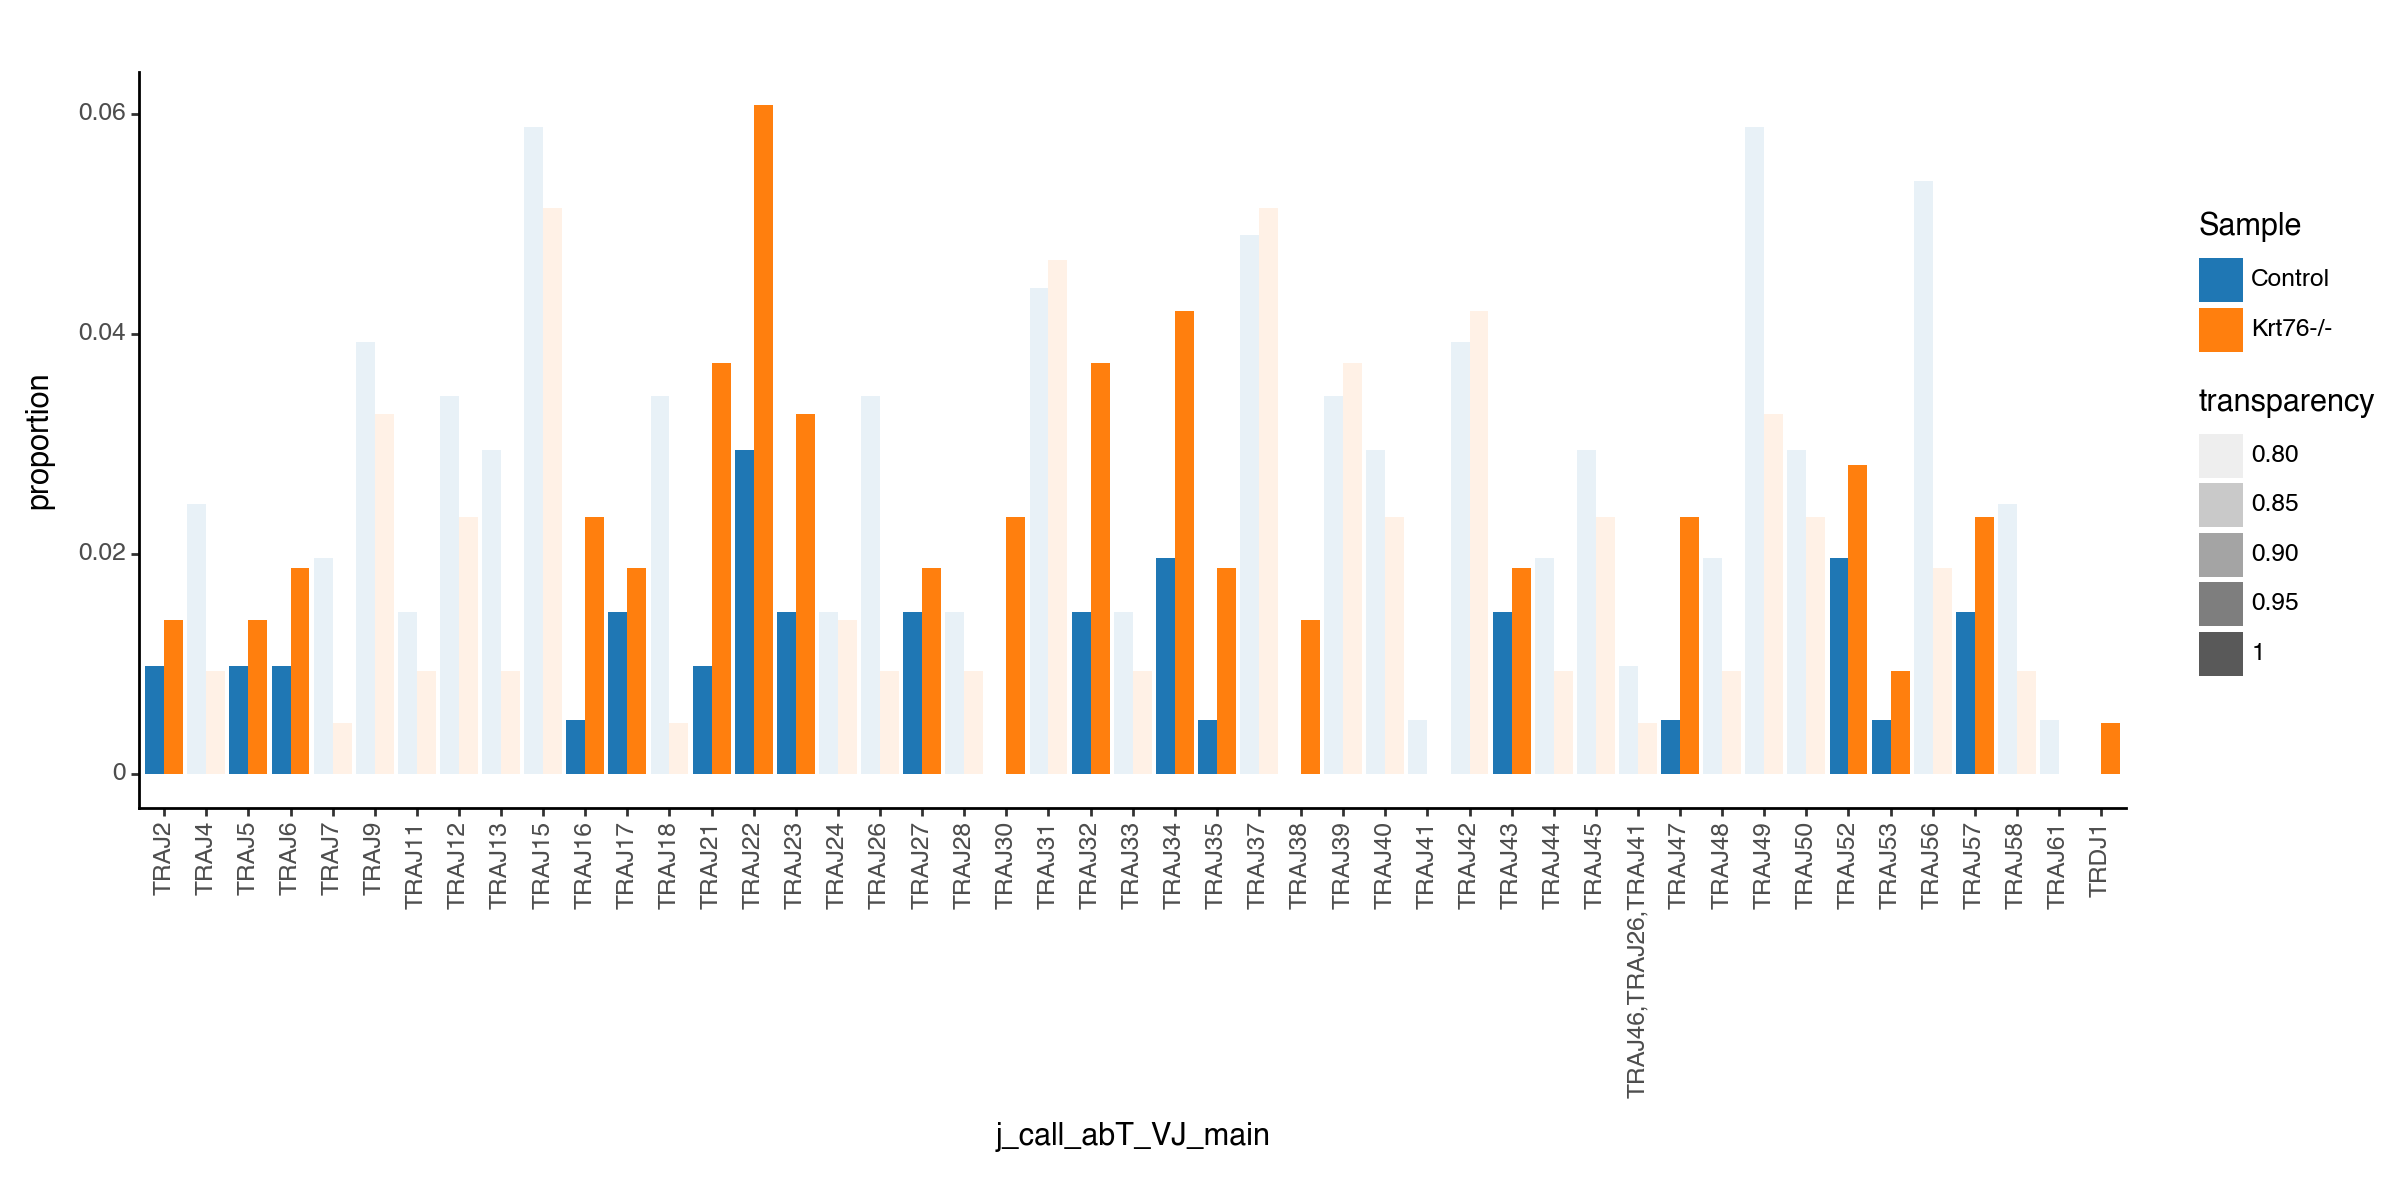

<Figure Size: (1200 x 600)>

In [2311]:
p

In [2312]:
p.save("JgeneAlphaChain_DN4_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN4_141223.pdf


### DP1 - J gene alpha chain

In [2313]:
adata_PF_DP1 = adata_PF[adata_PF.obs["leiden"] == "3 DP 1"]

In [2314]:
adata_PF_DP1

View of AnnData object with n_obs × n_vars = 944 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2315]:
working_df = pd.DataFrame(adata_PF_DP1.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ31                              23
         TRAJ58                              22
         TRAJ32                              20
         TRAJ49                              19
         TRAJ27                              19
...                                         ...
Krt76-/- TRAJ19                               1
         TRDJ1                                1
         TRAJ47                               0
         TRAJ24                               0
         TRBJ2-4                              0

[96 rows x 1 columns]

In [2316]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ31      23
1    Control             TRAJ58      22
2    Control             TRAJ32      20
3    Control             TRAJ49      19
4    Control             TRAJ27      19
..       ...                ...     ...
91  Krt76-/-             TRAJ19       1
92  Krt76-/-              TRDJ1       1
93  Krt76-/-             TRAJ47       0
94  Krt76-/-             TRAJ24       0
95  Krt76-/-            TRBJ2-4       0

[96 rows x 3 columns]

In [2317]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 470, 'Krt76-/-': 474}

In [2318]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2319]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ31      23    0.048936
1    Control             TRAJ58      22    0.046809
2    Control             TRAJ32      20    0.042553
3    Control             TRAJ49      19    0.040426
4    Control             TRAJ27      19    0.040426
..       ...                ...     ...         ...
91  Krt76-/-             TRAJ19       1    0.002110
92  Krt76-/-              TRDJ1       1    0.002110
93  Krt76-/-             TRAJ47       0    0.000000
94  Krt76-/-             TRAJ24       0    0.000000
95  Krt76-/-            TRBJ2-4       0    0.000000

[96 rows x 4 columns]

In [2320]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 470, 'Krt76-/-': 474}

In [2321]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2322]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ31      23    0.048936
1    Control             TRAJ58      22    0.046809
2    Control             TRAJ32      20    0.042553
3    Control             TRAJ49      19    0.040426
4    Control             TRAJ27      19    0.040426
..       ...                ...     ...         ...
91  Krt76-/-             TRAJ19       1    0.002110
92  Krt76-/-              TRDJ1       1    0.002110
93  Krt76-/-             TRAJ47       0    0.000000
94  Krt76-/-             TRAJ24       0    0.000000
95  Krt76-/-            TRBJ2-4       0    0.000000

[96 rows x 4 columns]

In [2323]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2324]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2325]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2326]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2327]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ2': 0.6610407876230661,
 'TRAJ4': 0.762739370334307,
 'TRAJ5': 0.6610407876230661,
 'TRAJ6': 1.0907172995780592,
 'TRAJ7': 0.8112773302646721,
 'TRAJ9': 0.7271448663853728,
 'TRAJ11': 2.9746835443037973,
 'TRAJ12': 0.859353023909986,
 'TRAJ13': 0.8813877168307548,
 'TRAJ15': 1.388185654008439,
 'TRAJ16': 2.6441631504922642,
 'TRAJ17': 0.4957805907172995,
 'TRAJ18': 1.1898734177215189,
 'TRAJ19': inf,
 'TRAJ21': 1.5581675708257987,
 'TRAJ22': 1.2559774964838257,
 'TRAJ23': 1.4165159734779986,
 'TRAJ24': 0.0,
 'TRAJ26': 0.8924050632911393,
 'TRAJ27': 0.5740617366200311,
 'TRAJ28': inf,
 'TRAJ30': 2.549728752260398,
 'TRAJ31': 1.034672537149147,
 'TRAJ32': 0.5949367088607594,
 'TRAJ33': 0.8390133073677378,
 'TRAJ34': 1.872948898265354,
 'TRAJ35': 0.6610407876230661,
 'TRAJ37': 0.991561181434599,
 'TRAJ38': 1.3220815752461321,
 'TRAJ39': 0.4957805907172995,
 'TRAJ40': 0.8165797964755523,
 'TRAJ41': 0.4957805907172995,
 'TRAJ42': 1.6998191681735983,
 'TRAJ43': 0.7271448663853728,
 'TR

In [2328]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ31      23    0.048936    1.034673
1    Control             TRAJ58      22    0.046809    0.856348
2    Control             TRAJ32      20    0.042553    0.594937
3    Control             TRAJ49      19    0.040426    0.939374
4    Control             TRAJ27      19    0.040426    0.574062
..       ...                ...     ...         ...         ...
91  Krt76-/-             TRAJ19       1    0.002110         inf
92  Krt76-/-              TRDJ1       1    0.002110    0.330520
93  Krt76-/-             TRAJ47       0    0.000000    0.000000
94  Krt76-/-             TRAJ24       0    0.000000    0.000000
95  Krt76-/-            TRBJ2-4       0    0.000000    0.000000

[96 rows x 5 columns]

In [2329]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2330]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2331]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2332]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

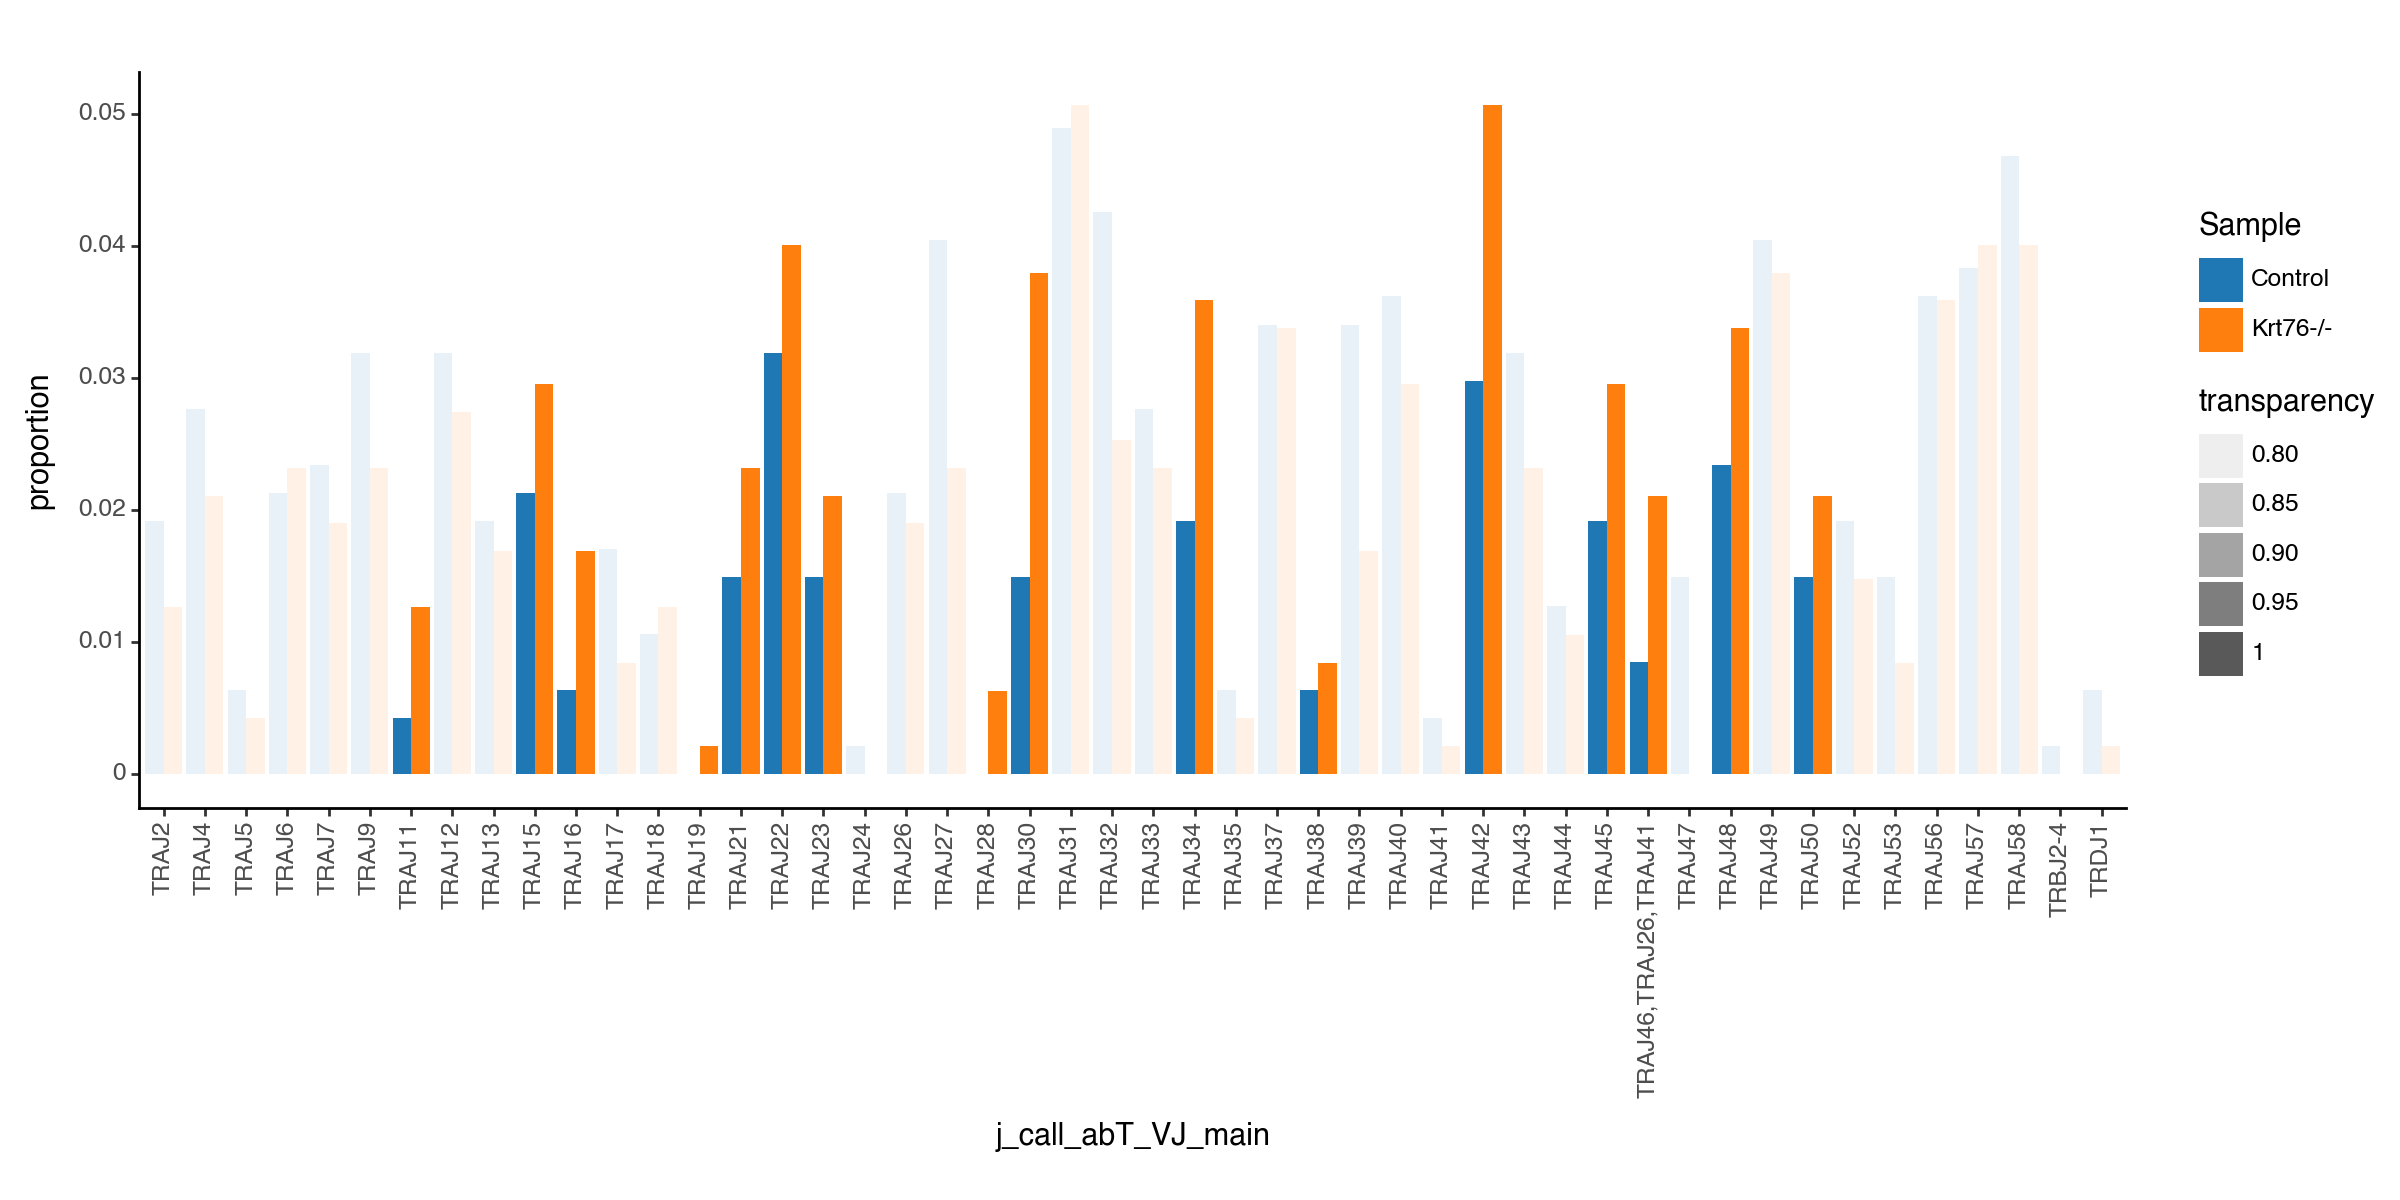

<Figure Size: (1200 x 600)>

In [2333]:
p

In [2334]:
p.save("JgeneAlphaChain_DP1_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DP1_141223.pdf


### DP2 - J gene alpha chain

In [2335]:
adata_PF_DP2 = adata_PF[adata_PF.obs["leiden"] == "9 DP 2"]

In [2336]:
adata_PF_DP2

View of AnnData object with n_obs × n_vars = 17 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2337]:
working_df = pd.DataFrame(adata_PF_DP2.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ37                               2
         TRAJ53                               2
         TRAJ15                               1
         TRAJ23                               1
         TRAJ26                               1
         TRAJ42                               1
         TRAJ49                               1
         TRAJ52                               1
         TRAJ7,TRAJ31                         0
         TRAJ21                               0
         TRAJ27                               0
         TRAJ33                               0
         TRAJ47                               0
Krt76-/- TRAJ7,TRAJ31                         1
         TRAJ21                               1
         TRAJ27                               1
         TRAJ33                               1
         TRAJ42                               1
         TRAJ47                               1
         TRAJ53                               1
         TRAJ15                               0
         TRAJ23                               0
         TRAJ26                               0
         TRAJ37                               0
         TRAJ49                               0
         TRAJ52                               0

In [2338]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ37       2
1    Control             TRAJ53       2
2    Control             TRAJ15       1
3    Control             TRAJ23       1
4    Control             TRAJ26       1
5    Control             TRAJ42       1
6    Control             TRAJ49       1
7    Control             TRAJ52       1
8    Control       TRAJ7,TRAJ31       0
9    Control             TRAJ21       0
10   Control             TRAJ27       0
11   Control             TRAJ33       0
12   Control             TRAJ47       0
13  Krt76-/-       TRAJ7,TRAJ31       1
14  Krt76-/-             TRAJ21       1
15  Krt76-/-             TRAJ27       1
16  Krt76-/-             TRAJ33       1
17  Krt76-/-             TRAJ42       1
18  Krt76-/-             TRAJ47       1
19  Krt76-/-             TRAJ53       1
20  Krt76-/-             TRAJ15       0
21  Krt76-/-             TRAJ23       0
22  Krt76-/-             TRAJ26       0
23  Krt76-/-             TRAJ37       0
24  Krt76-/-             TRAJ49       0
25  Krt76-/-             TRAJ52       0

In [2339]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 10, 'Krt76-/-': 7}

In [2340]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2341]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ37       2    0.200000
1    Control             TRAJ53       2    0.200000
2    Control             TRAJ15       1    0.100000
3    Control             TRAJ23       1    0.100000
4    Control             TRAJ26       1    0.100000
5    Control             TRAJ42       1    0.100000
6    Control             TRAJ49       1    0.100000
7    Control             TRAJ52       1    0.100000
8    Control       TRAJ7,TRAJ31       0    0.000000
9    Control             TRAJ21       0    0.000000
10   Control             TRAJ27       0    0.000000
11   Control             TRAJ33       0    0.000000
12   Control             TRAJ47       0    0.000000
13  Krt76-/-       TRAJ7,TRAJ31       1    0.142857
14  Krt76-/-             TRAJ21       1    0.142857
15  Krt76-/-             TRAJ27       1    0.142857
16  Krt76-/-             TRAJ33       1    0.142857
17  Krt76-/-             TRAJ42       1    0.142857
18  Krt76-/-             TRAJ47       1    0.142857
19  Krt76-/-             TRAJ53       1    0.142857
20  Krt76-/-             TRAJ15       0    0.000000
21  Krt76-/-             TRAJ23       0    0.000000
22  Krt76-/-             TRAJ26       0    0.000000
23  Krt76-/-             TRAJ37       0    0.000000
24  Krt76-/-             TRAJ49       0    0.000000
25  Krt76-/-             TRAJ52       0    0.000000

In [2342]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 10, 'Krt76-/-': 7}

In [2343]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2344]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ37       2    0.200000
1    Control             TRAJ53       2    0.200000
2    Control             TRAJ15       1    0.100000
3    Control             TRAJ23       1    0.100000
4    Control             TRAJ26       1    0.100000
5    Control             TRAJ42       1    0.100000
6    Control             TRAJ49       1    0.100000
7    Control             TRAJ52       1    0.100000
8    Control       TRAJ7,TRAJ31       0    0.000000
9    Control             TRAJ21       0    0.000000
10   Control             TRAJ27       0    0.000000
11   Control             TRAJ33       0    0.000000
12   Control             TRAJ47       0    0.000000
13  Krt76-/-       TRAJ7,TRAJ31       1    0.142857
14  Krt76-/-             TRAJ21       1    0.142857
15  Krt76-/-             TRAJ27       1    0.142857
16  Krt76-/-             TRAJ33       1    0.142857
17  Krt76-/-             TRAJ42       1    0.142857
18  Krt76-/-             TRAJ47       1    0.142857
19  Krt76-/-             TRAJ53       1    0.142857
20  Krt76-/-             TRAJ15       0    0.000000
21  Krt76-/-             TRAJ23       0    0.000000
22  Krt76-/-             TRAJ26       0    0.000000
23  Krt76-/-             TRAJ37       0    0.000000
24  Krt76-/-             TRAJ49       0    0.000000
25  Krt76-/-             TRAJ52       0    0.000000

In [2345]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2346]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2347]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2348]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2349]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ7,TRAJ31': inf,
 'TRAJ15': 0.0,
 'TRAJ21': inf,
 'TRAJ23': 0.0,
 'TRAJ26': 0.0,
 'TRAJ27': inf,
 'TRAJ33': inf,
 'TRAJ37': 0.0,
 'TRAJ42': 1.4285714285714284,
 'TRAJ47': inf,
 'TRAJ49': 0.0,
 'TRAJ52': 0.0,
 'TRAJ53': 0.7142857142857142}

In [2350]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ37       2    0.200000    0.000000
1    Control             TRAJ53       2    0.200000    0.714286
2    Control             TRAJ15       1    0.100000    0.000000
3    Control             TRAJ23       1    0.100000    0.000000
4    Control             TRAJ26       1    0.100000    0.000000
5    Control             TRAJ42       1    0.100000    1.428571
6    Control             TRAJ49       1    0.100000    0.000000
7    Control             TRAJ52       1    0.100000    0.000000
8    Control       TRAJ7,TRAJ31       0    0.000000         inf
9    Control             TRAJ21       0    0.000000         inf
10   Control             TRAJ27       0    0.000000         inf
11   Control             TRAJ33       0    0.000000         inf
12   Control             TRAJ47       0    0.000000         inf
13  Krt76-/-       TRAJ7,TRAJ31       1    0.142857         inf
14  Krt76-/-             TRAJ21       1    0.142857         inf
15  Krt76-/-             TRAJ27       1    0.142857         inf
16  Krt76-/-             TRAJ33       1    0.142857         inf
17  Krt76-/-             TRAJ42       1    0.142857    1.428571
18  Krt76-/-             TRAJ47       1    0.142857         inf
19  Krt76-/-             TRAJ53       1    0.142857    0.714286
20  Krt76-/-             TRAJ15       0    0.000000    0.000000
21  Krt76-/-             TRAJ23       0    0.000000    0.000000
22  Krt76-/-             TRAJ26       0    0.000000    0.000000
23  Krt76-/-             TRAJ37       0    0.000000    0.000000
24  Krt76-/-             TRAJ49       0    0.000000    0.000000
25  Krt76-/-             TRAJ52       0    0.000000    0.000000

In [2351]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2352]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2353]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2354]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

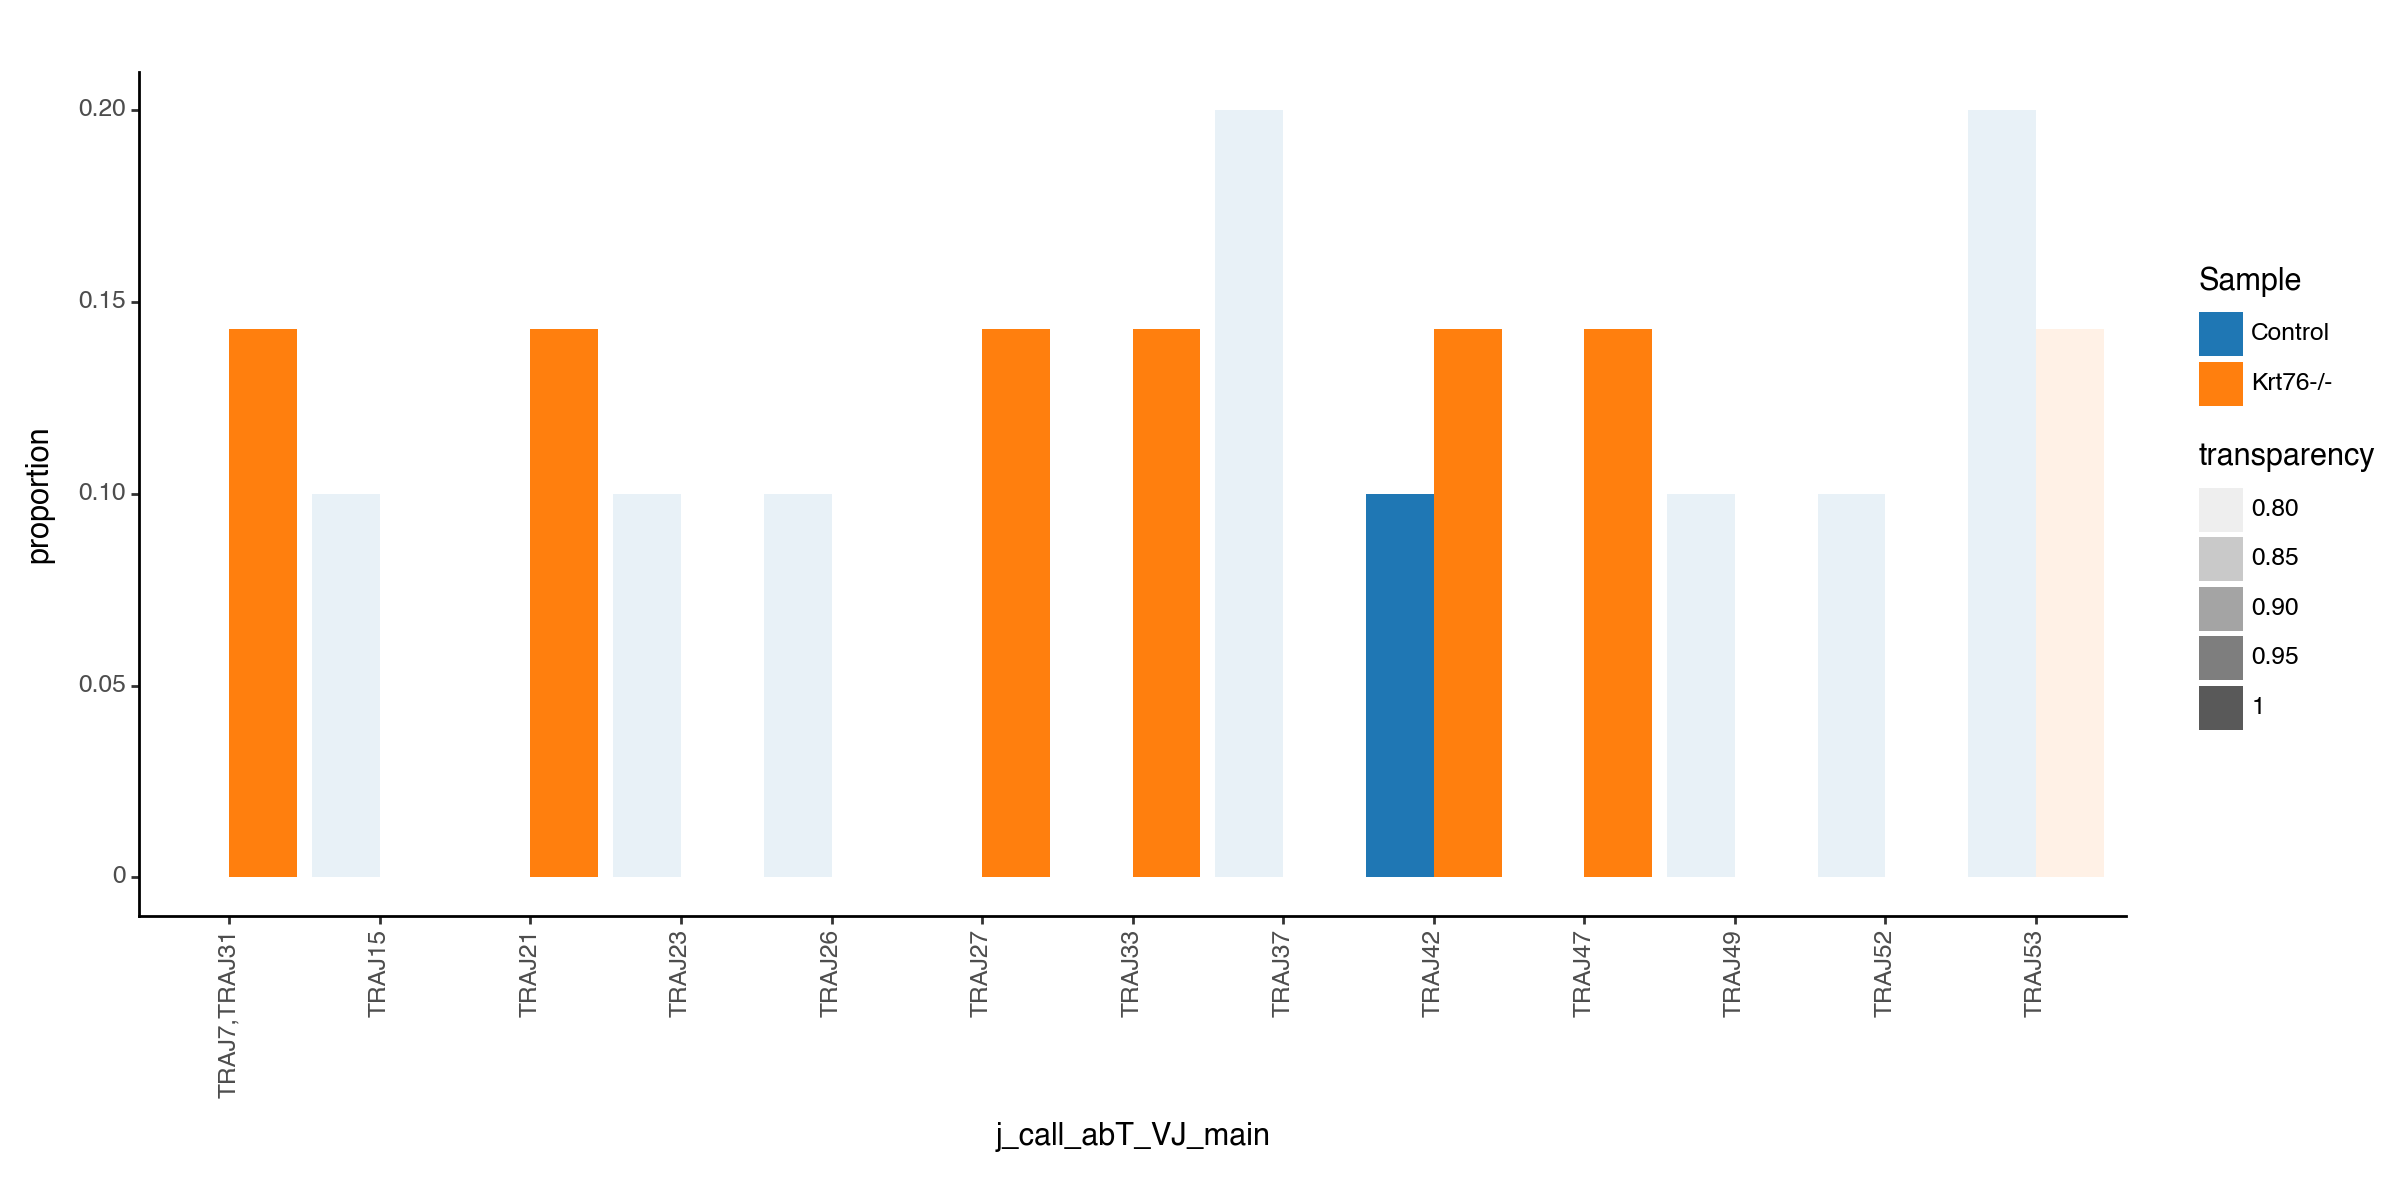

<Figure Size: (1200 x 600)>

In [2355]:
p

In [2356]:
p.save("JgeneAlphaChain_DP2_141223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DP2_141223.pdf


### SPDP - J gene alpha chain

In [2357]:
adata_PF_SPDP = adata_PF[adata_PF.obs["leiden"] == "5 SP & DP"]

In [2358]:
adata_PF_SPDP

View of AnnData object with n_obs × n_vars = 816 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2359]:
working_df = pd.DataFrame(adata_PF_SPDP.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                      
Control  TRAJ21                                32
         TRAJ31                                30
         TRAJ22                                30
         TRAJ23                                27
         TRAJ15                                26
...                                           ...
Krt76-/- TRAJ46,TRAJ26,TRAJ41                   1
         TRAJ16                                 1
         TRAJ5                                  1
         TRAJ41                                 0
         TRAJ19                                 0

[92 rows x 1 columns]

In [2360]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample    j_call_abT_VJ_main  counts
0    Control                TRAJ21      32
1    Control                TRAJ31      30
2    Control                TRAJ22      30
3    Control                TRAJ23      27
4    Control                TRAJ15      26
..       ...                   ...     ...
87  Krt76-/-  TRAJ46,TRAJ26,TRAJ41       1
88  Krt76-/-                TRAJ16       1
89  Krt76-/-                 TRAJ5       1
90  Krt76-/-                TRAJ41       0
91  Krt76-/-                TRAJ19       0

[92 rows x 3 columns]

In [2361]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 539, 'Krt76-/-': 277}

In [2362]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2363]:
working_df

Sample    j_call_abT_VJ_main  counts  proportion
0    Control                TRAJ21      32    0.059369
1    Control                TRAJ31      30    0.055659
2    Control                TRAJ22      30    0.055659
3    Control                TRAJ23      27    0.050093
4    Control                TRAJ15      26    0.048237
..       ...                   ...     ...         ...
87  Krt76-/-  TRAJ46,TRAJ26,TRAJ41       1    0.003610
88  Krt76-/-                TRAJ16       1    0.003610
89  Krt76-/-                 TRAJ5       1    0.003610
90  Krt76-/-                TRAJ41       0    0.000000
91  Krt76-/-                TRAJ19       0    0.000000

[92 rows x 4 columns]

In [2364]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 539, 'Krt76-/-': 277}

In [2365]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2366]:
working_df

Sample    j_call_abT_VJ_main  counts  proportion
0    Control                TRAJ21      32    0.059369
1    Control                TRAJ31      30    0.055659
2    Control                TRAJ22      30    0.055659
3    Control                TRAJ23      27    0.050093
4    Control                TRAJ15      26    0.048237
..       ...                   ...     ...         ...
87  Krt76-/-  TRAJ46,TRAJ26,TRAJ41       1    0.003610
88  Krt76-/-                TRAJ16       1    0.003610
89  Krt76-/-                 TRAJ5       1    0.003610
90  Krt76-/-                TRAJ41       0    0.000000
91  Krt76-/-                TRAJ19       0    0.000000

[92 rows x 4 columns]

In [2367]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2368]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2369]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2370]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2371]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ2': 0.7783393501805054,
 'TRAJ4': 0.555956678700361,
 'TRAJ5': 1.9458483754512637,
 'TRAJ6': 1.167509025270758,
 'TRAJ7': 1.5566787003610107,
 'TRAJ9': 0.8513086642599277,
 'TRAJ11': 1.111913357400722,
 'TRAJ12': 1.1446166914419196,
 'TRAJ13': 1.5134376253509827,
 'TRAJ15': 0.5987225770619272,
 'TRAJ16': 0.6486161251504212,
 'TRAJ17': 1.3898916967509025,
 'TRAJ18': 1.9458483754512634,
 'TRAJ19': 0.0,
 'TRAJ21': 0.5472698555956678,
 'TRAJ22': 0.6486161251504212,
 'TRAJ23': 1.0089584169006551,
 'TRAJ24': 0.9729241877256318,
 'TRAJ26': 0.9729241877256318,
 'TRAJ27': 1.1974451541238544,
 'TRAJ28': 1.9458483754512637,
 'TRAJ30': 1.0945397111913355,
 'TRAJ31': 0.9080625752105896,
 'TRAJ32': 1.0477645098583726,
 'TRAJ33': 1.496806442654818,
 'TRAJ34': 0.8012316840093437,
 'TRAJ35': inf,
 'TRAJ37': 0.555956678700361,
 'TRAJ38': 0.9729241877256318,
 'TRAJ39': 1.0945397111913355,
 'TRAJ40': 1.4880016988744955,
 'TRAJ41': 0.0,
 'TRAJ42': 1.037785800240674,
 'TRAJ43': 0.6949458483754513,
 'T

In [2372]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample    j_call_abT_VJ_main  counts  proportion  foldchange
0    Control                TRAJ21      32    0.059369    0.547270
1    Control                TRAJ31      30    0.055659    0.908063
2    Control                TRAJ22      30    0.055659    0.648616
3    Control                TRAJ23      27    0.050093    1.008958
4    Control                TRAJ15      26    0.048237    0.598723
..       ...                   ...     ...         ...         ...
87  Krt76-/-  TRAJ46,TRAJ26,TRAJ41       1    0.003610    1.945848
88  Krt76-/-                TRAJ16       1    0.003610    0.648616
89  Krt76-/-                 TRAJ5       1    0.003610    1.945848
90  Krt76-/-                TRAJ41       0    0.000000    0.000000
91  Krt76-/-                TRAJ19       0    0.000000    0.000000

[92 rows x 5 columns]

In [2373]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2374]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2375]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2376]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

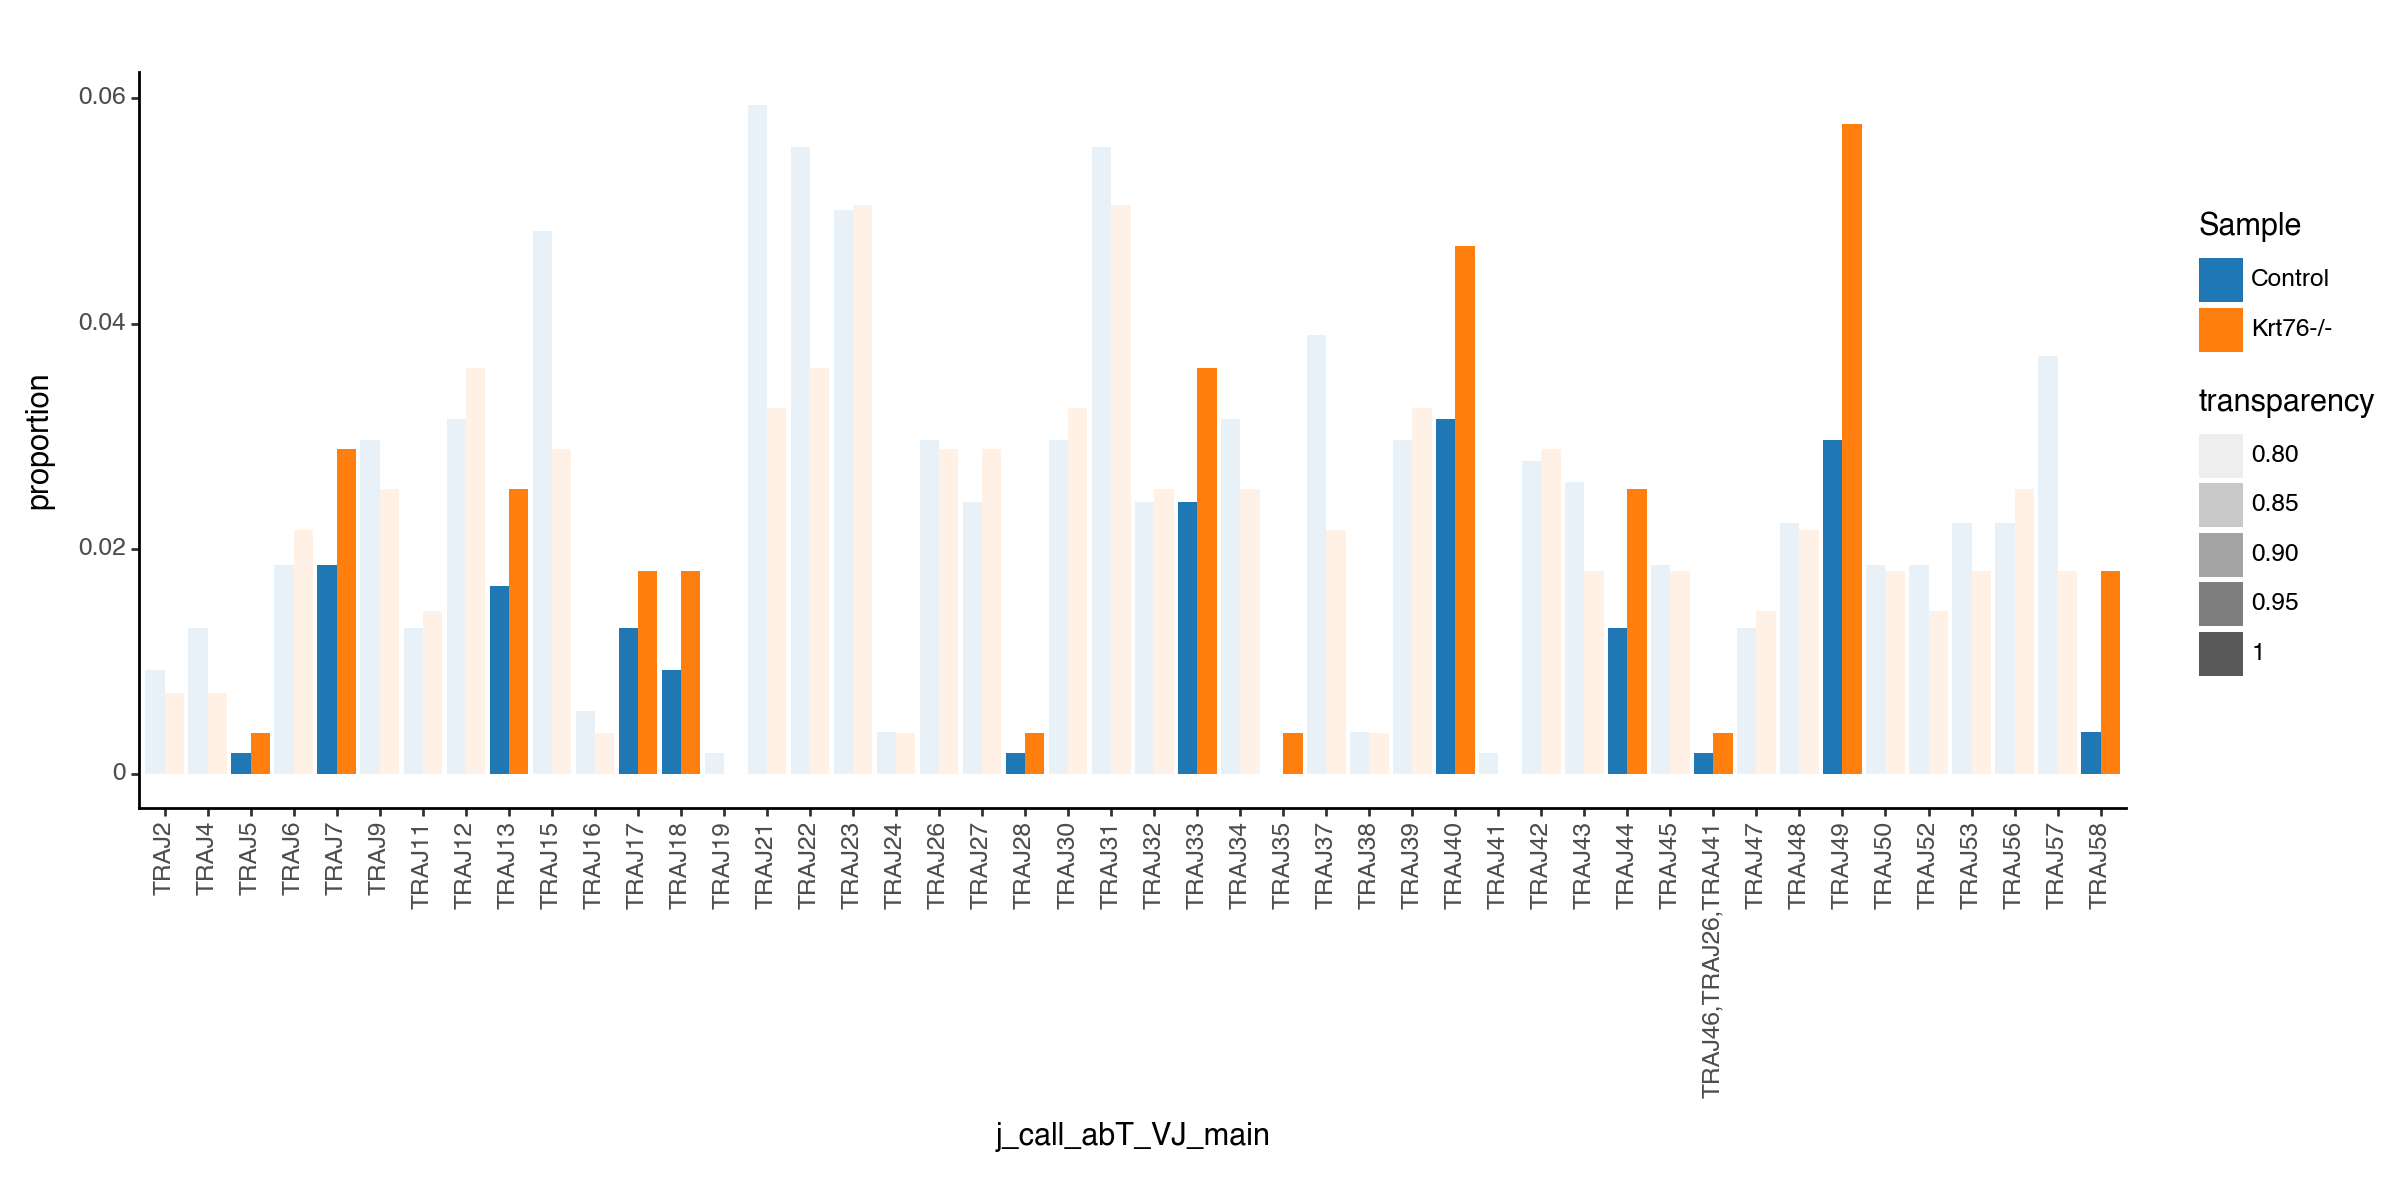

<Figure Size: (1200 x 600)>

In [2377]:
p

In [2378]:
p.save("JgeneAlphaChain_SPDP_111223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_SPDP_111223.pdf


### TCRgd - J gene alpha chain

In [2379]:
adata_PF_GD = adata_PF[adata_PF.obs["leiden"] == "8 TCRgd"]

In [2380]:
adata_PF_GD

View of AnnData object with n_obs × n_vars = 14 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [2381]:
working_df = pd.DataFrame(adata_PF_GD.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ5                                1
         TRAJ6                                1
         TRAJ12                               1
         TRAJ21                               1
         TRAJ23                               1
         TRAJ27                               1
         TRAJ32                               1
         TRAJ35                               1
         TRAJ37                               1
         TRAJ40                               1
         TRAJ58                               1
         TRAJ4                                0
         TRAJ33                               0
         TRDJ1                                0
Krt76-/- TRAJ4                                1
         TRAJ33                               1
         TRDJ1                                1
         TRAJ5                                0
         TRAJ6                                0
         TRAJ12                               0
         TRAJ21                               0
         TRAJ23                               0
         TRAJ27                               0
         TRAJ32                               0
         TRAJ35                               0
         TRAJ37                               0
         TRAJ40                               0
         TRAJ58                               0

In [2382]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control              TRAJ5       1
1    Control              TRAJ6       1
2    Control             TRAJ12       1
3    Control             TRAJ21       1
4    Control             TRAJ23       1
5    Control             TRAJ27       1
6    Control             TRAJ32       1
7    Control             TRAJ35       1
8    Control             TRAJ37       1
9    Control             TRAJ40       1
10   Control             TRAJ58       1
11   Control              TRAJ4       0
12   Control             TRAJ33       0
13   Control              TRDJ1       0
14  Krt76-/-              TRAJ4       1
15  Krt76-/-             TRAJ33       1
16  Krt76-/-              TRDJ1       1
17  Krt76-/-              TRAJ5       0
18  Krt76-/-              TRAJ6       0
19  Krt76-/-             TRAJ12       0
20  Krt76-/-             TRAJ21       0
21  Krt76-/-             TRAJ23       0
22  Krt76-/-             TRAJ27       0
23  Krt76-/-             TRAJ32       0
24  Krt76-/-             TRAJ35       0
25  Krt76-/-             TRAJ37       0
26  Krt76-/-             TRAJ40       0
27  Krt76-/-             TRAJ58       0

In [2383]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 11, 'Krt76-/-': 3}

In [2384]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2385]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control              TRAJ5       1    0.090909
1    Control              TRAJ6       1    0.090909
2    Control             TRAJ12       1    0.090909
3    Control             TRAJ21       1    0.090909
4    Control             TRAJ23       1    0.090909
5    Control             TRAJ27       1    0.090909
6    Control             TRAJ32       1    0.090909
7    Control             TRAJ35       1    0.090909
8    Control             TRAJ37       1    0.090909
9    Control             TRAJ40       1    0.090909
10   Control             TRAJ58       1    0.090909
11   Control              TRAJ4       0    0.000000
12   Control             TRAJ33       0    0.000000
13   Control              TRDJ1       0    0.000000
14  Krt76-/-              TRAJ4       1    0.333333
15  Krt76-/-             TRAJ33       1    0.333333
16  Krt76-/-              TRDJ1       1    0.333333
17  Krt76-/-              TRAJ5       0    0.000000
18  Krt76-/-              TRAJ6       0    0.000000
19  Krt76-/-             TRAJ12       0    0.000000
20  Krt76-/-             TRAJ21       0    0.000000
21  Krt76-/-             TRAJ23       0    0.000000
22  Krt76-/-             TRAJ27       0    0.000000
23  Krt76-/-             TRAJ32       0    0.000000
24  Krt76-/-             TRAJ35       0    0.000000
25  Krt76-/-             TRAJ37       0    0.000000
26  Krt76-/-             TRAJ40       0    0.000000
27  Krt76-/-             TRAJ58       0    0.000000

In [2386]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 11, 'Krt76-/-': 3}

In [2387]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2388]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control              TRAJ5       1    0.090909
1    Control              TRAJ6       1    0.090909
2    Control             TRAJ12       1    0.090909
3    Control             TRAJ21       1    0.090909
4    Control             TRAJ23       1    0.090909
5    Control             TRAJ27       1    0.090909
6    Control             TRAJ32       1    0.090909
7    Control             TRAJ35       1    0.090909
8    Control             TRAJ37       1    0.090909
9    Control             TRAJ40       1    0.090909
10   Control             TRAJ58       1    0.090909
11   Control              TRAJ4       0    0.000000
12   Control             TRAJ33       0    0.000000
13   Control              TRDJ1       0    0.000000
14  Krt76-/-              TRAJ4       1    0.333333
15  Krt76-/-             TRAJ33       1    0.333333
16  Krt76-/-              TRDJ1       1    0.333333
17  Krt76-/-              TRAJ5       0    0.000000
18  Krt76-/-              TRAJ6       0    0.000000
19  Krt76-/-             TRAJ12       0    0.000000
20  Krt76-/-             TRAJ21       0    0.000000
21  Krt76-/-             TRAJ23       0    0.000000
22  Krt76-/-             TRAJ27       0    0.000000
23  Krt76-/-             TRAJ32       0    0.000000
24  Krt76-/-             TRAJ35       0    0.000000
25  Krt76-/-             TRAJ37       0    0.000000
26  Krt76-/-             TRAJ40       0    0.000000
27  Krt76-/-             TRAJ58       0    0.000000

In [2389]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2390]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2391]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2392]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2393]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ4': inf,
 'TRAJ5': 0.0,
 'TRAJ6': 0.0,
 'TRAJ12': 0.0,
 'TRAJ21': 0.0,
 'TRAJ23': 0.0,
 'TRAJ27': 0.0,
 'TRAJ32': 0.0,
 'TRAJ33': inf,
 'TRAJ35': 0.0,
 'TRAJ37': 0.0,
 'TRAJ40': 0.0,
 'TRAJ58': 0.0,
 'TRDJ1': inf}

In [2394]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control              TRAJ5       1    0.090909         0.0
1    Control              TRAJ6       1    0.090909         0.0
2    Control             TRAJ12       1    0.090909         0.0
3    Control             TRAJ21       1    0.090909         0.0
4    Control             TRAJ23       1    0.090909         0.0
5    Control             TRAJ27       1    0.090909         0.0
6    Control             TRAJ32       1    0.090909         0.0
7    Control             TRAJ35       1    0.090909         0.0
8    Control             TRAJ37       1    0.090909         0.0
9    Control             TRAJ40       1    0.090909         0.0
10   Control             TRAJ58       1    0.090909         0.0
11   Control              TRAJ4       0    0.000000         inf
12   Control             TRAJ33       0    0.000000         inf
13   Control              TRDJ1       0    0.000000         inf
14  Krt76-/-              TRAJ4       1    0.333333         inf
15  Krt76-/-             TRAJ33       1    0.333333         inf
16  Krt76-/-              TRDJ1       1    0.333333         inf
17  Krt76-/-              TRAJ5       0    0.000000         0.0
18  Krt76-/-              TRAJ6       0    0.000000         0.0
19  Krt76-/-             TRAJ12       0    0.000000         0.0
20  Krt76-/-             TRAJ21       0    0.000000         0.0
21  Krt76-/-             TRAJ23       0    0.000000         0.0
22  Krt76-/-             TRAJ27       0    0.000000         0.0
23  Krt76-/-             TRAJ32       0    0.000000         0.0
24  Krt76-/-             TRAJ35       0    0.000000         0.0
25  Krt76-/-             TRAJ37       0    0.000000         0.0
26  Krt76-/-             TRAJ40       0    0.000000         0.0
27  Krt76-/-             TRAJ58       0    0.000000         0.0

In [2395]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2396]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2397]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.


['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2398]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

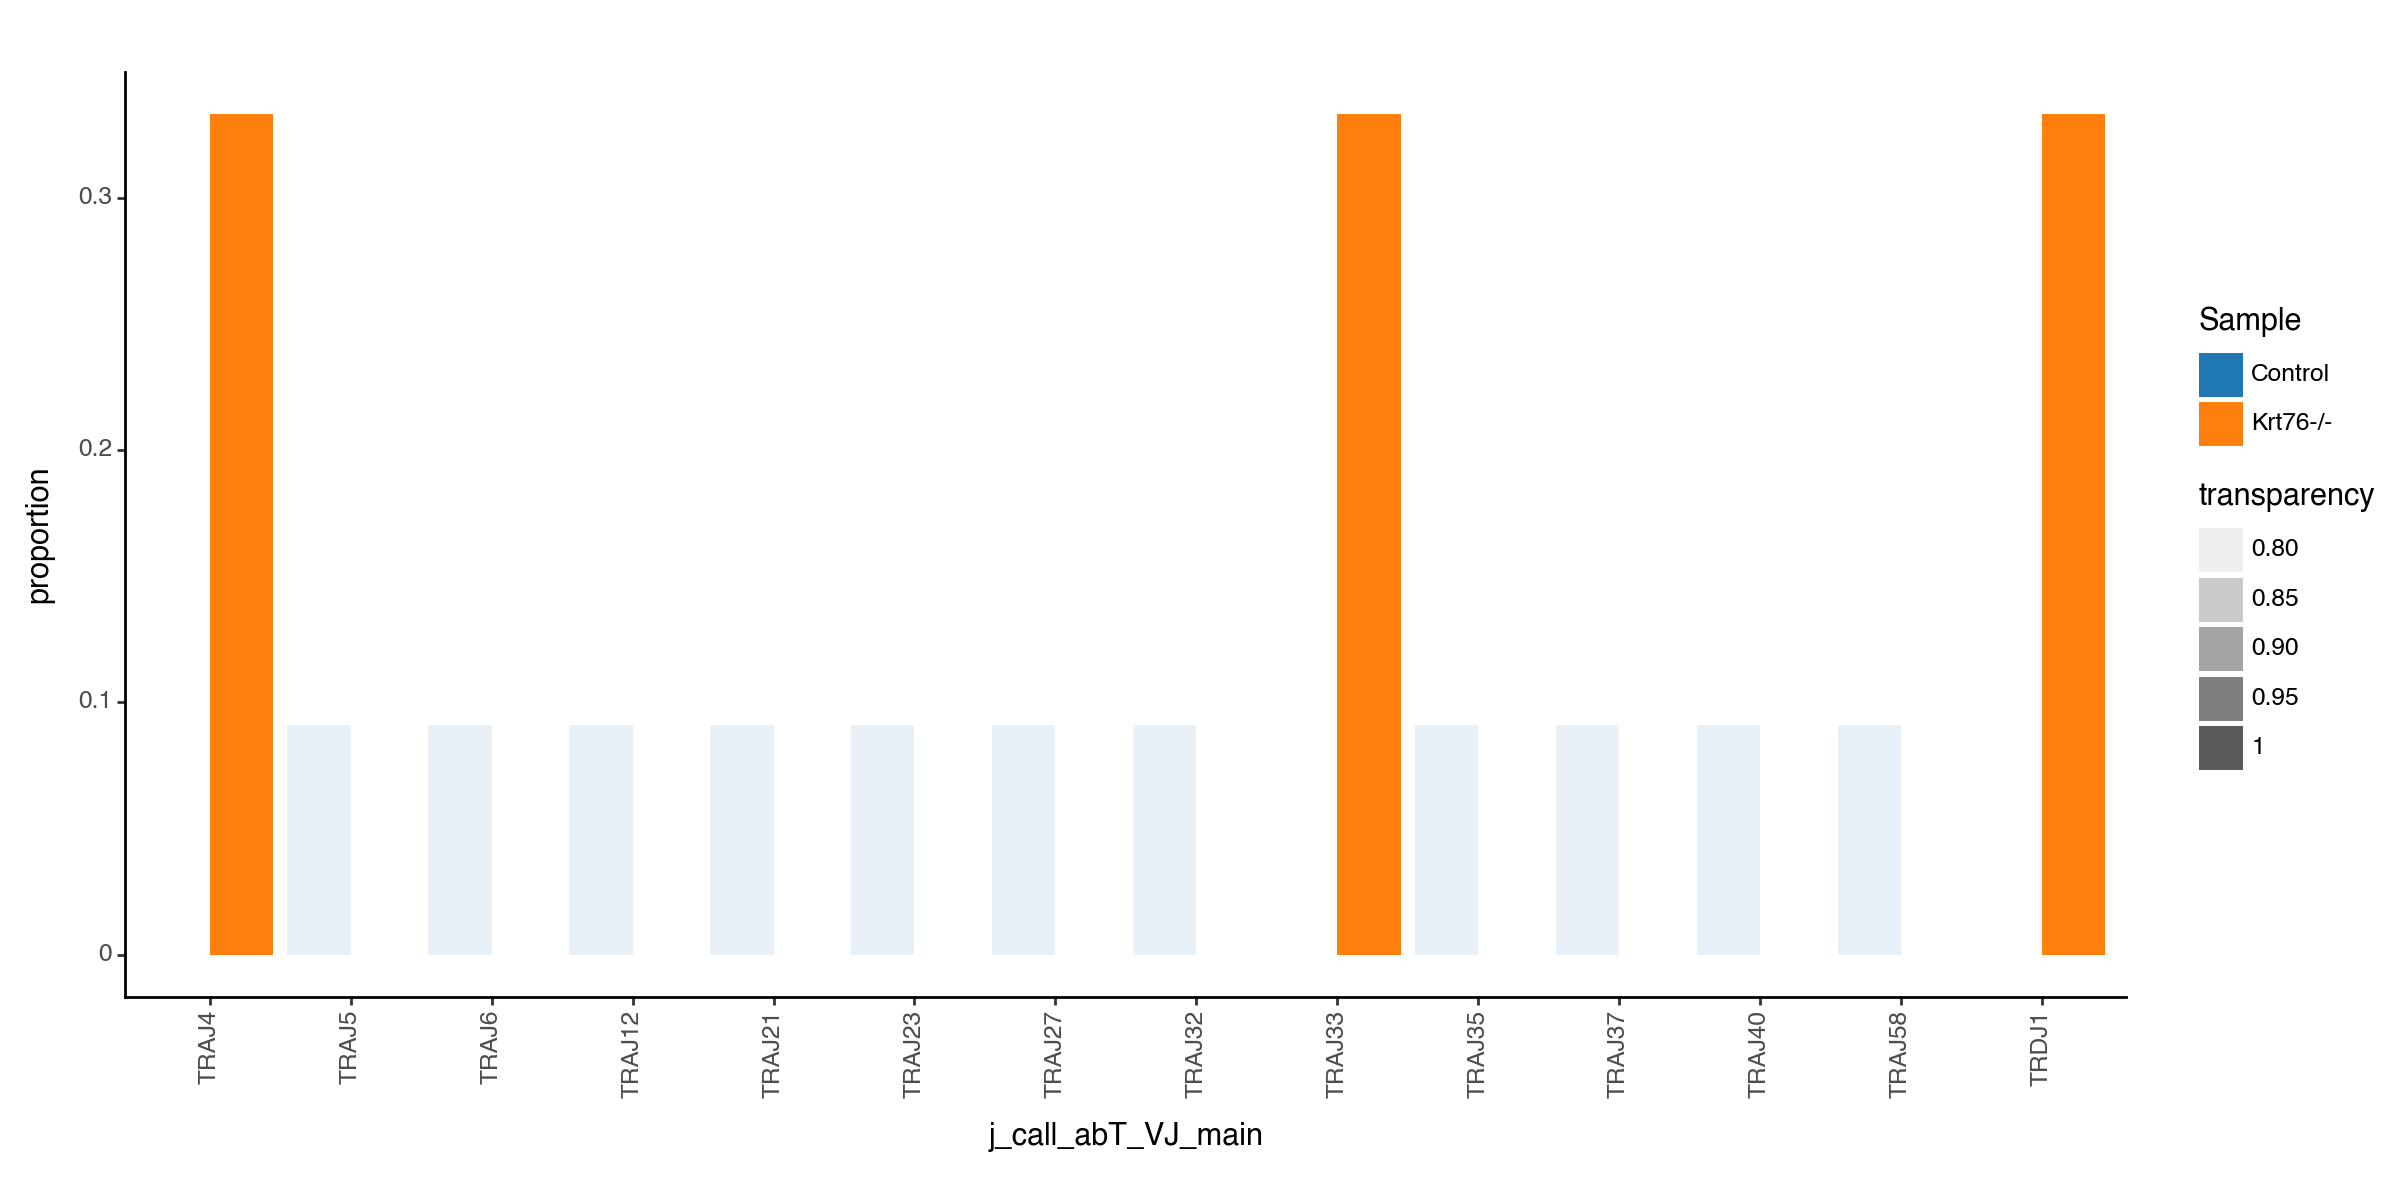

<Figure Size: (1200 x 600)>

In [2399]:
p

In [2400]:
p.save("JgeneAlphaChain_TCRgd_111223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_TCRgd_111223.pdf


### NKT/NK/Tregs - J gene alpha chain

In [2401]:
adata_PF_NK = adata_PF[adata_PF.obs["leiden"] == "11 NKT / NK / Tregs"]

In [2402]:
adata_PF_NK

View of AnnData object with n_obs × n_vars = 139 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [2403]:
working_df = pd.DataFrame(adata_PF_NK.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
Sample   j_call_abT_VJ_main                    
Control  TRAJ18                              13
         TRAJ30                               9
         TRAJ21                               7
         TRAJ26                               7
         TRAJ23                               6
...                                         ...
Krt76-/- TRAJ22                               0
         TRAJ24                               0
         TRAJ5                                0
         TRAJ26                               0
         TRAJ58                               0

[72 rows x 1 columns]

In [2404]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ18      13
1    Control             TRAJ30       9
2    Control             TRAJ21       7
3    Control             TRAJ26       7
4    Control             TRAJ23       6
..       ...                ...     ...
67  Krt76-/-             TRAJ22       0
68  Krt76-/-             TRAJ24       0
69  Krt76-/-              TRAJ5       0
70  Krt76-/-             TRAJ26       0
71  Krt76-/-             TRAJ58       0

[72 rows x 3 columns]

In [2405]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 109, 'Krt76-/-': 30}

In [2406]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2407]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ18      13    0.119266
1    Control             TRAJ30       9    0.082569
2    Control             TRAJ21       7    0.064220
3    Control             TRAJ26       7    0.064220
4    Control             TRAJ23       6    0.055046
..       ...                ...     ...         ...
67  Krt76-/-             TRAJ22       0    0.000000
68  Krt76-/-             TRAJ24       0    0.000000
69  Krt76-/-              TRAJ5       0    0.000000
70  Krt76-/-             TRAJ26       0    0.000000
71  Krt76-/-             TRAJ58       0    0.000000

[72 rows x 4 columns]

In [2408]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 109, 'Krt76-/-': 30}

In [2409]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [2410]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ18      13    0.119266
1    Control             TRAJ30       9    0.082569
2    Control             TRAJ21       7    0.064220
3    Control             TRAJ26       7    0.064220
4    Control             TRAJ23       6    0.055046
..       ...                ...     ...         ...
67  Krt76-/-             TRAJ22       0    0.000000
68  Krt76-/-             TRAJ24       0    0.000000
69  Krt76-/-              TRAJ5       0    0.000000
70  Krt76-/-             TRAJ26       0    0.000000
71  Krt76-/-             TRAJ58       0    0.000000

[72 rows x 4 columns]

In [2411]:
working_control = working_df[working_df["Sample"] == "Control"]

In [2412]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [2413]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [2414]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [2415]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ4': 3.633333333333333,
 'TRAJ5': 0.0,
 'TRAJ6': 0.0,
 'TRAJ9': 0.0,
 'TRAJ12': 0.0,
 'TRAJ13': 0.0,
 'TRAJ16': inf,
 'TRAJ17': 0.0,
 'TRAJ18': 1.676923076923077,
 'TRAJ21': 0.0,
 'TRAJ22': 0.0,
 'TRAJ23': 0.6055555555555555,
 'TRAJ24': 0.0,
 'TRAJ26': 0.0,
 'TRAJ27': 0.0,
 'TRAJ30': 0.4037037037037037,
 'TRAJ31': 0.0,
 'TRAJ32': 1.8166666666666664,
 'TRAJ33': 3.633333333333333,
 'TRAJ34': 7.266666666666666,
 'TRAJ37': 5.45,
 'TRAJ38': 3.633333333333333,
 'TRAJ39': 0.9083333333333332,
 'TRAJ40': 1.8166666666666664,
 'TRAJ42': 0.0,
 'TRAJ43': 3.633333333333333,
 'TRAJ44': 0.0,
 'TRAJ45': 0.0,
 'TRAJ48': 10.9,
 'TRAJ49': 1.211111111111111,
 'TRAJ50': 0.0,
 'TRAJ52': 0.0,
 'TRAJ53': 0.0,
 'TRAJ56': 5.45,
 'TRAJ57': 0.7266666666666666,
 'TRAJ58': 0.0}

In [2416]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ18      13    0.119266    1.676923
1    Control             TRAJ30       9    0.082569    0.403704
2    Control             TRAJ21       7    0.064220    0.000000
3    Control             TRAJ26       7    0.064220    0.000000
4    Control             TRAJ23       6    0.055046    0.605556
..       ...                ...     ...         ...         ...
67  Krt76-/-             TRAJ22       0    0.000000    0.000000
68  Krt76-/-             TRAJ24       0    0.000000    0.000000
69  Krt76-/-              TRAJ5       0    0.000000    0.000000
70  Krt76-/-             TRAJ26       0    0.000000    0.000000
71  Krt76-/-             TRAJ58       0    0.000000    0.000000

[72 rows x 5 columns]

In [2417]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [2418]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [2419]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [2420]:
options.figure_size = (12,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

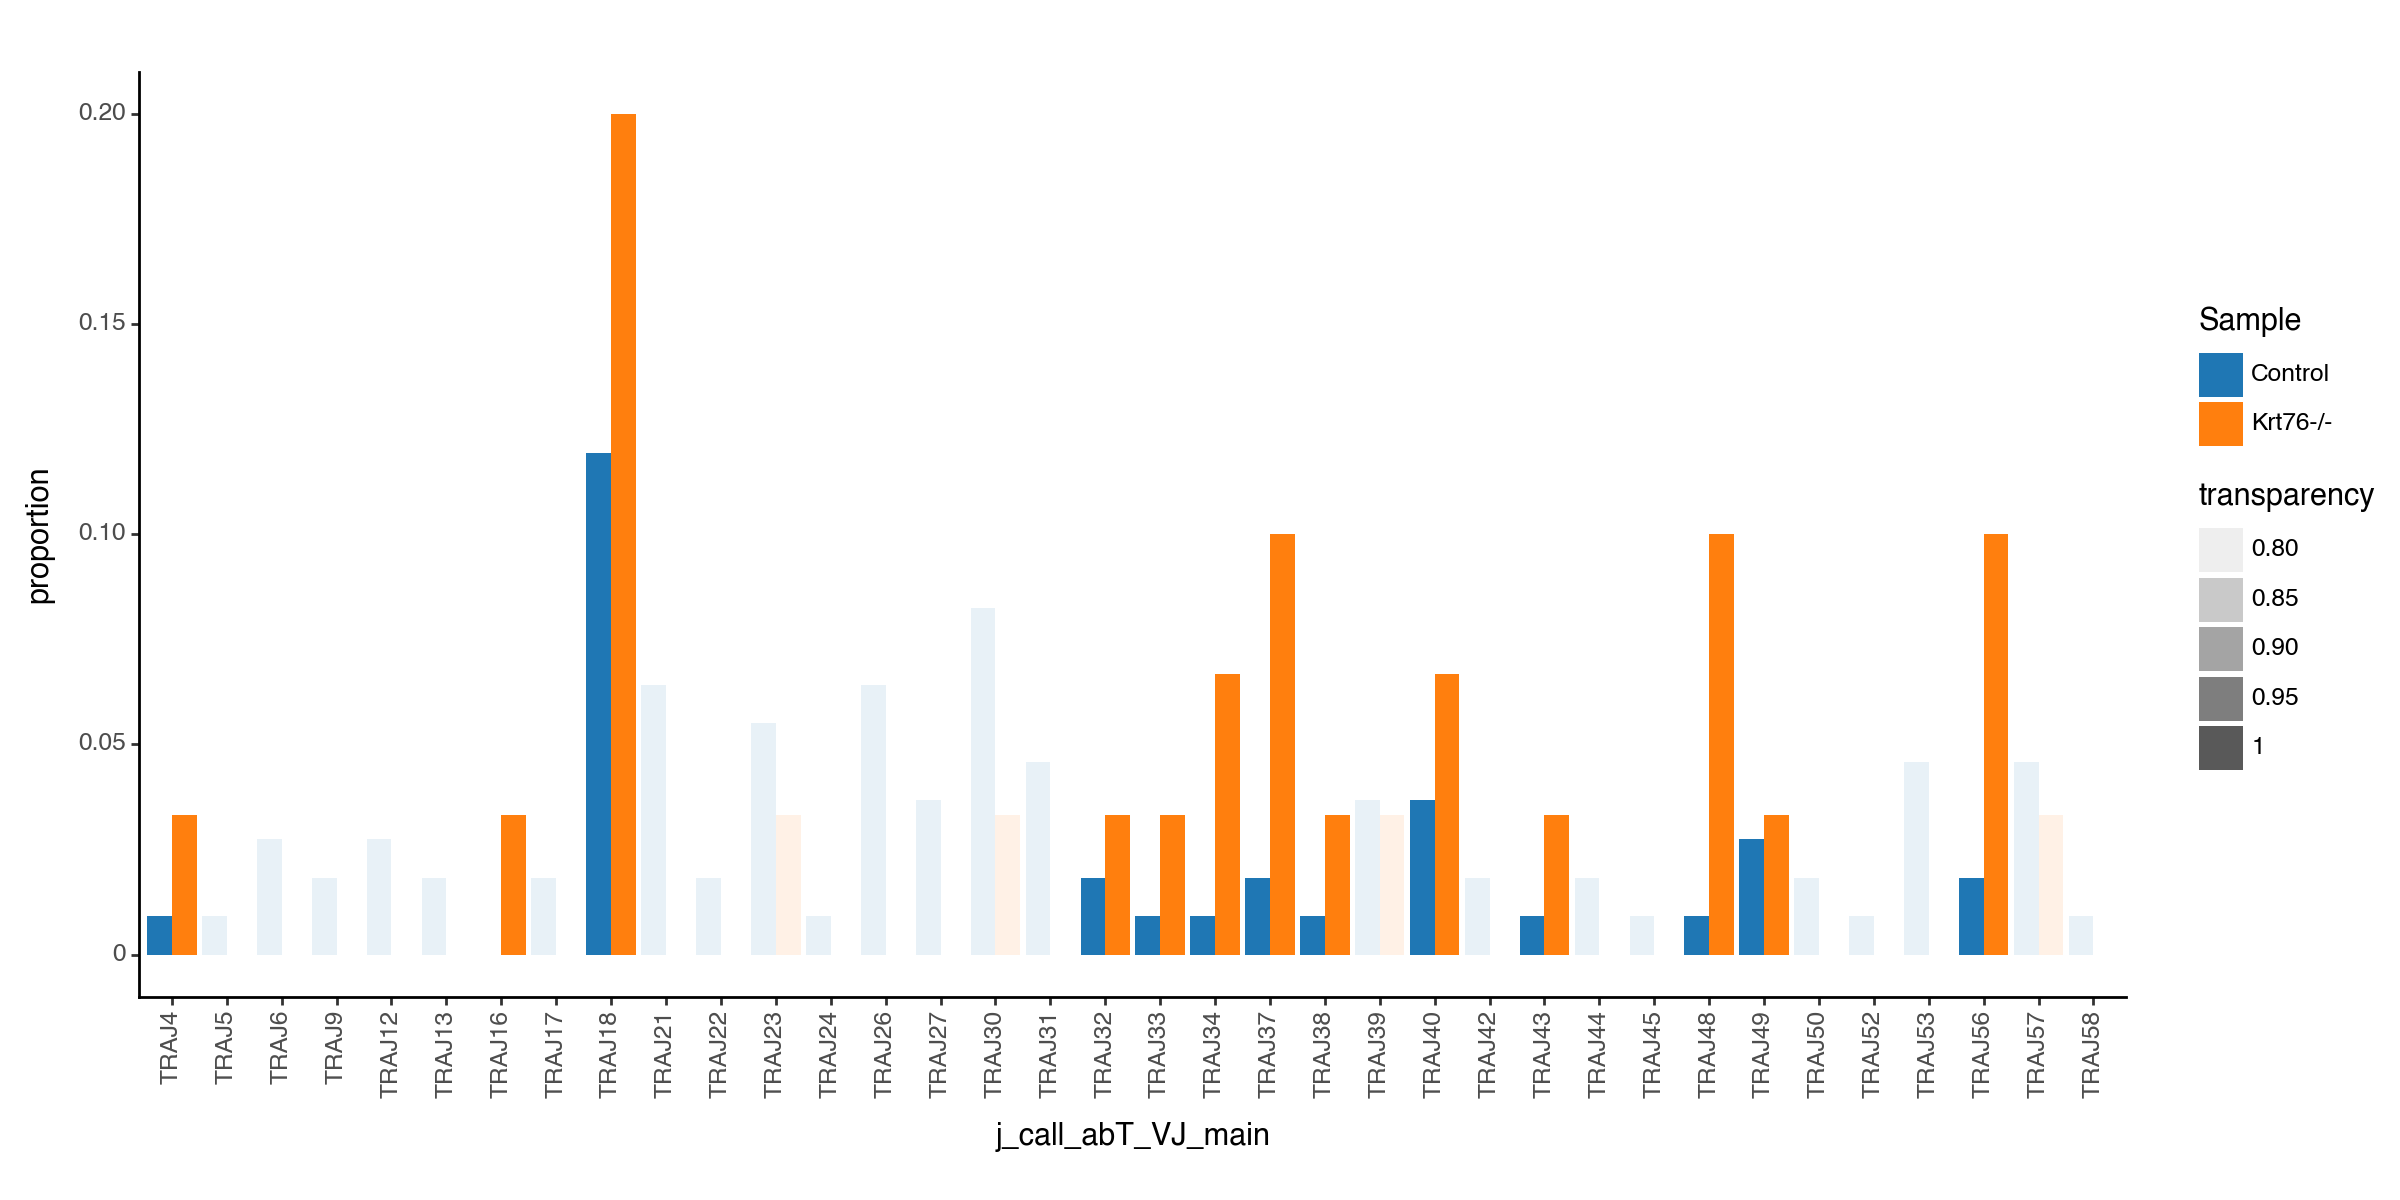

<Figure Size: (1200 x 600)>

In [2421]:
p

In [2422]:
p.save("JgeneAlphaChain_NKTregs_141223_111223.pdf", height = 6, width = 12, limitsize=False)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_NKTregs_141223_111223.pdf
